In [1]:
%matplotlib inline

from astropy.io import fits as pyfits
from astropy.table import Table
import numpy as np
from astropy.io.fits import Column
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#The input table has the same information as gz_hst_table.fits, but the column names have been changed to match the 
#new ones defined in this code below. 
votes_data=Table.read('/home/mel/Documents/GZ_HUBBLE/gz_hst_votes_and_meta_acs_10_5_2015.fits',1)
#votes_data=votes_data[1].data
#Metadata for each galaxy so that we only include debiased vote fractions for galaxies in the 'correctable'
#surface brightness and redshift space. 
#meta_data=pyfits.open('/home/mel/Documents/GZ_HUBBLE/gz_hst_info_acs.fits')
#meta_data=meta_data[1].data

In [4]:
subjects=set(votes_data['OBJNO'])

In [16]:
#And here we define our new table!
intcolumn = np.zeros(len(subjects),dtype=int)
floatcolumn = np.zeros(len(subjects),dtype=float)
strcolumn = np.array([' ']*len(subjects),dtype='S24')
   #S24=24 character string 
    #c01 = Column(name='num_classifications', format='J', array=floatcolumn)          # c05 = c01, by definition

#format for Columns: D = double precision floating point, J = integer
c00 = Column(name='OBJNO', format='A24', array=strcolumn) 
c00t1 = Column(name='total_count',format='J',array=intcolumn)           #c00t1 = c01a1a, by definition
c00t2 = Column(name='total_weight',format='D',array=floatcolumn)

#Columns for Task 01 "Smooth or features"
c01cat = Column(name='Correctable_Category', format = 'A24', array=strcolumn)
c01a1a = Column(name='t01_smooth_or_features_a01_smooth_count', format='J', array=intcolumn)
c01a1b = Column(name='t01_smooth_or_features_a01_smooth_weight', format='D', array=floatcolumn)
c01a1c = Column(name='t01_smooth_or_features_a01_smooth_fraction', format='D', array=floatcolumn)
c01a1d = Column(name='t01_smooth_or_features_a01_smooth_weighted_fraction', format='D', array=floatcolumn)

c01a2a = Column(name='t01_smooth_or_features_a02_features_or_disk_count', format='J', array=intcolumn)
c01a2b = Column(name='t01_smooth_or_features_a02_features_or_disk_weight', format='D', array=floatcolumn)
c01a2c = Column(name='t01_smooth_or_features_a02_features_or_disk_fraction', format='D', array=floatcolumn)
c01a2d = Column(name='t01_smooth_or_features_a02_features_or_disk_weighted_fraction', format='D', array=floatcolumn)
c01a2e = Column(name='t01_smooth_or_features_a02_features_or_disk_debiased_fraction', format='D', array=floatcolumn)
c01a2f = Column(name='t01_smooth_or_features_a02_features_or_disk_lower_limit', format='D',array=floatcolumn)
c01a2g = Column(name='t01_smooth_or_features_a02_features_or_disk_upper_limit', format='D',array=floatcolumn)
c01a2h = Column(name='t01_smooth_or_features_a02_features_or_disk_best_fraction',format='D',array=floatcolumn)

c01a3a = Column(name='t01_smooth_or_features_a03_star_or_artifact_count', format='J', array=intcolumn)
c01a3b = Column(name='t01_smooth_or_features_a03_star_or_artifact_weight', format='D', array=floatcolumn)
c01a3c = Column(name='t01_smooth_or_features_a03_star_or_artifact_fraction', format='D', array=floatcolumn)
c01a3d = Column(name='t01_smooth_or_features_a03_star_or_artifact_weighted_fraction', format='D', array=floatcolumn)

c01t1 = Column(name='t01_smooth_or_features_total_count', format='J', array=intcolumn)
c01t2 = Column(name='t01_smooth_or_features_total_weight', format='D', array=floatcolumn)


#Columns for Task 02 "Edge on"
c02a1a = Column(name='t02_edgeon_a01_yes_count', format='J', array=intcolumn)
c02a1b = Column(name='t02_edgeon_a01_yes_weight', format='D', array=floatcolumn)
c02a1c = Column(name='t02_edgeon_a01_yes_fraction', format='D', array=floatcolumn)
c02a1d = Column(name='t02_edgeon_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c02a2a = Column(name='t02_edgeon_a02_no_count', format='J', array=intcolumn)
c02a2b = Column(name='t02_edgeon_a02_no_weight', format='D', array=floatcolumn)
c02a2c = Column(name='t02_edgeon_a02_no_fraction', format='D', array=floatcolumn)
c02a2d = Column(name='t02_edgeon_a02_no_weighted_fraction', format='D', array=floatcolumn)

c02t1 = Column(name='t02_edgeon_total_count', format='J', array=intcolumn)
c02t2 = Column(name='t02_edgeon_total_weight', format='D', array=floatcolumn)


#Columns for Task 03 "Bar"
c03a1a = Column(name='t03_bar_a01_bar_count', format='J', array=intcolumn)
c03a1b = Column(name='t03_bar_a01_bar_weight', format='D', array=floatcolumn)
c03a1c = Column(name='t03_bar_a01_bar_fraction', format='D', array=floatcolumn)
c03a1d = Column(name='t03_bar_a01_bar_weighted_fraction', format='D', array=floatcolumn)

c03a2a = Column(name='t03_bar_a02_no_bar_count', format='J', array=intcolumn)
c03a2b = Column(name='t03_bar_a02_no_bar_weight', format='D', array=floatcolumn)
c03a2c = Column(name='t03_bar_a02_no_bar_fraction', format='D', array=floatcolumn)
c03a2d = Column(name='t03_bar_a02_no_bar_weighted_fraction', format='D', array=floatcolumn)

c03t1 = Column(name='t03_bar_total_count', format='J', array=intcolumn)
c03t2 = Column(name='t03_bar_total_weight', format='D', array=floatcolumn)


#Columns for Task 04 "Spiral Arms"
c04a1a = Column(name='t04_spiral_a01_spiral_count', format='J', array=intcolumn)
c04a1b = Column(name='t04_spiral_a01_spiral_weight', format='D', array=floatcolumn)
c04a1c = Column(name='t04_spiral_a01_spiral_fraction', format='D', array=floatcolumn)
c04a1d = Column(name='t04_spiral_a01_spiral_weighted_fraction', format='D', array=floatcolumn)

c04a2a = Column(name='t04_spiral_a02_no_spiral_count', format='J', array=intcolumn)
c04a2b = Column(name='t04_spiral_a02_no_spiral_weight', format='D', array=floatcolumn)
c04a2c = Column(name='t04_spiral_a02_no_spiral_fraction', format='D', array=floatcolumn)
c04a2d = Column(name='t04_spiral_a02_no_spiral_weighted_fraction', format='D', array=floatcolumn)

c04t1 = Column(name='t04_spiral_total_count', format='J', array=intcolumn)
c04t2 = Column(name='t04_spiral_total_weight', format='D', array=floatcolumn)


#Columns for Task 05 "Bulge Prominence"
c05a1a = Column(name='t05_bulge_prominence_a01_no_bulge_count', format='J', array=intcolumn)
c05a1b = Column(name='t05_bulge_prominence_a01_no_bulge_weight', format='D', array=floatcolumn)
c05a1c = Column(name='t05_bulge_prominence_a01_no_bulge_fraction', format='D', array=floatcolumn)
c05a1d = Column(name='t05_bulge_prominence_a01_no_bulge_weighted_fraction', format='D', array=floatcolumn)

c05a2a = Column(name='t05_bulge_prominence_a02_just_noticeable_count', format='J', array=intcolumn)
c05a2b = Column(name='t05_bulge_prominence_a02_just_noticeable_weight', format='D', array=floatcolumn)
c05a2c = Column(name='t05_bulge_prominence_a02_just_noticeable_fraction', format='D', array=floatcolumn)
c05a2d = Column(name='t05_bulge_prominence_a02_just_noticeable_weighted_fraction', format='D', array=floatcolumn)

c05a3a = Column(name='t05_bulge_prominence_a03_obvious_count', format='J', array=intcolumn)
c05a3b = Column(name='t05_bulge_prominence_a03_obvious_weight', format='D', array=floatcolumn)
c05a3c = Column(name='t05_bulge_prominence_a03_obvious_fraction', format='D', array=floatcolumn)
c05a3d = Column(name='t05_bulge_prominence_a03_obvious_weighted_fraction', format='D', array=floatcolumn)

c05a4a = Column(name='t05_bulge_prominence_a04_dominant_count', format='J', array=intcolumn)
c05a4b = Column(name='t05_bulge_prominence_a04_dominant_weight', format='D', array=floatcolumn)
c05a4c = Column(name='t05_bulge_prominence_a04_dominant_fraction', format='D', array=floatcolumn)
c05a4d = Column(name='t05_bulge_prominence_a04_dominant_weighted_fraction', format='D', array=floatcolumn)

c05t1 = Column(name='t05_bulge_prominence_total_count', format='J', array=intcolumn)
c05t2 = Column(name='t05_bulge_prominence_total_weight', format='D', array=floatcolumn)


#Columns for Task 06 "Odd"
c06a1a = Column(name='t06_odd_a01_yes_count', format='J', array=intcolumn)
c06a1b = Column(name='t06_odd_a01_yes_weight', format='D', array=floatcolumn)
c06a1c = Column(name='t06_odd_a01_yes_fraction', format='D', array=floatcolumn)
c06a1d = Column(name='t06_odd_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c06a2a = Column(name='t06_odd_a02_no_count', format='J', array=intcolumn)
c06a2b = Column(name='t06_odd_a02_no_weight', format='D', array=floatcolumn)
c06a2c = Column(name='t06_odd_a02_no_fraction', format='D', array=floatcolumn)
c06a2d = Column(name='t06_odd_a02_no_weighted_fraction', format='D', array=floatcolumn)

c06t1 = Column(name='t06_odd_total_count', format='J', array=intcolumn)
c06t2 = Column(name='t06_odd_total_weight', format='D', array=floatcolumn)

#Columns for Task 07 "Rounded"
c07a1a = Column(name='t07_rounded_a01_completely_round_count', format='J', array=intcolumn)
c07a1b = Column(name='t07_rounded_a01_completely_round_weight', format='D', array=floatcolumn)
c07a1c = Column(name='t07_rounded_a01_completely_round_fraction', format='D', array=floatcolumn)
c07a1d = Column(name='t07_rounded_a01_completely_round_weighted_fraction', format='D', array=floatcolumn)

c07a2a = Column(name='t07_rounded_a02_in_between_count', format='J', array=intcolumn)
c07a2b = Column(name='t07_rounded_a02_in_between_weight', format='D', array=floatcolumn)
c07a2c = Column(name='t07_rounded_a02_in_between_fraction', format='D', array=floatcolumn)
c07a2d = Column(name='t07_rounded_a02_in_between_weighted_fraction', format='D', array=floatcolumn)

c07a3a = Column(name='t07_rounded_a03_cigar_shaped_count', format='J', array=intcolumn)
c07a3b = Column(name='t07_rounded_a03_cigar_shaped_weight', format='D', array=floatcolumn)
c07a3c = Column(name='t07_rounded_a03_cigar_shaped_fraction', format='D', array=floatcolumn)
c07a3d = Column(name='t07_rounded_a03_cigar_shaped_weighted_fraction', format='D', array=floatcolumn)

c07t1 = Column(name='t07_rounded_total_count', format='J', array=intcolumn)
c07t2 = Column(name='t07_rounded_total_weight', format='D', array=floatcolumn)

#Columns for Task 08 "Odd Feature"
c08a1a = Column(name='t08_odd_feature_a01_ring_count', format='J', array=intcolumn)
c08a1b = Column(name='t08_odd_feature_a01_ring_weight', format='D', array=floatcolumn)
c08a1c = Column(name='t08_odd_feature_a01_ring_fraction', format='D', array=floatcolumn)
c08a1d = Column(name='t08_odd_feature_a01_ring_weighted_fraction', format='D', array=floatcolumn)

c08a2a = Column(name='t08_odd_feature_a02_lens_or_arc_count', format='J', array=intcolumn)
c08a2b = Column(name='t08_odd_feature_a02_lens_or_arc_weight', format='D', array=floatcolumn)
c08a2c = Column(name='t08_odd_feature_a02_lens_or_arc_fraction', format='D', array=floatcolumn)
c08a2d = Column(name='t08_odd_feature_a02_lens_or_arc_weighted_fraction', format='D', array=floatcolumn)

c08a3a = Column(name='t08_odd_feature_a03_disturbed_count', format='J', array=intcolumn)
c08a3b = Column(name='t08_odd_feature_a03_disturbed_weight', format='D', array=floatcolumn)
c08a3c = Column(name='t08_odd_feature_a03_disturbed_fraction', format='D', array=floatcolumn)
c08a3d = Column(name='t08_odd_feature_a03_disturbed_weighted_fraction', format='D', array=floatcolumn)

c08a4a = Column(name='t08_odd_feature_a04_irregular_count', format='J', array=intcolumn)
c08a4b = Column(name='t08_odd_feature_a04_irregular_weight', format='D', array=floatcolumn)
c08a4c = Column(name='t08_odd_feature_a04_irregular_fraction', format='D', array=floatcolumn)
c08a4d = Column(name='t08_odd_feature_a04_irregular_weighted_fraction', format='D', array=floatcolumn)

c08a5a = Column(name='t08_odd_feature_a05_other_count', format='J', array=intcolumn)
c08a5b = Column(name='t08_odd_feature_a05_other_weight', format='D', array=floatcolumn)
c08a5c = Column(name='t08_odd_feature_a05_other_fraction', format='D', array=floatcolumn)
c08a5d = Column(name='t08_odd_feature_a05_other_weighted_fraction', format='D', array=floatcolumn)

c08a6a = Column(name='t08_odd_feature_a06_merger_count', format='J', array=intcolumn)
c08a6b = Column(name='t08_odd_feature_a06_merger_weight', format='D', array=floatcolumn)
c08a6c = Column(name='t08_odd_feature_a06_merger_fraction', format='D', array=floatcolumn)
c08a6d = Column(name='t08_odd_feature_a06_merger_weighted_fraction', format='D', array=floatcolumn)

c08a7a = Column(name='t08_odd_feature_a07_dust_lane_count', format='J', array=intcolumn)
c08a7b = Column(name='t08_odd_feature_a07_dust_lane_weight', format='D', array=floatcolumn)
c08a7c = Column(name='t08_odd_feature_a07_dust_lane_fraction', format='D', array=floatcolumn)
c08a7d = Column(name='t08_odd_feature_a07_dust_lane_weighted_fraction', format='D', array=floatcolumn)

c08t1 = Column(name='t08_odd_feature_total_count', format='J', array=intcolumn)
c08t2 = Column(name='t08_odd_feature_total_weight', format='D', array=floatcolumn)

#Columns for Task 09 "Bulge Shape"
c09a1a = Column(name='t09_bulge_shape_a01_rounded_count', format='J', array=intcolumn)
c09a1b = Column(name='t09_bulge_shape_a01_rounded_weight', format='D', array=floatcolumn)
c09a1c = Column(name='t09_bulge_shape_a01_rounded_fraction', format='D', array=floatcolumn)
c09a1d = Column(name='t09_bulge_shape_a01_rounded_weighted_fraction', format='D', array=floatcolumn)

c09a2a = Column(name='t09_bulge_shape_a02_boxy_count', format='J', array=intcolumn)
c09a2b = Column(name='t09_bulge_shape_a02_boxy_weight', format='D', array=floatcolumn)
c09a2c = Column(name='t09_bulge_shape_a02_boxy_fraction', format='D', array=floatcolumn)
c09a2d = Column(name='t09_bulge_shape_a02_boxy_weighted_fraction', format='D', array=floatcolumn)

c09a3a = Column(name='t09_bulge_shape_a03_no_bulge_count', format='J', array=intcolumn)
c09a3b = Column(name='t09_bulge_shape_a03_no_bulge_weight', format='D', array=floatcolumn)
c09a3c = Column(name='t09_bulge_shape_a03_no_bulge_fraction', format='D', array=floatcolumn)
c09a3d = Column(name='t09_bulge_shape_a03_no_bulge_weighted_fraction', format='D', array=floatcolumn)

c09t1 = Column(name='t09_bulge_shape_total_count', format='J', array=intcolumn)
c09t2 = Column(name='t09_bulge_shape_total_weight', format='D', array=floatcolumn)

#Columns for Task 10 "Arms Winding"
c10a1a = Column(name='t10_arms_winding_a01_tight_count', format='J', array=intcolumn)
c10a1b = Column(name='t10_arms_winding_a01_tight_weight', format='D', array=floatcolumn)
c10a1c = Column(name='t10_arms_winding_a01_tight_fraction', format='D', array=floatcolumn)
c10a1d = Column(name='t10_arms_winding_a01_tight_weighted_fraction', format='D', array=floatcolumn)

c10a2a = Column(name='t10_arms_winding_a02_medium_count', format='J', array=intcolumn)
c10a2b = Column(name='t10_arms_winding_a02_medium_weight', format='D', array=floatcolumn)
c10a2c = Column(name='t10_arms_winding_a02_medium_fraction', format='D', array=floatcolumn)
c10a2d = Column(name='t10_arms_winding_a02_medium_weighted_fraction', format='D', array=floatcolumn)

c10a3a = Column(name='t10_arms_winding_a03_loose_count', format='J', array=intcolumn)
c10a3b = Column(name='t10_arms_winding_a03_loose_weight', format='D', array=floatcolumn)
c10a3c = Column(name='t10_arms_winding_a03_loose_fraction', format='D', array=floatcolumn)
c10a3d = Column(name='t10_arms_winding_a03_loose_weighted_fraction', format='D', array=floatcolumn)

c10t1 = Column(name='t10_arms_winding_total_count', format='J', array=intcolumn)
c10t2 = Column(name='t10_arms_winding_total_weight', format='D', array=floatcolumn)

#Columns for Task 11 "Arms Number"
c11a1a = Column(name='t11_arms_number_a01_1_count', format='J', array=intcolumn)
c11a1b = Column(name='t11_arms_number_a01_1_weight', format='D', array=floatcolumn)
c11a1c = Column(name='t11_arms_number_a01_1_fraction', format='D', array=floatcolumn)
c11a1d = Column(name='t11_arms_number_a01_1_weighted_fraction', format='D', array=floatcolumn)

c11a2a = Column(name='t11_arms_number_a02_2_count', format='J', array=intcolumn)
c11a2b = Column(name='t11_arms_number_a02_2_weight', format='D', array=floatcolumn)
c11a2c = Column(name='t11_arms_number_a02_2_fraction', format='D', array=floatcolumn)
c11a2d = Column(name='t11_arms_number_a02_2_weighted_fraction', format='D', array=floatcolumn)

c11a3a = Column(name='t11_arms_number_a03_3_count', format='J', array=intcolumn)
c11a3b = Column(name='t11_arms_number_a03_3_weight', format='D', array=floatcolumn)
c11a3c = Column(name='t11_arms_number_a03_3_fraction', format='D', array=floatcolumn)
c11a3d = Column(name='t11_arms_number_a03_3_weighted_fraction', format='D', array=floatcolumn)

c11a4a = Column(name='t11_arms_number_a04_4_count', format='J', array=intcolumn)
c11a4b = Column(name='t11_arms_number_a04_4_weight', format='D', array=floatcolumn)
c11a4c = Column(name='t11_arms_number_a04_4_fraction', format='D', array=floatcolumn)
c11a4d = Column(name='t11_arms_number_a04_4_weighted_fraction', format='D', array=floatcolumn)

c11a5a = Column(name='t11_arms_number_a05_more_than_4_count', format='J', array=intcolumn)
c11a5b = Column(name='t11_arms_number_a05_more_than_4_weight', format='D', array=floatcolumn)
c11a5c = Column(name='t11_arms_number_a05_more_than_4_fraction', format='D', array=floatcolumn)
c11a5d = Column(name='t11_arms_number_a05_more_than_4_weighted_fraction', format='D', array=floatcolumn)

c11a6a = Column(name='t11_arms_number_a06_cant_tell_count', format='J', array=intcolumn)
c11a6b = Column(name='t11_arms_number_a06_cant_tell_weight', format='D', array=floatcolumn)
c11a6c = Column(name='t11_arms_number_a06_cant_tell_fraction', format='D', array=floatcolumn)
c11a6d = Column(name='t11_arms_number_a06_cant_tell_weighted_fraction', format='D', array=floatcolumn)

c11t1 = Column(name='t11_arms_number_total_count', format='J', array=intcolumn)
c11t2 = Column(name='t11_arms_number_total_weight', format='D', array=floatcolumn)

#Columns for Task 12 "Clumpy"
c12a1a = Column(name='t12_clumpy_a01_yes_count', format='J', array=intcolumn)
c12a1b = Column(name='t12_clumpy_a01_yes_weight', format='D', array=floatcolumn)
c12a1c = Column(name='t12_clumpy_a01_yes_fraction', format='D', array=floatcolumn)
c12a1d = Column(name='t12_clumpy_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c12a2a = Column(name='t12_clumpy_a02_no_count', format='J', array=intcolumn)
c12a2b = Column(name='t12_clumpy_a02_no_weight', format='D', array=floatcolumn)
c12a2c = Column(name='t12_clumpy_a02_no_fraction', format='D', array=floatcolumn)
c12a2d = Column(name='t12_clumpy_a02_no_weighted_fraction', format='D', array=floatcolumn)

c12t1 = Column(name='t12_clumpy_total_count', format='J', array=intcolumn)
c12t2 = Column(name='t12_clumpy_total_weight', format='D', array=floatcolumn)

#Columns for Task 13 "Multiple Clumps"
c13a1a = Column(name='t13_multiple_clumps_a01_yes_count', format='J', array=intcolumn)
c13a1b = Column(name='t13_multiple_clumps_a01_yes_weight', format='D', array=floatcolumn)
c13a1c = Column(name='t13_multiple_clumps_a01_yes_fraction', format='D', array=floatcolumn)
c13a1d = Column(name='t13_multiple_clumps_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c13a2a = Column(name='t13_multiple_clumps_a02_no_count', format='J', array=intcolumn)
c13a2b = Column(name='t13_multiple_clumps_a02_no_weight', format='D', array=floatcolumn)
c13a2c = Column(name='t13_multiple_clumps_a02_no_fraction', format='D', array=floatcolumn)
c13a2d = Column(name='t13_multiple_clumps_a02_no_weighted_fraction', format='D', array=floatcolumn)

c13t1 = Column(name='t13_multiple_clumps_total_count', format='J', array=intcolumn)
c13t2 = Column(name='t13_multiple_clumps_total_weight', format='D', array=floatcolumn)


#Columns for Task 14 "Bright Clump"
c14a1a = Column(name='t14_bright_clump_a01_yes_count', format='J', array=intcolumn)
c14a1b = Column(name='t14_bright_clump_a01_yes_weight', format='D', array=floatcolumn)
c14a1c = Column(name='t14_bright_clump_a01_yes_fraction', format='D', array=floatcolumn)
c14a1d = Column(name='t14_bright_clump_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c14a2a = Column(name='t14_bright_clump_a02_no_count', format='J', array=intcolumn)
c14a2b = Column(name='t14_bright_clump_a02_no_weight', format='D', array=floatcolumn)
c14a2c = Column(name='t14_bright_clump_a02_no_fraction', format='D', array=floatcolumn)
c14a2d = Column(name='t14_bright_clump_a02_no_weighted_fraction', format='D', array=floatcolumn)

c14t1 = Column(name='t14_bright_clump_total_count', format='J', array=intcolumn)
c14t2 = Column(name='t14_bright_clump_total_weight', format='D', array=floatcolumn)


#Columns for Task 15 "Bright Clump Central"
c15a1a = Column(name='t15_bright_clump_central_a01_yes_count', format='J', array=intcolumn)
c15a1b = Column(name='t15_bright_clump_central_a01_yes_weight', format='D', array=floatcolumn)
c15a1c = Column(name='t15_bright_clump_central_a01_yes_fraction', format='D', array=floatcolumn)
c15a1d = Column(name='t15_bright_clump_central_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c15a2a = Column(name='t15_bright_clump_central_a02_no_count', format='J', array=intcolumn)
c15a2b = Column(name='t15_bright_clump_central_a02_no_weight', format='D', array=floatcolumn)
c15a2c = Column(name='t15_bright_clump_central_a02_no_fraction', format='D', array=floatcolumn)
c15a2d = Column(name='t15_bright_clump_central_a02_no_weighted_fraction', format='D', array=floatcolumn)

c15t1 = Column(name='t15_bright_clump_central_total_count', format='J', array=intcolumn)
c15t2 = Column(name='t15_bright_clump_central_total_weight', format='D', array=floatcolumn)

#Columns for Task 16 "Clumps Arrangement"
c16a1a = Column(name='t16_clumps_arrangement_a01_line_count', format='J', array=intcolumn)
c16a1b = Column(name='t16_clumps_arrangement_a01_line_weight', format='D', array=floatcolumn)
c16a1c = Column(name='t16_clumps_arrangement_a01_line_fraction', format='D', array=floatcolumn)
c16a1d = Column(name='t16_clumps_arrangement_a01_line_weighted_fraction', format='D', array=floatcolumn)

c16a2a = Column(name='t16_clumps_arrangement_a02_chain_count', format='J', array=intcolumn)
c16a2b = Column(name='t16_clumps_arrangement_a02_chain_weight', format='D', array=floatcolumn)
c16a2c = Column(name='t16_clumps_arrangement_a02_chain_fraction', format='D', array=floatcolumn)
c16a2d = Column(name='t16_clumps_arrangement_a02_chain_weighted_fraction', format='D', array=floatcolumn)

c16a3a = Column(name='t16_clumps_arrangement_a03_cluster_count', format='J', array=intcolumn)
c16a3b = Column(name='t16_clumps_arrangement_a03_cluster_weight', format='D', array=floatcolumn)
c16a3c = Column(name='t16_clumps_arrangement_a03_cluster_fraction', format='D', array=floatcolumn)
c16a3d = Column(name='t16_clumps_arrangement_a03_cluster_weighted_fraction', format='D', array=floatcolumn)

c16a4a = Column(name='t16_clumps_arrangement_a04_spiral_count', format='J', array=intcolumn)
c16a4b = Column(name='t16_clumps_arrangement_a04_spiral_weight', format='D', array=floatcolumn)
c16a4c = Column(name='t16_clumps_arrangement_a04_spiral_fraction', format='D', array=floatcolumn)
c16a4d = Column(name='t16_clumps_arrangement_a04_spiral_weighted_fraction', format='D', array=floatcolumn)

c16t1 = Column(name='t16_clumps_arrangement_total_count', format='J', array=intcolumn)
c16t2 = Column(name='t16_clumps_arrangement_total_weight', format='D', array=floatcolumn)

#Columns for Task 17 "Clumps Number"
c17a1a = Column(name='t17_clumps_count_a01_1_count', format='J', array=intcolumn)
c17a1b = Column(name='t17_clumps_count_a01_1_weight', format='D', array=floatcolumn)
c17a1c = Column(name='t17_clumps_count_a01_1_fraction', format='D', array=floatcolumn)
c17a1d = Column(name='t17_clumps_count_a01_1_weighted_fraction', format='D', array=floatcolumn)

c17a2a = Column(name='t17_clumps_count_a02_2_count', format='J', array=intcolumn)
c17a2b = Column(name='t17_clumps_count_a02_2_weight', format='D', array=floatcolumn)
c17a2c = Column(name='t17_clumps_count_a02_2_fraction', format='D', array=floatcolumn)
c17a2d = Column(name='t17_clumps_count_a02_2_weighted_fraction', format='D', array=floatcolumn)

c17a3a = Column(name='t17_clumps_count_a03_3_count', format='J', array=intcolumn)
c17a3b = Column(name='t17_clumps_count_a03_3_weight', format='D', array=floatcolumn)
c17a3c = Column(name='t17_clumps_count_a03_3_fraction', format='D', array=floatcolumn)
c17a3d = Column(name='t17_clumps_count_a03_3_weighted_fraction', format='D', array=floatcolumn)

c17a4a = Column(name='t17_clumps_count_a04_4_count', format='J', array=intcolumn)
c17a4b = Column(name='t17_clumps_count_a04_4_weight', format='D', array=floatcolumn)
c17a4c = Column(name='t17_clumps_count_a04_4_fraction', format='D', array=floatcolumn)
c17a4d = Column(name='t17_clumps_count_a04_4_weighted_fraction', format='D', array=floatcolumn)

c17a5a = Column(name='t17_clumps_count_a05_more_than_4_count', format='J', array=intcolumn)
c17a5b = Column(name='t17_clumps_count_a05_more_than_4_weight', format='D', array=floatcolumn)
c17a5c = Column(name='t17_clumps_count_a05_more_than_4_fraction', format='D', array=floatcolumn)
c17a5d = Column(name='t17_clumps_count_a05_more_than_4_weighted_fraction', format='D', array=floatcolumn)

c17a6a = Column(name='t17_clumps_count_a06_cant_tell_count', format='J', array=intcolumn)
c17a6b = Column(name='t17_clumps_count_a06_cant_tell_weight', format='D', array=floatcolumn)
c17a6c = Column(name='t17_clumps_count_a06_cant_tell_fraction', format='D', array=floatcolumn)
c17a6d = Column(name='t17_clumps_count_a06_cant_tell_weighted_fraction', format='D', array=floatcolumn)

c17t1 = Column(name='t17_clumps_count_total_count', format='J', array=intcolumn)
c17t2 = Column(name='t17_clumps_count_total_weight', format='D', array=floatcolumn)

#Columns for Task 18 "Clumps Symmetrical"
c18a1a = Column(name='t18_clumps_symmetrical_a01_yes_count', format='J', array=intcolumn)
c18a1b = Column(name='t18_clumps_symmetrical_a01_yes_weight', format='D', array=floatcolumn)
c18a1c = Column(name='t18_clumps_symmetrical_a01_yes_fraction', format='D', array=floatcolumn)
c18a1d = Column(name='t18_clumps_symmetrical_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c18a2a = Column(name='t18_clumps_symmetrical_a02_no_count', format='J', array=intcolumn)
c18a2b = Column(name='t18_clumps_symmetrical_a02_no_weight', format='D', array=floatcolumn)
c18a2c = Column(name='t18_clumps_symmetrical_a02_no_fraction', format='D', array=floatcolumn)
c18a2d = Column(name='t18_clumps_symmetrical_a02_no_weighted_fraction', format='D', array=floatcolumn)

c18t1 = Column(name='t18_clumps_symmetrical_total_count', format='J', array=intcolumn)
c18t2 = Column(name='t18_clumps_symmetrical_total_weight', format='D', array=floatcolumn)

#Columns for Task 19 "Clumps Embedded"
c19a1a = Column(name='t19_clumps_embedded_a01_yes_count', format='J', array=intcolumn)
c19a1b = Column(name='t19_clumps_embedded_a01_yes_weight', format='D', array=floatcolumn)
c19a1c = Column(name='t19_clumps_embedded_a01_yes_fraction', format='D', array=floatcolumn)
c19a1d = Column(name='t19_clumps_embedded_a01_yes_weighted_fraction', format='D', array=floatcolumn)

c19a2a = Column(name='t19_clumps_embedded_a02_no_count', format='J', array=intcolumn)
c19a2b = Column(name='t19_clumps_embedded_a02_no_weight', format='D', array=floatcolumn)
c19a2c = Column(name='t19_clumps_embedded_a02_no_fraction', format='D', array=floatcolumn)
c19a2d = Column(name='t19_clumps_embedded_a02_no_weighted_fraction', format='D', array=floatcolumn)

c19t1 = Column(name='t19_clumps_embedded_total_count', format='J', array=intcolumn)
c19t2 = Column(name='t19_clumps_embedded_total_weight', format='D', array=floatcolumn)

In [17]:
classifications = pyfits.new_table([c00,c00t1,c00t2,
                                    c01cat,
                                    c01a1a,c01a1b,c01a1c,c01a1d,
                                    c01a2a,c01a2b,c01a2c,c01a2d,c01a2e,c01a2f,c01a2g,c01a2h,
                                    c01a3a,c01a3b,c01a3c,c01a3d,
                                    c01t1,c01t2,
                                    c02a1a,c02a1b,c02a1c,c02a1d,
                                    c02a2a,c02a2b,c02a2c,c02a2d,
                                    c02t1,c02t2,
                                    c03a1a,c03a1b,c03a1c,c03a1d,
                                    c03a2a,c03a2b,c03a2c,c03a2d,
                                    c03t1,c03t2,
                                    c04a1a,c04a1b,c04a1c,c04a1d,
                                    c04a2a,c04a2b,c04a2c,c04a2d,
                                    c04t1,c04t2,
                                    c05a1a,c05a1b,c05a1c,c05a1d,
                                    c05a2a,c05a2b,c05a2c,c05a2d,
                                    c05a3a,c05a3b,c05a3c,c05a3d,
                                    c05a4a,c05a4b,c05a4c,c05a4d,
                                    c05t1,c05t2,  
                                    c06a1a,c06a1b,c06a1c,c06a1d,
                                    c06a2a,c06a2b,c06a2c,c06a2d,
                                    c06t1,c06t2,
                                    c07a1a,c07a1b,c07a1c,c07a1d,
                                    c07a2a,c07a2b,c07a2c,c07a2d,
                                    c07a3a,c07a3b,c07a3c,c07a3d,
                                    c07t1,c07t2,
                                    c08a1a,c08a1b,c08a1c,c08a1d,
                                    c08a2a,c08a2b,c08a2c,c08a2d,
                                    c08a3a,c08a3b,c08a3c,c08a3d,
                                    c08a4a,c08a4b,c08a4c,c08a4d,
                                    c08a5a,c08a5b,c08a5c,c08a5d,
                                    c08a6a,c08a6b,c08a6c,c08a6d,
                                    c08a7a,c08a7b,c08a7c,c08a7d,
                                    c08t1,c08t2,
                                    c09a1a,c09a1b,c09a1c,c09a1d,
                                    c09a2a,c09a2b,c09a2c,c09a2d,
                                    c09a3a,c09a3b,c09a3c,c09a3d,
                                    c09t1,c09t2,
                                    c10a1a,c10a1b,c10a1c,c10a1d,
                                    c10a2a,c10a2b,c10a2c,c10a2d,
                                    c10a3a,c10a3b,c10a3c,c10a3d,
                                    c10t1,c10t2,
                                    c11a1a,c11a1b,c11a1c,c11a1d,
                                    c11a2a,c11a2b,c11a2c,c11a2d,
                                    c11a3a,c11a3b,c11a3c,c11a3d,
                                    c11a4a,c11a4b,c11a4c,c11a4d,
                                    c11a5a,c11a5b,c11a5c,c11a5d,
                                    c11a6a,c11a6b,c11a6c,c11a6d,
                                    c11t1,c11t2,
                                    c12a1a,c12a1b,c12a1c,c12a1d,
                                    c12a2a,c12a2b,c12a2c,c12a2d,
                                    c12t1,c12t2,
                                    c13a1a,c13a1b,c13a1c,c13a1d,
                                    c13a2a,c13a2b,c13a2c,c13a2d,
                                    c13t1,c13t2,
                                    c14a1a,c14a1b,c14a1c,c14a1d,
                                    c14a2a,c14a2b,c14a2c,c14a2d,
                                    c14t1,c14t2,
                                    c15a1a,c15a1b,c15a1c,c15a1d,
                                    c15a2a,c15a2b,c15a2c,c15a2d,
                                    c15t1,c15t2,
                                    c16a1a,c16a1b,c16a1c,c16a1d,
                                    c16a2a,c16a2b,c16a2c,c16a2d,
                                    c16a3a,c16a3b,c16a3c,c16a3d,
                                    c16a4a,c16a4b,c16a4c,c16a4d,
                                    c16t1,c16t2,
                                    c17a1a,c17a1b,c17a1c,c17a1d,
                                    c17a2a,c17a2b,c17a2c,c17a2d,
                                    c17a3a,c17a3b,c17a3c,c17a3d,
                                    c17a4a,c17a4b,c17a4c,c17a4d,
                                    c17a5a,c17a5b,c17a5c,c17a5d,
                                    c17a6a,c17a6b,c17a6c,c17a6d,
                                    c17t1,c17t2,
                                    c18a1a,c18a1b,c18a1c,c18a1d,
                                    c18a2a,c18a2b,c18a2c,c18a2d,
                                    c18t1,c18t2,
                                    c19a1a,c19a1b,c19a1c,c19a1d,
                                    c19a2a,c19a2b,c19a2c,c19a2d,
                                    c19t1,c19t2
                                     ])
                                    
hubble_catalog = pyfits.new_table(classifications.columns)                         

In [18]:
#First copy the raw and weighted vote information to new table. 
#remove columns that are not in old table - those will be transferred manually 
old_columns = classifications.columns.names
old_columns.remove('t01_smooth_or_features_a02_features_or_disk_debiased_fraction')
old_columns.remove('t01_smooth_or_features_a02_features_or_disk_best_fraction')

In [8]:
#Zeta-hat function for computing debiased values
z0 = 0.3 
#zeta_hat = 0.5
#def fhat(f,z,z0=0.3,zeta_hat):
    
 #   val = f * np.exp((z - z0)/ zeta_hat)
    
  #  return val
def fhat_mel(f,z,z0,zeta_hat):
    
    val = 1. - (1. - f)*np.exp(-(z - z0)/ zeta_hat)
    
    return val
def zeta_hat_lin(SB):
    
    val = 10.**((SB*-0.0619) + 1.0837)
    return val

In [19]:
print 'Writing file...'
for i,gal in enumerate(votes_data):
    if i % 1000 == 0:
        t=datetime.now().time().isoformat()
        print 'Writing %ith row at time %s' %(i,t)
    #transfer all raw/weighted data
    for column_name in old_columns:
        hubble_catalog.data.field(column_name)[i] = gal[column_name]
    #new data: debiased vote fractions
    hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_debiased_fraction')[i] = fhat_mel(gal['t01_smooth_or_features_a02_features_or_disk_weighted_fraction'],gal['Z'],z0,zeta_hat_lin(gal['MU_HI']))
    #write the 'best' fraction column
    if hubble_catalog.data.field('Correctable_Category')[i]=='correctable':
        hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_best_fraction')[i] = hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_debiased_fraction')[i]
    elif hubble_catalog.data.field('Correctable_Category')[i]=='uncorrectable':
        hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_best_fraction')[i] = hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_lower_limit')[i]
    else:
        hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_best_fraction')[i] = hubble_catalog.data.field('t01_smooth_or_features_a02_features_or_disk_weighted_fraction')[i]


Writing file...
Writing 0th row at time 17:02:05.279999
Writing 1000th row at time 17:02:11.317794
Writing 2000th row at time 17:02:17.246498
Writing 3000th row at time 17:02:23.177783
Writing 4000th row at time 17:02:29.094824
Writing 5000th row at time 17:02:35.037144
Writing 6000th row at time 17:02:40.955229
Writing 7000th row at time 17:02:46.899262
Writing 8000th row at time 17:02:52.835462
Writing 9000th row at time 17:02:58.742147
Writing 10000th row at time 17:03:04.657241
Writing 11000th row at time 17:03:10.582537
Writing 12000th row at time 17:03:16.502285
Writing 13000th row at time 17:03:22.422662
Writing 14000th row at time 17:03:28.324499
Writing 15000th row at time 17:03:34.235463
Writing 16000th row at time 17:03:40.136051
Writing 17000th row at time 17:03:46.033997
Writing 18000th row at time 17:03:51.913621
Writing 19000th row at time 17:03:57.803024
Writing 20000th row at time 17:04:03.690734
Writing 21000th row at time 17:04:09.656834
Writing 22000th row at time 1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in double_scalars



Writing 109000th row at time 17:12:54.717685
Writing 110000th row at time 17:13:00.602857
Writing 111000th row at time 17:13:06.528381
Writing 112000th row at time 17:13:12.443875
Writing 113000th row at time 17:13:18.508428
Writing 114000th row at time 17:13:24.408123
Writing 115000th row at time 17:13:30.352467
Writing 116000th row at time 17:13:36.309972
Writing 117000th row at time 17:13:42.220781
Writing 118000th row at time 17:13:48.132720


In [22]:
from datetime import datetime
#write to file 
hubble_catalog.writeto('gz_hubble_catalog_%i_%i_%i.fits'%(datetime.now().month,datetime.now().day,datetime.now().year))

In [40]:
correctable=(votes_data['Correctable_Category']=='correctable       ')
uncorrectable=(votes_data['Correctable_Category']=='uncorrectable     ')
nei=votes_data['Correctable_Category']=='nei               ' 

old_votes=votes_data['t01_smooth_or_features_a02_features_or_disk_weighted_fraction']
old_lower_limit=votes_data['t01_smooth_or_features_a02_features_or_disk_lower_limit']
old_z=votes_data['Z']
old_mu=votes_data['MU_HI']

new_c=fhat_mel(old_votes[correctable],old_z[correctable],z0,zeta_hat_lin(old_mu[correctable]))
new_unc=fhat_mel(old_votes[uncorrectable],old_z[uncorrectable],z0,zeta_hat_lin(old_mu[uncorrectable])) #debiased value
#new_unc = old_lower_limit[uncorrectable] #lower limit
new_nei=fhat_mel(old_votes[nei],old_z[nei],z0,zeta_hat_lin(old_mu[nei]))

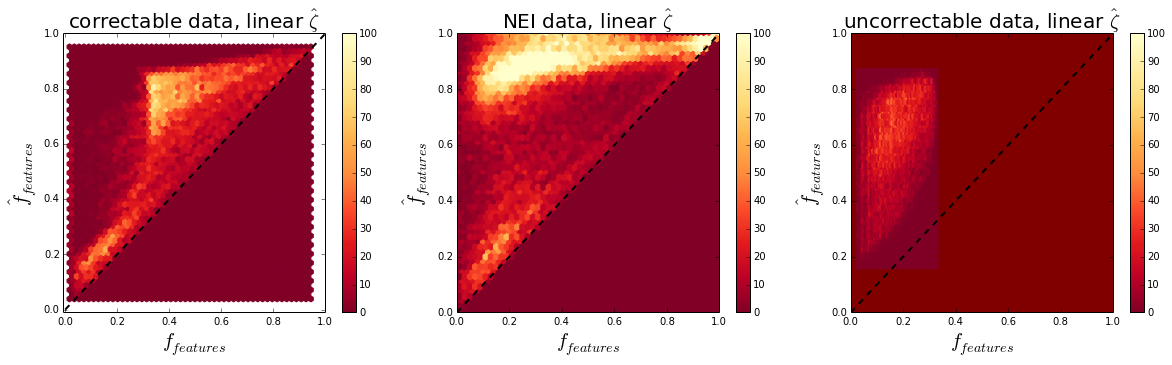

In [41]:
# 2D histogram of new p_features distribution
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(131)
hex1 = ax1.hexbin(old_votes[correctable],new_c, cmap=plt.cm.YlOrRd_r,gridsize=50,vmin =0,vmax=100)
ax1.set_xlabel(r'$f_{features}$',fontsize=20)
ax1.set_ylabel(r'$\hat f_{features}$',fontsize=20)
cb1 = plt.colorbar(hex1)
ax1.set_title('correctable data, linear $\hat \zeta$',fontsize=20)

# Add the one-to-one line for comparision.
# Upper left = boosted p_features for z > 0.3
# Lower right = depressed p_features for z < 0.3

ax1.plot([0,1],[0,1],color='k',lw=2,ls='--')

# Try it with Mel's new function
ax2 = fig.add_subplot(132)
hex2 = ax2.hexbin(old_votes[nei],new_nei, cmap=plt.cm.YlOrRd_r,gridsize=50,vmax=100)
ax2.set_xlabel(r'$f_{features}$',fontsize=20)
ax2.set_ylabel(r'$\hat f_{features}$',fontsize=20)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
cb2 = plt.colorbar(hex2)
ax2.plot([0,1],[0,1],color='k',lw=2,ls='--')
ax2.set_title('NEI data, linear $\hat \zeta$',fontsize=20)

ax3 = fig.add_subplot(133)
hex3 = ax3.hexbin(old_votes[uncorrectable],new_unc, cmap=plt.cm.YlOrRd_r,gridsize=50,vmin =0, vmax=100)
ax3.set_xlabel(r'$f_{features}$',fontsize=20)
ax3.set_ylabel(r'$\hat f_{features}$',fontsize=20)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
cb3 = plt.colorbar(hex3)
ax3.plot([0,1],[0,1],color='k',lw=2,ls='--')
ax3.set_title('uncorrectable data, linear $\hat \zeta$',fontsize=20)
ax3.set_axis_bgcolor('#800000')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJQAAAFtCAYAAABRDzAzAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsnXecJEd96L/VYeLmvb18ur3TBSEJZYQCijb4GeOEwQZjgk2WsXnP7z0jGQwn8ANsC7AQQWQZMGCCABlshA+Uczpl6aTL+W5vc5jUXe+P6p7p7unZndmdvd29q+/nMzd7NVX1q6qurur69a9+BRqNRqPRaDQajUaj0Wg0Go1Go9FoNBqNRqPRaDQajUaj0Wg0Go1Go9FoNBqNRqPRaDQajUaj0Wg0Go1Go9FoNBqNRqPRaDQajUaj0Wg0Go1Go9FoNBqNRqPRaDQajUaj0Wg0Go1Go9FoNBqNRqPRaDQajUaj0Wg0Go1Go9FoNJpjgTnXBdBoNJpZ5n3AecBDc10QjUajOUHR47BGo9FoTiROmHlPK5Q0Gs3xzFXAOcAKYCnwyNwWR6PRaE449Dis0Wg0mhOJE2reM+a6ABqNRjNL/BmwCHg78BfAcuANc1oijUajObHQ47BGo9FoTiT0vKfRaDTHCek6wzQajUYzO+hxWKPRaDQnEnre02g0Go1Go9FoNBqNRqPRaDSauaYXcIFvzFL8ZrMT2DFHsptJL/HtWCtco9Fo5gs70eOwRqPRaKZPL42Ps9NJ00x2cvzOfXFhmuMA7UNJE6WX2bvZ5SzHbyYzld3L/Bk0a9VlLtv3WNMG/O1cF0KjmQNc77MTSNaIs9OLE3wmcOv4XFpDVrPQ4/DxhR6HNRrNZPQyO2P2dMZZvQZpDnF1OZHmPTgB5j5rrgugmXfIyLdmeszndtwLnAIMzXVBjiE28HqUk7wk8GXg6TktkUZzbDkJ+J/AP9b4vdZD37WT5LmrznzmCj0Ozy/0OKzRaCZjPo/ZC4n52o4n4rwHJ8DcpxVKmigi8q2ZHvO5HUvA1rkuxDHkXOCrwO2Ag5pgJ+ayQBrNMWYA1e+vRt0LRxtI+9FZKdGxQY/D8wc9Dms0mqmYz2P2QmK+tuOJNu+Bnvs0HucD/w7sA3LAfuBWlKYxyB8Dd6K0ruPAE6iH90RMnr1UTBE3ePkfRnW0S6f4/bJAPi8HfggcBPLAbuBGYNk067KJ2lsb3hrI523Aj4DtXl2HgLuBN9WQ69fn6yjN9E+AfmAUuAt45STx42i03rV4H0pDPIHSmt8AtKO2f2yPif826qv3JmanHRull/h29MNr7WvuBb4H9KHa5iHgdyaR08j1eBvT6ztT3Qu1OAt1L66uI65Gczziou7J93t/fzYmzk7UPRXd8uZMQ1ajafQ4HB/Wy/wYh4Nlms4YDHoc1hw/XI66Hz5S4/edhP3f9DL9e7re9QfUvwYJlmcm6w9YGGsQvz71rj+iaaI0a/0BJ+bc54dN5lOwl/rvk0avx9vQc9+soC2UJuedwBeBInAL8AKwBDgPeC/wAy/ex1ED9xHg26iB6tVe+G8Br/LyiHIycD/wPPAt1JGCw1P87psJ/gXKZG7CK9seVId/B/C7wAVeWCN1uQ01mL0f2IIaeH0eC/z9BeAplLb1AMqE79VeGTcCH46pK8Ba4F7UzfVFYDnwJ8B/AX8KfL9GuiCN1rsW1wN/hZrQvoTSmv8+anCyUQNTlHrrPdvt2CziTGFXAw8A24B/BbpR1+inwG96ZQ3S6PWYbp0nuxdq0Y7q128kfmuORnMi8XnUA+y7UUqlF+e2OIAeh2HhjMPTGYNBj8Oa45PJthI1456ud/0B01uDzGT9AQtvDTKf1h+g575a908j98l0roee+zTHnFNRA18f8JKY35d73xdScXi6OPC7iergLnBNJG0vFW3xP8TkPdXvG4ACymwwqoW9EjUw3TyNuoC6mSezDgJYExNmA5u9ci2P/NZLpT5R/x3nemn6gdZI/GgZGq13LS7y8t8KdATCk6gJxyX+7UAj9Z6NdmyU3hpliAv3w1zg7yPxX+WF/zwSPp3rMZO+E3cvTMYXqL73NJoTDd9CCeCPvP//KBJnJ/EWSv6b+E0xnw/UkFWvhZIehxfGOBwsU6NjMOhxWHN8cTnqXqi12N5JeNzqpfF7upFn9kbXIMHyTGf9AQtrDdJLY+uPYJpgGZq1/oATe+6LCwuG13ufTPd66LlPc8y5AdWJ3j9FvK948d4R89t6VKfeFgnv9dLsR3XkKFP9/hnv99+uUaYfowbvrPf/eusSlD3ZIFSL13pp31wjz/5AmYJ8w/v9LVOUodF618K/Zm+N+e0yag/mtYirdy/Nb8dGqVWGuHA/bDvxe653oUw9gzTresDUfafWvVCLNSiz80bSaDTHI0GFEsA9XtjFgbCd1FYo1fr015BVr0JJj8MLYxz2y9ToGAx6HNYcf1zO9BRKjdzTjTyzN7oG8csz3fUHLKw1iJ9fveuPWmVo5jh7Is99tcrlh9d7nzTzeoCe+2aM3vJWmwu87/+aIt45KNO9X8f89gJqr3AvSvs9Evn9ceK3wk31+4Xe9+Uo88goi1FvJzagzBvrrUu9nIR6O/0bwCqU+V+QWlrtR4GxmPA7UAPrWcA3J5Fbb703erJq4V+zO2J+8xdbcUy33rVodn7NYAvxpqh7qG7z6VyP6dZ5qnslyjtR5rKNpNFoTgT+N+ot6HVU7uFaSNQ9PBvocbg283EcbnQMBj0OazQ+jdzTjTyzT3cNMt31ByzMNch8WX+Anvsmo977ZLrXQ899s4RWKNWmA9Wp900Rr937PlDj9wPASi+/qELp4BR51/q92/v+v5OklUCL93e9damHtcCDXp53Ar9A7SV1UBrZt6LMNuM4VCPcr2d7jd996q33VBppX05ceUoos9woM6l3HM3Or1kM1ggvEbZegMavx0zqPNW9EuX3iX/7o9Gc6NyPcmL5OpQj13p8R8wGehyuzXwchxsdg0GPwxqNTyP3dCPP7NNdg0x3/QELcw0yX9YfQVl67qum3vtkOtdDz32ziFYo1cbv1CtRjrhq4TvmWka8ieKySLwgkzn1m+z3Ie+3dpTzvamoty718DdAF8pTflSb/0Ymv4GW1Ahf6n1P5eSs0XpPlo8vd0fkNwvlpG13JHwm9Y6j2fnNBY1ej5nUeap7JUgGdZrH0w2k0WhOJK5BPfB8AmUaPhfocbg5HKtxuJExGPQ4rDk+8a1Haq2fOojfDtwIjTyzT3cNMt31h5/XQluDzJf1R1CWnvumz3Suh577ZpGoVlxT4T7UPs5a+zN9HvXiXR7z2zrUALqD8OkJzSrbpQ3Gn6ouUPF/UWubwzrUzRV16gpTH6N4DpU3FkEu974fi/ktSKP1rsUjXj5x5X0F8fdFo/WezXacLzR6PY5VndtR5dLjm0YTzzaUw8g1qJNm5gI9DjcHPQ5rNMeOAe/7pJjf1gFtTZDRyDO7XoNUmGz8mi/rD9BzXzOYzvXQc98sckJVtkG+iDKx+3viTyVY6X37jsU+hNIq+5goHxUC+FqTy/Y51L7Mz6Cc7kVJAJcE/l9vXaAyWa6uIXsHqk5XRMJ/i3ingEE6qHZkeB7wJtQbjKnelDda71rc5H1/EOgMhKdQb+zjaLTes9WON1Hbmd+xptHrMZO+0wiHUac1/I8m5qnRHG98FDXufpD6HVc2k5u874U2Dt/E/BmDQY/DGs2x5FmUcub3gZ5AeBr4bJNkNPLMrtcgiqnGr/my/gA99zWD6VwPPffNInrLW22eBa4CbkRprn8KvIjat/kylLndlSgt6T8Bfws8hfJNMY7SxJ8G3AX8c5PL9jzwF6iJ5GnUPtAXUN7kT0LdRIdQR3U2UhdQpoP3e3l828vX8dI8iXqr/efAD7y6HgBOR92Q3wf+ZJJy34m6aV+Ocgq7LBD/3UxttthovWtxL+rUib9CXbMfoQam3weOenWKnjLQaL1nqx19JfBcOHqLtkmj12MmfacRHOC7wJe9/99M4yarGs3xzgDwcdT8VQsBfIT4U1dAPYQ/Pk35C3UcnssxGPQ4rNHMJSXgepRy5DHgJ6i11G+ifATtp/Z4WYto/Eae2fUapL7xa76sP0DPfdMl2CbTuR567tPMKRegOt4hIA/sBf4TdcRgkD9BDdzDwATqhr0GpSWN0svkxzlO9bvP6agjL3cCOZQjtydQbwMun0FdTgZu8fJzvE/wSM0LgV+h9okPowbq36Ny3GX0LUCwPhtRE3A/asC7C3jlJPGbUe9a/CXwjJfHXtQA34bSYsftRW+03s1uR1CT8SBTOxCE6R1XXavNb6P2ceCNXI+Z9J1GaEGdKOIf+XkDcGaDeWg0xwMu1f4YfBKosc4fn4JWy64X5tb4RMezYJpGWGjjcCNjMCz8cXiqMk2GHoc1xysfQClF8qh77pMoK6XouNXL9O/pep/Zof41yFTlmer3IAthDRKsTz3rj2iamdZ5Mk7EuS8ubLJwn1r3SaPXQ899Go3mhKcDNaB+cq4LsoC4CPg8ygS1iHqLqNFoNNNBj8HTQ4/DGo1Gs3DRc9/00HPfPOfrKA33k5PE+SzK/O1x4OxjUSiNZpb5XZQp8+K5LsgCpBX1Nupzc12QBokb67qA/wa2Ar9ETfQ+16DGveeAVx2jMs5X9DyhaTZ6DJ4ZC3Ucnu/oeWL66HlCo5kaPffNjPkw9+l5IoZLUIN6rQng1SgzSlD7Ze8/FoXSaDTzjuDgeANqz/VCIm6s8/0lgDK7998YnQpsQe0h70WZ45/IBy/oeUKjmR8s9HF4vqPniemj5wmNRjNbzKe5T88TNeil9gRwI2HnWs8BS2a7QBqNZt5xHuqNwHXAp+a4LNOll/BYFxzPlnr/B/U24QOBeL9A+Sw4kelFzxMazVxzPIzD851e9DwxXXrR84RGo2k+823u62WW5onj9ZS3FcCewP/3oo6lPDQ3xdFoNHPEw97neGIJlbHsEJXJYDnht6d7UWOhJh49T2g0x4bjcRye7+h5ojnoeUKj0UyX+T73NW2eOF4VSlB95GLVkX2XXXaZvOOOO45RcTQazQLhDho/rSNEZ2ebHBgYnk7SEdQpH/Uimfw4Un1U6eRMOU90Ycl+SseoOBqNZoGwDVg3kwz0PLFgmHKe6AQ5cIwKo9FoFgwnzDxxvCqU9gGrAv9f6YWFuOOOO5BSsmnTJjZt2nSsyjbr6PrMb3R95h9DQ0NceeWVnH/++dx4442XzTS/gYFhpGz8pYQQ57XWEe0QyjT1ILAMdXoE1DnuacrU1V79lPhHNiBQG8j9lYVEbY5PEd5YnjAECVeGJteU5dCaFpjSDYTKcl5CVMJWn2KRbDEQRmUNUyqCLDmISkTMZUkSG1oQqUqYFEBrAtFhl+NKKaHogilACK79yTY+8gcnQ86BUrA8QNqCtiTCrYRLgGwa0pU8kRLSbSrcDNR+bBxy4+AEFHDti2HpyaH6SAwwl0JPb7icL/4ESrlwmbLLINOJMCunX8vBg3B4G+RGANj0jSfY9M7zYP2FCFmsxJMShvaAG1EIOi4YBliBq2QmINEColIfWSjA449Df184/UvXIbJZlYcfd+se2HcE8hX5tCahpwVRLITTt7dAIR8u532HYawEEq69fz8fuWA5pTGJezQPI5XyizYLc1kaMVQIpS+Mu7hHwnLsbhvTFqG2HzlSZOJgHme4kqcUApmwKI46gTwh75oUChBcT2e7DPLDDm7gAOdk0sUSEhl43HSkwBEWhZwKvDHfz3tSXaSzMDEabo7hVILBQZdS4DLJdsGoA6OjlUyzWYNF3RYDuyv1FCZsOCXD0LPj6oBmj0XnLWPihT6c0Urc1lMWY7tFinsq17N1dSsrLl6G2LajkjiVJHnz54JdQZXpyGHoWoJIphHivJOZIXqeWBDU1V4DwKZjVKBjwW3AFXNdiCZzvNXpeKsPHH912gQnzDxxvCqUbgHeB3wPtedvEG2eqtFoYhgfH+c1r3kNjz76KENDQ83LWM7aS99bgLcC/+h9/yQQ/h3g0yjT1PXAg7NViOOAuucJX0VgGALbVde1aAgOuhIT6AHSQM4wGHJdBErZ1IokaUpSJpQKEtcysXA8BZJQyhpDgOtiGpKWrGR0f44xU9C6LIGdNXEKAregVu/SAGFIrDYbO2HA7nFkWwJ6LCi4cLgA7jiyJQGntkDSUEqKoqO0VllLaYjybrUyqTUBXSkVryQhX0SWXBgvwXAeEjZySatSTgyMQ2EQTBNWL1cKEjsNi9pUvx/sg+EB6FgCS3qDGjPkYD88/zgUS9C+BHnB6yCdgUOPKL2FlVAKKV/5NnYAxg4iW5ZBZhHCLUAqASs3wuggHN4BiQyc+mpIpJTyKHcEWZqA8X6Vp2GB66jP0DCMK0UU7Z3Q1q6USWYC3CJggmGCMBCpLJx/IYyOIh97CHJj0JmFo0dgoB8W9UA6Da6EtUuhdwlsPwC7DsLiDhUmBEzkoL8fkglYvhwsE4pF6DuMHMvB/nFos6DFhIGiKvNLurBWZsAF5/4+nIf7MDa0Yl3UrZSDB/PILQOQMhAbW0haAnfEoXD3UeRQCWEbOMMlHAFWq4WZNmBNC60XJ2hxJaP3DjJ6/wDpDovWlSkQMDEk6d8xARLSLYJW4VJyDfqPSoRlsPK8DNkO1Yz7tuQYOVikpVWQSal7olAQFHKSZFqQaTdAuEzkDPoPuVgJWPNSC8uCYgH2v1hCIlh5ZopMu8Bx4LGHihw6JHnJBSnWnGYC8MijJbY8mmfdy9Jc+sYODEuw/6k8D3xrgNaVSV7xgVVkukwmDhZ58pN7KOZsTrvhNXReuAp3osjW//VzBm7bweqP/gnL3/tKhJQc/MxPOfypH9Px2otY9em3YyQt3Acfp/gvX0Ms7cH+0F+BpdoEJ48cHUL++mbYu131z1cGXerMED1PzHf0ekKj0cwtC2CeWKgKpe8ClwGLUHubP4LyRA7wJdSJDK9GeSUfA/58Dsqo0WjmOfl8nte+9rXcfffdrFy5ks2bN7NmzZom5e5OHWVqomPdh1GnMHwfeDuwE/hjL+4zXvgzQAm4ihN7K0PT5wlXQtmuxGtZB/VKpwOlG/J/GjQEPaZD2hQIL67rqviWGchUgmVK2jMlpayRIEuSkQMFWpYkEKYZiptcmsRIW0odJVHWKyNFMCtlYqSIfHoY1qbDVkWjRWWtVAp2CwHLMpC0Knof20COuzAWsLbJl2DvADJhIhBKWKkEew9Cz5lg2SpMCOjogSVrwbARZSsegdy5FfbuoGzeMrAf7r0J1vkW4V56wwKnoMrmW2GPHQRcpJVU9jKGgWztgu41sKiASGZUFkYCaWZgYHuoigAc3O9l59V/aBBauyrKA3WVAAMMS7WdEMjWNsTZZyO3PwEI1fauoxRLS5eBYaq4pkCuXQ4rusCVCNPLNJuG1lVgJyqdJJFAJtrg8UOeaZnXgXqS0NsKq1oRhgQTzAsXY57VBi4I76lNLk8j2gzkeKlsgWR0WCTO66B411FVaan6SCnnYl7S5V1jVa6Wi7vI2iCHSuUiZTpNhGsz0V8qN4dtSpavMWjbmEGYBgKJYcKKM5MMUEBKyv07kRJk2gSGZfjqUjIZaN1g0H7YIJHw48GaM23sdqucp2nCuRfa0GkjLBPTUOPnueclOOe1bYjWBLaXfuWZaZZf0IrRkcawDaUrXZXk/K+ei3HKRQjbQpgCM2Vxyhf/EDo2gGVjptTtv/Rv/oAl//P3EEJgZJKq7S48h+T5Z6r+Z3vXXoI8cojBb3+Ww4MTrF+UBKeE/MW/0Tz0PDHH6PWERqOZMcOox4h6zIIaZ/7PEwtVofTGOuK8r97MLr/88umXZB6i6zO/0fWZH5RKJd70pjdx66230tPTw+bNm+nt7W2egOa8Uag11v1mjfCPex9Nk+cJIHxNA38bAIZAOoGtYq4kbYEIpnFdjIRRsb7x8rFN6elOAnkaqO1Xbjiukaos1v08sYzqsqWN6jILuGx9R1g+EpJm0IhIhRWi/VcGLI0Cv9kJLzwQZggwE6EteiBh8CihvVJISKVUGaPyieQpXTDtUN2FAJlo5YpLzwzVkeJoIB+PUslTJgXb04Vkulq2YYfKLgTI3BgCg9CDneFvggyUyRQqyAxlGlYm+QyPq/TBMiVMLjuzRymT/Dwt3zotUE0hkU54O5sA5HCxqt+IlAGWgRCB/mWBO1oKXXeBSykfdRgjsbNmWfFTxlHXLLg9UkgXwzTD10i6mOkEl3ZmQuU0bIGwTESg7pYtkLZAiECYIaHDRgT0qoYhMdpSiESlQYQAs6MTEmaoTcyWDDKTRBiVDIx0QnW5YN0tE2lG7gMB47t28Hs3Ps7zh8f5xbtP46wVLVCKbGGcCXqemGuaP08cB/TOdQFmgd65LkCT6Z3rAswCvXNdgGkyBnwT9cLwragXjE1lAcwTC1Wh1FQW6oK4Fro+8xtdn/nB0NAQW7dupb29nV/+8pds3LixyRKa8kZBs0AQUQVIw+lnIlzU/cBx+fpOmm+QMKPSz1jy5ZeeUWdkUWfVa9RnZpe4bi4/Y3Gs6PoCG4kcUyExWabhuEIIZD0NIggplKaIOkOqcxBxYTGComGFQpHX/Z+vc/f2IVa0J+hIz8Yjs54nNPOPZtlpzyeOtzodb/WBhVmnHPBtoA9YDCQmjz5N5v88oRVKGo3mhKS7u5vbb7+dHTt2cNZZZzVfwOztedbMQ6SU9S2Ga/QL3yZnmsIbiTxdKTNnFkQ31G51t1ONeMes6eqsVUPlicszJoOabVQdLuttzwbynBWmcWM5jsOb3vQhfnHPs/S02PzyPafT25Vqftn0PKHRaDQLkgLK0dABoBN4M1Dfq5MGWQDzhDF1FI1Gozk+6erq4txzz53rYmgWCsHtRYETvlzU1rZgmBCCESlwg6tZw6DkhE/DwhAUHKHCAumdksQtuepENA8JlEad8I616LY4Tw7j3hav4D4pF+UIKrrCHi+F80RAyoxEC1hBBfPM5yPb2Ly4brF6h+CixZF9RoY6Gc5PEwwX0T1eFrjV7UFhGCndcJsmO9TxX8FHHNtSTsRDe6dsyBfC8RDgFJCyYnsjAbJt3jF/gbiO421XC5Q92uZKUGXLXTBeR1b9EYxfdNQpdKHGF8rxVrTtkoHfAYTA6Ekof1pW8LQ6z9+WEannkmR4a55lkmg3wRIVWaZBccJRjpIC6c2UgZkywA70+aQFGQsSZihPt+R6bef7ijKUMsogfEqgYUDSUtfKx7ahaKhrVxZuQcHx2s2vuwFjQ95/A3VyiiCj/XNypJS8613/jx/+8Fe0t2W45e0vZX1Ptvx7sTj/H+41Go1GM3s4KCdDu4E24C3Mlv+khYG2UNJoNJpZQS86jhu8LWUmAtu7rkXUA0VCCJZLSRIYlxLPKw4pKekrCiYM6LElQiq/1hNFE8uAjrQ6ah0EjiMYHLPIZiQJoY5xnxgXjOwo0bJI0tahtmrlh0uMHcyT7LZp25BFWAJhSqUAAHA8pU+bBSelELbwlEio7pjzTjpLWZASqqSOC/tGoMVGLmkBUzmdFq0JZMqEgbxScqRs6Eop30KjBXVSXCoJ63pBuEq54i/6zRQgENKpKIAmhiEjYO1q2HsACgXo7IFTzlL+hXIDUBpXSp7sUjCTMH4ExvuUEmjJudDei8j3IwdfUKe5uQ4UD0J+AFpXI60Uwkgg2tYgW1fBocdgdI+qp52B1ethoE99DBNOvhiWrIf8IAxt8/IsgTsGxTFIdiANU4UZLqzdCIcOwMigUmp0d3t1lhVlWy6nlEdCeKfFoeLYZmDXmITRCcS+A8ieFAyXYMJVypUOGzE4AZmE+giUgiWdgkIRRsY8WRKRtZEpCwaLUHLANjFObiV1UgvFu/pxXhxWzqxfswKxPA2Deej3FHhCYpzdjjxcQD4xrE79OzlL5sylJAeKDP/4IM6hHPbKFC2/vQiRNuHFCTg0ofwxLU3QtTHL+LNjjG0ZRlgGLW85hfSVqyg92cfYV59EjhdJbMiQPrsFmXMpPjaCHC5irEhjv7IHkTSQjw7BzlFoSyH++Bw4qRP56C6470UwBOKV5yHOWg9HDiMfexRKRVizEXHGeVDMwQsPwvggtC+Fl1yGSGahMAKlCdWXWlap78ZueM45+xT+Pf1L3pJey+1fGiP5WpPTz0owNir58bebeBqonic0Go1mwWEAy4D9KMukzlmVNv/niblzfDA/kHWbbGs0mgXN3XffzUUXXYRhRK0HwggRfcU9LaQs3tlwImFf2gzZmuYir2UDaZThR5DFgFKdVCgYAumGt78lkGRNM+S02xAui7NOlZ/mpO16W4kqP2RaBbZwQs8UqeUJWk9twwg4b8YE1mYRmci7ouGicqIcJGWBFQlrS8CSlpAhjJQSXIGwI7VfskId4RWsgN0GdjLk0FoWxiA34p3aVq49ZJchsm2hLKWkypm3TC6CdDfCrHgmkGMHoP85kKVAljYsuygUD0DuvBXcQti6J7MSsksRdrISb+wgDLwQzhPASFDlv2C4Xyl/gnnm8lCMOGu2LEimwm1UcmDrThU/WM6SOtEt5Mi8qxVaUmE5+TyM5UJlkq4LRamUgYG4bl4g2m1EwApIHhmD0XwoT4kEy8bIBqzuXBdnfw6zK+ygXO6ZAEOG5axagujtwmittL17YAD5xD6MdKCOSGR7GqMrco27V8OiVkTg+ENZsBHJDCJT2WYmXQEygWipvAeWUoJjQLYj3HZmC1jJGGuxqSnlCnzp3A+y85ldtATeu3b1mAz1OzgObGIr6HlCU0FumusSaDSaY84o0FLjt03q64SYJ/SWtwh9z21j8zXXMbTnQDls150Pcfu1N5AbGgHUA8zT3/9P7vvMN3CK6lhlt1TigRu+xRP/dkvZr0B+ZJQ7PvZ5dvz6vnJeI/sPsfma6zj81NZy2OGnX2DzNdcxsv9QOWzHbfdzx0c/R35ktCzzye/8Bw989ptlmU6xyP3/chNP/ft/lmXmhka4/dob2HXnQ+W8hvceZPM113Hk2W3lsENPPMev/u5TjB48Ug7b9t/3cOf/+wIFbwuClJLHv/kTHvr8v+HFwijyAAAgAElEQVSW1EN2KV/g3k99nWd+dGtF5uAwt33kenbf80g5r8Fd+9h89XUc3bqjHHbg0af51Qc/zdiR/nLYC/91B3d9/EaK4xNKpuuy5Rs38/CXvofrKDP1Ui7PPf/0FZ776eZyuon+QW778PXsvX9LOWxgxx42X30d/dt2l8P2PfQEv/7QZxjvq8jc+rPbuPuTX6Y4kSvLfOQr3+fRr35fPZgDxYkcd3/yy2z9+e3ldON9/fz6Q59h/8NPlsP6X9zF5quvY2DHnnLY3vu3cNuHr2eif7Dcjs/9ZDP3/NNXKOXVgsN1HB7+4nfY8o2bKzLHJ7jr41/kxV9UBo6xw0f51Qc/zYHHnimH9T2/XfXR3fvLYbvvfpjbPnI9ucHhssxnfnQr93366zgFT2apxIOf+zaPf+un5WtXGB3jzn/4Ats331vOa/TgEX71d5/i0JPPl8OOPPMim6+5juG9B8thO+94kNuvvYH8cKWPPv29n/PAv9wU6qOPfPabPPvdn1Vkjoxy70c/x+7bH6jI3H+IO6+5jr6nXyiHHXryeX71d59i5MDhctj2X93HHR/7PIXRsbLMJ759Cw/e8K1yH3UKBR76zDd4/gf/VZb53e9+l0svvZS3ve1t9fv9mClSNv7RzFviJssE1bO1IapdAEtl8xMJFbGOgV0pqnKVvoVRKCLVXoSFt1UtSkOug8J5ChGjTAJlnRTVhomwQqNSVqcqHpnqRzBRdTIcCCtVpSSqqSQQMeU0zOp2slMhZdKkecoYZ5i2PYnz6qj8mHzz1aeECcuIaTsRf42jbSREbHqjMxlSJqnAmPSWgciGlZBCCKzumOuRjJHTaoeUSQAiYWK0VucZVSYBiK5MSJkEILKpkDJJldNCZMObCoQQiKgyCcBMTEuZ5HP0+QMhZRLAwFEXp7Hdc1Oj5wmNRqNZsNRSJjWVBTBPnOhvOMoWSqVcntuv/RwPXP+vuCUH07a46APvou/ZF3n+p79Gui52JsUVH3s/T3335xzc8ixISXZxN6/4u3dzzz99ldH9R0DA4tPXc+Zb/pDbPnw9xbEJhCE4+bcvZfk5p3HXx2/EKRQxLJNz3vHHCCF45Cv/rmQmbC655l0c2PIcL/z8DpASO5Pmio+9n8e/9RMOP7kVJLQs6+HiD7yTuz/xJcYOHQUBS896Cae/4Xe47cOfpTg+gTANNrzmShafvo57PvllnGIJwzI5991vwC2WeOzrP8QtuZgJi0s/9F723reF7ZvvRbqSRGuGK659P49+/Yf0eUqotpVLufB//zl3/cMXGe8bACFYfu7pnPr63+LXf389pYkcwjB5yWtfSde61dz7z18tyzz/fW8mPzzC49/8CW7JxUraXPbh97HzjgfYedsDSClJtrVw+bV/xcM3fo/+F3YB0L56ORe8/63c8dHPM9E/hDAEK15+Jht/9wpu/8gNlHJ5hGlw2h//Nm2rlnHfp76BWyphWBYvf/9bGDt8lKe++zOk42ImE1z2kfex7Zf3sOfuR5BSkupo5fJNf8WDN3yLgR17Aehcu4qXve9N3PGRz5EbGkEIwapLzuXkV72COzbdQClfwDBNTv/T36Glp5v7r/+mkmlbXPg3b2No9wGe+cGtSMfBSie5fNNf8/x//Jp9DzwOUpLu6uDSD1/F/Z+5iaHdSmnZvaGXc9/9Bm7/8GfJj4wihMHqK15O72Uv486Pfp5SvohhGZzxlj8g1dbCg5/7dqWP/u07OLp1J8/9eLPqo+kUl3/0r3n2h7ey/5GnQEoyi7q45EPv5d7rvsbIPqW07Dl1HWf9+Wu5/cOfpTA6jjAEa195MSsuOIu7/uEL5T569ttfh2nbPHzj93BLJUzb5uIPvJPDT29l63/c7t0Xaa742F/z7Hd+xqHHn1P3xdIeLr76XTz4yS8zdrAPIaDnjI2c+me/x91/790XpsGaV1/GkjNP4YFPfrks86Xv+hMKjstjX/tB5b744HvZ//CTbPvFXaqPtmS4/KN/zZabfsyRp18ACa0rFvOK//N2HvzElxg/fBQhBIvPPhXe/Bu85ap34zgOn/jEJ7j66qsnHRSaZqFUuL3hRCJxeTNka5qLvJYNpFAGQP7FkSgT5xbClkt5IZBShhRQNpA2BIZbmeQNIelKOdimDK3v27qgMOaGdDDtS0xM18HJVZQbmXVpWk5rQ0wELGpsAetbEFZEaTDhQD5s4UR3GnDVPjyfzhQsbgkd5a4KG6OoWX8myHxY4ZLsRFjh7UWyVIBCTm0r8xEWdJ5UZY1EsgucXMjnjUx0QqoTYVd82MjB7XD0WbVVrlzGBCw+B2G3lOsupYRdv1Bb1oJysisg0xPOc/wwjOyBwnCg8DLgz0lUwkYGlGImqCxygEI+fKS8bUMq4si55MCufTA8Gr4eXYtgZAg8ZTwAK5eprYbFXKVIYxMwOgFWxJopmQLvxUyZ7m6VNqAFkQULRnIwMlKJZwlI2yAqlkcSwErAyHg4z4IBQxNQDFz301cglncoiyxfzpEB2HkYJgL1MYBVrYiAUktKCT0roLMdkQhaobnKQqm9vRLmuOAa0NpdKafvwyrVifAVSFKCkVLbHI3JPTvI8SEY6YPFa8t5jh8d4Z973j2pIrZpFkp6njhe0BZKGo0mxCb1dULMEyf6hFRWKN1//b+y+epP4QTM0NWbPYEMvpISEOsENUjMEc7+W8Lglgfh+ZsI5i8MA0Q4nh8up5KpajRp+WvLjNQTEN7WjZoYyq9HWGZM/nHl8B4oo/Wc8vhrw6jSvgpT+aaQpcnriaHenjcqU5hKZrAthGkiBLhTyRRCtWPDMk1PZrC/eNepFG5bIUSoHL6VwJT9pa4+Giezup6mQD3MB2TaRAYY4TkQCYiNk1kyDYpV/aVWHw3fF+mIzBfFBF9nHyXpcvXVV/OJT3wirjXCeTZLoZT/dcOJRPLKZsjWNBf5D2wAVN9IePdN0VMcCWApkAXyhkHR64+WEFhSkvC+BWAYBqbrYAFJz3DGEJC2S2RaYNnJNpYNSDi6t0h+TLL4tAzZTmXNNHa4yNjeCbIv76TlvDaVeNyFveOQNGCxcrIsDAEJQykKkp4ySEoYKqqtUesWQUdS9bS+MTg0BD1tsFgpY4QrlRIIqpVJ6TZYdy4kPYfSY4egOKocYVtJQPlgQjqQaEcm25Ts/Agcfd6zompXY7kwwM4qJVDbGmVVIiWMH0TmB6AwprarIaBlBbSthoNPwcEtSpFlp6C1C1JtkO4Bw0IIE9JLkE4eDj3sKYiksl4SvvWXxN92R9tJCLeIdCZUnsVxGN6ttuiVlWVC+UxyHBjqVz6SkJBMQiIJmS6wkyrbsUEYOqyUXQk7LFNKNUa6UuWxaz9gwqmnKx9JUsKLL0BfH2w8FRYtUumH+5FH98LRUTg6ouIlTGixENkMdHvxXAcO96kin7Qakp6Cpu8IjI/BinXQ6nl62LUb+eyzIKRy4K06KJgSkUkje7pUno4De48oRdjSTuULSkrYdhSOjMLqDuhIqD6XzkA2C8OjyMFBVc+CC0fHlfPurrTnowswveeL0ZLy42UI5V9rURds3QWH+lS7rV6NOPVUpfQ5uk+FZdrhpDMBB8YOegokCzrXKyVhcayilEz3QKKjyipLShdeuBee/jU337+ftevXcNYb38W2u3bzk7feyHjfiIrjzVfR56GmKZT0PHG8oBVKGs1xzKPAGhrzlbRJfZ0Q84R2yu1RHM/hFopV4dEFLIjJlUngvdUML9il41aZnlfnTawyiamUA0GZofzd8uJ/apnV4ZMqkwBcqR6yAtGk41TLdCVV2wbiFDt+PSaV6SolQqhtneq29R/cgyKZnkzpuN7pTWGZRLcSIKsVgdOsZ2yd/IfuCCFlEqjrWU9/qZIZ11/i86lS7DRyXxC9L8IyXcetfjEc10enuC/2kOMmuZcSkquuuoqPf/zjk5ev6eitCccbUkrylf+oL+AwsIjwzO0IQVZKrMBc4CJJCkiaAiGVctWVYGctVp0ilCGMl35Rr02iU/m/EV5fyi5Nkv2tbkTaKu/uki0mrMmAG5gCXC/jpFXJUAjoTsHKTjBMhPDK39MCi7KeItqLaxrK2iQ6B3QsgZPP89J78rNLoOilL0cUkFkGhud/R4BMdUBnL+SHAi9AXDASyI4NShHk6V5kqguGd+A7n1aKq/2w6z7vZDVvLCjmlCVKZrFnnSJBlpADz8HwzvC8Ix08J0V+I8H4QbBTSCvtHQ5mIO0WsFuhVNkODhImxpQFUZCiA4uWVpRuAmjpAllQVlFBIi83SNhwyjpoWUTowq/fCKecBhiVfZbti+CpZ2F0rDJ2F11ItSIXdSllDiilygrft1Vg/uhZApluEIHrtroXDu2D0VHKY5UrobMN2dUWylOuWqxOSytfY4Fc2w0rMoBR7kvkctA/qPR3UqprmTRhaaR/ATLvwFiRsrLNkfDiLnhme/il3a7dSEbV9jf/eo4Nwv7HlTlfuewFGNqJbF0RttzKHYVEG1Ue0G7/Ggwe5D8f2scbPvUo2eQWvnLLdl7YnKM4EfMsGLwVhGji8K7nCY1Go5nPPArcgjrN7S8JHLB6zJj/84RWKE1CrK+Vevclxi3Y60g7b2TWSVzaqrBplmuhyayrXDOUGa3XjPpLvTLryF9IWTXcqUVwRAE2zfLG5W8go65yQ9K6sVlCkhUtHdxwww3xvl1mkzjfK5rjEgFKSRBQcErXVUvYoNLTldiWUbWlLJ0N6xQADFOElElKjoSsGVqYC//YeRHpb6aofjdlK6ugsgIA34AmGlGCDCt/VUFbwTCq5EsRLqeqQNjPkBAgnUK1LDum8q6vaIgohEphR9YgIdVR2erk40zEjysRhTbSUdvuCLeHLE1Up3VKVKybPEyLqkYWVCuT/GsUHROsRHXdTaPa75JAKZOCfUlKaM1WFD/lPM3q9IbpXfdAlqZAjo+F64OETLoqT+FbZgfbyagOQ7oxL3Kkp3CL1N2JaRPHUfUKbHnELSkru2AYLiTSVPVPs8ouVlmmxb2kHTrEHU8c4HXXPUbJkbzjN1aR3+vGKpOEaYRfrjTTP4WeJzQajWbe8hRKmQRwEXOhTGJBzBPaKbdHR+8KrFTE8acrw88h/tNY8GHLf3ALPsD5v4ee3kT12944XFmdrkqmHzaVTKa2GpmJTP8tXXSBMAOZIq5ORiSelNXPh9G2raW4ENV1Css0Qr+FZMbVYbL/iziZRozMBvpLNCiuj0avSYxM0xCYgFkls3LtEkCP9/HvjCyw3HVZKkR5S9sKITgL2GAIEoCJZIMlON+Aky2B6bkjzhiCFiDpybSBJQKWuS6ZQP6nAKcBvuvVHuBsV/JSIVDvwyVrTbhESM6yBEkkJrDKEKwBegxDycPkqvQ6/vr8V015stvsIKfx0Sxc6lRYLpiNKrUKWh1ef5UWSuWPYTnntEkaEX6sCnps5Dz84gC/94+PkCu6vPM3V/FPb9547F86AHqe0Gg0mvnJVuBm7+8rgAvmrCTzf57QFkoeL33ja8gu7ubHb/6/jB70fBB4WxJ8hOczI4j/vjL43rIcFozvf0/mO8f/LegfKOCno5K/QBIOiy1jOUFACVNl5uEpLmJkhuvpyYyx9I6LX5dMqmUG7VAq9RRE7VMml1ndxnE+qPx8IzY/od/iyx1DnExheA5DI9Hic4jUSdYvs84+6v9tAIZfPyEq1j+BPtomZeg49A7UYGF48Q0pWQZ0o3zFCClpAU5HkjIrBwl1C2UocSBQpIS3FSgN+IYSnUKwWEolw4u3BspKL0NK0lJyGpKkqRRihivpEHCuAYOuqhNIWoEMcDiZ4NwPXsX5f/uOGi0+yzTzLbZm/jMDS9JJIjc5XiPUytOf8ZqZ53xjFspZ67rPqDlnWs649JNd93rjNjnP2Gj1989oyNDQKK/+2H2MTDi84eJlfOEdp8U/U0wpqwnoeUKj0WjmHQPA91G2tRcBl85lYRbAPKEtlAKs/Y0Lec+WnypLjhhlRVkh4S3wg0oK6VYcWPi+h4JhZSbrFNHfDBHI31cwRGT6lhf1yIwTHVFWCKO6nsG6V/wJVfKdtkw/+ziZfr7ed7VMWf0QHlXeBX/y85fV1y66JaUiU4Tzm8zCbLL+EpTpBK5drEy/nuHfZiQz0I6GtwsmVPeYa6dc6wayRg0WIiDTwlMmBa6dJZSyxw8TrstEpI/iuiRD/lZUvjbhAcnwZBgBmaYn0wjk70gwgtuNXBc7meDKTe/jwg++F9MOnzp17HCn8dHMS3wLSs+vmQj+LQQOqHsuYNloCEKHg4Ea60p+f/YtJC1DueaRVMZzISpjXNBa0hQwEvExJkTFPYwvTBhQkpW//d9KUm2zqjq1LWabUDLlpfUtRS0YHfBrH4hrxRzRbnjbviKjSKoznCeGd/pbWDGOlQErTdlRlF+PlsXhMMOCsaPe6xU/TwGJdm/LXbCeQpU1NMoIyI+EFQkSSHVF6mlAIqW2uAXzLOWVb6Gwgx1Itle3h+HXO5BnqVhJMykG9K7ztth5mBYMj0fyFN62sUiergNuMex70HWgpycsRggYHIm8fDFUfzGMmPYMXkvv/YaI+FWUAllyka7/GszL0/Zujqi1bsIOhUlHIveNIItuZYp3QQ72I0tOJcwBOTYEYxPIotoeJ0E5Zy+MqPp6tNo2//j2y/n98xZz01+egWkKikXYeF46dM/587F0ZdiquKnoeUKj0WjmG53AZcC5wCuZa/vq+T9PaAulCFYqiWEaOFGnw7EWMZHEsVYqk7z1moJYyxzCz911WwzVLTTGpKhKaGxhp/9SVxioM5enKtc0hcZZhdUzMsS2xSQWZnXlN1Wc6WXtZ19VtCqZ1XVSp9DNoE5xlmJTXBcxg3aMSzsqXX7OUV5HNybK90y6u5GzGGaBBfBGQVMnXpe2JfiHwOckFICEgMVSTaYlV+KgDs06OV2k3ZaMFwWHJmxcV7Io5dCRKOFKGMknKLrQ3QMre8O3jUib2KuSiIRQp7iNltQC/Ix2RE8SSi6Ml1QfswVkbPX8MOooR9FtNixOKd3JmAM5F9q7EOdeCNlW6N8H+59T8hKJyglmRe/I+yVroHulOult51Mw2g89a2HdBQjTUqdoORNgpqF1FRgJGD8EIzsAQ53YlmxXJ6UVBtVqP9GGyK5AtvXC0WdVeHoRtK9BuEVP2WN6eooEcvF5MHYAhl5Uc0TXSxArupGjB2HH7VCcgGXnwJLTEdKBicPg5MDKIlpWIttPhv5nYWi7V84VSvGVH4Lxw+qiJtsQsgiFIeWIWxhQyiFME9m2Esb6VD2TbdCyDBYDR7bDwF6lZEklYewIJDKQ9pRlyXZEdgkyPwL9O5Sz6ERafaQL48NKEZXMQLaLigNqR7WdlVBlk676CBPaVmNcejby8B7kHTfDxCis34g4+WTVtgMH1Il4dgJS6cq4XH4xUVJ1sdPq1D3Xhd3PI9wRZEcShgtK4W8AuQnE3kPQ0w3pBKRblFNwIWDgMAz3qXydUtmCVrooecMTkHfUy7CUBUJCfx4G80oZuiSDTJuIhIXIZJBdAgbHYWhcteXqpZBKQN8QcsdByLsUHxrE3X8AsSJL4vUnQ1sC9g3B/kFI7oCXnYpc0gnPHUD+xxZk0UX8ziVw5Xmq7Uf2wtFnoGUVbucZuGMFdv/ljZz9sxe5qLcbZ8Ch1Cm4++ZB7vlxf02LsfIz1UyeAeLQ84RGo9HMSy5hZkbETWMBzBNz3kZzjIwqXvY/8iRfednr67t4zX6wqMqfOG1RWOZMFDn1yqyK0+R615PfnMikyW079zINqs0SnRiRPTHxou5ObdSWt2CYJSRJMyxzvxQMRpTlLVSduaO2wE0h00Dir1N8jjouV7OPreT4XTp5Kz1gmSx9++u46IvXNuwXw4s/07FRyvH/bDiRyLy6GbI1zUV+lA3EnBNFG0qRFLxgK1oknWYxZFgkpQTTxAw4FjYsWLwuQTIZvtyJDVlEUoT6rVyVhU4bYQbiOi5VA4aQ0JZC2JETIs+8EpFtC+e5fyuMHgkrnbOd0N2LCFj1SQTYXYhkhhCJDs8yKZC+mFNlCFrnSNT/g1YnrgulcYQZsR40vY22wXK6JdQJYWYgzAG3hLAC7jFdF2SpyvpKDr6oahHMszAKbrF6bBA2wTd76rolq8op929RjsOD6TtWQ2ZRRM4YTPSFO4iUYCSUYi4Y7CvTgukzyyDVFXI6LnMDMLgLYQfaQ7oweqjaGXexQNXofvQoDA8SdPIpCyWYcELOyTFNOO9CiFp4bn+qonj00w9OwFguHC/vKEVoKTD4GwLOXIqwItco3QK2Fap74ZatOPfsU867/eSLE9jndCECL6CkK2FHAcbDZRLvfyWiM+w+df/nnubId55HTlTiHpGCp8wkI8NRR+oxBG63TWz1Q2aCnieOH+SmuS6BRqOZV2xSXyfEPKG3vHmUcnk2X/MpvnHJmwLW46Ji5hx40BFRh83+t/DTVP8uDKP6shqi+hh4QcC0ug6Z5TTB370vM7Lfwk8Tc/R8nMyQs+iALJCRckbrGc5fGCLWXDzWhLwRmcF8Yuo5pczAdS5/h9pGVKcJ5FN1uk6ov8yOTLytYmX38Z5MAaQC28gMw8BCWVMY/rURwmvWSh81BSyylJWFaao+agBJ78Rqde0EpoCOhNoyh1AWQA6R9YshKC9JAvXrEmALobal+TX0yhqsk+2dGu7fFwJ16rmfSJiqUAmrkn1OwLXsZys5erB4DR24QjDuutz9rZ9y02V/xsD2PVVteUzw/aE18tHMW+Imy7jzo8y4YV2ow7uiYbYdMxZbYWWSCjPCyiQ/g7jx3YoZOxLJauVJjXGTiKJDCIFIpKvyxLCq03uniVWX04gEiWplkvolZv6wQsokFWaGlUm+nKqtfH76SJ7CqKForrYwFkaMIXdc21F93eLqXrOcIua6C4PoCXbCMBF25AARv0z14Fs+TSEbUEql6pLWJwfire7j5jbLrJYvRUiZVM7Pick0okxScautnmW+EFImgTLwyo3Vtz1gVpx263lCo9FoNJOxAOYJrVDyePhL3+OBf/lXShP5gI8fWXGqHPI9UPk95LdHemmCfm+Cfoai19eVMaeTMQ2ZRGR6X45b3alkjEy/fBGZxMokILP6GF1Vz3D+0g2040xl1sonpp5RJ9xVMmUlbvm71rWLyadqW2GovwSDmyPTcF0SSLpRe3u7gaSUtEiXk4BlUrIUdaRlp+uyBlglJUukxAASUpKWKk1SStoMyctSJS5OF3lVtshJpkOHkFxgO5xmO7wk4dBpunTbDhd25DijrcDZ7Xmyhks7LidbLq2mS8Z0EYApJQkJriNxHamq5khsV7JGSjpd5SdpMdAtJW1ACpe04dKbKbE8XWJ5pkTaUHmuyBZZlC7SkymSNF3aEkV6O/MsasnTmS0wLCUfKO3ncSZoweTdrCSDzV4p2e5KcuM59tz7KN/7g6uq2vLYMP/3PGvqJ8bWgzzVm3XzRUmuFF54mobEMsK2gKYVq1fAHS4hi5G+0N0KmVQ4LJWA1oiixzIhkwkrO4QBVCsRaF0GLUsieXZCMrJVVFjKn1EVcYtrERNeYxEu4pQVdVLzoSlGlt2q6hDESnvWUIEsnSKyNBEZ16vrI6UEKxW+eFLC8FHkcF9Yjlv0FDjBMd6F0kRoLpOui+w/iMxPhOTIvj3I/n1h+WMDyKHD4XKWijA6HPEH6MLgIBQiCpSRCWSuFAkrIo/kQnnKvIN8YBsyV6yElVxKj/fhDuRD6Z2dYzgHwxZKMucgx0rhPEsu8sXBso8jP2z8tr2UDoyF0w9MEEXYAgpO9TNDUlRdevncAWT/GOMTRf7gPT/g/sf2sXfPOH2RG3bcBaeeE3iJPGc1DT1PaDQazVwyBnwL6Jsq4pwx/+cJ7UPJoziewykUQ2HCrDhRrgSK+jR/cf6U4vKLJmu6TBPpTO6fqJ5y1UxriKqHrCqZ02yLWCTxJ7ZF8zOM8MM18enqJVamEZYZV6cZyYzklwRaA21pAUtMAzMQJwWsjpwM1wqMRvJOI3l51sH0FriWgNPtEgXLLq+QbQEbk0UyyUr+GUuyNg2FfCXMMiBFwImwZ6UU2pkpoEtCS6D8Amg3XNqzAuHJNA1YnCqF1sO2Ccs7ndB2oaQtuUEOsIUx0hi8jZUkSbAtUk/puBRGx2Pbd9bRb5KPGwwgJwR5KcngTZwCxhGMe2FpIGUIRvIGo3mD1iQsSuZpyQoSpro3nKRgYkzS0mPTfZKlrO6kxPUUSEbCQB4t4hwtIBYlMFZmEVdshK6MKsTAKOw7BIs6oM3bgtbdDvsOQ0sWlnV7Y187DPYr3z4nnwG4yNIEwrDBykJrL3SlVB89ug123wcrXwaLN6raOhMwvF0pY1pWeUqpVuV/CKmcXvsO/IILecPCe9sAsqQUOWXHzRL1kONZ7QgvrptXP5neUQDRPIPIwNuFcphvLeR/fDnelUv3KF9NuT7PV1KbctiNhOIYcvwA5Eeg5Dm4NixkqgNhZVSZyo4KXaRTUG2QboNUK+SGYWwAjvZBfjcIgexaCb1nQGlMyfMrJIXyZeTk1f8L48hkK+TzsPt5KJUAiVzaq3wWbX8GRgcBgVy6Dk65DPY9AQeeVlU7kkKuWA+5MTi8U7XNYD909ai/d+2CosqTnh5kays8vxuGRkG6yEwC2WrBtnHYNaLy3Gsh12fgSAG2DIE4CD/bAm+8ADeVpHjjncjBcZAS6+IlGKe2U/j5PtzdoyAl5uosiZe3w9EiHJpQ9bQFstOCCQcOFUBMIB/rgwuXUixA/xe34gwVERJaXr+Olt9cSfHmrbjbBlSZPIWotTKN2WPDuAN5AVkBBQnDJWix1Zw3WoKi196/ep785uf4oy2HuPWpgzx8717e46xGFC2W2IJTrSI7HIsdBXA9y9uqSSv6f78PxjmvnIkmslcAACAASURBVC56ntBoNJo5Iwd8GzgA/Bx469wWJ54FME9ohdIkxDq2rveixsSrx1H2vJFZJ3Fp4yx3FrrM2GtQh8y4MH/JM3mYjHHJHpeXv7gSoTAZCTOQuFWrtGh+sirMNwIIW/pXy4wLU+WIxokyWVglbVw5LqGDXeS4gi6WkpyHB5LrN8nHFVLdVQW8rW4S/L5aENApwfBuAwmMFA3WdLnYCQPhqriWAcs22CTabW9bnFI0GYnK6XEVK0UL8YdngW1W1rJdbZC2QAqE50hMphOwXil9yttwTQNWrIGuFYigJY0wofMUEIE8F62HnvUgZSWuyELX6V75Atuhkx3en7Wsjvx//K1vAcsRKfA20gZubQFGcvI8Q8TdU1LlHcxTmuU/K2XvUoqk8jAllMIs95yn5PHycouAgTQD2wQFyFIect6JdH55zRTs31dRdEng6F7oaFFOuCsmqcoRd1kp7sXv3weHDhKyHjuwA3Y85yktvPCDL8DgbrDsylau3BjseEIpEIOWsQf2wuhEaO6Rhw7DM7uAQNzxEmzphxKVFxBjRbizT3mcdySgnLyXvnInpZFSaLtZ8Z5DyF/tp+JUHJydE7i2xEhbXtWlUvrsmQBHeJfPBQcmfryTgS0j5dMIJTD2421YD+1RitaArMRLWhAZS813Uqo0R111H/hyDJBJQzmlR1Iqubz5nt3cunuIDCZ/VFiK6+V50BHsL5iYhoFLxILMn4wnmd9FMxVKep7QaDSaOaEAfAelTOoEXju3xZmE+T9P6C1vHh29K7BSEb8E0aPp/YfLoIMM3x9AKEyE4/t/12Mu7crqdLXyjx63G5UJVVY6TZUZ94Z6hjJFXJ2i/qPiFDdVWwdrKHdEdZ3CMqt9ZllCYHjbxkDdNGkg5cqyk14LyLqSLJWbKi2gU0rahSg7w15lCM4A1hgGppdurRe23PMllEHyMlPwClxWCLXw6EBylgkbhKTFW4wsshxOTxXZkHVJeyvZRbZkbcJhRVo5yDaFZMOiEq9flePCnhIJQ5IyJGd3OLQlHRIJlU4ISSYl6UrnSdou/tNy0TEZnrApelt47ASsWlpk9UqHpJ/WgKTpkEgoJZIhJD0dJXoX5+jpLGEIpRxLJaHDdkjZKl3CdOnOuqREEdNQMi3DJZtyySRdTENtm3NcweiYYCRnU3LUOmfLRAJHmvypsZIVpJVNQkwftTMpuk4+qbovHAsm29tc6xPP+4Engae8vwG6gP8GtgK/BDpmuzoaRfigdC9MeuNIcBHvuMovWGRrsJW241znVW8Ua1HKj+gwqYwpZDitYVb7dLOTVG0rM+xKIj+9oUansOLJ+yfO/089PnTK6acIayTPyYRV5VlnXIGnTIrce2aq2l9OjE8eSkWvjQLppaMUP/U8ABaL1YoJX05QyeQ6qqxuxHF0UOnk4zie8i4Y5lmGBeNKFwputU8ix6j2XZQvVZez6Kg8g/3bcdS2tOgzgDSr5mhn1EsfrE7JUXKccDlF0kBECyDMeKWPYeBKyXse2MuPdg/Rahn8ubWSbqfis8v12sOJsXSOUxSJiAO06Vodx6LnCY1GoznmlIDvA7tRB6y8BbWjY16yAOYJrVDyeOkbX8MbbrmRlmU9hJydBl9cxbxBrbzADFpmiOr4/sWd7C1s0KQ6IjM2/2DSScoYdm4dwagtM5RFuU5x2cd0o3pkBhrXXwwFb4FKPWPKE+eANOqsfIr4fr5hmX4W6teAT2gMQ5BEbT3zl0BJIAukvfgGkEFpujPCKOexCDgV6PLitXv/PxU1kAmgRwjOEZLzTGgRSlm1zhS84v+z9+bBk13Xfd/n3PuW7l//9vnNDgwwAAgCFMVNXMQFlBRTskQpEmVHqUi2qCRWiqZKSSWpskQpqZhy2bFUFVWsxP8oUSWi4ySSYsmiZctyFEqkTMniBoIgsRADEMAsmP239/reuyd/3Pe63+t+v5meDTMD9LfqN91z+95z7n3vrueexcJbrOcVAPcE8LY5x/GGdwAci3K8mfFw07GWB11qivJAK+U7j/Y42MoQgXtbGT94sMeHVvvsixwi3sH1XOxoRA4rigi0mo441KETYVVoDyzNeaE5bzAGwlA5fDAlCPxz8U6HlVYz5dhaj/mm5znfyDiw1CeOvIBIxCtYHGilHFpICI2vRxDAXJzRjN3QV30cOjIVMvVHeOfgcjfk0+sxz/VGbyajsNKrjgsbR3zgF/82P/GH/8tkX3lVoNfxN4E3Az8NvAt4K/BDwIPAJ/ALwMPAZ/L/zzDDdaF2WdprqZpW9nMraF5L4RuiOcOrg1vzkr58ucs/eXGDphX+6bvv46g0rl7oFtbnypitEzPMMMMMrzZOAM/jz2w/iT+33bm489eJmUCphAf+ynv52098euKmGQCR0a1UftNW9qGjzg135UW+ctoQVzK7Gv/NSJUWQMknjzo31MYo/BhdkWcd63H/R2ayneW2a+ZGwhm9QZ4FeSMjX0Glm79yO+t5jtEd8pxkOu4AvOLbaA+edlzY5rRWO0HGeBryyGolnjFgjUFK7bR53mF/co456zWXimdj1DuyLusZGFUiUQxVnlZkpA2hSiNUrDWY/FbaOIfgI7aZctulKrITVdKsOjUYfPTo4pZYyF1+lNvplNgqYs2wHuIcAxd4+sV7d444GlM8Uy/AqjxbBedGGmmqyo6DVAxpNj4uqmPFxhHf/cmf5YP/zcex42GvXy0U0ZSu5W8SjwBfwJt5Z8DngL8O/DDwqTzPp4CPvAotmuFKqH9/k9mmzAe8voUiV1gqrzPjNeTdK19d+pQ091z7r5/mXk6ix42lPfspae7VP6c1x6/NtgfNOk2fqR9nPU11yrvX5vjtD9zHP/vg/bxntYWb2un23jRvGWbrxAwzzDDDq45H8RKVnwT23+a6XBV3wToxEyiNIWjEmPH4zuyl+TORabpyU6JWM+fqLG8stO1U7awrd/0sJ8wqavPcANNp2jRluRt6n9OUvUHLjxqmV/4/TMY43yNbLcvrHBfXin+ZbvOLyXmSSYdOOctqmrGG5r7bfN9wc1RUvwE8hldJnQM+DNwDHATO53nO5/+f4VYhF2iLMV4bTkZaj2LEu6HJ08u42A6qMnsRuuuJX++Lec8aLzEOZGSuaQ16sQ3dQfWA7RwkrnoRYAIIW7lD7MJ3UOCje5mh2NojaXvn09ci1Hq1oeRjwdWMibq5xE0nhBDLRLQ3VWgdrtJVhd1zaDaKUKaqvqyO8YqbMLdQXcOMhV5SoamZQ3sJmmajJinQaFI2+SuarolWmq5O0e2e/yzSEsVd7vlobMU9QgouER+1LS3KCpop6eUETUZEXaJ0U8GlI1936nJXR5lSGHmrGAgMqooWl2YiqINkUH1FqtA51c/L+7wug6SnZMmIplNDsBjgVEbjQIR0oPQ7rtK9nYOd5/sT9XR9RUv1zJzQz4ROR0md8KPHlvjeI4vMN4VW8wp7jLJmc+nCqfwJ1Jvg3wzM1okZZphhhtuCdwKHb3clpsFdsE7MnHKP4fKJF8mSdCK9PnT82Au7Upj660DdDdz4LeNeIe2vm2ddWTfOs6aj3sAN3jT1rc0z5Y1rvcbS1cuqq3FjrTqdzKeubtP6lrpeTPiRquE5Zb18PysdiGrYCdP1F0/fTOYZ3+NXWQ7xJ9kufz+5iAPeI20abnLaGh8r2SDh7Fe+gf70j92YgPWGcPX3/dl/+xSf/fzTV8ryLPAreLvmNvAEk5Hqlanv9We4HhQO8lvqmAdQSFESIEJYIvf3hRfpWIEF62jvWJKucHBfSmCUsCmIKp0LfeLVmCACWQowqwEIuPUUXR8gxxex338M0Z6PatWYgzSD069Arw9RCIcPelvRe98Fq/dBNoDTj8P2Ge9k++Cbfd/vXoTuBTARRC3ovALhPMwdBsbVAm8zNO/Kroi4anJBmeR2xoX2cDG2ZPTb1SAC0YJ/TmnbSzrSXaS5goZN2Drp/SntbEKvAxdPwsFH0cX90L0Mu2d93YImhHmEPVK4/2HY3oAzL0EQwSPvRxb3eyfeWy+j6QCePQFnz0Ng4eEH0P3LyO6OLxdayByaptBN4dwOpA4aFt3X8J3q1K6PktYM4IFVNA5I/s1psq9vQMMSfvgY9tElBl+4RO8PT0HqiN6zSuMDqwxe6rL5f5/GbSbED86x+OEDuEQ5+9sX6J7sEy1aDr9/gWjBsPtMm96ZHmJh/p454kVD0s5ItrxgU0KDCZRBR9k41SdLIG4Zlg4HqIPNswnJc33CZ7rsf+8i0bzh/Fc6bL3Qx4Rw8K0tFo9Y1l/qc/7JLpoZGpEyF4FDSAbQe2lAPG9YuSckc8KZ5zM6Ox3iL/d48PsXaCwb+i90Sc/1wUJ0fI5wNeD5p1Ie/7ddXAaPPBLwlrdazqwr/+LPB2y1p5gey/7P8ul0KL5TvYUz7GydmGGGGWaY4Uq489eJO2kreTughYAm7fX57C/9Y77wa58i7Q+GTqOlMPeq3F4VIdJLJlEiFCdi7yczfx95shjjD73l11TcdJUP4AIi5hp5ktdzjKc1Pq0sRCi8uk6Yuk3Ls0yqZDaWl/PtrPL0/pFkQvhQ8BSRoaCs4FkIAbTMU6mYqvlgwlR4hkCSP4/CVK8BFG5XjfERaQIRkvwQaEQI1PNMBFxu2jaf58nE4JzD4H0fdcGbHuLNzo4u+DOAw/cXkzlWQ2U7FZyCtUKsjqMhDBLvC8hYoRF7/v3E3xJbCytLgnQdzhlc5jAGFg5adi5mqJr8vSmrK46k629sCzPFMBJ6RXAfY7CSsW8pI7DeKTZGkEDo9wSX+ltzBMTmt9T5sxEBMx+xcUFx+AOcqHJgf0Yc++ekeDPFcxcCeoPi4QoGZWU+JSx4ipA62Nj1h4OijwYBzEXp0LxUUJqLQtZ1nrYKLnP84U7C3xmcJQX+VrjKR+0Kfz6wDIput8e48AGYYo58x5v5yG/+MisP3Mu0yPvejc6Nqpu/dc2FZPk/uhrvfwCcxjvT+27gHP6C5U/x6qwz3Hzof8/D7GdSBrpQk7YUQkNdRZFucTHj0FGDLW0KJBYW3rWECcYc/v7VBzGtMTPN9V3odqtp9z4Cb/+rSFgNJqEOxI45426fA6nO+TQPQ7w40djbimG0tRIkyDWtSpjGJ+GV0L0IyXaV5NZZeOWZkjArp7+yNjkio/lJ3s39EC9WfArq6W+hX/wzGPRG+YzA8bUJQbc+ewHGL7N6CoPqfi+7OCB5rgP9UbqqknR1wpl2dztF+9V1t5sYBmN+yMNQaS1bJKvyaq5GE828dDolG4xtbmuCZTgHqQm8cGxYT7xW0lhXbMQO41fzYVonCRgMqsxbC3DkuB2acYOXs/7uV5XYVfvIK4HQT6fcFxuZ7jJntOXikzxXpNwIZuvEawf6ydtdgxlmmGFP9IBpvendLHzSf7wu1omZhlKOL//6b/GFf/Qp0l5pQ6tavaEqkt1kWlmPvbJZKrJOo8mR59fi0DE1zzHNpSLrePSWokwdWzctzzIpV/5PlU6Ftk4eZmDoR0jUt9gBFJHTVEdHrzLPXLBT+BVSIMk1iVp5WgZ0VQlVWc3T+sAlIHaOpZxnF9gBVvN8qLKhsAkcB/ahZAqncWwBDwDz4iMWn48cNoIPHMtYiGG7D3/2vCFU5dH5hNDAViqc6AUcajgenh9gBTa7lnO9iHsOKYfXfMPOXBDOrQtvfFjYv1/IMsPpl2Fn2/DgeyPm91mSnnLiz3qku8rRo44o8uYGl84pNlRWVxVjlG4Xzr8iGJMSWUenowQBLCwKjZWAeNEP+Z2LKe2LjrjpAxJpfm5Rsex/uEE0bznSU158vE/adawspgQWNPPvKUuVfkdZiBNiK2x1AnD+nV3etjRCx8p8hjFKI4DDqwM225adtsWIP/S2e5b5eSWOhdV7AqKGIUuUs99K6HSEP9ly/CLnSIG/Zpf4Plb5s55UxOl7jQtVSDs9Tv3F4/zWR36Gjz/5B5P975bjpl0GHwAuAMfwUU2/E99Ffwp/2/BTwO/fLGYz1GNao9vCof94zrpQ47UBEGpMrvesUY25sIwLXzwjXlPKCbdC63BPmnuoTk6UNzUBKiYFLTcFdZeV45HZYPLuEfa+f7wV3aNur1HLZ2T2d600/3irzX/lzvOfc4RHmRumX4uitr8kufoDKF9+3TzM1okZZphhhluJx4E/Af4mcOg21+X6cOevEzOBUo6k0yMbJJU0sWZSKLNX2Ppx1OSrpTde7KbztGhWt6u8tnrtWdaUNKP24llTr8CaSmhgw+RNv2FyP2yARq5JA34L2gTiUhsssGYMUWlHGQOHyo6483IHqW5j9wEPliworMB94P2c5GUDgbctOo4ek6GcbDGG9x/M6G2ParwUKB/cP6hoJSw3M+59yFUOkvccVh58xA7PM9YK973JYNYaSF42bAgPvdXSP5cNDxNhJBy8V/wVbdGmJsy3lCwZmYSkKSzdF1d4zq/Yii8WEWF+1bJwvFXhefS40DlbvTXv9w1Z6XY8ChRjy1G1hV5iCcKsckabb2R0+7bkvkUwkeHAQyG5ZxpsKCRhxNkt+G0u0Ef5Phb5gB7imWTiNH7VcaGZY7DbuWKeuwD/DN81E+BngC3gl/ERT/8W8BLwH96uyr0eoMA2kxpJk6IGpWkzAlWSkmP71n5LtGZJL47GjWkaiKQ6yUUWFlpeS6aYQ1WBbFKLYn4ZNAG1JWGIARP69DKiJUh3q9o35jY5q78SxHppc/kiJ+uCDcHGw2y6eRq6G3DwTUMBmiYdaJ+FhXsR67W21CWw9SLMHUTipZykg5NPg3HIwWMl5g7mFmH38ijJ2AlBkyYpnHgBjh5AVhZzmgpPfRMWVpA3PDTKe+4iXOrAohnS0U4GX7kI37aKNP0WzPUy2l/YIL43JtwfDWkmL3V8FMxD0XD+Hlwc0LvUp7FoR2k95fIFWF712p/gNW27HSWw3tJu+DgnLfoRlLSfEQQj7eAkhZ1zsG/NXzqA75JbO4bIKlGgQ5r9RPxFT6DDx9VJhE4qLEWjR+jUL1fWVB9rkiqhGbkQUwVRhzUm3yYU/piU7fWMpWW/9/j8dpefeuEcfZSv0xkKlByQXYP5+LT7n1vqnPvGMVsnZphhhhnG8A3gX+TfT3G3CpRuGm7ZOjETKF0BtTdRN+K3Z4qydwzPKSE6ea83kVZD398HVo9jBmXca9FkmmJExy5olfH7RRlew1bpZ+NpoqiO8cw1cSr1lfF26rgFYD2mVQyYdNbk/TVJOUknfDgVpn5lYVGtj/Np1CuUPXgylsZEmgwbKZV84+UmjuCqfpNeqrPLleg+wWH+JZv8KCucqKn+Lbn5v5m4eY6PP1iTtg586GYxmOHKSIBUhJ1cm3ER79FQCqGmCLHJuGc+IzR+Pkoc9NVw/H1zLB0yGAPuSEzn+V3Co00ax5teYq3AwMF9a/Bdb/Q+dQTodGBrA9odQL2wyQEE8JYPwoF7QAf+5B80IWiBjfCFw5H5mI0hmANWoL8Fya53RG2iqZVvXjVI4LVZNct9HXX891TAhKiE8OLnYeNFn/+Vr6Jv+F5wHdh+IZf8vYiuPup/v/BVcCmsP40uPQh2H3zh93KhkaLLB+HN7wUGQAbL+2FhBS6fBhtAq5ULrgF16JlL8MXn/GXI106gD98P9x+Gz34NttreWfXRI/DvfRf8+Rfhmyf8RcQG6P4Izg/g+bY3x/7KJfSxQ/T7ytb/9i20n7GrytxbF5n7tha9L2zjtlNQxe6LiR9tsv2VHXovdsBBfz1l7mDI5qbh/Clv/rx+STlwGOJQ2bzkcGp99M0GRDajO7D5vYh66Y3LiGIfWdQlMEiFIFS2uwEbm16YdumCcvgen/3llwyZs6ABc03HfDSgPQjJMr/QhRk0goSL/Zjtnjc73xxYDjQSAiOkqU9zmWKNX8tFIHOWLPPatIFkZFisBWP8+j/oO0xoSAfK5kXYXofTyz1+7MWz9FX5DpZ4F/vYxl8oXQbvQNzbtOc++0YagoUrg4qpP2Pa23UXFhWaN6nPz9aJGWaYYYZbgueA38u/fw/wrttYlxvCXbBOzARKOZbvP0rQiEg6JV8HTqsCgfENCuSbMjeWJkMfTBVfD9PcbtWVm+BZbJBGWjO1PGF6R9BX4GmAFSM0ndIxho3cVO2ACJEqGwJb6k3OHgRC53gJv6lrAkWsrctAH+WYVR62SicQnhpAV+GNDbjfZlxUy9e7/pG/fd5xxKa8kAY8uWuYb8D3PwgHmhlfOiM8eRaWrPLtTUdIyome5VIKh2PlrUsDMhWe3QzZTgzHlh0PrSbsJpYnzll6mfDme4UH9jku7RiefREkNrz9B1ocesBy5qsJL36uQxTCg48Kc3PKyRfh/GlozTnWVhXXcxAKYiBoGA4/HJClIeefH9BvO1aOxazdF5B0lc0TbbKBo7EWY0JvqqKJQ0IhfqiFXTToZoa71M8PmKBnurjlAGlZ0s2U9otdNFWC2CCB4BJH1vfvzoaKGCE+GHP820J628q5r+6SZbD/sWWiR2Pcekr2fBtUCfY3Wb2/SfdsQvdkZyj4ab/UIV4NCRctu5czTj+T4TLL0kJGFEG3J+zsgDGWOMiwBqI54dhyRi8xXLzgb6AbDWFr1xDFhmaUgkLqDIuNlF5m6ffF31InGeefSVg8HNBasZxcFz73ilfaOILhr7PKRWD7OsdFONdg9cGyFsKriTtc4DXDNaEQvDtyYZJPBCCyyvH5pBIAKgqUR35gDtuwQ4GriYWF9yxDZEeCXwG+7TC8+0EkKJmrBQHs7Jb6PF4A9diPQdjIfdPlNbINL0waSnBlpNFTTouXobHPf7+TBEkFJP/HAclO6QcFN4Bv/C6kg5HEv7cFZz4Pc0sMT/jq4OLXcoGaDotz4Rl46htDP3QArJ/1Wk1x06eJeHWclf2QJaNnJKAvX4QvPlvRrOXZl+HxE6CljcLJ0/C/fso7Ey/UgRzwxBZ0dMQ/g94/P8nWS11vR52j+/Vd9GR3JKwEsksDLv4/Wz4iWp7XOeXksxndVPK9Zm5yfEFpBEUdfd7+QEg0d8Be2h80Qm8qjcvTFS5cDugmwfCyQoFTJ4Usk9KlAHT6liwJfT/MaSaZcHY3xhmb+4xUUqAzMMyFhdAmr7+K582oTqkTFOPHRn55Yo3XfCr2YuqUbyYDfupbZ+ngeDML/CAHAKGkWzZqZ9FcpTqW6vLCaG25wuVenVHr9WO2Tswwwwwz3Gy8hFe7ccD7qJek3D2489eJmUApx7f/+A/R2r/K733052ifu+QTx/wN1dnPF9tIKenIFN8r+ccPwnWo2cgUNGrpU5J1FfWos/Ef3qIz2SeLQ3gNT4AIcme0vnALLzgqm6itiHBEdZgOcFyEBVVSYWgWdgDl/sgRG8EqLIjy7sgRBGCtQRzst8r3tDKiwA3THogdj644Vg9ajPGq9e+8VzhmUzpbWgTK5uGm461xShT4jh2ifPvqgKAh2MDfwi7GjsfuywjnQ0xgEIW1JXjsMUPrHYtIYBBRjrw9Zu2Aw53qIfk+/NgDwoF9Ka7vhqr5LoW5/QE29k/IWDjyaIyJzJBW2DLse1OL/kYKxiDqb0TNakDjwTmwxh84VyLEOfRyMnwfuu1ov9BlsJMNBSdpz40OXnnfchksPTqPifzhtbFsuO9Di8iRBgQWEcXsizAx6KUUxPei5pEYY5TBpSQ/IEN/I+WVZwa0d0bnts2t3CQvv8l1DvqpYW1N8+foaMTKoYOOzQ3xzradMEiEZCCEefRyEWhESmy9OZzkQ2z7fMbnnjec7cvQgu8U3oledp3jwsYR7//Ex/jAz/80twV3ugbVDNeFPObYWJrzgszyLZJz2FhK2nt5uTBAzFjfaEYw7kg7y7y6YUVdUiGqmq8CXngxnlbnE8gP4jtTmFRBoTo19pzS/uRNXRAxoS6i2WTZpJ+rb5ZsvtRBGE3mhcln1OtPZsvSyXq6zP933LYsk5EZY5HUy6rCKMgFVsHExZDvBmPRLAnQcd9J45dNeXlKgp8iTUImLp0yCSZMu9QpOjRHLNEMxmn6QA7jvhRtOKn2K2i+TlRpSg1NL2Qc5TvlEno4HqbFj3Io35/kdMdN+AtV2Rr/kBOBQvZwETBO80Yi6U5gtk68hjE6IYw+YXJ+u9Lv42k3+vutonmr2zHDDNeGi/jV/juA7+Uu2PZcCXfBOjETKJXwwIfex8ef+DS/euSxyU2FlKKUFX5nSj55yhHS6tKGuFKnGP/NSJUW+Ohi5bR8Q1bZIO3Fs471RLS3ajtjfBS04WbOeb8G4tzots4pcyKYEk+jSgYVX9wh0BBG+dTvRwOb0wPEOQKjBMKQp3GOheUQHwzJlw1wpB0oH8EsStNWTcICA2HA0C+QqGJDIciFID7NEa/F2HC0cBmjyG4hOMrTRCHToTCpeLY2qt5XGgsmHB0kBW/WJSU/TKgjWIwRO+IpOLQ7fjhwJLvZxHvyRUZptmG9YKfEU+as14Qo12NQnDNHaVmn+sxwSntbJ85tWr7hxZ9/xUrpOaq/1DfV/uKjWJX8NTlXudUG2EwyTnbCSj0c3tRounFRTbNxxHf/3Z/lA7/wMW4bbp6K6gwzzDDDDDm+J2zxX2bHaCQR9u4+JszWidc07sXvZJrALj7GlAAdYB4fLga8l89dvO6r4q/S5vN8Fr97buOvc1P8zqiVp0V5nl28l79BzrOR/17EteqWeEperuDp8vSCZ5D/lXmmed7dvL6m1A7P09JAc5oOJaLHEvNcootisERk7ORlsrxc0Y6wxHNE0z+7MzmvGWaYHu8C1vB+cO/yVeKuWCdmAqUxBI0YYw3ZmECpXvNnrHCdU+wbiApS1r4osyyn1AQOurFIJHXRgMaSaoPh3MAlQl2ko/o84892ag4TZaeqr6lhcEM8p9AguIFpr9DXuWI9arUWrpvlJP0hDx3L4ytexgAAIABJREFUM15sNFZ2neM/2b5ARsBHOUI04Z59nGPduKimGWtorq2MF32VceffKMxwczAubL1yZkf9oNPJ9Knn8Tuwr9U050pNHJ+aCm3Dq7LRcc97I3l7laZMaOPsxWfcV11BtC69No2aptfRhD2ivep08/JefamG5l5tmkh0e9Cc2r/jJFHN3GTUjT3K7/mcxvAgMRdqctY6zp5yHO2leXRrnXHfgWN3hpuAFl5oU/TReUZjYyFPKwcxXyh9n88/52p+j/K/gkeBxfwzLqXtxXM8rRBaTcOzjmbMyIJ7AZf/vsA8KaA0MRQ9vahnEa95vB0jmiMcwBswzTDDteH47a7ATcOdv05MG5/4dYPLJ14kSybDoNRtNCY2GbV5rl+qqDUSyXFBUX29boDnWFmFic1p7ebqRjZcdfUdP1zcwCaxdiCOP8e6XHX1uhGe4/RqHJrXS6GvztMv33XtHKPnanjewLuTcfpSQ6+uH+fPoquOj21f5BvpgAt4M4aroX5cjJltDBLOfuUbN+Rw/oZRmOldy98MdySM9UulMUIbcCIjgbMx9DJhNzGj3ptLMtaf7qLZSGShDrKLCZqUxBgi8PIl2O6WzGoEGg1YWKDibMkEsLVOdYIUSEu+/66KW9zPFN/QZNd/FuzUQdr2dsKFSa/LIO1C0vbf8XODugx2L4/SVNEshXg1L5s/z0zh9Bm0PxiafmnqoD2A7Y7/XtQpikYh0IpqKnDiOTTLRoq8aebfRT8ZTl2un5HFLdLtbBjNUlXIBo7uuQSX+zVSBJcq7TMDXDp6xy6FbiKkA28SBt6HkG0GZCregTSAMbhUGXS1olicOdglJFO8HyXAIcThSHO5+EydqdBUY8gU2qkZTc0iOIX1vs1pypCmDZzvxzlNNQYVIYNKPTOFtpNKn3fkQS1gND4k5z1eTxUyV2q7NYhAGFLp3k6h4yS3fPM/pAgHba7xmtOU8gVQnk/MFFvcUj2LzjqiWSp/LTSvBbN14jWKkQhl1KFl7Ds1v4+n3ejvpub3q9XjajTryxe6+pLPcaaSqsh185wdVWd4neMuWCdmGko50l6fz/7SP+YLv/apkdKFyDAaSFmjwpuFla5VCxv9/FgvUhKA5MliTO6kssS02MiUD+ACIoVZ20jT44o8JddKGudpjU8bdzhZc+gfme9VeXadMi/i/Yao9wsV5DxdXk8jEM0pdCVP844+j68JJy/5KC0iAsYxdzymf8pv/k1gMFaZW7N0L6doqkhkCBYDwkhJt1J04JDIkDQtzSZ5uCUfQnvtkYgL30xQJ7lJGQQPtnCnOt5dgzFgHeGxOdJXcsenoYUQ7HLgI+hkCoEh28nyh8/weYX3NBh0siIGMQjEqyH99cQf8vJB6zLBBv7ZKgJZRrKbEc7ZfC03mFARq7lrDwUjZDsZwX5Qm+vXOCC2Pqx07mtJgcZKSPdyMjpYOlfpo4iQdTPSTkbQsrnWmqDbKRpZ7ELgo3FneYTygWJC79/JZZCGFt3NvGmaOtRBswWdnfwZouB8BJ40zXkaIU0z0tT7sBX8QScIdcgfVVSENBOwDmO8eZxT6GQGYxz/xe5lvpT2OWgsf8cegSSojIvcWG6KcVF6d/mY/dr/8WkuPv0CH/nNX2blgXt59XHnq6jOMB0OqHIB2OeUZSBVxWjhT0kxCOd2A5qB4ehCQiBKM8oYvNzh4oUey+9YJJgz9E/1cbsZWIjeuEB4KEQaApLA556E+w6ib7kfEeMH1r3HoL0LZ89Dcxne8cPI/D4voRhs+UHdWPNR3lQZ9bnyhr8Ql+dp06t2Xjtc5sOFdV7xnyaA5mEwIbRPeyETBp076B2Eb30Ldk76+rWOoksP+QhuL37eO9Vu7UPveSckXXj6T6CzCWLQxpxvx4kLsNGBx78Fb30jevwofPUEPPUt/zweOoK+6yFkextOnhr6MNIilGQnge0X4cxZeMtb0VYLvvxVOHcBrEHf+AB6eD+7/+c3aP/OU+CU5sMt5t+zROflAZf+dB3XVxoHQ/Z/1zJuoJz9zCaDzYygZTj0XUtES5Yzn9th52SCGDj4cMzKIcPlkwnrJwegEIUw1/Bul5I+0EsJIqG5L6CfCs9+S+j0LKGxHN+XMmcdl3cCugMLKKYQXalDFTo9LzuLAmgPhHPtCKdC0zqOzqc4Fc7sBvSdITSO4ysZTZtyaitku+9pzgVKA+imSjfz/SgEYoGeKhsquERoiHIo9HwvJoZE/bExVr/8RQomg62uoRlBbPw6kqZCHwitMteARqwsLXiT8iSB9U1hkAkv7ggvaMobJWZtzhGJ8kTPcDbNBV651G+4zSn7SppGeKpjnxWahVTvGmleE2brxGsXN2OuHQnQr798PYb7qxyC11UqPNCF+XfJP4s8BRr4LbnNPyVP8wZuHgE+RnkfIcl/7zESE6Wl8jPMcL1o538HbndFbhnu/HXiFu4s7wposWH4y1/7FJ/5xK+S9vrVHKOz66uH28GzBsW9huCtmPfjI7YVCrHtADLrePRAykpTSTN4ZTsmQ3j0bZbWvLDbUf7yWYgWLe/58ByNlqF9LuHlf7XD/MGAo9/hfRdtn044+7Ueq++eZ+07vbrv1uO7bHxhm7UPrbDwphaaKYOvbpOd7BA/3MIuBmQ9xytf6JD2laM/ukq0LyTdSFj/w0vYlmX5+/Zh5yzJuT47/+9FokMxrbcuIFZIzvXpP71LeF+T6FjDD4ZM/Z8D1B88klM9dCMhmLeY0N8gd84P0FSZOxBiQy9ES3Yz0r6jd2mAOgiahvl7G959UN9PBi7z21G7HBIsWi8IDLxu0eBkj2zLa8cF8xYbyPDW3WVK91JClqp3El6YNQrYyBAvWMQIEgl2ISDddQwuDTytQxHRQ3P0nuswOOk1GcIDEXYx5NzXe7QvegfZy2uGqAHr5x3JIO8DBqxRWnGKNV6W1+4HWAutKPXyLAMSWfp96HVGe+/MCUnmb6HBR+ox1vHKbsh2KvwaZ/kLdlkWw8fkHpquMdyQKN6i/0aHgVjD/jc9xMef/IPpy/gD943OjaoXf+OaC8n+n74ZvGe4udA/5mEuMdkfm0y+rAfWUlaiQSUtnDM09jUqGn3SNMx931ruR62EH3gP0giraQfeiSwcqaaJAQnvrN7SPgvJdjXNZV47qfT0VDPoXJwsf/ZFLyyr0GxDv1tJ0q0+vNKtOrlWhW7NpusNS0hYfUjazWAwxid1MFDKGpWum3HhN874NaGETs9MaM1mmAkH2c5BKuGYM271/ufGqhmHOqFleqYds9Gp5oxEWYgNMkbTmEma55KAbFxjtM40H7DWTjgNr8OOCG6svB3zoQj+MLpoTTUqHkpc0/YH7kuJguq7e+FiyMsbwq9whqfp8nMc4UFanLaGLJtic12OAHoVTDjy3itf6WLvkzwHs3VihhH0k5X/WrzBzZ35mgqBT7nXx/jaFkKiwkdp4e2orOsUMzLYSxl5UwoYeWFq4M8Ngve81M/zVmdzX4cre0jaAC5N2bIZXm/oAZ/C95KPAkeunP1VxSf9x+tinZhpKOVIOj2yQVVGXrvJuFKUtqvkm2bTcvN51kctuRrP8Y7RB45KtWeuBY77782wueftwMIbjme07pkbHpzm54QP/UgTWRsdkFqHQt70HyxBMqrX4j0hix9c9mGxcyy/c4Hl9ywO/y9WiL99Hg7FQ/Mx2zDc+4PLsNqgWBqDlZADf+MI5QNMeChm9YcPMQwhlqeFaxEVWPyhouBphPBA5GMX58/IBML84Qh0FNVJjNDfdQw2RgfJtOtIdl0leJOxQnC0GqVJuxndb/Uqm9+smyGtcHjAMFYI5y26W3KGLkK0HBGEpYPaQOmcGlQ28em5Ab2XqiYx3TMDLjw+GJ6dVGHjovOetkvdJQ4y5uIRrcDC0oJWDh7qYGdrtNEumtZLytsP6AyEc4MQVUhxtHE0Mfy4HKPp/HtQJjcbcP3jQjPHYPc2OXOcmSbMMMMMM1wXMlX+J87xBB0WsewnvHqhuxGzdeI1igyvM7HASMuobAK3V9qt/t1/lv8tfjfkFgX46MmFb8os/10YRdYNS7+n+e9hXr7QZjR4i4ZBnuZynoXHy8IELtcbvUI71q/0oGd4HWMA/F/AWbzCw8KVs9+9uAvWiZlh6hVQ639laserk/mm8edyx/CswYRrHN3jAnBcHlonH70RmelNlLfWtX3CT5XqVGnXwHQybdo2TZFvr/rW5Jyo1mS5yepOm1arX5QnxRg+wRF+nns5XHFMWY8bGhe3De46/ma4E9HGb2mrOiE+vXwNIaLMtxQTj2mVHImJ7o0rK6451ESOLUFYSpybQ1aOQVh2UiqAQwftUZ9X9Zo8We+WjwPtb6GXn0LTbiltF/3mZ9DN06M0zdD2WbS3ORyvqoqeexl94eveB1KR9+wl9E+eQLdHwl7t9tBvnkU3SwJgVej1/eVDiebgmR06j2+iyWjMaC9D1wcjv0lA1sm4/Olz9F4o8UmVzT+9zPaXt0fRUVVJXurQ+9p2pXxyaYBLXGX+STK4uGPpJqVLAYX+QBikUnlFncSw3a2uk6qQZlJ5barQT4TxaPdpopVIppD7FEq0Un6gcDkREq3mw1UdXCveXLMwaSnQB3ayrDIDZXjhfjnN5eWrOkfQVaU7RjMFdjI3MauVAsQOKWxvC93eqKapU/67nQv8O3ZpYvhvOcpRIjownXYSXJNvwGm0k4Bb5Jx7tk68dnF1jb/JTd3t2Nfc6XupGWaYRAr8DnASL0j6KK9hgdJdsE7MNJRyLN9/lKARkXRKmhxOq1oQxfeyKrXJQ8EXnzD6fbzsNJuRqXjm36/Kk3rH0lfhaWt4WiN81Sn7jeGezGFFSZ3hhRdhbZ9h31JKeCRm7iOHkZaFJ7fgTA8eXkX+/Td6el97GdbbcGgBvnMJdlP4ylloJ/DAItzbhJ7CetfnX2rkDhsc7A78YWy1AWsNON+HSz1oGFiLR4bfDogMLER+jdwe+BNApl5HN7LQzbxpwqUUNgbofAj7Ak+/7aDv0NBCoLiOo/tMB7ebEq2GRIteg8f1FDTFRAYVxQ0UG0BjX8RgyztpbaxERHPew4obZKBgIgPrKdoIYE4QK5jliNY7Q5LzCYOXu0ggxPsjTACu483lZM4y94Y55oD2M22SSwnRasjcfbE/eFzs4/qO3UuO3QsJQcMyv+qtYtpb0Nt2hHOWuZY/iGxvC0ZArTencyqkzkDm37UR7wfLqdDuWxphhjUwSIVeAsYEzEUpRqCTBPQGgrGWkBQRpdEQ5hsJ3Sxge9eQZMJWZr2bytxkIsUQSkxyHX102nERzjVYffDY1enfCtzxAq8ZpsUJfL/tqLKIV+VPAUToqxIbw5FmyiP3OcJAEELcHGRpxtJ7VwlXAq/teCSm/0KH4H2HCd+2DIGBtRa8sg0HHkDe+wGwAchB6G5Cbx2WjoEoJJuQtSFazmuV9y+XeB9K5uYu5+pSWH8Gdk/5vrxzEl1+A+zswIk/9aZsp59ADz4C970d1p8CN8ilI1uoXYSnvwTbl31Vz7yAe8M74IkX4atP+zH69RfR974JFmP4ytNes/LUZfTgEty/jOzs+DGtCs6R7abs/u5Z0lNtcNB/rk3rvUuEYQAbeTjs3T5uKWDnzICNv9j2GpR/sUXr7Uu03jHPpd8+h2v7u/KdL+6w9uFV0qd2yc57c/fkuTbxuxbovNCn8+Q2qNe+dAIbHcvZzRCHYasX0GooK9GAfhr4m3n1ApdAUtb7Mf3E95HOwLDcSInCYg4TkkwxoqNpLfc3F4SCZhkXdmMyFSLxy1pfNXdm7chU6DnDvDg6xrCbgopfJpesEqPsZgYRwaqixpA4RyaC5pf+DkCVjhGS3Pdcx/n+LXm/RoSBKjEj7VEdzr0G5xw9GRnq9YGWqjcNUyXJaS4BLSNI3k6niogSiCMKod0xdDpCcw5cnPFfn93mT90OIcJ/xlEO0uBlI7RzP46T/iRHw2GI/Lehf8iJMIL5WqHuumjetP36bJ14DaPFqBOV3/OV0uQqv1+t/NV+n46nn6W05I1v9LuUchW+kBhqHY3K61gZKf1eplnosmsprVq/Blczipvh9QUF/jnwPN4Ny0fxGkqvWdwF68RMoJTj23/8h2jtX+X3PvpztM/ltrpjahdDvzUl1CuWeoXOSv7xg3Adit9qeJbDog/pM7kcVHmO0a3bIBWH8EKYBJgSDaFwPOsLXwZUlAeGASyEy5uGhQ+usPZ9SxDmOd+2gvzgAVieR/IbeH3ncdjeBvGCDl2K4LGj0O6CeCfR2jRwqOkFQGJ8S5uBr4TzbREUPdSE5cCnDb3/GZgLILDDvaMuRnC+nZf15dUKnOj4HThAO4NeAq2AoePrVBmc6dJ/uefzKQw2MkgcQTzSKMgGjrTr0CwnbyBeDokWLCbw9S/8HPnnnZvJDZyv96FG3iZvghfMGdj1xAQwrQBzyCBzwbBq82+ex21nQ34AZl/E+c/v4HJ1iXTg2Hgl7zF5VJqkp6zvOjI1Q/pixDtIzUptUkNgU4I8io4qdAZeAVpzR/DOwU43IHUCYgHvbDtVYbmV+ahYDpqRoxcpr2zGqMlVpkW4oMp5Sl39FowLG0e8/xMf4wM//9P1dGeYYUoogPqe1qe0cOZ9Mo4dbz7uha4FbCCsfmgNQptvohWJhOZPHIfVOT9sAKyg73g7ct9bEFtQFrS5As2Vknms5gKbbDTwi3TV0UJ0s3DhceheYnhy1gxe/ku4eM5/Bz+XXX4Bmmn1wJ714Uv/Ol9b8vKDFH73j2ArHZnMOuArz0DLjsa3Auu7sKRVmg62/ucX0IEOTXo1BT3VQ1ciL6zI54Ldb3TYeLqDFtHXMmX38S12v7RRWQMHZ/t0//UFTGiGgmlNYeMPLpGl+EAOOTballe2oryavi90B0JMUDkcOSec7UQjwUveb1y+jviseV5Kvofyz34iXNopTLHzA9dwQdP8dfv0S2pwxRyYd4FdJwxUKjRVc7OUop/gl7XtIosyrGfh/6RcviclN1J5WqpKr/R/gCwXfpmcZlFPIyXlvGKvYbzTcGHEe71t+OIlwzHmaLDF3+Aw90iTl8qPqFZbNf+snItHbS//f5ivKFiq57Q0Z5jh6mjBhH7hnYGi+xv8WI8Yadva/PeyD9UQPwTm8ULlOC+jef4YP+7jfBFqoKRITkuxOceYXOic50+BRfw85PLf6nEAeOkmtHyG1woEeAj4FvA38b66Zri9mAmUSnjgQ+/j4098ml898tik36Ei2hsMN56jyGhUIsHVpQ1xpQ3J+G9GqrQAxnnm2hhD1f0r8axjXdKaKgQM5XZ6GYwMNT5c5lgJfASy4YYtU1bfNV9xfCoWWFuo+AoSQ+4jqXRDIXjHPIUvouJUJJTyeeES4kZp4iOI+Z1rCYGpXkQ6lzvYHt2U+JA1ozahjuFJUEdp6YYrrnGHtEw45sdBdXhoKWAC72dpeBNTCPNk5HMJ55BGmNe11M4UyodCQWHOVs+PZhR9uXiEWcf5aNxZqY8qPmM24qliqs/DORwBlc6hSmCqphLFYaXcr/yZoaQl55QwLG5v8/fpHNtJzJdp82bXJM7zb40LZ294XFTTbBzx3X/3Z/nAL3xsb7q3HLPDx2sRdTKbUBxODLastqAKpXlgiEY4EiYVNMPIx1svp+0Zja0mXWo8Mt8oXMKEGkaWjOawIe9coFWpbyH0GWt7qpOOn9WBjj8Q9RKPsUlI+9lElUwU+Dm2XPWBm6gmaaGlUp13pMZ5s5KHIishyy80KvPRuOZkTlMxE/OWj6I53nb1a09JS9NlDjFB1byqTigCPhLduLlWMe+7al+cuBCrmdMBfxkwRlOvgaYMC4wQ1NAUra4VAJlziAQ8oi1+geM0saN6jkemrfMPqUz629O6d5R/XidNdeOd60YwWydemyhuXQuxzLiEctq0G/tdEAyQ4aORRqULuARlBeEAynNAhpCiNIEY71MpQ+ihHAIiBIeP/thEuJTTdygH8zIr1pE4YaDQEKUvwgXn97IxhhClgRDnl38BcEyU5xQuYUhr2zHzzjLDJN4OPIIPjvLax52/TswESmMIGjHGGrKxTUWddtLEBr7OKXZduSlR1r4osyyniEx2sxviKZM8x5lKPdPr4jdicDPyXAvLKejdEMsadbCJ51bHYNq0aYteZzunbXudZtFY0/+/dJe/z3neRJNf4h5/nz+to/naqtWNi2qasYbm2m1WgJ040c4wwwwzzDANmneodsdNx2ydeA2jbiN19X1PdQtVCFiujEJ8ZRjJ3EPIBTQjsVbxB17jyOA1k+bx0bLmh/SUfQIb6gVICzndEIiMI1Th/mbK+W5IiPdWYfEmvI0oI3SCOoNzXkNpNc5IMmVtIWN719IQx+YgGIqKjsylmNSyOzDsTP2kZni94/UhTOKuWCdmAqUxXD7xElmSTqTX3UhNOGiszXP9nUBrOtCE0+SbzbOu7Fg7XW0ex3TqvXWq5dPUty7PtMtNTb6JNtTlqaM/xeKuMDQxrKRP8pygVvcsdLoNRW19x9t5FS21Sr5phEp19S3R+0yvy9/vX0aBtzE3NA6ZyrfXXixrx0U1LRsknH38KW8Wd0PCzhvAzDzidQMFjLrpxkxt37+xvlKYetaSHPuhbkxMO05Ui1vvKeok5GZoFQJ75d4jbYzTuIYRhVbmlMKHWv41fPZYk6YPDjBJUzM3WU2pLz+t8+c9nUnX0ZxyProVNF0NTc3LTyyT09bT1Ts8rn12t4LmzcJsnXiNouzzZ685Yvz7yNeQViZwvUIZL/wRvMlZYUoWeT1JCj1RA4R5GQPMoURAgNLHC4wOoUN3pC2BJkorH6FFnQzKfABzcUorcoQDZTeDywhrFowo++Yzun3DTlfoq2EpcByfz4ibmfeZZh3rPUM68P5vwkB5+76MZ9aFlweGLuXAAYo3ipthhtcx7oJ1YqZHmCPt9fnML/4q//tjPzHaB4p4lez8ewGp2BvJ6FPGysCQlpgakwQj/q8MKdOfgudEmXGeNRtyM/naxZjchKnMs9y2fFER4bKKj12R0xEDF/9oE+071OXLoQjsdPIVoXQvEkSMkNel/AzEQBhAUPJnhEBoQQQVM5TXjNqRW3s7hcsD1PnjlRb1qIS0EVgIYM6W+IoPk5OWH54QP9BEGtb7ZsrZOJO/57zeYgV7KPa08merCBqW3rcx+WoulN+dth2ko2euDpz10X+KdjqndE/2ccmoTeqgt5WiWZFmsE3j/YBQ4lmwK/G0Vv1jHb5bf5sk4tX6izonmhvqFH1IICvSRBBrsFZoLpjRazKGXmoZZN6vx7/r9/jY+joZ8COs8NdkDfAbnMWiP9maPnpd42Ls2TrH1/7J7/Op7/5JNl48xe2BXsffDHciTDHX5U6NpTQnGmvY7QlbOzK0NEX8ON7+8s5w7HoCwMltNHHV/cHFl2H7UtXcpvAbNt4tkh1QHf3sMtg5jSad0YFYnY8Al/WGwhFVh6Y96JxDXUYRDVKzBC4/h2YDn6dIy2Jv9pXz1zSDzEA7LR2wBfo92Nn0JrVFtZMU+kFpjsoP5StxZT1RQNsO7Y6eh3NCup6w+8Utb7pWtDNxhMfnihcyfESbz/dIug7nPE2XgV0IyNSMnnuef2hVmM+LTuHcGSHL/Jxb0DShzU2qfZpDaEa50K14ldb4w5sr5sWcJiVl1NJa28/y+hR1F2HgDD0neahtcMb4dFNaOo3n0yO/VrGFC9zc32F5TRchEUiFoYvAcvkRTRkeMsfrORDByWgOVhGcQCKjrijGIHhthYKvGKlqQRRjBkgMlXVHReg7w8AJn8/a/HnWxhlDIL55xRgq1xOo7nNKfIvvQ4ZXyD++3lTzyLXTvGHM1onXJjK8Z6LSPnOIvdP8+LlSmcny5TIu/24Z28/nOUyeFpa+a/57UKIZi4LIaOzl5f12WIkD7zcThbb6GrTEb99VlX7qx1IGzIc+YxQq6kBE2R74fXsgwlzs16LLfUtWaseonevM8PrGE8CZ212J24o7f52YaSjl+PKv/xZ/+T9+irRXcgunOrolKPuOGfre0Ure/MuET4FKmTL20AwZaltMzbNU5mo8x5wbj9PPdGTXbJ36DpI7zAyAFVVa6qf3pUBZasK998N80qH7213iDx/FHmvBkf1IHPrDTNG3sxTC0O8Yu11wKSRJvsnMBQvNOWjmSoztDmzveM+dgYWmQnsA/QzyqGmAj+KWOLjQ8z46zho4Nu+9iJ7c9Z+BwGLg/UINHByN0d0UTvW8b41UvXPueQurISyHBE3L/PEmvSd3yM71adzfxLYsmiluMwUB+0CToGFxnYzB13a8POxAhFhBBw62U4gNzAf+MNrLYDP1D9MoXOyjTYs2hOzcAG37A6GGBlVl8/kuSdthnhRWvmMREwrbT2zjug7bNMw/3CJpK+vPtNGhYp1ixWEDN+xmg1SwKMb4IHiJE1IVmpEjsMpCI2WrGzJIhChwPgKc+ghwqkJ/4A9DIsrCgtJYEPYdthgrdHaEU9/MSFMly+DiwHLGJvzH3cv0Ud7JEm9jjfOqLOMXhfbQ/9Ye42JMnnSt40IV0k6Pk3/+FX7rR36Gjz/5B5N8bjXuAhXVGabDqjo2gCXVXMXa3wSrKPuCjMNhSnsdBruwdgBQx2AnhcsJ3ZNdVv7KPqL9EXIg8p5JX74M++bR5aY/syY9ePZzsHoUffDd/lBb6T92dLh1fegPwObz5PqzXsh0WWDljejScaS3Dumu/z1oodEStM/B5gnAQbgAK2+CwQ68/HlIOnDmS3DPeyFehGf+CHbO+ZYurkFzAZ48ASd9GssN9HjuMNwIbFyE3W2YX4OtLnz269Du+3n32Dw0DbzUhraf+zTDz7mdzAvzNxKYt6SLATvP99j4iy00g+iPL3HoP70H6Tu6f3gO3U2xsZD0FZfCzoZEY5DxAAAgAElEQVQjTRwbpxNW3tBk6VjIuaf6bJ70zugC4w8r1jrCyJtjOAednmGQGtZ3AjInXLys3H9caTWV7mZKNsgXLfECrnPbAZvdka85QQlxxNYfkFIHYoVUYXNgvANuIMJhRFkIHaGFLNPherg1gHbqD1VN61hpZGwlwtmeGa63CwoOxwX88VSAZaeEeOe4WeH0Wr02Qpav1anq0NluR/NgGjnNZfX9d5eR3q8taQpp7mw7UK9QtVtyvh3iNRkkpx/mPPrqNRtWGcXPGOBwohwKHM3cpVTiDIkKfZRE4Qu9Ln+P82Qo/9BF9NN42M4ob9uA0VI/ubfS0tarkEiW90Vje50azeE6X37XRPNGMVsnXsOo13irQqge/pTJDdCtxt48Z+LLGW43vgH8Pn6t+Vm8I/fXHe6CdWImUMqRdHpkg6SSNuHcEZja90udP6U6euPFbjrPGieTV+Gp+DNPeXkxwD2VNEFD5Q3fJgSFY+yBkr2SYt9/BCn3rMxVB4OxPi0tPW8jsLyvqpky14R0UG1faH1s5HIzO/7gNtz0DRw8v0MlU6rQVco2GDIfeKFP+XH3HByMhzeUYoXGoy04EA+diooV7L0NWPQuCgHMnCV+eB7aozZJZGB/XHkn0sgFY2XspqSvpJXqDtYTtl5J0TQXCvWVjb/cwoajd5x1HRe+0sEl1f4SRdXDqBUvk6vksY5GWFKiEpiPUro2LPmNFdJUSEoR4FSF5XsiFhZG9OcWBGcMWTLalOxPGxzTOUIMH+YAgnABuDBtHx17RNc7LjRzDHZvU7jZu0BFdYbpcEB94OIyLPBwKyMozSnJAHY2lNiMzKZd39E52SV86zJiS31iswNLjarGxPoZONZDwvgqNVJov+KFRMMBq7D1fK4tWdKiSNtw6etUHEInO/DCH0G/XcrXg+f+DfR61byXz8OTX6tegGzm0S+DUt2TPnzua3CmZJ6QKnxrx8/5hfaUiJ+Ht6pzHrsZp//VBllvNM4Hr/TZ+PWTNOZG2USELHVsrctIiK6w/s0uZ58qrRdA6gxRw2FL78gY2B2EbO2UIltmwrlTjgOrDilpX6UZnLjYnBjKrSg3cRyyF3ZSS288QAPKSkuQ0pzqMjjXq07I3cxwoWNxJUYpcN4IaVmYAWyrEltbcW7umDQKT4GLIkOhU5G2KaXIckV5VYKxeTgBNsZoJnitKFsqb4FVEeJSmgEWUZYb+Fga5Mu3cWzkjrZP0OMf8AoDlHezRDuNh1oWCvTHz9kAqlPto3wlZG9z7uuk6YOW3GyB0mydeO2iRUkcWkq/UlrZH2Td75PlNS/lS8PoKnyUVi5TDK2R7qzU/F78OxqVwui+T1WQfHAHooh68VmmihEhMJDkNfPbWMHl2kmCEOWaTk4hzbwGVMMqO+nIFcToOTSomhDO8HrBc8Dv5d/fz+tUmAR3xToxM3m7Aqb3l1BbeDp6dyrP+pwT7Gr3YNfb8adp+x5tnKoNe2hnTaDmBvNG/DJMU27CN1ZNm+qrn193XzXfVNWYoFVPf7JuboxnJMKPcZiPcGioVr0X01s+Lm4b9Dr+Zphhhhle23iZPn+P03RxPMYCPyIHS2Y+rzfM1onXJlpM7dutBIc/mJVLlo39bf7/Rv4Z5X+FZUFUKh8Cy6Icsi43dxuVaeC1DBeMEpNrOOZ8QqOEUYoRiK0jNA5rlFaUx2AT6PS9aehcI+NQrLQCRYMUl3kT28X5FGNgf5zSTb1Z8eUN77ahM4CVOBtGn2v3DN2+cDTKCPCOwauzwYFrfo4z3P14Cfgd/Jh4H/DB21qb2407f524WzWUvh/4R/g58zeAXxn7fQ34p8AhfBv/B+A3r0Rw+f6j2Dgi7fZGiUNRfP7/QiOifPNVhL39/9l702DLsuyu77f2PueOb64cqjJr7G51Sz1YssQktYSEQRFEAMYExiAMwgRWIIEi7A8OWiIMaj4YRTiMbALzQRAOEHjAwgYBEcYOaGgHbtQIDd0tWl3VVdVZ1VWVWTm9fMMdzzl7L39Y+9x77pBZrzJfdlZWv5Xx8t2379lrD2ePa/ivZvjb+vumBYXcRVu2TOvyrZSZPr9jmZwM/Hgp34YIPVXUCdNoIHzPZY7daCFAByFSIbw1cbz2S8onnhU+dknJzuVklwW+8Ar6/AU4t4VsPAHnP2wa72tfgdEBdHrwxAUoCrj2BhRTEA/Hh5C3zOUtKtw8gMEIOi3YyC2titD1UAiUAb1TwpeOoQjo+Rb0PdLP4Fzb3tuNCUySe9ygMne7eiceKVxqwxS4PYVOhvyu5+D5DXh7AG/sU90uOPjn+1S3p2x86wa9FzpI7qDjkRDTTp9UMzmwlZtbR1Ary2GFlcH6d5Se9QJEYqUM366ojkvyfkZrQ6imyp1rgWqqOCd4UaoojArT7G72Au2WvauWj6gXiqka9og6JiPFZxm9zDZ01/Z4UaIK1TgSIwzKFlWpdNt2SHAeuluOnkQGA5iMbUj1OwpEhhNPGQQnyvVXCvbbwpMveFod4cU3hK8cCz3vuOjtSPJSzPA8vDF60nmR9zrsffDZd+b/MOgxMFE9o5PREXAd2MUO42Cbz2ji6OSRVpY0waLkeTT31oa1iptEin+zT/u7tpF2uh5kAuMJdNozXBycg5svo9uXkP4egOEiDd4E34KNp+ZRPItjCOUiLoxk5neX98DZ9q6hWB2LVQVvXTW3291tDHdM4as3YX8I37aHtNKVZjglAXLM98Kg8Os30MubyMU+AHEcGP3iLVxV0Xm+a9YcqoQbBTqJZJfbSMKjG79dcPzrQ3Y+2KG1YeWMjyP7dzxtD51WjfsEw6NAVQj9bUlthzsHjuNj2GjP4X/KIExLIfc6S1OF/UNPvxPodazyIcLRRCjVDgfWdUoV4c6xsN2dv45h4Sh0fokDW75vlLDpoJ8So0IZlgTvmDff/kTZydKSD0yj8UjIf4C5dd1Si6ZUG2NF4CCtbf3GsxngQliwSAqY9VHeqGfEXNOWDX1qV7KGcZflD2F2MQVmLmzHmGUS6bsiub55auwW6KM4sfbWXFuyZP0LjCLcQfnLXOWYyG+iz4/xJK+sOxrd5bh0IuskONl5613yfCjg3Gf7xPuUaoSyepbMLhKN9PVpPqUFbK5lCGOUFkIv5fEIbTTNY6FEyRCylOYQNlAuZJHzbeX/HTgyhG2ULaCLsNcLVFEYF8JhNBukCuVSt2Svq9wZCJlXMm+uu4KQOzsH5plwPHH0u7C9XXLuWNEgjKbgPfT7UBQmlHrSVewPMorKM5pEFCFGZZtk8egib96yVWUTJSIcLvTNme3DNxuNgf8N26e+C/hBvvGOoO8pegz2icdRoOSB/xH4XRgcy78F/jHwlcYzPw78GvCTmHDpJUzAtBq+LdEnfuj30j+/xz/443+O4fVblqi6cKipD/LvvDWYyers4F/zMiZ3t6yov2u6SM3KnJvBzvivq8dCmUt815mQzy7kpqHYA3x6XoBdlOf8HHO642Ec4YbJGUDhy28JvW/f4OO/Y8MuSTHCazeQ578dLl5CnOlK9PLH4eBrNjEE6HTg0rPwxpVULzVMpdEYDifMlo9pwlrKnGkxRdB2hr50DK8O5wfHmyVc7qK7rbkXycUOvD6a8w8Kg2CuGOKsvzoCn9hFPvk0ZN666+IWoy8fcfT3vz4D9R58dYTbzeh+qD/nH9RO0XWAJwfa9+Y61+x3B9yq5q4oEcpBYHB1OksrJ5HBrYrRcT2iDAx2MnVUUWbv7mjk2PXRcMsxyNu8DccDl4BlIyEII/Vsbyvi7R17LxTOcTCYA5KPK4/PYatbR3lSNjYFJ9HuqqmZ/U5gXHgbdaqUE+W1r1S8MskpEyDjWIWXCs/bgPqm0XQ9RtfNi6Uxuo7uc174dotP/sSf5ns/9Z+v5/vQ6dQuHz8J/DFsxv068CexO+b/DjyHKXL+E+DgtAp8n9CpKR5ewzp/BGwLPINpUavgGERHHpUn+iXbOzGBEwua20W1u9fGTZTq1THVa2Pa37tL/vEdaDmkCiY0b7VMsNPtwvgOTA7R7jZsXYTjq/N1ZHgL3b4Mo1sQErqMRqt+Z8eETrGAaYG6DoQpTO+wMBZv34JXvmprlygcHKPdDfi3V2EwtfX0zWP040+Yv9LRxKQhTizPUWXYR5Rwa4LuDSjwDP+Pr6OlzdPpm1P6H+kRb1fo1HD0wn6JXMw5eLlk/OYErZTxzZKNZzsMi4y3vlISo2OMo1XBVnsKCGEilFMYHUc6m4633s4opgaoPS48G+2S6Dxlac0MUfCZCThiACphUjgGU8h8xdWDFlEc6qypLY20WrYDjgrHeOrZ7JTcrlocjc2RxBCZTPBjjhfCKApdEXZiYKQJdVrszKCqRBECQhFhNBG2s0ghjnE1F+KA4RHeBFSM91AcnRjZBzRJxiaq7KqyLQa2i4CLdnEsGm5xAduCVU1P4iRda5PAsMccYD5XZaxKJXNQ8XG0yE9bTsiiraVdYIAd8FupngXgxbEZI+fEeAomrCo0stGCTMT2yagEhbej5yi1/Ye5yGe4w5/gKV5GEoB4EhgmZUANfq01DqOT+WFrWYlQ07ICEO7J04Se98dzbeDZ+6KzfeIR06krqOe07go8j762TLWQOabfJiC2AdpN6QETOsdU4S4m8J2kz7XweYLhneXOXFqfAKYom2LWSSgcFo6uU5woe53AoPD0va2dIcL2VmA0snncypQQlH7HhOeCncezHPKOY3JLyVyk1w4mkFfY3BUGd5TR1JN5JWpkb085OFC8UzY60ZQybVNahqi0LSsdbM05o29O6gK/D3gZ+D18kwuTgMdhn3gcxb6/BXgFa3QJ/D3g9y89c425q+UWcJt7CJNq+sDv+h5+7Iv/yA4dy5fbxqGk1lKJc420ODtsrEub0b3cdJa/c7LICyyKWDOtPiClOt2zzHVFx/l3GeCczC1GotIT0yBInRYig6b6F6gq5dnv6CFZw2g9Rrh4OQmTZhWxn2b1yoJGrBn7XSRrnhkIc2yE56mFBwpvTRYPflFhN19sftAk+GrwV6zM+pCJIhf7SO7nin6nTH7ljgme6rxVpH25s9K9BF07Xub9rlCaAGvWtxopR8lyqtG302k6NDfAQJvCpLoJ3i2WqdEuDTRAqjN7oY33GSkqP++rVGa3JzMtfd0fsVp8TVJXqVHmuBKKIBxVJX+H64xisEhETmZhom2MfiPmxWKab7f4gZ/6cb7/L/wZfKvFo6BZFK138bOGngd+BPhO4BPYGfKPAD8B/DPgw8Bn0t9nNKda8fC7gY8CPwR829IzteLhO4AfAP4Kd1Gy1Id/xQ7zfWnMD7Vptr1jYPaShJ+C0j/fwifBLyFCEXHnOyZMak6BTseESXWiRhgfweEbGJ5RwqELEzh6w37PAkIDnW3wbUQaa3BxuCpMGg7hqy+m6G3B1oayhM+8YphOVUqrIlw/MsF+05pwEk2jUFOIVFeOGfzPV9BRZZaYVSQOA9XrY3QcrN0xQlBu/eKA0RuTmfWWRrj21Yo3f6M04U9a1qrKggFY50c0REKpfO1rnsnYggUQDZB5XHrKcnGNjFFmUd/AeA4nwhv7bUIUdJZfaWUpDp3Oeb45aHE0cQtLz0QaKB7p8UlQBtGl7SrOfH+tKQ2ewEHlGFWywPNAkjCpwXMcI7fqtxsjGiNBTZvv68YkYU+BbVFNKjFhUl1P1IRPfdKBL9r7EFXKWdk62xN6QN7YpgVoSwNXseapkfOSLJUST6fKTh7JRW0eJJ5XK8dRkNkr+lZ6/Gdymf10Xa73vGYgkbrtzaNBs56ztAVqTKo0D+/FU++X5ym6W5/tE4+UTnWfWKQm5s/8ncmatPpzO1knKZCjyX1NyDHrRZ++7wDd9P2TKV2BCyi7mIPY0yibomxmMCw9e8ALzlzget4EyYPKluduHtlrRy72Ak+0IjmOvA2bfVsfc6e0Mui2odeK9FrgnJW596SjjJ7hxJM56LaUdg5Zy7Gx4xgUGZPS0cmVy09FdnaUjY6y0ws8sVlxfqek24q0c0WcJlB/pbXQNw1cvjP6pqGPA3+Ax1NQcdr0OOwTj+N7ugw044C/mdKa9DeBjwFXgS8C/8VJmWedNs6vdousSBFYFZmueWZtvhPSOkyBExT5YGWubcMJ+J+4zAfJe5+0jv1Jilyb7wHqupL3dPtibc6Vl3eCZ94FTYn8DG/xGQ75Oa4ndu/cztOfF4tpzju653bvu4xTIY3v/meVjrA7Yg87xPawde0/BH4uPfNzwH/0DWjR40QPTfHg1H4W0lAWgLDvQdLJ1i8FK3P1XVxaxa+Zxg2BU00hrK/nuqHn66tN87k1wvMqmBXkSp1YeVZxJoBvpoWG8KjOqroQyn6ef7VK4v1qnda4JmnUeTj4lXouPev8qnuTshg0ok6721q2XAW/qqiKytp2rj1LwEp+WcNT78Jz3Zo7EyY1q3kXnrLEU+7W9jXvPXq/csCNa3imiq6mrann2veuBrD90HmeokDpbJ94pPTQ9gmzJRqyKJpNS/1SGjDDmqzVetL43jc+t9O3ArRNFM4RkCMzjCQR+5yZBJpJZc97dLaElWpWhArkWTTPaZIuFKXdmusivdeZ0lHT/1UU8lzwHobHVj8TCtn30hI0CmUFydOZTseCPSNKltVzSAjRCi+iWXUqtVC87p/9d+7uMzqj9zM9BvvE4yhQOslO/ueBLwCXMK3CX8esP9+Rbr98hVCu7hVNLdc8bfkQu+6Z+7eL1jUDYgWo+bTLPEE71/I/cZlrDvon8A19II3gurxr0laTTpbvpGWu9tsaXuv68cRFvjO/dc/c73gpVPkf4lu8woQ9Mv4Q5xK/5QP5N2JeLKaFouTar3z5VDXJ7570Pn5WaB/TiH4dW/gPME3CRUgSPPt98SE14nGlh6p4OKMzOqOT0aNdgx8HOtsnHiE95H3i3hGWjZaFnac7Xx767HuHAurW3XXkvhtmZ/S+pbM3/0703t8nHkcMpbcwCIuansE2gSZ9D/DfpM+vAleAjwC/vMzs05/+NACxqti+cpvJP/zcXGMpDZ/+hgtT09VtjpMzy7Tgs1/zEufmWAA11aqCJX99kZr/XHV6zzIX8iyXuaRRrgFcly704hxFjBQILVIoUSccqqlkOoKFGhbhCWAsEMURo0WP+NI/Oua7/9g2ru0NSsIJ+uar8MwHmbm0RWAwhl7LsH5UDfNjGtGsoTjPfa0modaIUAZUDPtHSG3/bU/C566lWKXRVKY3CrjQTn0jZru/mcNxafycAxcNaGIa5/34xhE8s4V2c8SbS8TG73ySg68dEUsrn0yYXJ3S+1APkYabXs/DOKReEyDM3kGtbVInaKm41LSo4NsepbJxphY+1bccVRFMcxujVdnXhgXzfiwrIc8T7pEInkirbfjmdTunRSSvoJVcbiJCK1dGGHZULeg5PHI8sRvMMk8jGmGqnlzDrMwQlaGaX7NzQgH8pfJt/h0jtvB8iqfZcy2KeiyvjNHleWHfrx2j72pe1GGcZa4ZT+V88e/+Are+8iq//2//NLsvNJeMRfrsZz/LZz/72bt+/zDps7/4Kp/9xa/d65EPAv8lZqp6CPx9zP+5SSc7q31z0btRPPwA1s//DPh2DId4gT7Drdnn30KPZ+gtXAPMdSaeyPJRyzifGss1Xsm/NnEN0zU8dU2+NWu/pbPSYxoCshylaKbCnj+sIicGNZY1wuCmu+1iBU7GU0NYY/G1vs/WR+tktYvXtWdNH1n+E069NTzXWR29G5537fe1ChM9yUiauSuv5l9STtylnGZ/lqr819XbfKdu84klnZ6s4cndeK6rT1h/WX+QiKz34nmFEa89otDlZ/vEQ6NT3Sf+ZePz88AL9BtFNNbMe6Q1cSGhiUNp/4fGs/WpswWMmM9vVZ2dMx2CF2bg3YZjaafymJ5TtROi5W3ENzEzxOTp2aiTiOEsBdt0fGbpUUGi4rzYeT+z/LFuR0znfBXzvHU6a6NAQmWycvxC/3TgEc29M3r4NMFMA38AmzePM13BzB0fBT3qfeL+/U4eHWUYyPbvxCRsv4T5PTdBuX8G66y/hEnafgX491i1m9R6kfz8X/05PvMTf4VqMl184m6HyMeU6hdeg/8pc2+HOi3HELrqyDGgnBN4VgxawxwphAOBsSqXvNJ34DvCR378GbY+vo18x8eQjT6IB23D4Bhe+rcm8eh20ctPw/4RvPx1u+D0cjjfQ4oA0xLDPsDcI6o4Fy5sdKDXQp48D90OOi7Rf/wbcGMAz7aRtreGbLYW7e8mAa5PoOVgM0l1RgFuFiZcypKg7ZlteG4bXt2H2yO0Uo6/eEx5fcrWb98lv9C2Hbc0QR49b4C1VUSvF2ZMWMwPpWEcCAcV5dUpKPiOw/ccoxslk1uFvZPcoc5xdADTifV3loEXZVo6otqbyrxhJ/Xb1TwoVC6IlySoEsoC7hyYCXF9b+y0lV4vcnjsOR5axiyz0LAGJyGIKFvbZob8+vWMSeHwopzbrIgCrx1nlFFoOeV8J/C/FEf8jeoWXRw/zjN8C22G2KQ7FTqleSfecf6jH+LHvvRPTp7HLqMPujZqfP2n33Um99xPLpf9h7EAFzWy+B8HfhvwHwC/A3gbeAo7y37r/Vf3fUe/Dfg0ho0BBkQYWQRc/b8wxcPn0t+fAT7FquJBf9p9hJDWoK4IHxTYUANXFSdkPvLMhYJWK7lVJaGmc0JnOwfv7KDsoPWd27S+5wnI3VwPgYNze7DRmwtUawF4pzMXkMdoa2h/MwHwY8jTb95Gnn4BNjaRzJvgdXwExTDldybQmEzg178IVWmYa2DpXx/CzSlK7e6ktq492YGWzOtZKByUUMZUtBCGJYf/+gCJScCLCZiqStl8soXLEk9VRvsVx7eCre11FFWEg3HGaOySa5UFBdjulrbOybw/hxPPcJolLEHj2cqjuVmozPCKYhJgZwRbSpyjDMqdwpGnd1b3Z1sSjlLCToyqHEfHNEoK4mk8g4gpUpbAmy0E95ynxkiNDGg8TdhXYQEvZjwFxghXhRmodlNxVDV4SoxcwMysmzwHQOXEXDA1KZcwkOs5T0ESIHes653qOcD2+abCqwXsOME3eAZgJDJruzjBq3KpbnvjHRUomy1r308V1/gXccg2nk/LB9jEIantE+C2CNrguSAMWlZCLPXP7B006lnnY01/nipPVT6tL9ngfTA62yceLZ3qPvHphT/7WJevDhHP3CFZGn9vprQaAL8G7/bYxaf2ndhJnzvAZadIFvlC4bmMKYDbAo5IxLHRqfBOuTHMaYuSOWi1Iq2OcvUw42K3wqH0OxEVYThydPrCznmBUcn+gZBJpNvSJJcVi+fgYDDJuPgUZC3hysvKRjuw2Y+IF0KEzfM5t24ot27Czkak11d6m479WzAdK1u9wGji8T6yP8oZlALBceQi+9FxjfoYWPLoruln9DCpwBDvv45hf/0oj6fr1N3o0/brm2KfeBwtlCoMJO//wdbZ/wkTJv3p9P3PAn8Z+FuYeaoD/hzv4IRbjiaEolxIE+9WNYBL2tm70prn1vJbznbqZfoFrZtpAVj4O1sqs44YIY2nbitcbJ6vgCdQOi1mUB9hoty60mbrT/6meWhsDXDlS/D2W/NCx2P45S+b1U9No9KiCTUPcE5hvKwxFHj26VkMZunm8N2X4aWrZsYDtgNXCq3GPOp4uNidPwMmDOr5RcHFG4dwfa54kkzY+s1b0MmZid5EoCuQZ/O0zBnmyLBYqO30ytTAaqn7KHL42mLsimoa2T9yjXoIZQmFzxpaeiH3gX43LkCruFaGk/m7y1sQxc8vPcBkKuwfLU71qtIFEHVV4cZtYRBztDJ+QYXXj3ImjXxFFL40bfNC2OW3UvKb2OI8ba5JI3LbvegEY9QqtJTtPueFhkgxeESardMJ8/ki8Bcw47AJFt3ylzBwhj+BHXz/BPALp1HY+4h+GfgWTBNzFdtIf2jpmRex/vwcpnj4CLBWvfO8BF7D0cMiWV1Tcz5/IYts9wJb3QoqkyXnHRBRtFICyvDmlO7TXfLtnM53buI2MnhjANstdLeNlBFiBW+8Db0OPPuUjeuY5kRZQLdna9d4aN+Nh5D3TeD+pZdhOEa/9CJ85MPw8W+D/bdMoATQ6kBnC96+Dm81jHlDtArfmtgytpfDUTChUVBbQ18fwU6G7rWQcTBBei7gHOWNgvFrY0ZfHc5uRq7tCUEYHwVUYXQ4YftSTrsrTPZLYqV0u9akamqRfryDi5uBcdtx8zCn3VK6+dzqKKoSo1BVjszDVrdiXHqLdtQKM2iiMghTFcoghGSd5cWRZ5HjAEdV2jOArah4sZDcguF84JWIsl/JTJFi8Unt0BtV8WkPDFYxSN+VQC9FS613gAC4ZMFbG46ixtMBBwpjlNzkjJSAxEiW6phhwqtcLEKTJ10ok+Xq4exv49nGDAJcMo2tn29FpZt4RiySWyXKmMYyGyOO+SV2EK1vOtgrN2MDnUWf6kcLPV63zWOCuJGagmIwVf6GXOdf6JAOjj/MZQ7VQptvAkeaIjg1Ld1WXKVXgUVXXKXXgWkv8Fx6/jR4LluaPyid7ROPkk51n1ik2oq9tr/RJDwyK6EMMUwjIEPYRHHJmkcxa50WBvBfWy11ETKUUeLTRslagSc6ynaKwutRch9xznSzAJ3coqd5J+RZ4MITgV5X2fSBLFN8pmRtR1EK+0fCU89lXHwm51f/b6WTR1ptq5OIUEU7Z7Y7wuaeEgo4uF2x3YMsEzo7nslQmYyUbhHZ7EM5ivT60O3aGpy3hMNjYXLoyLzQz5ShKkch4/leRTsIOlVuIRQrt5Yzer9QBfw8Jkzawibe2Zu+Cz0G+8TjKFAC+Kfpp0k/2/h8C4s4+EC09oL8IBg6J8j7sMusbdnkHs+w5hmYa0qWi5TlhBB5x2Vhnbx2rWMMTbwAACAASURBVB/IXZ5rMKhdpu5HBFyHnn+nZ4i6gGWr8S5pqgvgp5oiCS2krW3mylth+dRae4Ytvztllf9yGfdb5jpStYPPH2y42Z4YJ+NRzItHRqdSvy8Cfwc7+EbgV4G/gSkzfx74U8zDfJ7RnE5V8XDJK0dx8a45Ap7cK2g1EbrVIoy55uavoF2h88k9nG88e1xCN1ucgqMJTIs5iimYVdJxbUtS81S4eg1e308op4m+9iq6FRdBhIsJvPi1RWE6mKXRoCEAFzEhfOEWyzqsDFC6WU8v3PlXd4ijZp1gPICqYaGpEQbXS6oNj9QWHgJ5S3FLAoRuK7K3Va2cm4JmhEYoMxETJOH9rJoikHnlcOKX8gq3qozYFAgAeEcrNl0UhUkFR94TGwjlYbEngGQ1sCRAV2DiHG5JOFGRAKkbfV+yOsg8dllr8nSYpVB3qZ+mwNB7YoNngCQcW+TZT+7UTZ6VCKOltdMBbe8XxkitXpOl5y6IWSc1aYxQpTRF+dvc4p/pMTnCD3GZS3QAmzNrxfu1j02T7mKlehLF3F153oVOynPFiupU6GyfeIT0UBTUc1o8dCnmplaDZ7ew+TwTKDNfbyI1eq4SkJlgOwBPAFOUnSxCFIoS9sSEnZkk/H+UTh5oZYHMRS5eCBwdCt1WwHulCrA/zLi4WyIOyikokX5Hyb2nKgIXn/GM9gN5SygLxTkTJk0KQUXY6EKZgizYlhMpxwYZnmXzM2evb9agVQlHh84ClgbotSNVcAwmnhxoiVmRShKuvddPeGd0/xSAf4Ah4vcwU5lHHEbnPU7v/X3icRUonTrtPHcJ325RjRv2GLVJfv0ea4uI5kElYd0smE3X3zctKOSEh5t1+VbKTJ8bIeGzdBhVkfnhWVgFZSZpTmmIfBplKpjZqyqZE9rRNj/vhFejsu0c52I0Las4qsr8pT2RjV3h6clV+Ev/J/EP/Wbku15Aqins9WHrg/DmVRiNod+DSxdgUsLrN+13O4NKUSfgk4Akz2DXw1RhlC5Z213Yvwn9Dej10LeP4V9cgXGBnm/Dhkd6Geyk4/UkxUUN1OZYUAULG329hJsF2s1g0yG5wBMdA4waKxwV6DgQroxhVCEf6OEud6huFAw/d4BWSv/7dsmea1O+Ombw2X0kc2x8rE+2lXH08oQ7L47J2o6tc4YtdeOG4/BWTrcrbPcKs65Xx3Y3MI2eycReRbutOC2Z4qiC7cpFcJQDM2FuZTY2tQgEEXxu7/D2YcbhseC9p5NVqMDNKuOgUnqZY5dAyyu7W4G2C4xKz3BsrjdbXWWbKXfGnmHhiJh7Rhc79AQsRMCdGBERWkmIV91jXjTH6Pp5sTpGT3Ne5L0uux+4O37SQ6XTE3j9t+mnSfuYduGM7k7fEMXDGZ3RGc3pBiWf4RAP/JC7zHOx+6ir9N6ms33iUdND2ieaotPVd7yZrI8C0EKpgEkDTygmwVM/XUIUs2jsY65BnVbECUwrx3GAXWcR3JyY5WfmlcwpOxuRrO3IuoF2wk/KPbxxI+N46ni25ygLpZwq3sPeNnScEgaRc5cMKKqaCkVhxq5R4WiQsdtSIDIdJ8urVH41UbIO9Lft3Jrl0OnB5Ahu3nKMpoKq0MoD3ZZy68gRInRbytgph5WQIQxTr3mUwNG77/4zek/TVcxcpo0Jk84/2uq89+kx2CfOBEqJPvFHfx+983v8wx/+FMPrCYBVdWEfqDWICzImVreK2jx1QeO4fBFeR/V3je/nZc6B+mb80zM1zAQ6f15hVRDWqGxtui6z+uhM2FSn1XrvrToN5SgVelnmupeowjMfznj6WzzOBZgG+PlfgnaJPrczFw49exmOj+dV6rXgAxfg6zfmPZmEA9r1M6sb7TjY6EO3k0C5gdGI+PnX4eUDw1gCuFkgT23DTmumGdGOx0wLUhEIGoAXhxDTQ5MIOehzG3Pg654jXA/ol49BxawMrkwY/Nox5XGYhb4+/pf7JtipFEpFy8DhLx8xHpmlAmquHTffKDke56izOowLRygztvuVgZgLtHNNrgPM2t5uKRRzXgocTzw7m4E8m4+XYgJv3GwRNIFoKxxMPLeioN488cdRaGeRZ3ZKw9VQ6LUVLxVlqIG6Ya8fKVQYlnMXEY/yOsK0Hl+qM1e4erysmxeLaevmxdIYXUf3mBcL87MxLxTw7ZxPfupH+N6f+JH1fB82vectqM7opBSDcFnhJszGfVeU/aOMzU6g146zYVpObYznmc6gj7JKqb54SP7RPtJJVjQZMKnQlptbFAmwv29C914XRNCygqu37RZwYduUFyHC64dwcwzb2cwFGICvvY1e2kP6ZhWiVweEf/428lwX90Lf5k4R0TdHVuHtzCwvgjL44oDqVsHmx/r4roV6n75dMPnVIza+Y4v8fAuA6c2C0aEpFmpNtCpIDMwNXWwmOoEwqfBZsvBQc8MdjRy9ViRP4aPLIEwLh3PmjiZiuoDjsSA4OskNThVGpaOKsNFi5vI2rIQRpvVvHmw2VJlSh6G2Pe5KiHSBZ7GuU7WL0zhEcubOKhEzYciYW+eWwKE2sJPSs2Vyb2taCnUBFwID5pgpNb/A4nqZq65YRE2ipfUbPFtAFuyK1Xx2kMqr2x6Bo6V6GnSVucg18/aAdggLbnBdYDvxre3YMliweKrLGaUzRwu4SIu/yNO8QuDZ2ONEdDew9DV0UgD4k1onvRuep2+dxNk+8b6lgHmS1MhItlLYeUpwKNOUZuAJqyeoduNMU3+/gZ1/MjfH+a+5S1pvDTTbMDFVFddKG5EqWW45jkeebtvOm1U5P4/lXWcBYhyoxYyhLO185bwyGdte1euDRrPYk1SmiFkxKSDe8MqiKloZ82lpSK0RTCkKVNHhXTpTxroVmhDP6z45oUHYGT029AzwRzCB0lOPuC6PBT0G+8SZQKlBH/zBT/KjX/gFfubyb1/FdGkAOc5BJF0jLc6tfNakzeheg2L5u4UyayuPxTK9c0iM84POvcpcZr/0nVKbdKeyom10Up/ssYPXlrcyZ3mjcuGZDN/0NigqeHpz0Wi1Vr00/tSyWrRiQRvuFbUATaHVmoPVWuPh9eO5MCnVg518KdKRLvWrGhi3yrxMjbDZSgCoOntO3y4TRFJKC5GqIUwCDIy7WuzYWCmhbPJXqkqI4ub1DZG8Y0eE+jmJFgJDGnW26G9L7oOaPGIa7SorA+KejwOlUFA3N+XXGNnt2oFjzj8SyayPG2WOq3kn/kuO+Kcc8Ae4TFeXoz6tmxdL4zZZDp3avGiO0fq7pTJ9u8X3/9Sf5ft+8kfvzveh06n4PJ/Re4BUPT1RngGOneCdsoNSBcfB2DEslb1echJKAMVhGultCpuX2ghCvFUw/VcF2Uc38B/eRDy2Zk0CmgMbFmGSsoTDY3Q4AvFw4zAtzgKHI7TXg9+4BUXywbtRmFBpp22SkOEEXrlG3OgTXzxGv3jT1qlbBfrqCPehHlxLuEkiMJoyrZTDXzwkThVCZHqzoPeBDtVRpDosISh3PnOb9rNditJx/NIQrSA4R6VK7jRF8BG7LEkkxEgrE1tXoxKmSnQwmORUpa0XRxNHnlu3Tae25sToqMRw3oaTDE1AysVYaGWBUWXII6rK/kjotCLH6phWJC0+5CLmZKWGBZSJ4Y28pWZugBOOEG7FyPMKExFCElJPNV3wXLL2NZk+ToQJFohCMcvMKcpGvTw5c/WYxEgP2BTBpXWupcoRcODMNczp3HUObM0VDLRbgamadUJwjghMY2Qb6KS+QJW2KofA2MxcCWrCn5YYjkq9TQURppjAagrgHBlzfKcdsShQqOEklcCWE9qqiJqQaCKG7dLTWi9j9R6rMkw8ERPImSyxx/O18WhjjV5Q0tVasEb/0XjelDuNs4/IfNt4T/DklOhsn3j/0vqogYu0rJauxUPvgu4jyz2pedReU4Cmf3etyN2Ewe9Y8Gk35Izey/ThR12Bx4re+/vEmUBpifJuB+cdYUmgtIxvYIlLmdcBDp8UrHgNrcu7vPWshRw6AVjxPQplZdlfKfSE+dYXsOa5E2wgJ8FWejdlnoTfA5W5rhbLPuFr+J+4H9dlldVNfrkN69q0tpmW+HmO+Wu8TQReYsB3sL1a5hpB6OqAOcV5wWo7l9Ocd/TO7d0X/1Ojx0CjcEYnpPQuHbBLxAszcHyNpGiJDSF9en7rcivhrOkc0/9cexWMro40OSsvwriCowbGkSYev3ptdYnoZouwdaroF26gLx7PBeBVRI9K9I3xfBlI9bzzmdsr55XxlYkJg+pxHJTjr44tEmVDcK06B2tOEgQEaPmkDGhYdQwGnjI2LucKRbG0LqoSAgzG2bwt6YlBUXfcvLL7hSOsLDFL60MSlNyqv4nGM2JuvG5J8VDVfdNgM8aArOfV1IVITTVPMJuEJk/BHGCqJZ5u+UU2xpk1M86eaKd2NHnO9B0NNmGJpy5bPtUKDAyzwjXqVKflDZ4CdBsWFnU9K0yA1eQJ8AbMBHGLFWHNO2rwXLL+WQ+o/R7heZpng7N94n1MfRYWu9mneg5r45uZBHP2OTB3gZulyTy/rbWyIsOpvzd9XvpS6jT7nWdKFcyiyDmxdUMgVinwSxr2ArhMTAmg4LziRIgVkMdGmVb3GJVMzAJ+7tGhoIKXBsh4rL/X2XMZMmtzvtAnHe6CvnZGZ/TNQY/BPnEGqL5Et1++QiirlfSVgwismj+vfeb+pYq6BtX9HSOUPGiZ6/KutHN1YJ+8zDWT4gTo9euFDyecYOvyruu3lYPluno9QJkr/NboeNaVedIi15njL2NoxTVlrjXjV77AkP8uCZP+IHsrwiTjd4J5sW4cn/q8WEwLRcm1X/nyfQutTof0Pn7O6D1Puur2I6osIPTPvliTlPvV5HX3U2U9z3XDxC9LqEjYcWtuy+suw+t4Oreyjmm4i6DghIJqrf0hFhJ15WHrzhNe2v06nqt1UuzidIJqmgviGlmPLPFsWuu8E0+9az3dStJJec78/ZbquX4svpu2Lzf+LvlFOF6ywlg3lO7Gc7k/71bPdSTer+e5btycNs9T3VfO9on3J/VZ1RzM59yUuUZ/kj7XURZr7Moqfa6jTZ7zSswjXkx43cRMcgK5NxF35qHXV6IKkplIx7c8G09nVJVZ0D57uSJEhwq0e+BzId90jI+VslSKYYXPHa29jN75DHFQTIReT+j2lcFRxGeOjQsO3xFcCl+pKrb1lLZXjIdKILkodwJOIPORaTBRWa9tEUErFXrOlDWZi+ykvrGT3YVTfztn9I2l4aOuwGNP7/194kyglKiaTPnMn/8r/K3v+0/nK77IzES6eSCZpTXTJYnym3lgxkucWz292W6wmCZN/u9cZlzJM2dpZdofrpm3NvtuFuscDsiZxzwzrQXJNzrxEWEomtQWc9yPN1+sCJWipDK9oF++mgQaScfiMujvNg67Ap0WtBrhIMSBpjrWGEoKjKZoiGgKB40qfNuuAWDUz3qHTj0z4BJx1hn9fNaVqgK9JW2+CNwuYRLnsg8F/y19aDnji8lFXNtZfWb1k5mWuu5bcdjmWrPPHJ2e0NsWnJ+/u2npiWrRMur3USuTaLzPPJu7O+IcUYWbQ09QUBHUOfJMaeWNN+ocbZG5y2L6fXvizTVOFsdATG1S7A76FTfip7lKhfJ72eGHeIIZtKpIA/OlOUYbY7k5L+o8d50XS3PgXc0LaTwwL0tj5It/9xf4uR/449y58gaPhDS++58zOqMzOqPHhF7UEf8VX+P/4/BRV+XxpbN94n1KNRIb1GeWDGgjbACKcIQJizxCH9jAXHU3gU2ES5ggqY2wCbzQjXz3+Sk7GyUtbxaSeRbptZWdXkWvrbTzyIWLkZ1d2OoG8r6nf77F1sf69J7qGGZny7Gz5/n2TwTaXY/LhPMfatHdbXNnlHF8O5r7s4f+0x02v2sT6dq5fvv5Dk9egu1epLXl2XqyxcWPdmlvCb7lmJZ2zna5MDmoGB8rr77mGU4E5ww7qd9WdnqBSZnScmVcwjR4nukGurlZhJL66eyq+njTvwP+KhbR7Yzukx6DfeLM5S3RL//s3+Pz//3PUU2m88SGqX1TI7WC37LwWRetInQpT5PuAkQ5s7Y4QZlK0mJonC25Lsl7NGEk1FqPCBSaQPqYX8sdkMVowJ2qFBgORT8qm6mcCsULXPKB3VRQ0IgKbHUrGChXPj/lqe/eon+5g3zfRWQnwtvX4KlnoN2HrScRl6GTAXz930ExRaYT2Omg0woGU+i3od+2+k9LGE2hSLhFgylsdtFOhhyNcT3Q37yHvjEFFeR7nkW22lBWcOMWqCIdA/LWaYVeOYY7Jbw1XpSmqcIkwJcO4ck2+nQXmQakJfjfukP1GwPCWxOGNwrC1N6DS8CG1ThQmwa7zHA9wiSSC0QPtDO6T+TsPmNCrcMbkStfKHBipr7HI0crV9qZUlZCVNMmOebvM/dK5gLHBUyD4+Y4oxoIbx1FvvV8AQrDkaeTBTKBwTSjCkpI768AClG2s8iWU/aPM7rtSDsTDkdZAkpUfEuJIrw08vyTeIcpyvexxR/kPC8hszDSqJqlwsoYXU17+PNifZmqUI0mfP1zv8Lf+/1/hh/70j9Z5fmw6TEwUT2j+6CkOFgYhyIJv27p2VXjG7QIqPoFOarG5JHQfFZYfyhoeN/M8lcB8iWeTlbrqem/5Xqu4UmNf9bIP3PfW8gr68f6mraTcOIWnl/rKt6Y2+9EYQ0mmzBzo2gkzdw93qmauoanJJ7Lede1fR3Pu9Vz+R3LA/KUu42bE/Jc1/Z19XyFCT/DW0xQXmHC9yYL1nVD6W4811qQnnDd1BDW81y7fzwoz6X+XNfI+6WzfeJ9TDIbKknNiWJA+SPm1kdgYP8mPLKfiJ3td7NAFYWuM2jS20NPMfU4UWK0oAgQybNIWQneCa2O4DLY+miPcGNKDIp0PBorOpuO9oZZ4pWjyhTHZWR6UEErZ++8Q2JJrJydb9uCHsBoYIERxrdLpqNAqJTxfklrMyNUMBkJEg1XUBViMD/wqEorU8rgyIJFn5tUwrTyVJVDRJlWQuaUqMr1wuFQMmTWD2ci1MeXvgr8A+wdXgU+9Gir8/jSY7BPnAmUEpWjCaEoF9LEu9XoHyfFJ1p3SF7HbznbfZYZYQYACrZxeSD3fgYw7iBFk1iknnf4RpktLLpL86DZAr41jwsXlraP9Ls6c/+IFQwko/+7n0ES0CohgHSRnafnzelsoFEwMI6U1s6g11kqNIPbS4aSx2MYzjU/kjvkO87BhSeYgZrkGexswnSOeCHtzARPB1PuSTcTwG2yfBEv6F7O8a8N0Om8j8KkMmusubyEqqAObwSYQdG5j/XI2/NG7Vz0tHJtnM2FogRV17S7MYFNPgcrF7Hgedcm2ewdTyrH9eM2fZm7aGYeKhwh2hFGsMPJxXbz3QmjiecwZo1DsXB7InydjBAjf4gLPEOHT7DF60tXDmmMqXnig8yLNfyWs93nvNAQKQaPyvf+vb8BnNHJKIrgkgC/wBFVyZPuVEUYB+HaIOPiRoVLlnQhKK98OfLshz152+EMVILqV+6Q/5Y92MltkQ4KXxtCL0df6BmWkgKlwjhAx89NF0O0hTwkIVZKm/7SHbKPbOHP55Y/KDEKMSQQfgEQ4kSp3pzQvtQ2y0uFMIkMtEUnlnifkN5U7WKegKbBhFCdLY9rCeMjQ8BWhCrCpHD0O2FmRRiCcjDM2Nu0qG81lpIkl4haaKJAGU2Qnrs4dyFzQu4DZfDMGqCRtkQKdfO2q7LpYCRQRmawR+OExdGbNd1AuS8pXAPU2XrrYqSNAVdrWk404S1lkvTiaRr3sMhM9Y4kCczaR7MUmFn+xsgN4Fz6XupLFTCpLVAb625znRARcjFlzmGDJzEyAvoJRJpUT1ezaPDMEDJ0rgBIbQvRortJajsxUgDtBk9RJXcW9KFqhKHzThBV6vgTVyj4i7zJhMhvZZMflidBhBAtSt50Ddj1Km5eY/2WRkPq5+8KoK3zLlvZA2Tp42nxbNRzZkZ8WnS2T7w/adSwrbF3nDGPxBix+eiANraGbMyscsxCJ3fKuY5SBVv6b0w8xxNPV0zRKC6Se2hl5gYXnNDtQrvnaH+oh+s6hkcV2bkWmoMMKrbOZ7S2PMdvTqnGptgEmBaB/pOevXPK8Iat92GqsB84vFMxOHb0dyuG10vGUyETmOwHRvuREGBamvU8ouQZhIkJiMoqo5Mp0+DwVcQ75dYwxwu0RCmjRYfb7SnXpsrtSugny/8OkKEccvSNfHFndEr0GvDz2J3ze4Dve6S1edzpvb9PnAmU7kUPoD1bqw08Qd4H0ditYCmcsMyTSz6X9ZnKGl1ksjBZFEKo6nq8hOV6LD+zLm0lm12AFrTzs7SFxLV5l+ulQRfct6wP1/XRUn+nQ+mi5YGuwd5Yq2te4sWqIcHiTWT+HMtdVNf33mUu8zdext8hfA/ba/2eT3OM3pXfaZZ5Rmf0gHQtKk9iGmMNdsAvEFpemUSlUAEyDqeepzcrYoTDoQWQv/Nv4IMfjTxxQfAtQUolfu428lQb94E+vDKEo8pm3stHyG8/B8MSBklQPA12wx8HuDmdLQFxGonjyOTlIVooxatjsue7tD66QfWFI+K+iRSiA5cL1STaBQGoDiriXpvRgXLtS1M0wiEZu9vB5Po+rVlpjrlMyHsenzs6fehuZNx4IzAthDKYveukdPTakaISDgaZuXSMMs5tlXRbynDiZhaYUS1c9bQ0F1yAUhydViRG+z7zgneBInhA8c6E4l6jCaFEaPmIkwTZqrCvjhIT4EwxS9ud9HfAAKc3gbdjxAMXSY4pqhyp4ZoUWBdXSQDTwSwHfBIKdTEg764qXZ2LGyYxLoBfv6XKlppAfz+l18KnmWi8sYbliWcdSW0DuJVAuTtY2kQt8pqmOkSYWXRmGGpLnni2MNDskPqa9HwnxuR6YzwrVVoKHQe7Ps6w4UuBqYp5fSeBYu7gN2LJn+cNBkQ+Sp//mCcZq1Kpcod6m1oFu14HiD3/PPvvns+vLPmPgufZvnNGJ6KAMETYxMAgbKVoYYL4ZpqHFGs3CT5Tet/Pz3IhiX5cegI06R4MM6k+BLb7BlGRbWVUhxUI+J0MCaCl4pOCsxwF45IE+04ElwnlIKIovu0QTAh8fJDWlNx0pqo6g3VQVaowP0nmmRA1Ei3cI1Hn613moIzWApfaFRE63rxBjoO1XUkRKbGIlcL+Y3CdPqMmvQX8r9iZ6buAH+Sdbj1n9LjTmUAp0c5zl/DtFtXYrGZMe2lCillU+PqAncIgA7OQ9+Lc/LBSf9/UdEkjz71oXb6VMtNnN7dgyernGnlVoEgHZ9OCwLlUzG3s8NwGWqnMkFwEdkXYUaVwwkFUnCgvbES2faBQz2RiWKA7m0ougTI6qkrpbHn2fAV//2vE7z6PfGAT2dwyDfvoBtrZAdeC0T5s9aDXgjv7Fia7ihCmkOXQyqwJt4emdvYuIRVKwltSC3URogkajkZwPEaf3IN+B+4M4WvXTQH6VB86GfrqAEalnYjLiEalOozEowLXz8l2PbFS7rw4ZvJPb7Px72+x/d1b6Cgw/rWBuQxmDq3SO/Z1FAvQaJtsWQLiTNMuMC49t//1hO625+mP5uRt4c7rJb1WJOCZTNJFIJcE6mvvrgpwPG1THStbvUCvFaiC4NTxZBY4qByTdAm7PhQyl3OxU9F2Bn64mQdCyzGc2EHh3GZks1VRaMZoBIUKb1aeQQV7Hp4Q035/VR1jVTrYZaRMY2R1jMYTjNE0NhtjdP28YC1A+mnNi7zXZfcDz7wz/4dBZ1gX7xs6JkXEaqRFhKOweEQKKtwctskaY1oVDvfh3NM+6V1T+rUpelAtHrIOSvTNEZI3pdLAzdLWr2b5RxXjK1OzZEpUvTZG354uCoojTI/iwkVYK+X6FwuO7zTHqDCZOnqbIDE0k2lv5QtC67ztGFeO0AD9VhVuj9pUhS7wPBxmVAjonKcijKaLgLVRTTjVjPkmAnnOgnWiCLS82r7QqGbbQREXRQgVZi3jGm3PgKeb65I1kRwYLFlCRuaCl1nbgSeW3cwAnCMsrWVHrFpg3u1QvSuCb/D0wJYTiqVzQwGMvScu8Vy2KvaYZV1cEoBkInRW0pRzLYc0+jNzq1B2TuCKRApVPkSXH+YpHMKBCMUaQctJrLJnjJfPR4vGW6fD8y50Up7i5OSumCels33ifUz3tryGufBoTu+scFymOse6nHdThz7I9wtpyzLcE9CZcOj9T0Ns9H8c+D2cCZMemB6DfeJMoJToE3/099E7v8c//OFPMb1+yxKT+YeHGTj1PAym0bozTy1hXzDxXr4Ir6P6u+ZBdVbmovZCmeNDuEbWxTLtV0gCoq5ZowImWJos1EdpA08CXkzA0Qae9pEnN0ucd0iEtle6/Yp2TgopbR5mey+02Hq6jXhMCPSvb8KHP4g+dSE9F2B0G8bHEMP8prC7B2++yWy5qSp0PIHDcp4WUyPbBt4tAJkBL8/iJqvCtX0YFXarSAd7/foxvDZeuHQpSnHVcJcA4jgwuDnh6K2C2o1t+OtDpi8PaXUE1Mzife6oNEJoWNN7YTqFGNNIUCgqx7hwBnytyvgo8urnx/S7Oqt/5pRuK1LFBHiu9i7GE2EwzWYFHE9yxoWbuSR4gd1MuVkKVdIelRGujjyXuhHnzHw4E2W3G9nsVY13FznO4KvHLaIzhgfqeCkEhkDtmTcVYaS63m/9nmN0dV4spq2bF0t832WZzcnXnBcK+HaLT37qR/jen/iR9XwfNp1pss/ojM7ofUbPS5cf12fYISc/A8t9cDrbJ963pPRn5/b6sBJJFn8prRbOxNmZfn7WrzR5WaZUFnIZL5mxtntCqAwrTitFMsNUpVRm8WyinZtcJlQh4sTKm52nnFmoE5MlEkKeIfk6jQAAIABJREFUMEPN+UBxFs7N6iG1SCyVHzQF8pnjZtZtMKv4pPBmfg40vYS5+5YpzTf6zNScjwq64Izuhz4M/CnmVsBn9ID0GOwTZ++5QR/8wU/yo1/4BfOzX355KXIUMNNQNa2StLbaqD8vpc3oXoPinmXWVh6LZbqEh1DX6W5ldpkLk9aWqaZ5dU6QuqyodLO4lBbJWrWAI/WDRvoXWzg/jxBHFeGFC4uRvTRAqBYlrUWBxRqt0zSpmXWephFapiGX5ua8LPHQCJNq0eKliDCNVp+UL07TNtxoUzmMpkBPWkotA947K6MpFFyHIR1YeHdm4tvQZEbFoajK3MIpxrT9slCPacxmzbMmLQle0h+VLpaZ1RKuBkh15jUJk+b874RswU1iGCv+Om/xN3mTgVYp612ESXUfNGntvFgat+6U50WD/+y7pTJ9u8X3/9Sf5fv/4p/Ft1p35/1QSe/j54zeq/Q25kJV0xQ4SGnNN1cFw6aZ6xCULFTcemlEOUljVJXJYcXBK0OK4zkGWiwjxefvUF4Zz+ZTHFSMf+2QyatjNJnLaqVM3ppSDav52q/K4R14/cXA8KixHgVdmUMxKP12wd5uMGynVM+tnQTyWl8+FI4HjtdeVgYNnsOBEurbTqIQYVqouQU21NetFgvYcqpQlI6waDRFUDgqhHECda2frSolqCykTaNjPNXmckcZhR3MunLWTuBQlVHjHVXA7Ri5I/PlPGLvUZasVHqYi1vTlqoEDpZ4RqBcAmVXTGkzDGFmp6CsB5h1wFCVyVI9B9FcP5pXUgXyEGZFKabwup3Kqylg7m95Iy0HLqiyIyzkHyC8OlXGjf48iMLrAQaN4XOgcBCVXWnTTsfHSLoErlFBn8iSCJIF6nJmTp/nXeikPPVd8Dw5ne0T70/qo2nliCQlF0k5zXydqgPm1FSltA2xADmZV7qtitzBVh5QMWyljW4FKM6ZVbsIeK+Mj80C//jLx0jmUJTq2pRYKJMiEgoIlZJveMQJktVWUjDaL8g6zlyki0Co4Oh2YGdHyVtAOyNvO7J2faSWBAQO3kNvw5SroxEMC08VHdNK8M7W6oOJI/fQ8dFcf0XMzTiYZ/eWj3iBjov0Ul8NALjw8F7TGT00usTi3nlGD0Lv/X3izEJpifJuJ5k/L5qqrgJKsnqwWAc4vC7fCWld3mWLqHXwQg9a5jsPxHUnqgc4ZZ2kyNOmd8Jzgrs06YSVXWdxc6IyH6Az3mWZBZG/xlu8wYRdcuJ9lLt+XqyMUpbb9EBjtKHBu1ua847eub374n9qdBJXvjN6LEicUEblJtARAyQtoo24sXNMY2QHu7Ajhu8z1ch2Hji/VSEIxVC5/pUJG+czHEqsgKgcvzkl3wh0dnOL1qYQXh0R3hjDVkb1+qSOukC1f4x/Imfy5sQCGyiEQqki3LopVKXJ7a+9HultOS481RAyi0M1Uk2CRaL0QtaHbrtiOPZs7dq8ERRxnmICN285qmhBAq6+Ad0Nm7ujY7Up7Syy5aSCSemoAbWrEGm7yEYn4rybnW+CCsOpn2Mppf4tkRRIAKZRKCJ0PUkFbzxjMHylQl0Cq46MK4fzJoyKGBj1lpiw71BkFtVt4hyT5P49BlTMMvSGRrqYIEadQzSSqV3o9tJ7lqi0xC56d+T/Z+/NYy/bsvq+z9pnuMNvqPpV1as39Hs9GgjExDZITswQkGMHRRZBTmLHZjBEAhTAiv9Lt4RkJ/krkiXsPyLRiiwRQDKYSEydCAWDgmKwkc0DuukGd7+G1/3mGn71G+90ztl75Y+1z3DvPb96t6ZXr6rvKv106+67z9p7n7PP3muv4buERYfnIoJ6l/G52xocqCJPuz+BqdoBMpVoEukoYHIRkjiXCucoIm5St5+ziHtkj9GRxKysJVBEnl6VUzFA8rEYCLcDnHOkIbCDHctcBDnPNXCIhXOKmKHqTyvH5cQ8I0qEgHJDIRc4RbgdMaBEHKVan8r4fhjeSieMsAsDUN+flbF3oQAkzs/uO8fdeEq8Xmue0pbfhad2jUn3y5Pw8GSW7T7xlJIlj/HYu5FGP5s9hClKFqWWBMgQXkSZISwwnKVLufKxa4Utbioonix1zMvA9f3CYPVyU7Qn0Wg3zCEdBGbHluBg9tYhO8/k5GPH6792RD4QBs8L01slBBgepIRCKaaesICwUEIJg8spSeJ49U88eRoY5J4PfzQnHyfkl3JOXl8wO1TO5rY+BRfYvyqkmTA9V+4cJ5wvEhYKwxRGWUEZEhaVo6iUnVxZlIG3K8Pfc8CtuQMcXzOuOPPC2UKZIhQIW9+HLX3F0xOwT2wVSit0+MqrhLJaK+9Lb74WS99b5/4ngfbETK6lLQ5h3bDX1w82VPn09Xf14B/C+vqum7bQI4VtEhuqddzbXfrFBePsU1ysjLNPNrQsR30tbEB96alXn1Ufq9A4MS/XWx/UWqH03ccLAEYrlJ/kbT7PjH0S/js+wP6SLXsz2ui96JvHD/29WC7zRcnbL38O/cENwOAfFT0BLqpb2pBqLyBgoUoHOsg8RTFlkoUftC4d1/dLO5M2XkTgp3555w0KIRDK1uuEKqALxR+W7ToRG529WvtJtZ04vAnlov2uwSzbGtrQaDSgVcDX2SrVMnSKg8tX4nsS3yMBDu84w4Wrww4CTE+VBhUaIAR8gHnZILQ2/dwbxsySnXd9unARrLV2hTHlRdd8U/dZpXM/I88iYsfR8Sgpm4vjgT/y664IGswi3mDCaRuO0QRSdPp5mQhuXevi1BRExQpPhTabWue5N55sKzhNS/u32jToToW6n42nUaef9Ypfr51CBInvYmMpaDzENhQCOVGZBHEumrLpvNNu3caZbzNTVSif1ykf0h2OpRO8E+uXzfd1i+i7g3Av/Wet/rvyrJU+ffwfOk/pr/8waLtPPMUUvbOxd7XCsrdBi2vaVZfkEhgrVBiY9WTm2B14QlAWpcNFXLPDScqVsWcwhLMzR0iUPDFH0LAQRmPLJOwrqApPMREuv5CxOK0IHc9SlziKoqKqjK8GKKYVycAw5hIXKCuh8gnpaUAS0BMIEUIiceAyZTh0VEVAVEijXSFLginQFcrKMUw9qsogC0ymCYsg7DplEUxhnTnFB+W8cBRxtcviPXv/H6W/smkO3AA+9Lg78jTTE7BPbNW+kapFwW/++E/wU9/6PdQyKyJI4pr/17QUxtVYsKSxbi3/3rlm9VzrZB31UmjbZLnNeuOpD8jt52qfum3alzOiGCUCkdeg26yL2XG6nXTCpEwpgyN0xll6ZyFdnTZPXp0TKstbgQikCfrKjbrRxkJNaIVu893PWZqG4mBvBKMhTRoJgIW3jGkx6E0rJRyWaBkslAyzonMeUB/rxRNJNbfN1bogkDmC70a2C9k47tR12CLC7Fwto4W4puuLytkQpL23EXapubfOwWDUmTLO4bUzTzDLs0oMjWvahNHA2/NM2nviNVq1nVnmRWDkWn7iHKVCVdeLdYvKUVaO+kgZEK7lAYfyz3iHzzBhF8eP8BJXyJfmaDMLOvekfUb3+F50+tn+Hj8St87/ovfC9b0X0qnQtqUh8Omf/WV++tu/j6NXX+exUH3AvJe/LT255DbcTpN72HZlw7p99S7EJHsAnvZDT9XNlLbiehzgL5r2vTx72u65n9pfdfN+XvSMerv0oDx7xvSQecoF7dyNp0f533mbn+BN/jUn/fPhAfspD8SzP5hC+t7DB+b5CI0S233iKaUu5o9lmVxAE9Y6jB5LA+BqlE4vJ7Ar9u4NFOZz8945myWUPipnPNyeZEhu3pnzMiEE+21eiCVwcUJVRF38XAkF7D+XMtp1hNIkwnRgsAyTE/NKMshPxc8CoVSOb3pElJNpymSRMDkOLM4Ci+OKMA8ELGHP1edSRruCn8P0RBFR8lTZHSo7WWCQWMjy3lB5/lJF6pTjIqFS2BPlIFEGLnA5g6FTJpVwp3IsIHp0KZbeYEvvRyqwbG4/A3zhMfflqaYnYJ/YeihF+r1P/hy/+xP/B9XcbJgBSxOswTaC7sNZw29Z+n9rUYxfl6/pUl+2EKWN5498BEhCMP8RNYwKD+SqzQMsNbBiqIWO5bwEjoDLqmRqLrUO0/5PgEEM2ehmw5Hohn/jJGWce66MfWvV9UKemVXEiVIeFdz8vZKDb77O4IO7yN/8C8i1XdDKgq2rEk7vtJm/XAqTGdw+pHGBHw/g0iXk8mUbwtu34dW37T55D4U3RY5Xwu8eorcLyAX3jQfIOIXPnsDUw8ARXhoSpoHFyydQKG7kyJ4fUJ1VLN6Yg1oqbZc7FscVi5MKp5ZpyHuYlbYxn57B3qVAPoDDW0JROJxzXLnsSRNlOmkBuQcDSHMY7TjEQbGAO7cUlwRyFxoMq8rDvHIUpQmpWapkieKDZY7bG1ZMy5TaTy4EsduWWIrjeemaFNELlAxlL1XU2/NMEgiVEgLcOXMMMmE88BxNE04XCVeBPRxDHD/Ai4zILW4/elAtBXv2YluoKe86cxTu873ow6646L3Qdf4txtRym6pQTee89jsv8/Pf9aP8yGc+tc7zUdMTkJVhS1va0pZWKaD8NDd4mXNGOF5cMj9t6aHSdp94Sslj0vUe5hFocqJlXbZwtzpUP8eS4SiBWQyRy0QZZAZ8PS9doxNdeAsFHQ2U6cyUp1mijdI0y0whrV5xqSmasp0E1Ay7taekJI4qZhoW1yZLkcSuKRYQghlTs9Q859MsypYo3gtJKoiDahEiX6KB10S8WjFu+mTDe5pXkaez350aBpMSKEI0VqPR+1FIUIQ7Dy3CdEsPjyrgF4DXsFn+zOPtztNNT8A+sVUoRSqnc3yxkpa5L5Xs3bJRvUu9TVLT9tUZxqxrNWWspzJOMYC77qHdAYNOyuIQ/4Yr1z2bONxKm8t2OmFaJFwehSVDn/fgcpq+qVfmO7sMvv+vIHnHSjg5g9l5+z0EeOdGBOSOpMBLL5k2JI5Nr1+BP3t7+QbdnuP/7Ukb51Ao+ntHMM5a8OlFoPx3Z1Sn7fMMs8Dk87MlcNhQKufvzBvlhoiN5WzeCf1SS/ldSdqEWYQgnJw4BgM6IQ1CvpswHLT3Px/Azg6EchmP63S2HFpmEZZuCVYiTzxes85cEIoSKnHUHXbAQSYkK+m4q1DPPeO4KIVb0/ZVT4Ef4zpfzwEHHQjbQLTQruCHre7kq2mwm07f93vRw2/1svt8F9UHivPHlB1ka0l+KqlZA3Wl8KJQ45V5qlVA8+U1XRsJvHOt6+fZ2yfCWpp0jQeIpY3COQjl2vX9PH2sr91CVhcEw6BZn+s29pXqocLiJlZ4roZyX5jyXWtTelviw9pa0A0z7JZdmPJ95frQy7OnTxIPZxvyTFbXLGH9GUeem/STnn728QzC0nzrVtWV6733/J/c5nc4JUf4B3yAF2TIUU8/L/aCk3d9RkiPoe2eePp+nn0y1sPmWeMsPQza7hNPMd1drgGoc6RtQhesiB1v+7v/3s/sAgPeBn25F7+9VX79/O+V65YeF3ngF4EvYskr/h5w8Fh79JTTE7BPbEPe7kZ9D3DTh9oXz7/JtffZpm54bd/moroKcXzBxqTr39eaVN0sY0rf/enFHeppdI2Vrt/bjev1dq7n+7uX9fHvu0ebPGL7vkE/ojfOu7W5+kQE4Qrr2c82maO9dR7xe/FAbT4uCnrvf1t6X1JXxM0VOnpjRCLwaBrDVZ0gTkgTOJ0lFrIaAZsVmJ6rgWfH61VhcsdzdrtqQ3PVdC/lwtv7LGbPDgF8adg9XZ4HlyqGQ13qqF8EymloXxOBdJyw81yOJNKE0LrMke8lSNaG/arCwU7JMNflaKGVJci+GuAsQAPyIcLx1LL8dPuZOl2KDFRoPG61c6M9jnMf1y3nUCd4EQpiWQwvDlhgSdE539dLZ9NMEwnrloCtxRmgbEasG3kqljFtusIzjZ69DU8xns3a2uG5j2XelBjqK0S8pNXo3u4jk/qvvUES76eKMMUUQzVIeX306kZjCbCjsFsPWyRWd0zqe9O5n2Pqx9Xy/FWO+A2OSIAf4wX+HCPDBW4akTj2tuH6ftaTRTr9XOpcl7rL3YU83YPzdA/Is0s9/Xxg2u4TTy0JO9STUptPmgQoGv8FIETFdNqU1zbM6MGjJrclUanvg0UHxJmMrcTYHhK9/lUV5yRmB41tdpXkDlBbeJSOl5LUXkURWy1Yee0kIYjZL2qMPukmRdFmKavbqseGSpNV1ORU61etlK+9uNoR1fepawbf0vuBfg34Y8y54XvZeic9cnoC9omth1Kkyx96gWSQU80MDjMB8qCowKIWpmrLVdd66lwbxlVb2+rfu5auPuvmCgnggi3qVbxuIEKiirg2C05S849tKibgpKoEEbwa4OZYQEJoAEoFAwtdQJNeuQBOgpKKcDmG0M3jmDMn7MYNY+4cXzjNuDwUnhkUaICj+YDiSLl+yXN1XJDvOHZuHsL//GuEv/UXkW94EfEVJALjHZjPDSXwfEZEewXiplIE+P0/QS9fgo88D6Wi/9fn4XO30A+O4WNjq/PFGS4BxaGlxXqXJwG9XTG4kuFGgpaADyQjh18YplI5DRRnFZI6spFtpGWNnFrfR4VSE0Z5oCKhLGxj3RmBo2BaJiwKIU+VK5cCIspsLlSVPd75iadIhJ19SDLh+MRxeEdJ04T9oYHzHs9yJgshzRwDZ0FthabMikCeC8OkaubLwHnLfhSNpqNcUfXMK0cVWhDFINKEKi7UUXglSRJGeALwZRJuoFx2juci6OuXnLQpkJsDp2zmEVGnx+5ed9/vBRu22fM+rbbZlLVtZuMhBx996d35Pwp6AlxUt7QZvQDcxixx9aaZAeICB4myG3UAQ+dZqCOVwDiztXwyg2GmZGmr/J2eBpIUBgNYzGnAUOdHnoOXUvxCG+DTsvJIKmgVqOY2p7z3SGKKq1BauMHBXsU8h9nUsTPypAlUU/Bz2HluQDZ2JLll0sl3Eia3SsRBvpvY/jFU5scV5USpZhUoHIwWzBLheLKufC49VN5FJxkhVag677JHOJrAOFPyFMrKjhmpeLyDmXetgghTKiVq3zUmJzjxypCABtuTwPY3O5woU2wZKkKdLckUTJ6INwgtgHonBDzE/6exTqrKAqi0zTx3GEyBdIDtmQETnjPgPPKsw3ArII0hw0nkuR+Mp1dlRAuIXacOH9B6Ais2Pg/4zrpRxfW6Dn+eBNujM20BwiXyHANXaLERx8CJKgNgoCYnnGPh8xUtwssgKHMMHL0AvoYx/4qE/4rrfIQdbtABHo/33T5aeaYf/JplBc/d5J/3M8/u14bnQ1zbt/vEU0nCbgzYMgosg/DPoVFQH6I8L4KTwOXEsDq9hAY3aTyoOJlm+KDsDpS5d9w+Trh+UDHeFwaXMvS4YDjSuM5CNoJQOSQVzt5ecO2rx2T7CeWpeU1VpWXgdBlIKjgHkkMooKogySAtYW9UUQZTTJ8eK/vRDSXPlNnccXonMN4TpsfCdCEMs3r82mCklZXgU6H0MM6VkVOKAOMMRILBOihkLlB5RwLNOmli+nXgS4/oSW3pfujrgD8B/jYmH23pEdMTsE9sFUqRvv67v5PxM1f4pb/3P+JvHJrwp4qoCWhzaLX3dM7S8f/LZcvafiIv+3HFnTpSEvnX7iUp1q6LZdLZmhr+tJZdC9eyOOxc1Q47sZm002+wje0IGHXarFBuN2UONFACx7SpsEE4KR3TeW5Ca7Tq3TrP2Hsu5dmPWtpl5gH9F39osXUfvmztOmenpy/f6qTlMfBkZiWNPfnkDP1/D+HfHbfewm/O4Y0o/qptbGSO8ryimobmxi/uVCQDaSySIuBy4fzNguCtTL2yOPUxaVwH+DpAUZk1WETJnJINLMRPonv7eBDYHweytDFwMhqankzNHETwysmRcjrNGoDzygu3z7LI33JhV0GoSmdWIDOPG9h55chSomXZDmI+ZtepjanDVKm8tHNJDbh7pq2F2Cvc9o5Xgc+4cz7EAEfOIcuZipbTKt99ji79pt2ien61VqrN34sVvndts2NZWwnvXOqHPS6SQc43f/yH+JZP/HA/30dN73cPqi1tTCNgf6UsAZ7LlsODRWBvsIxFB4bHluZuKZzUVzBfiYjwpbI4DWv43tVC0XLlMOxjEoQODXIld8tMNUC+m+I6u704YXR1gFZtXRHBJYIvwtL7nacriudIhU+WZBxz8HEWLtYZ+6JyEZTZL9Wds05+bR0Q5urWhKkSKFfCYCvWeQrra4UAuXNtiHQsSyLPpQxymOKl64/isH05rLzfzjnSFZ5DWAvpTbCDZJenAFUPz+CEakXBUYGFhnd4OuC5FZ4JsN+zrk47Bqu6bQdUkecHGPIJPkKO4w491LdWX7B+bxLmbwPoMbj1zLkH5nkBbcpTakPMw6TtPvGUkkk8DsEhBJQd4BrCOyghlnlMRr82rmwqlPCBzDPKlKuXKmYLUG0TkjgJHAw8ePNaffFrhN1nh9z+dIGIEEQIpZLmjst/YYez1+fM7niCh3yUUC0CWpm89s6rFbtXEvafcfiYpa3KPad3lGIGqYMr+4EkV05PHFVpUBEikCSmIApnip97jiYJlU/wIUQPJ6Usba30wGQhJC5hUQZ2U2VRCYlTsgQGWcnRNKXwCXm8Z4fUBoN6hdrS+4k+CvwD6Ilz2NIjoSdgn9i+pR362F//Zv77P/wV8wDqWrWIQmmdWjcKFIYdUZeF5jDfV9Yy658UsvJbLbTS5QXmrt4pqzOaNEJOCGQiy17bHWXSUjEsHewdmNt73VbHnbUWstUHkvq0U6fC9sozLyQ412m3qJCX9pCuROiDAQZ1FRghqh0awOUAtxdQ+FZg9gHURdN1vPeq+MZ1jE5/lhUPWqmlqe4CRivmolQLkCFEYO1OvXhvu89FVJeUSRAdhZWlNoM3Nl3g6hAElaQVWn1oIxua+xhIUtf2s9t2Z5jNPe22iW287TxQZsAfyDk/E97kk7zBPFT4qGyp6y3N0Zrd3RaunoOErsxRcStl7v7fi97fVuboapn6QDLI+bZ/9GN82z/8+yT5E73lfQ3wB52/E+B/wJwR/iWWWOPXMafDLW1pS1t6YBpsRcMnjbb7xPuSOgDVmIxdEng+CWSYB2SKeUi6qEBNLBKZwsONs7TJ4FZ5ofKwKB1Xn4HhnrD70pDZcWByu6ScK1WpVItAKAOhCkzeWpiiKFHcwLL4ZsMkAm8r4z07YxRTz+Is4CtFVJAQcKIMhpY/J82E4VDJcmVwKWVeCEUpHDyXkiRqfY4eVolTqgpKb8bfLAtcvqQIzkK51RRJw6xiPAgEVc7mCYlAKsoJJs+Oab09t/T+pCdasv7KpEe6T2ylhhXKRsP+1LF9MfOrRT11HijWvo/fuxb0X/cgba6P80Ha7L34/i57kK1mk/4+yDjvdy5scv83vPQPOeef61so8JfYI2+CQFaue4CUyL1jWit7uO+F9PFbKXOJY3ztyn238VCo9qq6l791+jzwl+LfN2IOE78EfALbAL4a+M34fUuPiN4ReAMLGaqfUgpMF8LcJ0v638XCMtm0jgyWOacotClThSo45qUdEurr08wUoqHGwcCUv1r6pfcqBJjPhOmJx1ctz5PzlLcPMyYz10yp+UJ45eWCt7/kCVHJPTsPvPqZgtdf8ZSFlRUFvPJqyitvZUwL1/D06tgflmSp+cNqtAMMEk+a1ccls0gfDAsuj32DkwEWkjtdaKu/V7it5v0yh2UnFNWlcVbAcQicSuvf5IFTEU59aELBgAZ/pL5aqW0QyzwFC09LVpaRgQiXfGjcthWoBO5gYRfdfo5VGXZ4JsA4BHJZWe1EehMOeDq4UZgnVFjpZwDzTloyYMBIhIH3S8LbFWgyt9ZUAYUqlbRmnYCF9XV51vdz6n1zj5VlT9YlWulnW7ZST2QzTyJoQ5qXePLwefJgPPUing9C233iqSRl2iiTlDYkdzdRnnPKPm0I7UcGoYnWT0zvw+15yuEkQYPjfOHwQZiXCcNdx7XnhA//lRHZtYyjNzy3PjelWsDsTCkmSqjAL5TZ2wVhEtj/4AAykERIcsE5gQCjHcX5wPzQU5wZhISvrK87O0o2UMb7jiQVRiPl+odz3CDhfOJI9lL2rzt2xhqVRBbOJijzKqGsHE6U556DvT2N+R3sbuwMPZfHgVEWmBQJ0yJhmCmzRDkHPBaqmwMDFDh9HI9wS1t6/9ATsE9sQ95W6OiVVwlltVa+lo0E1l2fe+tsKKjQc+zuiZlcA32+oM37Fnn6+rs6L/tcvjd0A69D9ZYLe65dcXfXsOF1vY329XdD3J41VtojT64/vX6A8ZU2ex661vhEq/U2oG6bf8SUf8rbBOA/5YC/ypV6AOvXbSqg97a5wXvRN483fC962+x9L5bLfFHy9sufQ39QHy6A6r3QA4zxAvprWFKN14H/Evi2WP7TwG+xPSw8MrotjqCBOyLMUD6IkGCvU6mOslTGmTbvqqowLxyjgSdPI5ZEUCrv2iRl4oBApY6AcmnfIpkE4xN8sJC2lfezLKCY04T0zGeg4jidJATMg/VkmjFZhBgZZZ6LR+8oxzdKdi4lnN+JYb+J49XPetJdxzs3nGHTefjy4ZCDnYpLowrE4VxgPFTKKnA+T6NOQckcpGIheoPU9p3UCddcxdEsofTGEw3MvcMDtwIEcSiBqQgFyn696EVlhaoywbCLwOofayAhhrV16gxEGKIgFsaWioWSFHUIrrZhbxkdq7dYpr16Ga7Dv/exsLCzyFO17eeluDE5hVyELF6fd3g6Newkjd/bcPc4GImYfWJ4UIUIVaefQZWKFjep7ntKDKGLPAdYqMyzKGln7F6VqQg+8lQRitiHqu5H5PEHTHmVgr8sV1BViviTJwLJ196kjRJp+X42JOtlS9/jGiwS94cunl7N00nr1dvcr2VK2QHAAAAgAElEQVRBYKlOw1NaT9iat94Dz95+9vBsPNNXeD4obfeJp5Q8gQlgnvqDOO92nCnZgQiLoOyn7TzUuO5UCrupfS8qMwYqsH/J6qY7jtPXS3v3YotKF6gbEFPi5JcyBMMp0soqag2uisYpKOa4vzA53aUWAq0C3psclY4cZ4eGxza+ZHsFtPh4zimlN7W2iwgPaQbTk1apnURXLBHjWXjHMDWeZ544To3hyxJH3Rt8u6X3iD6L7Ztf+7g78pVMT8A+sfVQilQtCv6/H/8n/Ny3fk9rgTJQiFbYjCRdgItu3SioLXl81AKKc+uKAidtOFBTH4vnZ8XroqdNESGNbLpt+qU2pbE2NgJuzObStZBKzG7T7WQ9zlpQrruRZmoHn6RuB95+zROCohIzqCSCfubNBuxao2BLcNRZ5dSk0OV7ogLPDmGUUpuQVS1jUfDL6qjschpjA11z/2WQtAKzGCBhOk6aYak4AkIZpOGlIgZtJJ3+iG2q2rn3CiyKaPkXFzMvQaUuHhDjfJHlx4VzJIniOil9VIQKaQV3bG8/886s1R0GTWhcZ5zWP2tT47NbxLK3KfifeIsS5T/mEn+DZ2wuiWXmuOscXSXX84xE2rpL78U6z+7n8u/xI+l5L6R9L7r12/71tSlLbWkIfPpnf5mf/vbv4+jV19fH9V7Qw7EodOnvAD8X//8scCP+/0b8vqVHRKEOp1RlR7FECbUHkY/Hgu7ji4fPPImrTEcYUItPXQrDHeRKkmgbzhoijlFXmRQbKGqgoOZ6OJ04vG+Vwxos7KAqWwWvVoFQwtlt3+p4vQFev/WWELrXqymIuv0UVXwV+WnbTyfaKJPqMhELeVjqJ3DoDfy5ez8TZXn+x0QSC1qqFdC1p1BXIZ1G5UH3flpWso6CbwUw29pp0Tm6z0iAuZonlq72s8OTyDPv4dlMha4QqKz1syQqeTr9VFjyvKqf37Cnn1dVyZQWDyoqo/wKT7o81fr5KnN+krf4FW7y+XDWtFepHUK1w3NpDNBrHFk1JKzX0aWQ7DWeq4aNel50i9bqdPrZBdi+F55L/dSLeV7Uhwel7T7xFNO6d+IqdeX8ztTdmB6GanOVx4Py1CUuulIeaVXu29L7kr4A/CLwC7QLyZYeAz0B+8TWQynSpz/5c/zeT/wUft6KsUE1WjpZejj9gla7eC49x/rQ0add7AhVIf7lCqkPJjyqZZwpaQVNtE0tOtA2jfFMTaOfYYcdaDPETGiz3uxHS6ejxt0xgTgLy20GIA/BwLejkJokgRf2Sg4G1pc7s4xpkfDS857dkXL2Bow/Nia7kuP+k6vIaAF/9ho8cw0WFbzypmEopQ4uDww5et4RnYPC1COTCv3qEdws8F+aMT8sqaYeBIbXcvL9FEkg201IR47ixJRZg+dyXG7Z3xZvF4Qy4OeBfJyQZMLkjmdRwnRqx4osCewOPZXWcE09Qm797JSYcUNYFI7hABThzkmKD5YKdWfkbQizdHnj1HjwcJ4gMCsTCpQyHlAysXTSNwOce5DS8ZGBcpBAIkoqoA6Kyg5KZemojy2VU2YK74Q2C9E+Gd/CJd6m4ju4ThHnRakaxZt7nKOrG782qraV92K97OL3In70Cef1AXGpDJr8Sxu0qQrVdM5rv/MyP/9dP8qPfOZT6+08anr3BZ3fevktfuvltzbhlgPfCXy8ryUejly5pQ2pTxaWbkbDu1FPvQtl63vhuanXxIZgxabA7Wl72cEjlslG811WQK8vul5hYwDkTXkSeW409nvheQ9j713vLuC56o3cR+4e+tkte4MF/5g3WBD4evb4c4zftZ+9fdp07Bd49TwYT9cbTtjb1sY8k815Piza7hNPLaXsmPchFsYFprDNGwmqltUtZNhshe07UUXPoUTsekEoCwhBwUOSd7yT1H43nag2fByCFgHdiZigTpcMk+ZZRBMOjYCLfELMKilSK5kt+5sg+FJhYPUkGmDt8iidqpiRWc1gWzcXuv2MnkrWtJAJjTdlEu+PGQKG+CYv5ZbeK/oSpkgKwDdhufa29JjoCdgntgqlSOV0TiiWkuNSJY5qVbDaUDDpFRI3yCQyShxpp44D84RZEbb3WD6E1K7w3XoVME0SQhSQQiwbrOhNxj1t7qzwz1H+g2uLrgMP1/dKhpdprOoaoBqnDP6z55EkNlJV8PnXYNq5t1WA8wpk5T7eXjTTWEQIBxnnv3PUnmkUyvOK/CBvrpVEGFzPYJBSm90lc5A6/GmLApFkjvPCUc7acZbeMa/6Acu7FDxUtPxVhZNzYRHS5rAXVDhb5OvCfedAGB23mMSx1HdyrnCro0NRhMNKuTpwSPDNtYpS+LRzsXATx5kP1E9rAbzlHN8Urpn7M9LgdWxCqxmJWOrrXeo80HvRL8Qv1+l5dzZoU32gOH9MgsgG9+Pbv+F5vv0bnm++/y//7PcvqvpfAC8Dt+L3G1hip3eA54GbD9DTLW1pS18hdJOCf8wbTAh8DTv8NzyH27oLPD7a7hNPJaXsMiDBY9JZncv4rBIGOQSUJMpnby6Ej45apUxAyESZV4IGGOYVYZGRJhWHNx3Xn1FOX5mw8+Eh+RCS3MEsWOZPBZdaeJqfG37f7HZJtp9SLgLpOKGaVbjcMg1XqTA6gPktT1UE0tzhB4IbCH6hnJ8qg4HxrErPcMeRDwKnNwLj3RwvppBKEhjs0Ai4i1LIUmV6FtjddxwfKbkGFlVCUDsa5KkwTAKzSvABrqeBLxUJgp1Bar/JIdeZ8KX3+Al+ZdObwD/HzozfCPx1tk5lj5WegH1iG/J2N+p7gJscmh/k2g2v63Hg6Ldorrp391y76ZhWq6muG89VdSNLngbdyAK7uoJp123+3cpWx659Q91UEbspr94n865tympZD3/V9Wdchw+ulglyX4eETZ7JJvPsLhe/920+LtJw738X09+ldU8F+FXg++P/vx/45Uc0ii2tUDdUuCYVt+7hV4Mhr4SMasTP6VLQnne1xzupvm71egl+PUx0fVWJ4aDr3htmuV6+virX+9krMUR8qF6eq/30Yf1+sP5+uwv6ufQZyffwtNCw9ev7eKo1uNbPPuy13uv7PGx6+qkX9nPFW+0Cnn39rDbkWSvfFeWTvMMxnq9lzHfzfJu19S79BHrnd68XVE8/e3nKg/L0/TzXDA/08OSBePaGh98vbfeJp5QM/2cIDBB2MQ/yA3H8SSHM4mKaAyFEyAm1jG63F4IT4foosPCCiONgp2R/FNgdVpzdLFncLDj5owmXn3VcfcFiFdIEkkQZHKQM9jIkhWzkGOwmnL4yoywUuZrBQBARvvRlCDtDLv35PfJ9A+t2ubDzbMrutZzbh47zEzi7o4yfy8mHCfOjiksHyu5YmdxYUJSONw8z9q8I+5ccZTCcpDIIwywaRDO4fMkiGQ52SgQDGH/7KKfyjlxgXoBTxx6QIJSYx0PSBCZv6b2iCvNMKoA/D/wNtsqkx05PwD6xfUsj7X/oBZJhmwRxDHw4KB8WsbAv6BVsEudI4mdDblmgFGAowjAoPfnjGhoCg6AkHYFmIMIzwIET81YCvBNuACfOEbADzkSEGVBKe4jIBS6H0ITFCebBcoxZSwBGPW2OBIYCeVJjKCnjgXDjJONknhMUZpXwB4dDfv3fJ/zpbbM4IBD+bMrZT/4pxR+fmlCsCuMUrgwhi/hJtwr4t3fgj87QafRMSRN4aQeujw3jyStyx7P/9XsMPzgCB75Sjt4KfOlfnXL8WoEGpTirOPz9M2799h3mNwtCCJy/XfDOZ6fcectTzg3D6egQpudQaZ2RSRkOlTyBNLUYDnGwc5By+bpjtN8+KUmETLxhIKEUlXA2z5jPzaqiqjhRcgnkGYhYvSSB3AWyzPirGrjs1VTZy0zYcCjXhspfHAY+MDAMlQzYVcetM5iUhs80q4SbZcJxgCLe1psKrwflRGwDUGAiMfKlKyjXc/Muc7T5/0Zg5WF5d+kT+Dduk80B0lf7utZmXda2mY2HHHz0pXfn/ygo6L3/9dMOBqD3i52y/xUzGn0B+Kvx+5YeEQl20Lc3uZOdLK63M4SbleGiqdhfifDGacrMG26biqNS4Y3zhOOiXjNtzlYLZT6J5956De9MBwNwFiYLx6vHGdMqiTyFgIXcNq9HvP68gPOFNO0osPCO81nbn4AwD7Z3GJ4b4MzivCgdZTzomJcslKU08E4Nz+C4PU2o1HgqdpiQ5saBOmks9a7Tz7pKo6SrsfpE2ImfErHtgkRPyzpcw1kbdYj2Up/iX5enihiWYOSnIhRiJroF2Njj9SM6KZHjc8/oCEwdnosOT+MbsZri2Ot5sxv5dq8fYLJGV/kmUeaQOHYR6WSks7GLM1D4bla7uu91X7tllUgEM3f8oDzHN7LLj8oHSLqZP1fxHDt9oq+s8ykrWHs1LkxvBtG6nvaUdT8fEk+pQQiXeNZz7z77+TBpu088xSQNvIStsTBV5SrSnAVi7kxCgMorQZWrI0+CUpSOEKKCWWwqNmu9gMuEUCrVwpONXDTyCucnwmIWKBa2bvsyMPzwEJcLUijluXkj5YmSpYEwrajmJgNno4Ry4qnmnmsvpmQ5ZEOhOK4opp7FuQdvBttyrhAMOqKcB4qFRqVYIBFlUTpmhfDWLcf51LKa3pmmqCqpU4ZZIKCc2EKNqu2tZbwvJb1B11t6xJQC/zXwHwF/k62i4H1BT8A+sQ15i/R13/2djK4d8Gvf/3F2bhySAaJKrsoLwJehCT2rDxUJNEqeuixAI4CICIlqwwtMQTRXXVskr2AZWyQqYeqMLi5a7HKFfcwPrT7WzLDFt45xRiMgd9Om8d4VYdLg50TwZ+BjsT/WN2tzV8BFy7igjFwEXHUOgjArHDfOc254Z4cHVb5425Fl8JHragHiKLNfv4XbSUheHFnfEiHs5vC7h7DQqP3w8Pkz+MtXIUkQAjpy6G4Gnz4GHCJCfnXA/Nxz/LkZ9a569OWC6dtzEqfNjnP67yfMSzHg2Mo26aMbnvOFix4AptTxKlzZq5DEIQHEwWCIKZGcICoMxuZxMD/X5mCUOjiaJUwWafOMC+/YHQTSlMYKmsW3qsbrEDF92aIUUEFEGThlkAcyh+F1BHg2gV2vzCppBN3z0nFn4aikNbKeY7D8MxGmWvGrepPv4Bq7ZL0WXpHlObr8W9carp0LLliM6t+0W1S/F9KJo19vs/59qU1d4XvXNrVTtG7Fb/nH93OQ880f/yG+5RM/3M/3UdPD86CaANdWyu5gm8KW3gN6FjsI7GHrbYU9FKeGseeDhZ2+VSqXEyAohQI43jxVxpmQJsrRPEERJhWcpykf2ivJUpuzVQGTEsb79fvVzp/bZ46TiXB4bvhvr95RnhnB/jBQlna6SAhUwKyARVXjrMGiUnayQOUTfLC6pxOFTFkEmMQMPWUI7LjATgrjzIC1i4VQWj47ZkXaeFKpKqUqhXcR/8Jx81zYzQ1nYx6zEhEs41mhlpENwEXg6kQtU1ktrPp4PwNACLYfqXKKKXxqx9cq/pbW+xzgo6emV8MSrPfXGTDSFhg9YIDbHrO+TiPPW0HZBXbQBrx6pIZR6NV+qw+AGsdT95PIs1bixLMfSajxDpVR7Ge9N0+0xTIEUywd1etFCDgMI7EOZs4iT6KBaKzK5fr6WK/q7PEZNk9PluanYS3ukvN3eYHDenpFcHEJHbmkWZ971rBOP+vva960NZj5Evj2vfFcc9q9T576KHk+DNruE08l1Zg/AhRxNS7j3wFQ0WZzfD7TqKgXBplnnCtlkVB5IUvMYKBq+tA8iwbM3QxxUE0t+2Y6hNnEUVUwv6MUk0Aak0Kk13KGLw3gRkl5p6Q8qTg7E4YDuLSrTF+d4+cw+kAGCsWRJ3su4eBZIXeOUAbmx57JoSV0yEe2X/nK1rFLI89i5phNatufMMhsH3rzlhlx9xMzNASU3UEgQxECr5eW/fOqCIfe1vo5tm+UEP1sT9/z5/eVTh+Mf1t6n9ATsE9sFY8d+sh//i38wB/+CgMnjQII6lS7siR8CKZ4acs6Lt0doSOVpVxtjfDXJRM6WWrTEZVJHWGoAAOi7LTp6gxkYbnNJf4dQbOmhJidpnOwT6iVILHNoCSiS2XqA2fYwaJu03vl2YMV410ZSJ4fLjuyFB4WocUZUoWdNFqAI84QipyU0exclwWmt6JZvL63VTCFWedmqleqeUCr9j6GQMx+1AqJWaKIc21mnBBIM8vOJjUOkwaqavl5osqsSJaFUjUwxSVlB7ahrgnc3RCWEEhi0rZmnCFQRQffdg5ZJqDuWhKwFWGunp/hTT7DGb/EDVN4rmTRMeDS7hxl6ffleVuP6S4LV18oRvcdgAim2ymrLd9978pFfO/2W4d/o4XvtukDySDn2/7Rj/Ft//Dvk+Q5j4Uerovqlh4jDbBDQNcCo7RW55aEGQmFdjw/EM5Lx1GZ00VsK4IpmbqvQm1hXqWTecbhedcfRZiUjiJknTJ7reY+WWpHVZhXaVQmtf2c+JRJtZT3DByMR7LUp6DCZNEqk+rr5z7Br5RNfcp8hWcAZsmyb64QDSYr4wyrexeAc70YcHmyHNSrwJQei3aPV8ncuTWI1wLDTexSghlyur0XWA8FBEKTKXX5+nGSLPUzxfbepUSgxP1+pZ3cyXIWuXj9QZIsXS+s4+QJUIislc9EOF8pU0CTu/lPdxnfxZtntTjZUMTs9RC6oPkH4XkBbcqz15PpQWm7TzyVpHgqJgj2DuZRNTLAFEcmvtrnbhKNZECWmPY4BCFx0ThWy4ooaWp1XWb4SiGa8TSYJa3yZiBwQJqZh2pykCFxra4m3gwCBQzG1sD8zGTDdOCoZsYx20maqearmMnUK87Ffcq3wN8+ipYh2H6jED31hUot6Ywp/CGrr4+Kp7k6hmLGwKlKc28MAdX+X3LnPXlmW9rS+5aegH1i66G0QtloGEGClx9GbyaXVdmi1zvkLp4X70YbXNsrxz1Am1K7Oi0VLhf1y459/i8bt/ru1/aOc9OKfdXk3bt7D4LzZk32YJr01FntWN/dqQj8c97iNeZcIuW7eLb/sa/1t4f/A2SwuTBLz3KcwHqbfddt2mbHE+qiMpc4xteu3Bf/h0YPz6KwpS1taUv3TGG7Br3/afuMnlpaN+Wuk2wqsxIVv32FS1/6+L3bHNP1bxex2oDb/VzUO7b7bWtL90SBrXfJ+56egH1iO4dW6OiVVwlltVYeelyc14Cge+vcv5ZQ+zSM+ojb7Lt2zU18fWJvkt7ZKt7F3b3T3Pqm+e7XtVe/e1Efbs9atd57cf/j3OS59D7Ple8e5Rd4hy8yZYeEH+BFLpNd8FxW+PX1610yD95zf1f70TOPH/Z7sVrmi5K3X/7cfSutHgo9vJjnLT1muuWEVzH8ue5TyoB0BaB34QNzkcZTRoA9J1wKvsW2ASocf3R7wM1Z2kR0ThYJX3oj5cZR3jhyzhdCXnqeGQbSGMecinJpoEgnO2JQOC5TZmqhAt1+VkGpIg4SwFzh2Adm0nr0KHAaHF88hfPonRkUbpcp75TCeXBNP2974csKt13rAZOKspeU7OQBF/vpgYUIzvvmbKLAXIR3gPOOXr8Og0tWvED2QuAarfUrAS6LMPKh8RwSYF+EjwCXO5enQBMr0rn+2RB4kRZryAEjkbUsnYkIFRZKXu9LC2ChSuU6eIXA1RA4YMWbSYSp900YXQBui/A2cN7h6YEdVcauPV6OgY+p8mFp8Zwchsd47n2Dg6jxHleYh1fN8xbK/8ZbfEruNM+4wMLe1kikP3Nn97OmlfvZlPXyXFmrpf1tiUIfz3WW/Twv6Gcfzz66B566Kc97oe0+8RTTjoXhY3Ib1Ott/QwNKL9SmnpBzTIo0ITPav3/+EU74ZtN8oDoESRiPFUtesABLLQ1uCWGy+YcVKXhJiVpxDcNIEk00HlrXIhJEqKGyTBDW6OgxDpd6ISOf2xrToz1fBxHfY1D8dThwbVPUn04rXkOH/hJbKmfCuBngM887o5s6e70BOwTW4VSpGpR8Ns//k/4+W/9nkbQMxBHRwZLoNVLGT46goezWKclt+iqBoZ0rhGmmkOFEwvVwUIn6kWXxFEBCzoeLc4xpAb7bNsM8Zpum3UUgrVpX7pgoBIPARNY4l+utSkG1KrL47ySKqnQhNs5gddvxhhwiW2mQvX63PpDdGMdOrg+bGad4tDbBeHGoglTCyVUaUI50yU4hf0XM1wq5vsbxxwk3tN6nAKD3VgWn50TGOadUC/nKL20IK5xAFVpm2kdyhBUkNSwlzSCegaFLIvbcnNvpQ37iG0GhXlwbeiFczgXd9Dm2UhdfQkMdZi019SUdfjghH/DGX/MOUMcP8CLXHfDtv36MV8wR+t7s+S6352jq7QCjFrXb+outbnOcw24tfk9fiTte7F07arQLt3+9bUpS21pCHz6Z3+Zn/727+Po1dfXx7WlLd0Dncd18dg53iauE/Hw74iKi867EDB8u0QMl67G29sVGDbvu62L78wyvnA84NZ5zvkiRVWYTB2vvZXxzu2M23dSRC1U4Jlh4OrI89zYk3Ve13lwvDVNmQYr9M4AqLvvkmKZc24j3I59DBggd0EEQlVbz95cJLw2S3ltmnLuLXxvosIN73glOG7gYoiZ8BYGrrqbB5xYCPBOHiidKeBqMO5U7L6dA2Xs07k47mAHliTeTxEL16hfcwdkYkH/V4BnaAGyBwI7IlwBRjFxxRURPoApiPJaQVPvg2KIlAmWtOIDkefl2D/qdmV5r1Wx+3MuwkKW7+clMR5J5HGAhbWknTEUAqdiWIznUo/dnkMlQhCJByrLBvWSwIfExjmI/38m9rUG6J4LTMX28VrOCGLg268An+QGn+Wc39Q7vEbFkawrRGuSlbHTGXtX3mj2iqZSD7O78nQPyLNT5176eRdavu7h8NzSloRdKhIUUwjXCuBz4toVPwPwxcJE2zRR5oWtt+NB1SiB5kU8LqBM5yaTL04rJDFIh+m5Woa2zMTENIFkCL6EYqGcfeGcUCqL85LBpZRk5Lj6sQz1UC0Cw0smo05ul7jcIamwmPhm/rs8JgfIzM4aAqS5vR8+CEHtr8bSTJySp55E4NqwQpxBTVwaVqgKZdRdB4QrLjQGkEtiiYtGtGcWk6OvP+Kn9ZVJdTa3LwG/QR1muKUt3R9tQ94ifeaTP8fLP/FT+PmCM0zBs6tKgXKLZddxiSCWDc5N/L3+VlsVcsziCsseGRkmfBbBrnGxvQLYUUuDPIn8B5gQWYVAgYFxFpiVNNVO1rho0RgAaTRehNhPh1k7BxiwrMNwIQrgBMs+40NgDpwFa/O6WL1ElBCBpUVAVBmifDiDYw3MHHx0t2Qf5fhN2P+qEYNrGaPvuE5yJbd7VAaoFJmW8OIQPUgJnzsjTEr8UQFfnuFeHMLXX+b0d084+e0jUNj74IArXzWguFEQzjxXXkiYHAeKKYz3HGkuqAq+MMtJvpviEsHvKye3KghKlgfGg0BRCceTlDRVhmmFryAIZIllzXAC1aQyJZJzHB7CdGob+2CgpE64dZ6xqEwgHhJInbIzqCzOXaHwhotyNLcMTLkTrg09wStVVc8USFxgNAiMMpsTszJhVjmKyuGDPadSQ6OQqgFWz9Se0fPs8dco+ShjnmOAr+t25mjjsdO1HHcsSEsG5bsBjQZdF/C1Y+3qthnWyy5uM370eUf1gKei0KCPbdCmKlTTOa/9zsv8/Hf9KD/ymU+tt/OoaYt18dRQ/W6EEBhCTJ4QfwwXv2vjxqps3wUoVwCIQ8SlCB5qpvV7UXYlvLjGj50u8QQ4XpgimwYvLe4NK/0sMQBp7fCsW13a0xSKAG6F5xTbe7prxkhg4DpW6bhknIbItYPTN5PYnQ6umx2stHWV8vX+2h07zf7W7beoKVxch6cEA7sVaK100ZupAbeOPLtIV01dNQOSoC12YOTZXWc1AmQPV3hKrCcrPE/EAGlbniEKYMvPKAf2WO8nPTx97bLQweY7RfllbvMyp2QI38cH2CWNIPH9pB2etRvEKjYeK2Nv6r+nPDt17oXnXWgJtPsh8bwn2u4TTynZXPIIKcIYk6mHCCVKiq0HpmBy7I0WeG+JbyYLR57CMK+Yl44QHLvDgkXlmJaOqgwx67AwX8DsXBgNFZcI8xKuXYc8c5wsAovzQL6Ak39zQjp2uCuw/9Vjkiwh1ylaKlUZGF52+IVy4wsL9l9IGV/JmN6KajARXA4umPE1eMhyIcmUYu64fZaQp4HEOWYFXBoH9kcV53NlV+DK2Hw0nQhpAqoJpQZuTxNShI/knkkpBHUcoEwRZlHK1OYUs6WHSR5L8/VF7Hz4fXQym27p/UdPwD6xVShFqqZzQlG234F3Eke5cuBNe4Bq+sAwRz31JGkBkh2mKOhe64GzTh0w4X0iLUh4rahaPeOvtilEC2uSNK7sCWaJTTrd8sAkcUuu/gsgSTXaVoxb7dpakxO4nngu72nTN1XwBznjv/UiLo3XitjJZNaGEcpOSjVV9E57WgpvzHnrX355Ccvn/PUFA0LH8UTYueQY7iQtkLUI2VhIBmlTlmTCeDehmrTPM0+V/V1dcutXFdJseVxVEXjrdtp5dML5TJiEwdJzSZxnf0xzCBKBU58yWbS8iiDMqpRkZSG4slsttZknnqMya9oUsWeknbkgwEzhLWfWqW/nqt23xBFWlTIxu9z9UHe+NKQb1OmZ7/0N9L0XPfzW+uX6wxLepU31geJ8FX73PaInIOZ5Sw+PugkT2sL+equhVRdSF8j/rvWkTYO2Sd0N1oeL+xmVGB3S3ndxffByYT/XeW7ezwt49rB8JDw3XPsu5unWhEXt7Pl3pR6en+KQf80RCfDdvMCHGbUe1xv2sw9T70K8vMfG0/XuG71tPQqeD4u2+8RTTAaqXyuY7cBuGcyUFpw/UTibpmRqackAACAASURBVOztVAwl8M55yqXMEuyMB55F6TidJbZ8xWzL2Y4wuJ6T3JmSpkq1CLjEsXspIZEACqM9QSuQRBk9P2B+p+DsZsVgHsj2UnwRcKkgCVCCOGV8KSFxgi9tTSoWSlnCaOSovFJWgnOKr2A6c4gou8OKeWHm7cQJZQWzwlF5h5NAGRKcKFkCWRKYlgllZREADlhUwjTUANzm3VtwV2fFLT0ABeBTwB9jRprvxTxgt/Q+pidgn9gqlO5GfXgzHYXNvV7bhxV0P9f1Xhb7JitlG03C3nGyNsjGgLfU5ko11c3wlPpuYE+ZKbJk6ftqm1amK5f39aH/eXb5W9lqnZ5C+sbe02S0sXRrrt7Htp4sX9UzX9bK7nO+XESbYA49UJt3eaceWZuPi97v/dvSlrb0VNEZnt/mBAH+Ns/zVew87i5t6d1ou088laRMzYMRw0+qDbp1eHGdizPBQm+npeOFPXjn1HFcCnuZhY4d7CmHJ3A+T5psb/My4cWvG5MMYZBCMgyEStm5njIOSjUDlwrDDDQIw+s5g2czbn5+jpaB6gjSUYlkQraTEGbmlTfYSxmIZQsuzjw+KMeHkA+U8Y4wOQcfFFGYnAuzAg52AgyEWSERtkwpveNs7nCizIsMJWZDzj2JKKezZMmYPvEuZp40P/SbaIM7l6B4Tt+bh/YVQkfAn2BODd8DvPB4u7OlTegJ2Ce2foSR9j70AsmwdfjLgOtBeU6kxbARwx4KrgW+DDWuS40nhAGwDoGsjj/GcB52gjYavMB6emMHpEHJpAPMKUIKDVCpYvgY3TYDlgr4JubNpJiH1YnAnRjKVqsrVh/4ANgPym6NWwEMBY4rx6kmeLV5HCSh8mIx4Y3jUsLxuWNWWlmSgnt9ysk/fYXFZ09NCeAVUge7mYE/xFiK/Bv2yL/pCrKTRFbCB75uwLWPDnH1TXLC0RsV5yempPKlcnJbOX6nYjY1JZIvlemdwOmbC8pZIIRAKA0UNttJkPrx5I69fdi55OJtU9LMbl4d+116+LOjITcWjtNgYzJss5RctcGuSJ0ySKEs6zSpUFRCUrZ4KaDs5YHdzDMYgMSQryCOGyc5R7NBE4s+LTMGaSDLbFZVCsciHAdlDiwInAJvAZXS4D95YlhBVzlVW9C7GEQrc7S+t1a/U09kM2+IENav6/K8pzbZsE3doM3l9wIgGw85+OhL787/UdATkOZzS/dOngucVFbnccRTYwWbTHxY0yh71vcDddErT9bfK13hmQS/ltK83qOWuhQPC0trRuS1iqEWevrZDYtr6olDVt9P58zDtWfsqwp8T082st5+Sotft9JPXeGZYKFvy/2U9XWkxm1a4ekvGnsfz1ULQY3btMHYlfV503gnrfB0PTx1Zex7JHyCD/Lf8jz/IXudxvv7Sc/Y1+ZcXb7mfffe8JQL5qd638/zIk/Wh8izF2/wfmm7Tzyl5EmZNJhbI1rZvF7YFhEMbBcY5kpQuDMVBCEVyFKDF5iXVs+WSZPmR1cS/LlHxaaES5yJcN68+g3O1NpM91O0BF9ohGhQxAlJYokWfGHYRxLXLsVCsEMFipINDEOpKg3rSVEWleAi7tiitOBhgRZ/LPazPntoPApU6jp7k421onO+idf4zn2CO4/mEX2F0lXgB4C/A3zw8XZlS5vSE7BPbD2UIn3td38no2sH/D/f/3HkxmGTHcapcg14B0zIjYJvrV2XzmdKxD6IMmcqQqYWN127r49EONVW+15Tign7hnmhZBh4aFtmyqA59bJt1o2iLou7wFSEWe2tE/sxFSGPPLt0iYgVoRbetluPJbrgFwF8EPYSELUNLahAgLzVsjEvHcMx7FwG8Yp65fz/vsHeyJG9OIrY1YKOUrg9hxDd//cTsm/Yp/rdE7uDITDcE65+KOfwz2qHV2VxHpifhGYDAphPoJwZ6F8zzmNPPhaSqPkRgXScNAoWUSVNYWcPypltqLV25nTm+OKdAeoSIDAPhmc0jE0KkDlh7Dx52npDlcExL8x1FyJelSh7I0+SOERNj5ZnynThIN7HeekoFjlpotY3UVIHE6/c8a1A+xtyyi/oId/LB7gcHaabZaIzN9qi9RACkVahuH4Q7tbXZb591JmjqzwMdaR9Sqtt1r8vtakrfO+xzaVqDX9jmwxyvvnjP8S3fOKH+/k+atpm43lqyEET1lWvw0PaebhAKFAGtTEgzs3b2Do7AFsD4281GCsiBFVuBOFY4cVULQGEKoUXJl7YG0rUxSuzINyeOa6PhZ36wKCw4xSJGEfddynEvtf9dBho9Bn/P3tvGmzbdtX3/cZczd5nn+aee9+777739N5TVwhhIFRBMFQiBcnBkNhYsascJyACSTnENE7K+ZAQHEKTD0nFCQ4hcULjKBYhxoVNaFzGOLaDcJGKKwiEBBJICOlJev3tzj3N7taac+TDmKvZa699777nnNu9t0fVqbP33HONMbs1mzHG/A/Bx11+juHozeJfdaD25poZAbLt+eOYJ488RZWhwknhGOWmT1BVToJhYCRt+cBADYp81irnOJbzEs16d4SBTe/HgxVqWCRjlC1iNCCx4Ao31HD9dmMaqowwpdJNYuQztQDeNzH8wGrdCwgD1ADJW300VSVVwxNs5jeTW3ba+CbNWooqBULZRv6IPIdxDpu2ylkF2ggtnoahZ0DktMbXIdoC+7aobi+qsqXK5ao9VBmQ8SXVat+ZV21utLRqbtb2j9XY1dusBfeZZ0Wn5hkLtchTz8TzXKOHbtaJ1zHd/ip/L93lcNAVn3uppSu9OzHVbi5+u8PD1RvWVc3e7rHNW3B/6akHXYAN3R09AuvERqHUord8w7v41t/5JX7uTe9esEh54matBdAJLGBmaAh2mGhvSEKoN5k19SiTYNnymxA31y3ASN8j00eMjapMIYQlnCeNm9Q2uSijxmmojMGuJTNYNDdpl8MH0twhhFqGBmV715QiNc0D2VPDxQWlCmVY7dcAPfEms6ywgpRi3ACMVjJVKiyRpm2d67RtMHDtBQVLLaiqp8mXNjZJCBzNMlMKVWCxPpAmEsurNf8s71yt02WYkdSZR5m0gLFDkEU8FB+QpOFblWNMakxV+TDH/Li+QgA+yQlf04XMW2XVb/EU12APaQiNhidoK62jmLrdbqFX5iKAqbhOWsQtWUjreS/WltniX7ddW6YPJIOcr/vB7+Hd3/edq/neazrPQ8eGHih97c6cjx3nbNFE5hkDLs7nlYfNNM61DmxeBg68AXkPUIpquKq59h9HBYMCcxU+WcBbnc0XNpodBxNFUovkNgmW9uIYLiaO/UwxyBdh5AIZcOSdze2x7AGb5ytlVgrsqyl1UmAQ35ssBnGYtsatV7ueMYnKpGqqmwBPqSlxcrWA1yczZZYYFsaJWpl8CBEjROsDxkBt7Rm35EyBl4Ht2B5lpZBTM3Q4LDAFwDgYwLZTrSMnnagpui5XBhwsStAAeKFacysFUCx3gs1FAuTRk3fWWp+rqykjbUDMK+xDje1Y9ePN2O8KzFvrShnbvuI5xJRxQdUMRi2+g6hgymI5y6CMxbDzJr6pu8eA3W+22u4Q2I1p1RG2kl31OzR7l4XPfaDydabbpN03np39wN3yDPeunOdCm3XidUvKdm1kayuZy5jm4n8PFHErPMhAp/aUDU8hdTCrPTajgnyukJrnojpQjZ5JIgQCaDSwAVooDO3x+jXQypvJ4RIo4+JU6WArLyfU9pXm1WRlciIkohRxS+mkpaTVao9cGf0WvZRacaSpwrsIbeN8k9bMvENsxd3Qht6g9AisE5srbx3KtoZIkiz/0OMGvaR+783Tk7YurfFsb5bzlrlOPfsAkPoFnJ/MtUWerl+61xNM5JpCe0UuVWpluX6PMT/GywTgX+ESX8PFO4tcayz01Mmdfrz0tdFaMs8wRvv6oJvmEsfo8UunlnEu9Ai4qG5oPRo52JXlBXPO8lU1kuVltQAKt7iuCNTKpIoCwkwdYWE8CyeaMgmLY3wWhNJ8dRrRQifFqHslTIBR4pYMDSngOuufAkcs1/OCSEfFLYxJONFFWQrQ4dm38VDgOHretKlwbinNA2WnnWtvrK6cnrmmdI7u9kywIAfdMnXrLUAuslSHmXNLYZcV8D11r5RkbZ7bIktexDMRJp20ArgVed6KKrUS84br+kN0+92E9c+9vfue3ox3w3PNLWbfGrRiiTgTzxW0Ls+zrJUrabNOvC5J2GFCQsDezyn27g5pjBKVRf9VFF8K87lyZbskFaEIMJ0L3sPeqMQJZIldCHMCr35kjOQOnDB8LEWDMDvxuExwqSMZSu0mNL8+B4WtC2KIBYkZgEMJ5UwZ7KUIwvQwRkBGyPfMLJHkUAZHCJCmWtuFRwOPi+UcZi0tFULpLdqcR5hE23OhwmuTBoaimm1KTMmexf8JZghIaM+/T9y7jnoD0K0HXYANnZ0egXVio1Dq0NGnnycUyz5EfaFiu+DT/Xl60tYsi/YMiK6rdVhT5trU92ynwL381x28fVrWLobE2uVasyVPKbMvpP3aru49+ZbabUWeTzHhR3iREuUb2OfrY0S3O4rscYlcS+a6Ead6Zd75vegbG2cZo/3vxWKanxe8/NsfP9+rCXdLlbfi3fxt6KGltbun7x3jLuaOntmo71kbMv2y1nte+yT1cpB+rmvJiT/08Fwv39215/qeJr0lXbOP+tquN431yxlW8Ox7UlV5gSk/xuf4J1xjRW3Wbs9Vsh4sz1VZz8BzZdb1+/3cabNOvE7JfGyOgZIYzQwYiLCNKW1eJirxnfDc5SnzqXB87Hhmq2SQGI+TCaDCxe2CUa4MMs8oL5lfL3jh1w9JthN2nxqaomduw2N0JWOwlzE9KHFOGO6mHP7+ScRlCmQ7Cfl2yuTA4wsl20lQlPlEeeVzJeqE0cWMl1+EbCvh8lsTjg8DGr2ofIA0ES7ulSCOg0lCmihpIhQeZl44KRxfGDsmwRGAWyUcFCmfuZURBDIxz00FclH2UHYRpkAWTYR2J6Hy69rQaehTwI8BH37QBdnQ2egRWCc2b2kkP5vzke//UX71Xd9iV83ArG7OGSh2D6BjnSf+nwn4+ExFRYWbkTiIBoP6nqGT2opWA72KWctKoGhv451r8GhaMlMq19QIMgnkEl1InYWEqCbmpk5SW03q5MT4D5KGvXOCOnBOG8ucCKpRQFVPgcNb8XZYlInA/DcP0NKcblUFvFJcK1Bv218Ngo5SfHN7DkUYbCcmr66nlaEtU4G5b4G0xnaezSJwoQgqBoo7K6ThL44gQhGEyjE34Nge1L67Tbcm5vJbWS8VGJdSA+2qCCowie1ZjRcfoPBuoe/SVC3KhVTlEAp1lEhtRQ6x/T/BhBnKu9njW7nMTuVA7NyyhVSkGY9rjNHKl3mBj8jyM3XZhSXrs0hj0V1HZrecULeDxPeiy3/Juixt/n0yZUGWhsBHf/oX+eB7v42D519Yrtf9oMqUdzd/G3oo6aPTnFeAI2nm5EQs+MKgNVYzYBAMr65KVWAucBhCHS46AFPnFoI3CMqVFPYTZZRRu/7PgaJrvIhleX4Gh97mT69wSxMmwFyawBFTEW4Bx9U8VfEIWgP8V/J3E+EKnlG8wuBQrmTwL6bKc7FMAjwVA0+krWARY2DcKWcCXBDYDaH2vhFg3zneCjzuGt/CgQi7wKiVtgM8o8qTUHtDBaAUYR60XjcTlDcNlL08YLE14pUREZ4GrjipLeIJQLyGVrWHYtc4tsMi1uCgBthu6umj19C81Z4FcKTV4dGoBA5FOGj1e4LydAbPpcrFVh9PRPgM8KKT+hrfBLvu1qYC6/dXwoQP8gIzAtcpDBy8VU5r6J60VdS+1l6Ruw3PdTxMRZbntJ7ACfXG5vXE825os068jknq/f4cUygdq13VTVGecIYhNw9w9Sij9DbMxoWjKG3vWpQOr8L+UxllEMsj4AbC/lsG5NumDEIFl0GSO9JBggpsXcpIBgbXkQ4cksBwN8FPPX4eGF5IEIFyGsh3U8QpeRoI88B8XHLxcUF9YHLgSUURCWSpklRusAG8V0Cix1K8qC1KIkqGWJAZL/jouZohSDzvOuzsc6jmwTXHriq35+UNnZ6eB34Oa+MNrPkjTo/AOrHBUIr0qR//WT7+Ix8gTGe12/xMlTlqASvVAEYtslbPvfu4QT3AQDKH2OYvqGFV5N4uMRzSuKW7CvcofhcMX0J9g5OQYuDcs4jxUJUjxXAmPFErqIYrcQnYUuN5GPEWnqYKXWqLmcTvgm16h04ZJp79occJTErh1lzYGyoXc9seTwrHZJaQZ5407rFUAuKU0cCTBuXoGuxcFvItx/aVjOSVCfpP54Qv3cOfeCb/9Co68SQXM7a++gLltYLpRw/BKy4X0kHC9FbJ9EZBJuAFglroVBeNFHNvkc68t6NNUSiD3Bav0gOlMp/CcBuCh+Mj66Y0he0dmM3h8NB6OE8DWeZ5dZzw2om9Ck6VoQs8tuXZziwy261pxsQLE4VQOo5LZTtXVOBzc8dc7SD5HEoqVtbZXCicYzQIiAYcynZeUnrhaJYwDcpcgVIYJkru4CXvOArwXi5xmZyvYJsXEQOwhV7PHLO0a/2Zbt7OGI0fFpXXNW5FD/9upKVKZuiRueK9aGS20+O/Pu8o1eWdhIKyzH+VTFUox1M+/xsf5mff911818f+/rKce02bqwmvG7pW2mlyIkKpDQgyrfk0FXBIjUuXYgcID/V4nokw12ok27OZE7ZC4OlUSZ0gAVJRRqnymo8RcFrju7LqVjyvacKRV1IFjXOzF6GIa1KFV1Zi689eLGfFMwB5ovGqnKXtJ8IugUzMsECAKw4eS5XCC2mFFyiCQ3lVYN4p5yi2SwWttyXClhoIeDWl7CFsoRy02jNF2EHZFxgguMjzMvCqwFip5XgRdiTwXBZwziEBcqdIphyXpmQWVYYIT6HcaGv5Yt/4SlEQ+3JLLJiGHZMk9pMQWGxPX/WFxDVcG8WaigFrV+WcirAlgbcmahFbA+w4SFLl017qaHET7BCwA4TF5uQw1v26zvhbvMCEwDvY5s/yJCIO1cBCYITO85bY1H3xe0xsPVQHOah4SvPzAu+74SmLgROMZwQ9vxuerlEC9fN0i+ulSNNB6/BkdTnPnTbrxOuSlDEpSo4ww+aLKTFwC8qlFFyATwNXgBvjhK09ZVY6JoUjeMU5ZVYmXH7OMbokTD4LqXgU5cqXbjHYTaBUbn1higpsP5GTDoVk6AhlYHgpxSVCKG2PPXAp5SwwuVaQDZXBboIGxU+UbNvhrsHWQNFJyeS6srsPN170jK8qgwG4zGqWDh2hiFGWpxmZC+wOA6/NEvM4SuLeXS1oAWqR7AbYOpNh1+EEOI6fMyDDsOimtLFmlc2lrbunF4G/ja1RXwX8yQdbnA2dlR6BdWKjUIpUjqeEeVF/F+AkcYxbB15z7rjzpqIdxaWiMYb5EFr8usNDY542ynMJ3Orw8ixiJQg2QV+R5jDjsA34KEmIqK0k2Ea1W/xLIxi2OG6lyv5WFbwzpmWh8dyKlEhge6QLwN4AO89u4araTTyzf/Qa84Ombf3NguN/cmPBIhrmysHLk4U9aJoAyWJhEwnMNGuUKAhFAZrVcZPQAEdHjlAq1dGlLIVrN9MFBca8dHzyIF/cY4ryzG65EOE+T0tulIO67wLCK3PhKGk2rQUwTRwX1NenpRAkHrhCnZalytFk8QLJiRee94t73S9ih1c64yWa0Rc6UBK3rJRpbYzvliRJLHRym3SNPL2nlz4By/l6+S2Vq6eea8hUH5gfPyAwx83VhNcNVQpUDcEifwHt4AUW5KDzbtKDaaNaR4ur31Ef2HER+6ilIC01Kiw642hJ16paH6rbYPu191GrnDVYd4dnqouOF6JK7uxYXT3vQmim4xZQcgHMFbrXriqjRZtnrYiqAPwr4GpZ5JkDQ2VhDRKiMmmx8jyRR6+j1vM+iD3RSguYcmvprezhWa/frUACAazvOgEB+qbaopOmat5n7XJKCBwHW0+agAXajJsOjxOFQwo+wAsc4XkrW/wFniZZeD6WTZYDNPTXtfu/0RYt8URa78EpebaCXpyJZ7gTz46hoW8uvh3PsLqc5z6vb9aJ1yl5UsYIuyjmrWP/TaHv0KgmEfbQqIRRpmU1a0oMMqPs7DvmU0tNEpufBnsJorbrndwsSVMxJ/TU2XpQVucVm3JEovJ7bkbIZJA0CtPU8oZCcWkE0U6EELU6LjqSS0yveCrmsT/MDBB8VlY3KZQiRjT2UammUZlU5fCY4tZD/UxCdTND49pZaX2rEAQbWodeA34G8/j6MuBPs2wX3tAjRo/AOrG58nY76t2ErNmpPYeAtaxbZ5DZy38pTenu1vquW/Ztkrt52meiNv916qmqvfzuJLOS0c2znG+5npZp1U51tUzjf+d2XLdt+6rUy2mNBlmvz9endfvu1DJ78t1zmRva0P2gda/CrMjXlyqy5hJ9N9dw+vL2Ja26KtXz/Lpgxavz9aSvy3NV3fuSz1rO/k5ak+eKvuztj36eJXYIe4Yh38qbyFcAaa8XLGFVOVeMz4eOZ3979sq6Fzw3tKE70mpD2Wrcs+Wvt9vpaM8zy5lWZ1j5vK78cmZaxW2zozsfqry73gH8OTYH/Q3dH9p4KEXafvPTJMMcP56imNZ/LyjbAjejpRgx93txQhk1KUkVCt45fAxBvBXzIUKI1xvKtsUQs1QO4+cptuwkQBatZGV0ue/zMc+d4IISnGMeZQ5EOFZlIEKupukftq2+GAjepdT43iphphZR549OhEGS8mxekju4VibcOE7YGwjPDu0K4MuznMMp7A2ES2lJqfDKPGNyrLxpJ/DksCDLDSrq+PkTth7PyXYSCJBtOdJBzvRmgZ9FRVJVp7hcjo9hOne4RMidLcJFSPA+kKRCJgFxMNxN2RLl5ESYjBUfhLlPYaZsDZQsCTgHW86jiTCdgw9CQBANMby8oioEcTwzDExIuDE15/5cHK8cZmxvwV5eMA/wuXnGJGgd8nnglMt5QAg8r45bAR7PAm/dLkGFw0lCUTomCFePHcM04cqgwAl8rsh4Fdhyjr0QOMDzGVFSTdkWYTtepTjpjJeauknVlbQqvfrc9lKqx2g7TRYsslRjbR2w7Nrc1XpOdYVM1/DslcmaMnvKuiQzfm7JzEZDLr7t2Tvzvxe0UXht6Mz0MI6hh6tMD1dpTkPr1+ASGd/Bs6QIg8YPeEPnRg9gNG3WidctCdu14sijFewQAbtKalh7hqlUBlOwpokyj3oojddwy7mSZpiLkQpKIJR2FnFAOnDMjkvbFoUISRA/O2eYmaE0mTH0JeptT2Ueq9Fo5yqZ1bmj+q25maGqOJGoo7W0oHbWcaKUKg08bCx/1QYa6155yiq6sH1VwFFdN6b1yxC757Ghdehp4N8H9mii6W3oEadHYJ14VBWX/xrwB8AfAt+7Is97gI8Avwd86E4M3/Ytf4b3/sLfYHjlcYIYULJgVwEu0Vx3q9w+0/jnxL47TNmwjYVurvJX4UK1dRAeYMBzLv4N4/dBxT8qhKBlwYs8h0Aa7x4nGE7FbpQJBsYqxLDEtZJB2EkCe2l1NcOAXwsa0PBpgE9PUj49Tjkobbo/KoTfvzXgU7cGHBUxrXR85iTls+OUcQS2fmmScphm7D6W2CISYHKtoDgsCYXhELhEGF7KohKpsfb5Qrn5amAa14qgwrRwTAsXQfwEHxxeHNkowUXQ8O1dwWWOWZFYhESE8TyLC7JEXGdlmAeCNgDclWQfDChcBEaJ8kQe2I5tC8J4nvCZWzmfOMqZeHtq5oStLPDYwLBFUoG3DQJfs1fwzh1PIpA4ZXdUcqAwjrymXvjMScZvHWdcLe2VmwJ/SOAHeJEf089zlTljEV4DrtMCTL+dZbQaG9pO6vEeqIdQ32/tNF184LYytZVUtW3znHT+t39fkNkao3eUybLMhWw1f/ueDHL+5e/9Dt7/Kz+5mve9pMo97W7+NvTQU41h1CIFuybTfl9joIMFYF9nStvu+C10+Qq0cwam2uZpwRMU1w5zLoKvlLwt6nujghCVrovlVO2UUwTvQwP23K5np/KJg1ApclvlDLAE1O99WAplbxiAi0x9PAwttp0FyOjynBS+nt+bZF1yn3U1z1Z7VsEsOjzVL/eRwBJPiYemNk8XA2i4Ds9xTznzqj86grTDE+fsEOYce6SMSOpy9nX0Eh5eTzlvV/f1eMoD5un7ea66Gt15j5Z5srqcHZ7n6rG0WSdel5Swgyep14pq3aiueo29nS2GwAwlBMF7uDD0BOyKaxFsj3r1+YIkgWHuCQpJKhy/OCfMA7PDksGFBFFhPvaUJx5fmMIJxfCToutAMfFIalfWJgeFKbhKZX5S4jLH7heN0BjkoZh6gjrmXvClQTiYokvwIQa2UYvqdjJLGJfCWEJUJimjNOAwpUagAeC2s5HBdITYFi62TaUyUrqH0yfuSR+9nukxWAgwsaFHnB6BdeJRVCglwP+EKZX+GPDNwJd08uwDfwP4M9gV0j+/DuOnv+FdfNNHf2kJp8bm0EWcA7DNSH1/PwSSSttfYxcEi/rWJl2MAET8LPG3NklLZoXTIc610gJJ3Ly2sTNG0lEdqDKQRZmBDj5HVWSRGrenxjaoNoTYxiq4GMGswpDwypV9XTzPBMVli+1IiDxrmUpZgEoLN6q9wWzVMxu6ZvMOiAYm087wVSVLdAF3Q5WFstYJbc+ZiLkhLZnqA1MXOVWWmaDsJYtHAocycNraNkDpJeJiNDILILgGE2keSn6SF3mBKQJ2xzyEZoNbtdHtsJC6E0YPbkZ3jNaFb42XJcXU7SaiXpmLWBviOmlVhKR2Ws97cUeZVRa3+F5009QHkkHO1/3g9/B1P/CXSfKcB0LnF5VhH/h7wO8DnwC+BtuL0Uz3FgAAIABJREFU/mMsKuz/FfNsaJHO1/BQW2XhhKiciQr5OXCEgYsqNlSnGrHzKourwAB4EtiPllsDvYCpCldLqaM+KjDzdthIWsrwC2ngi0eei2loNuZihoysZbSQmLZHfP0qnmr4CnNaSjGFSYAiVBZkmCI8X8KrZbSoi0Uf+3wQvqDRECEW5exYiRZnrcu5oyY7qyzTAqWYsvxW9NpVMfyMW0Sji8jCXHQAFLHtqoPY48CoWgNi3WfecVhQ8wzA2DuKFs9KEbbLolt2ghlz0hbPgcCzolwmRGO+lSnF+k9EauPSrsJTNHhRgrX724GLsY+dwEhgKwi+inAa6z4PFtnORZ5gQTXa/a5YxDdP2zBlf1plaJWzpk57Ng8u0gLPOnEdnlV/y9Jjp+bJMs8zl7OPZ700t3l22uo2PM8VnHuzTjxoOncDtZEAanMbNn86YB+xQDvq+Gyww8uTIuwPTL3inD0zU2EchCTxpBr4wu/NGKaeC9sl+08mSBm49rFjDj47YXa9YOdKCh5mhyUnL88ox4H5sUe9KbfnR575RLnxUokKEKCceUJh+dyzQ/InB0huBgJR4Q8+AfO5I00CxxMoQ0K2kzCbC+NxwuevDZgVCfNS+Oi1nFdmGdtDzyA1I7cZvYU9DJA7x5ToiTOl/01sXhtZcSgQPgnMEOYL7fgoHlU3tKFzpEdgnXgUr7z9cSwwwvPx+98B/g2scSr6FuDngSpe+LV1madbwwgS3LFISQ8Y99J+o6NAscTTawrXeLbPsaO/HHchs2t/7yb18ep7bhX/PsXZacp1FlqnPXrb4uz19Cg/xcv8ERN2SPh2nuFCZUs4g+Gzd7gsDZDl8ouL7s+nktn3XvQNmJ62OOV70Y5ktCrNJY7R45dOxf/c6PyG6/8A/AqmGK8CP/7n2ALw17BN8H8W/zZkVBkevh4LePKbwC+zuE5UhodvxNaKx1cx2wa8VpHQbBN8pDBEFzyLjqP3kVelDJXyWNkF9kXYClpbZ3OFa1HpINgB4qXCopuVakppB+QhsD1Qtp1nK7quPu1KRkE49ClZaJTcKXbYrcoJsK/wKu2oOXA9KJdEGKhGJbow9xb2fpY4jkuzKR8GOA52ffpWy9PzM0F5nCaKnWBRS3ecsB2UgZryOonK9GMRZnGDM8EUSKlayOzqNZmomocvzYxxGLS+Qq7xeveeKltYhLdBsOsZ0yDMZqbcn4YqTqtFSm3CNdixZDsosyggiX2Uq7KFMnDCSO16dQ4Mg/KCtow+wDAahYY01wkuB2Uu5tE8jDyfUGUfU8ZdCAakG1QoC+VEYBzbM8MUjPPYfxXPJHj+Gce8g516LNFSxi1die7Op33za8tgsxwhs2cBWYOn9hmBTsuzUvScZznvIc9zoc068SDpXNeJZWqUwhVNCVzIAyfzhCHCMTZvUArbQ0+aBJ4YldyYpHWwBB+UPDW4iBCE4sST76RsP5lz8wtz0gyGicPPQ/RIEoJXJoee3Uwo50q+nVDOC/IB4EGDeSyFIJRzmL84Q3JHKIQkhSDK7tAjopRe0GBK8KNDYTqFsjTF/U4aSJ0yUGeGlWmCSqAspY6MnWFRQBU75w6DvU4jzOjSNnDsYtFIz3nH/7qlOfAZ4J0PuiAburf0CKwTj6La903AF1rfX4hpbfoiTOP2a8CHgX9nXeZHn36eUJRL6X0h1bsbuv48p0c5WBUmvk1hXZk9g7F3fK7zbI/msxfvp4/utCFdRWdox96KrlHe3v5cUwnSl09DQFH+Fq/wu5wwwvFtPMMl8lae088afc8u1aGvXN0rAncl887vRV+4y/N+L7ppfl7y8m9//HwtyXdL5+OiegF4N/CB+L3EnDreB3wwpn0Q+LP3ujqPGLUNDwWN4aFNaxseHCx5lkI/5GrphO4KIhhuWlu/m9AoT9o5Z5gyqf3sKKVWJlU0cDCoPFRbefs8YLvXzABCz7UdjzCmUchUaQctZVJFJ9HLpi1nKMKga2gBig64eMC8vLoj3nW9azHFUTdfFmUtOqvIgjKpltVT90zcErZEAmwnnT6S5T4SDCex+/xIXI2LWNEQ2O/0OwgnnfYU7Mp7xTOg/E1e5QO8zD/k+lL5OQtY+4rrxStBw8/Ec00LSS+Q9grxZ+G5gs4OKn8G2qwTD5LOdZ1ok2+py33EDXLAMFMGqc2BGdZJY6BU2NsK5Alc3vLsOmXoFFFH4jDv+zjnFSeBrccz8v2M6czh8gRQ/CwgmLfj0fWS+Vht+xWEdCQkDgY50WNTKWfK5Mi0VtMXZxx87IQQMZgmJ8poEMhTi96mCLO54/CWcHziuDZJmGF5QBgh7AC35o6rs5Sxt/kkiTPdFDNAzLDtt0ci9Ie2vJGUUUxb9Hu8tU6Tv+GoBH4OG7QffsBl2dA9pkdgnXgUFUrrnBAz4CuBP4VZFf4LTMm0kvxszke+/0f51Xe9H1dtjkQa7IL2hqlzl7/6X0rcvFZXfIA0/i6JqzdItTbeyfKmRyyvHWBaG86Yr+2CT3TvV1ks05FU/F2d9zjIgkwh4je06lS5nNY2O9fayFf1ECFHDTuqwjYQ+MJVsTCiYjJVYXKjNIBAsc2zorRvvOEcaQ5J25zebvvW59nUFiGNG+mgkOXL9Zz5eB1PBK3aRFqDxjmcgzTRWmYQISTxGoeTWvxFZzhJFV6JAEd1O8Z6IhwWiemnoszMKXn7zaqwP2L7PcuAIY7v5BmuyLB349u7uY/giosZpckr7fHSP0arezILfKq+XSFz2fWfGoNiLZnVM30yW+/Fwm+3bZPl98IENDI1eD7607/IB9/7bRw8/wIPhPQUf8v0VuAq8L8Bvw38FGZRuAK8GvO8Gr9vqKFzNTys6h7fk666HL9HMQ+nblqvWrVP+d+zP7C0ZZ7L5hBI+2qwQtkqPel9wJ6uh2df9E7AglR0yrmu7F4lOP117+Xb9/yKPgpdnro8Pa16vq8EfeUEjW3Xz1NRfoar/DqHZAhfxPYaPFfQmu1ZyX+4eK7KegaeK7Oul/eeGCg268SDpHtooPZ4xtF72mANAHZTjcDcUEbfxwGmaApEW6eYJ1KWKoqSpZZoe9toONhOmB7ZCjIYiR0EFCSxfWY5g3Rg+3JJARU0GF/UdNIa97NJbmeCUBjgtmIeSCKAVNDZlYdRhbsqpGLXq+fefjevIvs9rVOsngoRw7Xy1LffQ4u3tZq01sZq9r25XpO/gcgD/yemDR0Bb36wxdnQvaZHYJ24n1fevh34t4B/F/gr2MT9P5+Cz4tAO2zTszSWg4q+gFkRJvHvnwFfgd2RXqAf+qEfAuDqP/8d9v/vj/HFRVbbZ6eqzFAOaDYSCaAh2GQXrys4bCOqGOZDpqbRmtEcItSHJi+mrR/E6w/tQ4UopD4YVkO8LnAC5MHc/FG7ulDEzxo/pxpIiW74ai6j2xrMlRaYBaEIsGXXrLlWNtZlD/gQmEaeGYZ/ISGCg8c6OAy/ogJ6G0tg7pSnBp5Robz0BXjsciDPlXLs0VswvVGw/eSA4JXDF2aEElwCg90EfCAUgdEWlClMxkBlmWht2EWVUMDJASRDu1Ly8tU0Yigp28NAmiijvMQBRWmLpQ/C0ThD1Zb0PAukLpBnHhHPvBSujlNe89YeoFxQeMIp23lgkCqPK7xSJBwHuJIGhmLOUkEVr2aN8SrccAlXtku8CjdPchI1vI0xUGhghl3/cMCf4BJ/jD0yUhtX7Re/Gi+9nmI9hxi1DUf7WfvYdelvf+4c+m4ns4oityCTnisD/WmLZVpO7/WO6rZJndwjU5frTjzUluMpn/+N3+Jn3/fdfNfHfnmZYaQPfehDfOhDH1r5+6npfA4fKaYc/8uYO/6PsuyKunr5ePTovNaJddqjMjz8q9ie7P8F/jk960SI0SGdc0gIKDB2jlkIZE7Yj3NlCRShmS+r+f4AOPCBJwQeUzMqvOiESVAGzjEKhteTV9hurfurCTAeCxNJ2R14BqkyKYWrRYKP834WZb/mhGlQdp3jiRBIUba34HHnmeL47Niu1o2w61xdGmJXto6wdScFLju7GnfkHK/6AChPpo4LGihEuFoqBUIOlMGuzQ3V8I0AtgVGGjgQuBVfbd+JyCjAY86xG3EHj9WiXabYvLnQF/GPEA0bkedcLNJQ4hx55EmnPRVr+2nkOYgyAhZE4aRQdp2wix3uJuLYUaV0jkns90EcCyFexROUXGAkCgnMvOJbV11mPpCKkKgioqSp40kNTEU4KAMeMa+2YIe5X9Zr/CoHpAj/Nk/zDFs1qG39oncjbcb2XMBY7IuqeTs6b57Cct4+ntXv58nzQZfzbmizTpyGHsp1Ypl5nw/r3VPUMa34rdkXrqpMNWzPqwR3arSzDrIzFfUNQAH4+xgAzgDTcF5+oCXa0D2nR2CduJ8KJQG+Dbuf95WYduyvYBW6G/owZjF4C/AStqh8cyfPL2H3ohPsffsa4K/3MasUSr/7X/8EH/nHn6StFz9KHCedA6/vbCYqTXubquhp7XwCpIlbOECbImjx2VHicK08GYa90eaVxmfbpMC2yIKFd66QJgl4K2FAuFbSci81miWOslsult3XLsjiRL8ngb1trWVqgKObgd1dQSrM5EK5+bkZWjblCh7KAlyr5dIsOlm11q2+RWV8BFePTUFV51JlZ6S1TBCOZxlFq6KKMBgIaUtmniqfnFfR5IxORNkf+bruTuDJ1FOkyUJHTws4Jq2VHEUQXhkPFvouAabO1fgXEv+uA9kar550xouZeDrjqpunKvQpr84ZflhnROsaedbdZPdhS/XxWypXTz3XkKneMz8+uW2e97znPbznPe+pv//wD//wbfOvTWs0x4c+fp0PffzG7bK8EP9+M37/e8D3Aa9g+M6vYLjAr52hpA8Tndc6ca6Gh38QrgEKQXgbWzzNqP6tUGOyR/SYq4IVsOyBdFUc17QySFha5bH6BMub/gEW7Y1gStLDWcJ8bnN7NfS9Ew6DctjieQzglC/d8iSJgwBborxjK3B1kpqXYs8cUYnfdcKeGohqNRfuATuiOBcdNL3hDD3p4DBQzzsaG1Og8cwELkastmutcoLxeIomUmmKsocZXdrtiYDv6JqDOLyGGDjD+HqxZyugbCMr1zHY9b/YeLPIs93sxwjTECPkRAfKDGo8kMoOryge5WKCBeSolFQJzILxrag0Kwm5a2zxW2KGjxdDU/hf05v8AjcQ4M/zFG+P3kmhZ0pv49AJy9NNjSvXniPbc2bPQ+fKs0pa4NmDf1dh+J0nzzuWs/V5TZ7PM+aznJy/SmazTpyGHsp14tdan98CfDHb9Tjy8X8RYJjEQA00a0Xp4xQa97S1nhPbW+MML66efUolSaOXjweyyhhrhjbnwJdaO6ZDZCYat82VP5HEyG6xLKokCM5BWSpolKnV5lxx2PXcsjKqS/sMGssOdd2rC76KXeeVmlOTt6LqzZPW8zabj9mQ0a8Bv4OtS+/HXuwNPRz0WRqA53OlR2CduJ8KpR1sUv6TwA9iSp/vOAWfEtOu/SNsj/e/YgB6fyn+/hNYxIZfBT6GzVU/hSlz75KqSbK13TyDu/UqF33p5FmyRpxR5gL/Hpnraz6X7STdKwGqPTJ12UKi0bOmL/z7Ev9O8y+1o/aXo4+X0jm0rVF1e66LILL8cF/f9fbnmtTrXr9U9zvnObPMdfKc43tx7jIfFK2h1HvPl1ziPV/SgIf/l3/3090sr2Ab2ndgERi+Hvh4/Pt24L+J/3/xPIr8ENB5rRPnanj4UzxWf66wINoAxNVV5DthoIW2F0jLM3BAnCP8Ik+RjiZBLVJbmzQo4+ow3OJ5ITMPnnY5g0ZPlzuUU4KSO/PAqd+zEGockHY5FRovjxZ1r8lJUI4rBVGL5xZRmVTzjPl76r5U6hDsmnI7qokPzTX10PD0YLdCdJFnlzQoSZdnZRTo8KxAtNuGHGFRmWTPK2kalU6tuk/jglR5wXw52zxFztdykXeyc4dytjyv2lE7WeS5+NCd6n6veYZlnqu8VO/AU6Kn2O2ijK7m2bMO3YHnW8IWbzE/cQB+ndtu3NenzTpxGnoo14n3tj4LO3iSWiFfYnPn9bljZyvgUDKEoSjDLFCWjuk87tGD4FyobMEcTx0XdwKJ2ByeJcLJK3OGlzPyIRTzwGCYEEIgTEASIRvC9BiKueJSJdtyJAOhLMB7YTaH7ZGptCYngTRPmHmHIzS2S4R5KWRmgyBPPUWZUHpllChH3jH3MEiVcaHkLjALCU6UMljAgSI22gmmjduhMWp7TIGmNDcvKmP2oonxCe7RMf2RpC8Hfhf4JuC5B1yWDS3SW+NfRb9+XowfgXXifiqUPospVS9gyqCM06uc/2H8a9NPdL7/d/FvLdp+7imSYY4fW5DPbYGvQpklwse9cow0B4GW1TSpXOqdw9/GNTrpbo6xhaPrDTSObu9DjdfNOjIVKDrXBVLgiti1hJkIs3gYScWusknkP6ZRO+4Qo9gAjwWlEOFVtUn9CREeQylc5aGl7KSOJFg5QrUBFMfRODDIEwaJNyuFwtEhbA0hS61pyjmAkDitlTnlOCCJkOaKc0I6Srl0AYqZcHytIHiY+gRfKlkm5M5TBOHV8YCZtwNIqtZ+1+Ypn7umvHlH2c8CZbBFs93S4oTJVEiSlGFaIgI3JjnPIYyd42oIOFHethUPdrHdQ4B5SNBQASJaH6QIewS70hbVRT7YNYkKxPVl4Ff1Fs8y5J3kOOCw1z1/+ZoLPeOlHjRtqk1Y8Xv1uW3Zr8doO02W3fzbh6XbUV9ZO+8Frfei5tkrkzVl9pR1SebiewGQjba4+NZn7sz/XtD56bv+Q+D/wF7ZPwL+PWyY/RzwF7Gd1l84N2kPls5rnbiPhodIa3rp3U2Ew96InWeQfVd5V+Xr8zJcs05mQOjLt5y+dpVW8ex1sbmLup8zTxEH2uOJ2Xr+Ehl/lTdzU9wSnlMvzxUROldG33wd8TRg8hXtuex6df48z4s268Rp6BFYJ2zMTBEShAsYXMS2Ol4aCyXCGOWdo5ILmTJISybzlOOZ42iWkCXKhVFpXj3qkETJo0Z/sJcSSuXWH43Zv5IwGKUcv2KQEuU8UM4LQCi8UMxh+5KjnAckccwnJcezlBCExMXbC6q8+jKE4JiWCTvDklEO148y8lRJEs8gDTgRsqSk9Cnz0vH0yBNUmHvYGQQSgf2kZFo4xnPhQA0zaYjhxhU4MpQ5whzlBpUnkxlqypZ/ki5sah9FuN97R09gg/ZRDNO+oVPSI7BO3M/x+A8wV9ECM/BexULUPRT0tve/j8HjF/l/vv172b9+vcYwGqF8uYPfDDHajDaum5W11qY/ojtn86U6DLRxiPo2NiUxMk+lxFBlgiFltQ8UFfZSA30HWxh6losyh1HRophnK4BGZVE7RPMRpkXNo6v+AOVZDKjbObsOkaNkoiQV5nX8W8RuNgtGKp580NRrMksoyrCArewDJElTJ43Kpp0nUiRJEA1kW47RxZRXX9K4uQsU3nFrLNyaVfEitMbZmFFVSnj+JOdNuWewUD6NMi2fD8LhJOVgkqAuQQhsA3tOubDlcYmzq3MiFIVS+AY0WkUoy6ZCDhglwrFvrkIqNrg/BfyOHPPz+gojEr6bN7NDWvfdImkcGj2b69tdX6s9HdpJyzxEqjHaczVgIf/qMbosU1tJ1XvR8K9quajrktorrcE+6vC9nUyWZS5kq/jHnMkg51/6T/4i7/q+v8QDofPzoPoo8NU96V9/XgIeIjrPdeLcDQ+3p/X6++5GxT06xJ6J7k+Z7spxdt30s/I8A/XBePcJS0/lz3qOdC+69654nrGTepPvBc9zos06cRp6RNaJJhLlhHiFmcDlVDksHbvA8dyRSeDmLOHSsGArV/MKGsDFx4SD62aITYcOt+VwW0J5s8RljlDY2PFlIB06ZkcWkiEdOMq5xshwSjn1oEI5V4pCSF2gVMesEPI0Yk76iDWa2nOqkKehtvklDkIwI+thaVHpskJwoubxpJAnys3S4b150s5inacYKLkBkVtbVJ6+7VArC+eoDd2WNsqkNxg9AuvE/R6TR63PX81Ddp/7Td/4bt730V/m/3vuXY37PTbpacvdW0O8N9zyMmm7ddNyFU+7B+XbDYrWb811hwqMyOD9pCNz1zmcoUTX+ehgKdFRJoEpwzJarvoaw1i7RZnL5QgWbSuEurwalEHeuRKmWiu0VtZTlSSzKGUSsYhEA7NpLKw2Michi4819Sw6upkQTOXaf5BoZJZBUJc0rvYhMMjNutKupxcLxdpcUahUJA2JRgDWVnvPgE9wwt/Vl1Dgq9lnm9Qi6XVd/mu+LLjcL8q8QzvWhWlduYn/xTXYQzZGY/u0rzN0FVNrjtFG5uorB9ryjOp9V1bx7ZNZZWlfaWh5J7X5J4Ocr/uB7+Hdf/U7V/Pd0MNKD/U60WcrDcR1YcEjz9XvdNtzTyvA6BYVRAVsa04L2AbedXhK+5pXTMtCoGRx6hvHKVpauGvV/G64ZR0PyY63X/CLBoGqTGhjwICo3PVqJ44WTx8CSdLCanLC0Fvwh3Y5CzCFdIunVmmdutsVN2uDimcF6t3maeXUhXlGIk/u2EdCGYKtj51+6npK+jjnSrLI0/lAcG6RZxkMe6rFLhUbN22erlX3Zk51i+tD5Nl7XYzVc+wCz4hLt8RzhcfoWjyrz+18d82Tfp6tPmqva2fi2R4fd8OzstJs6EHSQ71OVLtuF2enGRafey9VthNFvGHhHRUJkyIhdcpbHoPjMUwS5e1vNxXL4Q3lwiVIR8Lel+0wvTpn9nKBn3pIsKhsJbjcsJDSXMhGjmLuyTJTEPmZIoly8FrAeyFLlBCUMmLFFaUjKAwySJ0yzGAyd2SJ7XmzREmcGVgnXnitSNkVi+4mCIVaJOmZt/n8GDtP5Bgm3hxDM0+xQEPX4hU3H9McVXAEO+eUCy+Xxpbb0IY29DDT/fQj/I+B/wrD9gT4E5i76kNF6dYQSZaDJPdi/XSTevOcwdq4zrO9Is9Z5lI913zuHGX212k9mWv1Xf+Dp3ruDxjzd3iJAHwt+3wdl1bzW0fmmtTfRHfuPOmeGu9K5jpjvkfmWerZx6+T5hLH6PKlpXz3lfQUfxt6qNcJFRtpA2wjX6djp5tKqaPATA0oe6pNWuVlOqPpbhGJm+wmvHKI3z+Dbc6rawFFvM7sWmMlw0IGP0Nz3TYXYcc7DiYJZWjKOUw9b9qbM8paB+eWsr0iqazJ2pR7LsLnVPish2ksp2JR7TK0LlNV95eBW/EasGLhoPeAx6GOpJqLcMUpAxc9F7FDxmsYoEllCFHgMPI80lC3XS7CE0656LTmmYhwEfPwraY2jW2+0JfYVY9ZrEPTR8JR7M+qlZwIu9hATFpTTa4NAHf9Gge72lJFp6t4jtW8WUPk+zFm/I/hGjdQvDTtfIvlqaDyxmxjX/XOoO159Q5TbIORtD7Pvml74ejXO5bOyLNlROrPcQaed7L6ruJ5ftbizTpxOnqo1wkjjzKu9yYS58xLZqWNOUxppMAoj5El54JLhMEQZhPr7uEWpFt2LpndMDwHVSVJXXQY13qRcJlDRAgFpJkpinCgQfC+GcdBxZRRKIW3cjiBJNE6rbqinFTzs8LE272MXLSuUxHseR/rFEVS7cyS2AbmodR8BokKt2bdW5wxqs83z94djyh9CgspuKE3OD0C68T99FC6AfwkBnj3N7G7yv9BTHto6OjTz6NFuZQeeixsXWDTPitcnzV6XVJdfnYJkHqFzNNSb3m7A7PHa0YrtNfTCV2rXEtb0zU3dV2QcKAXz2GJeoE9eyXUZTug5L/lJQqUr2SPb+RyvaFYp1/uBJZ7t88uyexps1VW2fVk3vm96OvfM43RPn6dND8vefm3Px49Hx7QFZLzPHS8ceihXCcGxAhhLS+SXJVpK48CJ9ErNcSry2DKlRLInNTrSMAUHCPMy1EwZdRVVVIWFU4vhcAVJwyC1nOZxHyDRMii5+EeMFJThGzHfD4IN0/gyb1A2sKwu7w1w4cB0zkthZL9syvPoU6aqnXKcT2ehc+Uyltqhw2b4dIQOBbD8KvqfqRWr92WN80IGKKog12aMuUa+BxSK9AArodAHtuzjDxPFDKUJ1MhVw9iV79zUaZqWIIVz+2gvEbjAWaNHwiRZ1X3ylourT4qMOXO00Da4rkXrN8r5R0IRamkrvEMFjFAWgXmLZ4lwg2v/C4z/hovMCawQ84fDxdMadeq+4JHac9V6N61op3vTuvBKXj2/n6veS6Ht7tHPPvW+zvwPA/arBOnoYdynVim20ev7dLCObBviPeknz7syznRZvjeM3oeA7YpgcvA2x9oaTb0QOkRWCfup4fSPg3Qf0W3j+d9H8nP5nzk+3+UX3nX+7mlErGQBHWOIeaaXpG0QYSqXaYIidhGsu3xofF3SRpf9/pXJyzdKRDL29b0V3nrCDstmQdYSGKNZYr7e/vvXJ13P8oVZ+XzLB5acI4CmETLdCVTo9W4LbMKO1qDKQnMvVuSKa7hU/n6J7k0DeAc5Uzxc22daYThtmEt1W0jcGHgDcspmodFYD+1KEYSZQpwEpryqnME4MQ3dVLn7MaDgFbsnVAEZ30ljcxBGkOuJk3bVtb2up4SAdejzH2X834e519gl2/iCoJ0xgt13vp7j4fQwjOt/ljyJpIW/7Y1dcUYtUHQ4VP3V7/MJXNvq03Wklk90yez9V4s/HbbNmnLlCatJVOD56M//Yt88L3fxsHz3SjA94keAYvCQ0gP5TpRneu7aX3beO9ac2gkBVSW368+HlNZllWKLKU5IOvwTLCAC4s8pT0tN3mXHXHj9LBczuUOEMraJ6gh7al7YLnuDtjtTC0iMJFl/Iy5CF0TjwJZZ75yYhiCXZ6+p+36XFisj5bT0x6eqSz7SVoduy2/XPdXKPjrvMiYwJfL4lakAAAgAElEQVSwzVdFJ4uZLLfdKo/Vvj5akXG9tHvGc82Dbp+X7IpH1/aovQvP23V5nsWbdyVt1onT0EO5TnRJ2aaJEFwZGGgdDrX2litisJksNeVlFV9EgOAhFAaKnQxcPQQ0WJpA/b5oZXhwEHzcIytUGBTVGUHErpgJQuKoy2E3hQ0bqfaM1AazMokKrBDTbFvZ1GNxtq1kVr9VeZvfK99Q6Tyz+Hm4Zou/fuhF4G9jyqSvAt72YIuzoQdNj8A6cT89lFLgP8WCX1X0+H2Uf1v61I//LJ/4kQ/gpzNuYtbo3UQ5UfjDsGhnkMqLpwcDxqENbAJY2GXMC0RYBPL2MUJXY+m0HypL7kQN0HsLw9JQGjf6CiNiDnwOuKSBPcyqWslPNdTXEPYwy/CNYAvM47Es1RWNaQgcYIvRCHhGqLEvgtd4xlcSibgacTHCwfbAk0VgPyGQONgaBipYiTKAS2G0m+ASwRfK5MCjaqFTp9fnJANHvpswHyvzY89ODrPSQAOzJLCVwc6g5MYkYzwTLo1KhqnydIDPj3PmXriYBDKFogRNYK7K1VlCQBg65clBYFrAzZlDMQv/tihbWWArDTXmk6Ckzso/TOFoljJTYeJtEQUDLAdl7JsD0FSVMcqb2edNXFj2TOrDDNL+9FXW0iUltTYL+YI1VW8jkw6f28msosgtyOyv023rCYveda33YonaeE4LyT0ye65YVO1Ujqd8/jd+i59933fzXR/75WWG95rulUX79U0P5TpR2YD7lDpdG3SmGg0CDQm2FnTzVnzblCrLChS16xDtI3/ArsBlHX4VEGqbfGBZqaQVgH2TGKKstq5JadaKBZ6qSyolpxbNp+vn2ucl2kc5GtekltJYl+GsBbuutqwT01aOWCddtuFrT1p/H2knh5HVcZFDiPNWW+egLM571yn4YV7kEM/b2eJbeaq+DtIbJW+FVXLdKIG9z6/kuabX6L0o5zoRTe+W511YdNflubbsu6HNOnEaeijXiUXaQePbbeFlrNAvF8LFAZxEZQ7YfFJ6U8Vc3PdMpo5rLwcuPCaIKCcHgTRNOPjMhGwnBZ2CUkd183MlHSYUCFLa/ifbgvmJUs4CxSyQb2dkuRJKSDPhwrZyeFNw4hkNAvMypwz228wrx6UwFCEojOeOJFHGM8cwtXl3rLDlAJRMHMdq548MO7NU9RbM8zKlWUuqs5BhKAk+7mJXxFjE4po9fw/66OGk14Cfwdrty4A/zUr9+obeKPQIrBP3U6H032ORE34I+I8wKImfv4/yb0vleIqfN7HmC4Q/wHHiF69aLYFsd6iaKLugkALkSQP6KMTG77CSZBEY0mPW6dqVPvLvbv0OaSK2VRQUXJKAtyk6BZ5kEX9DgeuJY96SOY78m826WSKyVBcOJJkERlvakmnRI0bbMVIadogZ7SSkefNckkUry7xZOvwscDxptZdQhyltSgGPbRXsbyX1y5U6eHpQMimzVkRm4UaZcFI2/KZBeHGWNWCu2AHp4sh3DJlKnjXHIRHIEs/BfEioN9zCxINPFnvi1cRxs+7fxuvntNe7umPBVlxZmFiW8rCc5+5kJqjvLOlLY7Qnzx3ei9vl6+W3VK6eeq4hU71nfvyADJcP//z/MNJDuU4EEYaqqHPMQqg9ZLIQUBHGUeHzlAhPROX/F7B7GUMM3ENCYBrzCjCI167UCS7YJn3fOfIQ8CJcjwaDTIRp0PqKXA41wCs+cNEJj8XfXxBhrsrICVcittEgF44nKc6ZUj5xysyn5BrIBjAuhFkQZvG6mYbASITdWKe5CPuqlE44jHUbOcc4WsdHqqQog1TYFY8mcK1UjlRIEQZAEQLOCUlQkphXVDtA4I63ESgQPu8NfWQgQh7f8Sl2YNkGLiJMCyVLHJkGs5I7MQOOOIIPlCq85hwn8ffc7B+UIhS1td3SBpGvBGUmwoma0eDJVMyIE3kC5Lng8CjCZA6lCqUIZazHQK2PCsxlogLTdkH5X3iN1yh4E0O+WZ4h0YhBUgGFt7WWt5vfuiDqMW8/8PS6PPWUPFk9163k2VxbOx3PFgj67Xi26V7wPA/arBOnoYdynVikyvgoJNEvZwfYx/HiTJkjHKI8AQyd8M4rE7LckY0cO4ee6YlwdAi7w8AgUQ5e8/BaIKiBZqcZpKOE6aEnzOHVl4Wt7ZTtXcXPbb5Nc6U4CaBwdGNOmgnb+5CNEpJESIo5YMpwJ4pLhUtXhE+9kHP9JOHZ7dKMc0F4+WaKV+Ew2JqWIgyzwDzAzNt6VCCMUHYQcmz9KBBOUE5QHI5rUZEmKLs0BvZj7FbGdMl8U6mm3hikwC9grnfvAP4cb6Tab2glPQLrxP1UKAXgO4AfAb4C+CTwO/dR/t1Tz8arslAtWDs73+/0bPu5JV4rrKk9TiJ3lFlZR7tlXXq2t6zLAswVdvG7eSUtPd15Tms32qVnO/y6HvK9Mum2z3IV+i2JvbVfoqCLwKvGf422XaPP74bWsVjfjVX71DLXyXMGq/E9l/mg6GEv38NJD+U6UWMXoQyIeDuVG7/axvhZ4lWo2O/PRWVL2yCwJab0KONz0FhtL2OWajDMnseBA6gPtwqMRbilaleR4/MHIlyPm/cqbQJcFeXtqZpSXu2sfDhJSBzxurIpzkc53JjDtHWtYRKVLhY10+qeYfdMSpoZNKh5ZT6VKkkiEPUClzMhKwwzqKmn4CQwdCwYIdrrhWBeSm928FLArqC12u4JVXJpjCIlVrdcmnIiMBP4vDacVRtQbmnx9CLsqTKoroUAQxF2CYxc42GMGDBtllaR56z/h5lyY54QWjznIkxUCQtVE15DeS9XmHGVf50nyMQx7e4nWlPGgu6n+tLiKQuXR7r/W3RGnsv+YV2ezbhZv5wtkuWfRFzjMVUppNo8pZ09lvMO0+1COXuMLos8WYvnudBmnTgNPZTrxDIZllqlhjRvUmULW0N2ob7tMCuEpAjoFE4mKVkSCAGK0sCy54VjOFQSgaNJwoU0kG05iolHHeRpQL0wjSB0Saqoh3lh7+Rw2+HngXIOQT1pnnA4TtjKPT4IiVPKEl696ki8MnSBQeYZTx0+CEWw9Wk7McDuBCubipK7gARntzKAOY1HbUmFYSekKE+IYQVKTK88l2o4iTc4CfBvAr8OfBP0eOFu6A1Jj8A6cT8VSgNsT/cH8e+hou3nniIZ5vixwawOgS8NylzgU2peO4jgo9XKVRFSYih4F0MZC7Q2QFJvclNZ3MB4zJ0RzJpZucT6YCDCicZoPiKUqrV1F6B0QoghqiUEUuDxaMkNsYwlcCwGJr6HuaBWVm0BLmEdUgLDoOQtK/tu/JyKYxgtcofOMS1gLxMuisWmCJJweBIYDmCQWIjSnQu2+IUCNIAGpTguKUXIdx0uFSYncHRo3lPD1CMCN8c5t44dW0N4bHuGAEfznNlMyXNhKy1QhalPCV5JEkcqgRMv/NEkowxwOTELfhEbeEgFcqpczJUruWeujlfHjlLh4jAqq6JlsgzwaplxdKxc3oKnBnNmQfj0LOck2KFxGzOFvQachJL/nZf5di5ziQG3VgGFtnfxcWwsWDtr63QrnyxveI1f53tno11/7lj+zaLdDm29OEYbmWtYYHtDKOspZbKmzJ6yLsmUJUtzNtri4lufuTP/e0CPwPz/MNJDvU7UYctbn8EKnYgseEBW16faXqMW9l7q68QVzwHRCtlKD8RDcItndfWtPbiCD4QO+LEGZbuCJ1vy1Fh8z0WVyaL2Aw2BtHvoXqh783wavYO6PL06pMMzTx3SvlrV9ghpPR960lBrJ2kVSX0gSR10eI7VvMr66v7/s/fuQbY1V2Hfb/Xe+7xm5t479/vu99anTwJRAlwxcVKuQuKhxCSUE5cICTEJxALbxGAwSeUPSqESuSAPEse4ynaVCdgxLpFgsIMxJZLgB8YJjpPYpgwoiURkCUl80ve+r3mc197dK3+s3s+zz8yZx507I82quvec6dO9Vnfv3r2617MbmLqLkxAYpQ7XwhljkXT7qVgsvt5n1CATAnvOsRVS/i2ejWX1vrVqTdMJPF0+7w7Oio+UPx+Jk1PhrJ77GgudzXDG8XT6KY1g7W2cPQG0O899pZ/awHlcP/sClrdwljSPxnkecM0nTgWXm08AMGWIMoxWNwkmQBpRnvmNPxTArUlB4e3c/OChMFsKmiWIBJbekXsQUbZ2hIND4WCe8NQ7UlwK2cDhCyWNAqHpnmVqG6QKKLNlwmQbhhOYLcEvYDlTDuawLMr4oCYwv3eQooewOwm8cCMnS5TcO5YevArDLDBEyWMA0kKVgYOFgySYk59gDyZgArS9KFwCuCkwRjlAWFAK+esMm0Wv4FmJ9rhfNHAbs0y6hmso4SrwiYsUKL0GfBUW8ufSwTu//f0Mn9zlH37HB5m8cY8MOxSPFd4N/CZ2QC01XKWDTlO5prSlyRI10wmNS4VYFpymg88CexCl5lSjQGjUKAuRpjng1Yf/EeZd7GJRIubbfEBVhT0R9hracLCU1LcwgZX10QQm5cUIVQqUh5SCL9PP73uHJ3A7KccuLHJhaxK4dbN2iXODhGLm7SVQO2TPH3qmywSNzCgEYX+W8GCaxcClymwpvLIcMkwVU6UbQy1yc9koCXgVPj9zvJUn1Yv2RkjYVq1c2ByWTejZLU+WmFZ75JS3bRUEFSSpXfOmHl6epZXm/u7S8fpsyJKoJUc5cMK9YM9mQeDHeIXfZsaf4TX+GG9fkfX0HcDb2toStFovK5Y4R7mvlUKVddriZjX6Lf7b9TvCmiNpaqMoBmdsjK2k1ZZ12e8tmtrBexRNVmm2qpX4Y81kOOA9P/BH+Zof/O5+vI8argIHuHxwqfnEkbCp2+eRvjfni1NWK25OXtZU3LhPZ6B9AjIn6ubGY19Trw/pxh1dV9zHEzaEE+HccPBrcPbXPeND6uvTiXBuSOtR4DwvuOYTp4ErwCc8A6YIOyjKKL6TKc0zvH2bpEriBCVwuCwjD5XWpfYmZ5kAgencfh9PBL8IBJQij+cqyiVsQbWLmCxnMIpBGLQ+vuWFWSWVUThFhCIIo9TuIFmihJjkxqud/xPB4ogKUVlufZoF61NGGT9PoyubVIG/FWUsGq1Wy5h8hsHuQ1qVrWpI7z+yp3QN13Al4ArwiYt0zfwLXOrNH57/xq/l/b/5EQauHYtoCS3NZp9PfZltAagEABqCaa2bRHQ1MGv9U03TZCcNbWiMXUGH5rZzbc12UOadQ1HpRtdcjkJtamuVjGbi2jQDJlBp0hwnrtVWg7K93Y6vJCjq28IODRB8Q1OoMRChOKsbaVaLstRc+hCFS43+BuVBkbTescoFrVGWOcic1q4LsY5LXG1NEAKHhTHecpzBB3IX9euNcZr5rvLfRWHSTVK+hedWj5rS0LJq/3qpoLFeqiwyjXGuhZ6LjYZ2O3F17KEqTkWHZvXgOprezWm2x9TU5moZ66Pxe4vmOrx9v5VVmtriHo28hkAyHPD1f/L7eN8PfT/pcMBjAT3Fv2u49HxiPWz6AE/woDc+RPTX6y3dGOW6ihe0UDcks7aXfT+ctet9SNfg9NVV7eh6pxYmXTDOM1V+FDjXD/6CcJ4TXPOJ08AV4ROrp/2jtiVldYvRNd+Pw3mSGsexme7P65ahdj6v4Xg4OnroNVxDhCvAJy5SoPRlwLdeIL1TQToeIT35lHvT33aLeupsnDa3D/rwHVvQ3+4sNDcZ58Y0T9nfjeb/JEQ3aNtH0wMf5lU+zpRtEv4EL7DbyrN0FM2NiB5f5yRNVwp71tQZUiH3P5cNaJ5lnH34OmUucUzu3D41jXOBUhV4kn/XcLn5RHPdNt6bJVgmzkYq++AszkQrFX3iKnfpJk5zzW3jdJiQnAZOnK305vtjrs+rOKelPL/zfndxqojFEOrgLHpwlgL75p5RaFQSNPspQiramS/Hsgjtc07Uqnf7lAKiiiR1mTgxDXYHZ9GDc1Rq0F3niNMpcxFna+yJIy9WXdBCOc5GXRfptJ+RI6D8OK/zF3kDj/0+6XM9hDpwdbefrbG7dhtYE3j6GJyuPZ8nwdlUDtQ4OSVOToBzzdhXkjScBOeafm6K8wxHrBW45hOngcvNJyJkbFXC3YLaerosK+2DvBr/cAhZUt8GS4trEQuH4URIE/vFezBjITHrJq1jelaibLGy4KVFE7GszRYxQXBSty91u6og0YTfNXHSpgNC0hmV2S3RGgdY0G2ndUa32j5KKzr9IrTxief+KkAB/AwWL+n6rb6GI+EK8ImLFCg9C3wQeB3468D3AC9dIP2NYO9Tn0XzboJki0XUBe0cuPt87Pva9UHvo+9J47sSHLo31fvpff3709Uf36+Ns4r1VetLHb9CcoN+nYToBv3to/lJpvwGB4xxfC/P8zRrrF96XuZNYjB019RJoK/tCs1T9ms9zePfi951fBaaG7wXflnw2q9/fNWF8CIhnOLfNVxKPlHdOyVaclILMVUsCPYngPvU7smfC8rnwIJoY7tQ+WokEVeJu8DckJcx6pAXC8hdxoArIQ2WKWjYWNdlsOwb2J1XgJHArgqHuVBoM5KRUIaIKfu0XwhDXcU57vQzc/BUGnguDQzLvgNjhMNCWIYa58yDKJYhjbr8UIUH3i4WigXV3vPw0ENeCsDErEpfTAM3JFTWtNvBgoQ3g5kXwF4H5wLhbrAxNB4bw3JMpcUo8IwLPJd5tp2v6o6ccmsYGKShchcOCFMvPFw68jifHrifO3IsOHk5xoPg+Yu8yd9nj19lj8+z5CFwl0Znmp/0yyfaMbHa1q4rsInyifY+2bQUrsqOwdmHtYVTV3H297MhyDkW56ZjPwnOM/bzPNnKNZ84DVxKPtGEAdsoSfW45vHfPlSCJY/F/PzUYYIi5AXcGBc4gUR8lFUrg9SjQVjOAze3PVkG04e24fo8kA0U5yx2knOQZkK6lcTkMsrhXjDB06AOjzEcmEQqlHdPEbaHntxbHcUE7k4sjIQDimD77H6Au2q52oLCtrPf88ZYH1Av1XLZvh6oFChS/ZOqTp9q1uDO2R/IJQMP/DzwSeAfYRlBr+Ea1sIV4BMXGUPpbwB/DtgF/mXgG7Bg9r/vAvuwFvxiyUf/ix/jY3/mrzAWYUujT7IIw+i6Fnpcl+qsJqUGIJ7o42EtxBhFLrE2qnZI91BrvEIjW5gY/uBrz2OgcnULUPlVI5Z2dCKQiAUiDliQ1LzUyEVJZUrMzhPduHxQZtgBWyJ+HwIFlolBYt0hlk40VwsE7pxddpwQXdXs0L1/INy+FbWqqnZYTQT1pW+3EAgsgiOTYEN3jjQNpCnkBZGDmc810phHKYOQxzHFtN1PZYFXFw5NXAz4ae6EaflcRMiDZ5o7trJQjVN9qDQzgmVM2k7hQSEEsYN25SaOaazxRvNdTPj3eIY7MuBtjNHG3CJSB9EtG6+slxJp+QxBpCfWUp9W11mQ25bApkVTqgPyujUaiXeC/Vp5P82GxruzRtWfgGZ3nPF3STqBVatn16EZn4NpkOvJXfsuBs9vfPjneeu3PsU3/eSPcOulxxOY+xpODJeST2xpjEvXCEztQmBKe5m+EpQ3nLAMZTwIEzYFYLsRLF6ApGwX938P3A2BDNu/SyiCMnZC1uATQ+Lh2zlcGYAe2FX7bRRKbbgwXSrbWftqHLxyqCmLIhDikb7EqU5ImkG3VdlJLLtaec++g+cB5m4tEec8h6VLjM9FnEkcu2+4pBYI93yZLS9UGA6KwG5qwWrLLeBJAqPEEXw7PmEOLJ1UCpsC4S2v5MC8EWkwjYky6n7CQJVnMrgh3rLDAROnjBIPSUJWPjkBCDxcOEKznwsoXEIeSvsBEyjNxTLj/Tx3+WUekCJ8F8+RuzEvtwKB18+9Klqb0IH23lhCN0h0j4BkLc510Ams3oezV1nV8js/TT8vAU7ZEOe653ENFw2Xkk+0wRbLDDv/Oiwm6QRhF8UjvB4VEIOQIK4g9w4f4PZ2bgImD5OhZ5hC0ALNwRfKS+9UVIW3fqcgTWEYJTHDgTCYwHg3AxFevQdZoiQO8rknSYABLKZ2j5gMLZ5o4YWAkDrIRBiknu1R4O5+ijhYBGErs13ws7ljH5gjPJ9ZMpvD3LGDCd7vo+wjHJRnNIQiWiIFHL8VbOwFyg2iAiJ+uvqATP2ilTv4Fw4E4BeBj2F89w8B24+1R9dwDWeHixQo/RzwjcDfit9/7gJpHwuf+PGf4WM/+pP4+YIDbIMbq6VE/gzg+w4rrQOKRo2p4rTe/oIaw0iiFc6SxjYZM8dkNLK8KTgfqqDgYBeNIgSL5aQW5HuEHfQFyzg20cAwfp9GAjsaGKhlJksjnr2g+KgRf4hJxW/HMeXAXNUuJqLsZIGd1Pr9sBAeFsLbtgueGJnX7948Zb4Ubm/ljDIlPwQ3BHGQz0JlmJIHYVE4Pv9giA/CIAk8vZPj4qXnxihnWQiH84Q0CQziTStE7UmIB2PvIUmCpSUthJHCi2ng9ajdHtG4dKjiUBKEvXnCbCncHntCUIrCLgFO7OIyK4R5LtxEmarNyVypLoSlBdX9+PzexQ221FKjHtIQBGsjZkZzaaxZL2W9lsVNqX1fY3m2cpZt0TxGq1t917blzpE0dVUprf1jOnKcrBlnn3VaaT7RLT4BTVUopnM++6u/xs+8/3v54x/9yCrCRw3XrgmngUvJJ9bZavQ94YWIuTk1QGHF4qMPJ0Deg1ikoVyIUMbZa8liickceim12wckBlDt4izzD9WtB66NU8QUF90lHqTUO3eoi6MdLUJ6YkcIIroyL5lII/tPDSrdiRLmK7XqJBMtnI4V21In2IWr0TERVuYIqKyUuv35Jb3HL3IPAf4Yz/Butri/sTt4z4SuCSbdfUaXF+eGAcf7kk+secHOhHMNWLa54+v2Js44K1zzidPApeQTXRDM7TnHku+Y1WRge+SZzVMmwB62BA5mCaPMEwLsL1N2hgVZYmfUEGBROIpg5+lJsDifqAmYvBPGO47ZVCmmQjIokMwRAgyGdtY9OHSkqTKdOnZuKIsZzOcWiDv3cGPsOfAJTpRFbpnmZktHHsxK9qEXxk7ZdcphsDvFMheC2Ns4x/iHwzK5CXV2aRfnwu5I1Nac1PuwZz1P/EICBf428BvYevh2iHk/r+EajoArwCcuUqD0ufgPzEL/WzEmcHdtiwuEYjrHL/Pqbw/8duI4XPGp7z84NaFlRRQhB7OkaeBLgEEDlQOyaA3ThFnnEOMxqXZz890HXuvUCwo3k8QkMZFegglLqnEDs8RVAq+yr09vBdLGoe1WFnjHraJ1J7o5zrm93R5nMfeoSxtSFuHuYca9w1q/vPSOXFMGDRYySBVG7XE7lEJb1xiKAoIklNKqRGBXAlOXtuY2bWjuAfLgmHlHovWBOagJm2rsdhl7g/Y5dgk8dK7ShpeMUDrPs/s3rLE02hD68HUPyZvUORnNBPWdS0X3nN9XZ4P3Yl29Xnwr/eqLb3E8TfWe5cFjMia+/Pv/ZYRLyScU23ebli5Kvc21dqm+i3UsXzG2aOAocVaWja0O9C+mPpye0iWvxpkHWhZGULtpNemkoiSJZ9F6HXuEOVqnvW5iKIX/TX1yAIKuimW6Y2dNP/vGbsoXbdFZ97oNMMul5u/mYFJbGIFtmerbhyLV/ufuozKn2c1p8Pwf7AHwh3maf4EdDugI0o+Cvme85rlfHZwbboK91lRryG/K207AAzfF+UhcqK/5xGngUvKJJuRMsaxuwjTulXPgbcPAZKCwgCzqzp4SmC0cqVMOc8fewrE7MdffRIR5ISwL4ZW9Abs7Hg2B6YOAKQcFGTgGY+GttywGU54GDqYmx9++AQcHjulUOJhnjMbKszc984XFvzuYp2yPCkaZ8nBqmd8WecJ0keKDMAvmojYNMBaYiDLA8RSQeyHHfl8AYHvyHWqvm7yxwKfRIos4H4v4e8lLa0VM86VQTP39hQEz4LcwHv2twIuPtzvXcFXgCvCJixQo/UPg08CvxH9/Cfh+zGz1csIJDk6r1VY1rd22pZS+fXa2OsddJrrt1tbr9KOPZn+7VQKVB1Pj79Iq/2jooVpeZjr4usrcXporXSvxdwfQLdJVfCu42jDD40h6D5Ir8aw2qHMS6G27Ac2zSLI36e+ZaJ5yjs57nBcCl71/lxMuJZ94i6gocMIgZtw8dEIeL6IpZZZME2SXbrAFZiG6A2Zh6BxFMCvLYcStTljEjJrB1ZkaK22vc6QdoXRKdHkLAe8cy+jalWIC8LKfAhRO2PdmXbHjAqnAPgkzX/Mah3J75Hl6y+wy94uMV/ccCbCTRt1yFOCqgopj6Kz9wlsq6DyOrexf2Zc5QFCccyRxbkYCombVsyyFYp1+ZgKeBAlKKrUF7xRToBCU1DkGIeCxchuQ9TMF7jhhqEoQuKdmVfrcWNlNvMWuCpDnsAyORWHiqUGWMk4KlgHu5okJlEQYxH7uO0ce53sQn9GbTngQ4Dt5gc8x46vZZh+7BmnQo92eWaN4aCoGusLzx4ZTVoUvTTznhfOofuopx35UPzfC2dPP84BrPnEauJR8ogmKJ2fKkB2KaC0Pyp3oOhbUYuYBbEsgcbbk5oUFY0idxfpXlMI7cu9QhZ0dCyPhC7P68apkQ8EHE5Gnqe1NRQGDgdGZL0Axi//JxPq3nIMG2/NGgxADf0sVPymoWbAqZWwkYSDKflTyjmOZRoF9+T1rmBZKJba3z6JRL1Q16gDeNUcq34ny+/1zfTaPEybAH8GCf33pY+7LNVwhuAJ84iIdU78Z+J+Brwb+LvAy8LUXSP9I2HrxWZJOevEng/KCNEzjS8lDI9tH4uzQnXQy8XjM/F+rIqlcvEooNRZNZXAIdvgt2yUi7AI3nFQPaxQz03jnWvV2oAqWmmCa3r0QWEBlknqAbd5lu21gNyjbUuPfdcLh1HG4TCHZ6lUAACAASURBVGPIBCVNhenSMfeJaW0DHC4z7u0nTJdW5jJh6+kBN55yZGMXxwO3RgVvv71klBrlSeYRNX/qUii19Ak+CD6WBYWHecqDpWMaDH+hcDckvL6Ew+CiMEvZGcLTWcHImWApxUxuB1I+MiV1EAooNKnwPwiJuTc6V81J4YSngR0R/gl7fIhP83Hm/QKN7uFybRyMxlOPa6eVWa0n44zZOffh6+lD24jL6vTh72Qi6qe5gZa6jCXRbNfFVeLvZH5apcmGNHW1r3DsONPJiN13PKb4SXqKf9dwKflEuUKDmkvsA2w/KqGgtmIp/2VOuAPslJnZYp0htYWpAE5rl+TWHRcTRA1ovG7OMQQGDZwpdfyjsl7QUvtb41SFh97xRuGYNyw/1Qkv3Vzy9I7FtnMCN4ae5yY5N1JzHa7qql00SkWCjTPyscar6J2wj7n/NefQ9mYbczkfXa2WKuwHx9K7yt1MgMQJ94GDxjvvMeHSIc3XRxkBz0sUXGH88I5TvmK74PZAq+DlWSrMCsciNCxog/DGPOHNZVJlPAqYe/M9ao27YkKsTwIP48VrRMK73A6vAA9l1S2uatj+Qt/L3wwCXceIXqP+OBXOnv24D2eL963WbfKyc8N55n6uQiuT3ylwtrBv6sa4CVzzidPApeQTXdjIhXSlzcXA0TvFNTxKuImlKbyGa9gYrgCfuEgLpTewDIk/E//+MuCfu0D6R8I7v/39DJ/c5X//wAdZvHUPFJxaPKSngFcwraxqqKTtCWXqy/oe33JfiC5odlQ1YVIiplGozivYwX9E003OAlOPiAcftbhGN7ELgkRqQerMCGW9kThGGszlIRJZiPBAtfJdJvbzeWAgFjQ8QdkBbkrZDyH3ggbH7lZhh8YgFN6xXEIIUh2q5rljuO3Yvu2qc9b4dsby9ZxiETNEiPLsjSWzPLF4IFGQZP7bURVDQNXiGe0tEzSxsmVwHHrTdpdBng/UNDjbaTyOCuwOlenStDASLywDsUDiZWYLVZh7x4MgFf7SksBeBnu6H+OAD/OauT4y41lGR7uS9bly9WhJy7VTB8huaHH64jMc5dZV/qbNonKNNnQ8Ujt3dI/HbZp6Spox5WwDl0j7vVhXr/Hj8TQbRPvmqp5Hq5kMB7z3B76Lr/nB7+7H+6jhCmgULiFcaj6BarXHN9efo7RgaLzvwfZ+ae4ZIZB095EGzuaaSSLOlsA1WjfRwbmyN+ma7wAibffRoExSbbnqSQgUOlixZFWIL3VdN/Tg1GjF1bZWCQycQzrBjzW2b7nyKjamTj+XnbFbOnfXniONlkMdnIlY2m3pzGcRUlobmjerL+3gDLAyzz72vZnNtW/sGsIqPyh/XmP1ox2cnAhnv4VOG2d/TLp1btrrrH7az/08cLJZP/vcoC8K53nu7dd84jRwuflEhIytxtnLnvM8CDecraVSWF8g+GCWPKmYJWXTA8DO0NYmz8VciMXclgVLspBk2D4V7HcnFu1CEIsNV9IqDHeSQJ4HwOG91OdGrbOFlvcRU9EZn3KxzFPjLBW3ggnfS75Rjrn8tEh6TXfhvmhofaKuMdd50K7hixquAJ+4SAulfxH4FkpLScuyfI5qnrPD89/4tbz/ox+phDMllIfG8kChZeaYxiGjyrIF1YFTY3Y4+yMi074NtLl522cZcLU6KIfSRawuUx8qy6jqsBMCqbST5qr2xZCgFfgbjcHBmwfuoBYUsHmpCQEVV/XTaCuTG7Uwycaj5POu4CFevBrj1PLi0MCfh6jZ9fU4vVulOU7bC8gyoNWCtHJeXWduC0Bd4+BYXtLi948y5U/rK3jgvezyXnar+VgLK5e21UNr81Dadwi3g7e02hy5ifRdFCtcDZq+uUbLcWqjbHWNno5mNGJ20qYZx9T7rqzD2/db6wJWr9FumfpAMhzw9X/y+3jfD30/6bAbfveCIJzi3zVcej6xHjbt5kmG8whwblhVuu/oUQge49BP0s3+yqcbzxss6UmTsB7W4OxLcX92nGeAR/G2nQjnGRdTb/GjwHlOcM0nTgOXnk8M2EZIKstMBbZEuZ+bOCUTrV1mY8bIaQ4use9vTBM7Ajthsh3IErg1LnjwANSDJCY8yj08uKuUqYmnc7OV3ZoE8kKYzWE8tFhLTpSDfciXkGZm9elEeTBNCSokaSBXKNQSJCBSKVsTLI5SEjNF72F3o4fUF8kkjnNBnbmtqVScxL+F2pqhtEI9elnfOdOzeJxwF07CJa7hGvrhCvCJi7RQ+uOYZf5fAH4V+BTwTuB/vMA+HAvJeBSDBK9q4vqEBsfXOcLy4jjos3rpWGb0n4/PQNMJHJftRJos4oiy3rY91VYyAK2jeUrY5NlF+AQzfoTPk6O8R27xDfrk8bj6idI/Rxv09ZTsp7drKzRX8W+a4aaf5hqrqhaNHpp97TalWVp5HVHmEsfkzu1T4T83OD+Nwmeoz2858Hux5Ix/DXh7/P0PYp5YVx2uBJ/ohQ2fd298vTPiPNFa2xjlmop95ZuSX9vP0+M8Ccr+yuW1ZwOksfhzLPgRXuYr2eIP6LObaebW4Oyf583XUn83T49zbT9PUHe12kme+xkffO/6fAQ4zwuu+cRp4ArwCTv3TBEUYYTyXBZ451B5cJgSRLivFnYixQQ4+3nCfhBSYJonLIrA+CaMx0IxD5YFTpXpA8V7x/3DFOeULBFeeVkJKuRBCE5JM5jfd7DnGQ1gb5YyTANP7OS8+ZojBAv1kKUwz4W39jNyFe55xw7KxMFeMIGPR3nCWay83ywsCvoQ4bfj3qkot4ABQoLyAOEeyu04DwXKAAvmPUbJY5sBdu+dd+asY9vOxdo+nB98BvgfsBfxX+GSSTyv4WrBFeATF/mW/jrwHwLvAv4GFuf0gxdIfyM4+NRnCXmxUt5nrt01U++vcwYxYU/Wle7BLJyBZu/m1odvgzqbH9g2o7lRnTMcZtcF13yFnCXK17PDN+udVe3xGQ6mmzyXswT97Gu7QvOU/VpP8/j3oncdn4XmBu+FXxa89usfP7XQ6lxAT/FvPab3Af88tvkD/MdY7IgvA/5e/PsLAS43n3CuYprSiNUVMPeDbsywAtobrXNVdrVmWRqrNXFaTCVtxwkTczXQDk5tuqPFsvJPSWqcdjTXlbg3+7mjKeZScQycrxsBOAvYKqItnKXVaRdnQlue7RKhiK4aTZyle3YTp8fmUxvzoSIWyLw5HU0XOinLLOuQdp5HCEII1Ba22GUpTVbnM20GhC7HDqDKm1Lwp/kchwQWMfqedJ7RihjfuXpf7MZ/U209dytjBWcXJHHtwNVNnGEdzp6Ydpv2M7qurcBx/XSr/ZTKsrqnnxvirANoP0qcpXXtGpznAdd84jRwuflEBGmcIAtgUQj3l5A4xakJYRbEuKYKWwPP7qBg4iwMxbIQlnNYLiAvTGMowMEswauyPfJsbSmDoVJ4E8KkLjCbQZ4ro9STe5gtYJR5fFDuzxKWuaPwlllu7mHuYT93FMGkdE7tyF3ypRR4EEzX/AxmiZRjLsilMUSZtfMB5vaWYjFbl1isuRzjh0tq9fEW7QyaX0jweeCvEp/7Y+7LNXwBwBXgExcpUPox4Ouxwfws8KNYloZLAX6x5KMf+rP88nu/rXZTEwHnKlewEqQRDLsZaNjFg3LzIKjlwaRzqK/axt+r+EZidU102Ajq6aTdLn4G4mG4cdipfnauIlZmFBIniJNKK1DpABKHF0gau7s64bBImHkhNGimLtJo0HzwllaHdcWCtpaBuct5FIHBUFuXHucgTRplImSJXUjqYNUwkhhItXFROvTxOTjrkAJJ0n52ivmnl+PUeCHUct7iOBfAUoSvdzf5z3mBP8Ez3OocVFvgHCuHUpG6bufSU/9R1y3/bl0c+to0aK7UbdFsr9Fmne5nG89R45SecXIKmv2/N9do67e+OaneoSbNnkuCCBo8v/Hhn+enft938uAzn+OxQBkE4ST/1kN3Qt4PfDh+/zDwbzyKITwGuJR8YliuV+wwPYqfVmi/LYCi8QxTtQP3Qmv+7lVZEPfe2G6Ixel7O3bABuM3E+zg7bVxNog4lw2cB6q8ieXB8XGZTFLlbZOC57YKxoldktMEnhkXvH1ScCsL1Xi2CRwcZNw/SAhxGU4Xjumi/b5Nhsrbnlrw0tMLtkbWPoiwjJeQpHTtjTifdspuuW+jPDcp+KpnZrzjyRnDzHo/ypQXbi54580F21mNcwG8qXAQzKksAPeCzV3zoJSqso1p+ZPYz+0EXhp5tofeeEvslAgczB3z3MboFV6ZCa972NfaQtyhTLCYheUzFoQBsCTnT+nLPMDzbib8mzxrGvwo0CufcfdN7hNsN1/olfMEHcH8hkqR3otZo/C4OEDH9bO38Lh+NmejB5n2/XYqnMrKtzPjbDyPPpznAdd84jRwKflEE3KmMbsbgIWxOAyO/cIhKCNsj18AW3GPfP5GwVPjwMQpk+jSNp/Bg7u2ryQJLAvH4SIhEdjZCty5A2lqcVcHKQwSmM+E2aGdrZdFwrJIGKaBQ5/wcJayKBwHi4R57niYO+YIh17whWNMzNDpTdg/QKNrm+DUnM8GmKtbgcVEyrC98gFaRTpymCDpbhQ8LYF9LOREiNZJE9oxl+q3rLnGNVK7OvAGZpm0BH4X8K/zhSk0u4YLhCvAJy7S5e29wM/H709gvs+P6aa3Cp/8iZ/l4z/6k4T5opKYz1SZo+YD23g4pYVEEbUFDlpa57KuowxgB+rtYNxy7NJakJJjm/NA7dC3jPRT7LAcQky5qXVAu1Irbe0CGXbRSeNlY6GhWlMDIpMIdsDfoTY13XHKJPHcHnmcmCbkwSJhPygPFdhLuDMIfMlWwSANpDFd9CxPWAYhccpyqrz2Wbh1R0lTOLhb4KOhl4iSJMpwC5wL5Dk83HOkiWeUWvrmRS7cP8zIC6M/UMUrBFHGSSBzdsB/6O1ScSMxhpQXkMRLQ56bhsaJZWDyqsxVUB8vgQ5mIfAg2OGxDKr+MKiloVblpsI7mfAysBfnrteaRsOqBFi1PpQ2z649AUCbcYG0p3wdzZU9okVzdY3209Q2nqNodrPIlX1mFf+R42z26TiaqqtzuwZ/X7DacnzFdM5nf/Wf8LPf9L18z29+ZBXho4Yj9/MTY/plbPv4CSxF8tNY5lni59PnRu3xwqXkEy+q8s+o16AAWQjVnlxCrkrmhLSR0bPM5pk2Y6gBS1WejnhKeDrG5yv3eTDe4nqCQT8EcucoYnsP7GvgKyeeYUN2++SgIM+EFK3kFbuZJ5MUv9RKdrvIE958ICSDhFDUfXIEnnlyyTCrcT5za87/eziiKBSiFn6gsJWYkKfEOQZuD3Nu3QqMxbjfKFNeuj3j4TQlS+oxPTtecG85JG+M81DhQGRFSOOAobPMqWD7+44G7gwDo8bYR0nBLCRmYSL25JZL4U0Spl6r+B05dvm5mUScYji3VTkAJAT28Pwwn+dNct7GiG/muXhNjI9mnTv0StDwcu9r1O3bO627/fvIBjjr/bKnfR+sCex+rjibsfuqsvPC2ZnPdXN3ln6eBOemcM0nTgOXkk80QfEsmJKwAyhZdPPaclTx6aalEFwCw8z2uPnSlK+CKXjtNdQYuyiwiGavaQJpFvHMSqW3xqVrCu48pt50DhRLWDNwFm5AVQixT+UuLnHvLu8qZQIgs7ARBijzGGCgLCMKhwRhiVKGH8jj73bWjn1rlJVtan+Q8kWQnu/3z+ORXAjcA34KiyH1ZVg6wqvpsHcNlwquAJ941AKl9wBfDvwd4OuAfxDL7wF/CHgVM7N67FAczgjLvPpbgAeJ4+CYWEorQqIIaadeAMsq1sWn7a/LTpaRAsvSJh2a3bUVgK1GPcEES3mSoN566DBBUqbtdk9MYKsxiixVXls002ILd5eO37UbWoYjw9QTSCvVrgZ4+IYnHbjWpAxGwqBBNMvgxo6ieT3OYabM84SmxXmKMhqUR36Dm0kgpEnj8CfkBahLKDsiYtZGy0ZcII/wOg7fmFuPLcDmXD6IZV3oy6bTzQjTlyFmXXabTWAFn7Jy8O3NSnNUNrpjadbrpUX3uDqbxpbqiwvWh2+lXz3j3ICmes9i/zFlB9lkPjaD92LL8g62X/5WlxLnf825SLj0fKJSHPSUdydeRJq2pc0fVoqS1Vokfa/vmthqoYtTIO05vWalWWaHjnaa26WjXShicTZWoGc8riHkqcoEhvX2XONM+uZotSj0xFsT6gtUs2zYM/aWi12JE+mNWSk9OKXxfYLjRQZ8gBdIu9eENfuRSO9q6O/oikDpInE6NkpzfuJ+btDTPp61RnizMc4TxJLcFOdZYv+thWs+sSlcej7RhYDv3ePPE3TlL1kp0SjoWY/j6N/P1qcvLnCYAv8l4N+mn8dfwzWcGK4An3jUAqU3gT8CfAh7r14AfgX4+5gQ9w8/Yvpng74HuOlDPW3bNWbom2z1vfU2oFkahLTuB+u6L52/V01mVhqX1ncix5f1UG0Rrfq6gl87ZcfP/yGel8l5gVEf4U7T/udy0jongU3GsEmdM9PcpM4Z3otHTvNxwQZyxP/1kw/43z51rDl3KeN8E/ibmN/z61g4g9eAZzEr66sKl55PeFYfZ7kPdVdhES/GTeYqgGg7J1gA9oEb1PuZYu5sjrZWU3rW+lCUgfM8bMgAHErwbY9cVbNw7XqvOkK8x9eFuYJ6be2IXuHu1PHEpFYoqJrA30PbYSGYhrzrsVoUMGgMKASzSh2k2urnIpR9a0DP2DNRRi4w9zU3EBQnpfVlPaOjtGCRu9Y4S37RxCzEeWrwpQJTMtwAdkj4YV5gTuDzOFYiLfbEdjNaGyoU+vazNYqBM+Fcs28+Gpwb7tF941zTdOM4gydQqmyK8ywxDtfCNZ/YFC49n+hCwlYlqPRxp8wVRrEsiZ8FQuGjIjXRaIVEZW0kogQ1oU8ShZ/NfT1NLWZSyZHq83XcnVUo0x9rwzOifMmaSU007t8CVRbLNNb1GI+xvkMRv1skOY1Kl9pzo8SvFZ36d08pyOqC9nwfA49JMXhCuIUt0iz+u4ZrOBe4AnziUQuU/hnwXfH7XwD+MfCvAf8VZmX+68BfecR92Ai2XnyWZDjAz+Yo9uyeDMotgTfUfGFd3JPFSXVpGDhHEgLBORbREiUttW1RQybEGBxBq4B09YZbbsb2MEZBURFmGs1DRZirmbtmIRrYl/gbZu8qwj1VJgJjtc3+lpSm+mZ+OQGejbv3Pa19t/OpcJCkTAYFTuB+kVr8DueYhoBDeXGi7M8SBkNhnBgbKTQxNhTHmTjY2gKHZ7EE7+2yMj2EuQiTLXOHe2Mv4bN3U0YZvP3GgkGi3D0csAzgnMOFgBNla6JkoniEPI8ZLDQhFFYvkYBXmAWHetNOW7BAyLtGO8CuKoUI+6rsE/hTfJ5XWfABeRvvUrtCLTvPjvgMNjrs9x6KO7gifnFSH07X0dzkkF26pJXl5femxrei2bCWKtfOCs0NA6T3zU+LZsTfdM0o67XasiHNNc+kZ5xNmtlkxO47Xjge/2OC933pLd73pbeqv/+zv/tyt8oEW9b7WIidfxX4YeAjwHcAfyp+/sIFdPdRwaXnE58uv8R1p9iem8bDuycekJ3jMK69sQhjVUZi7mAErfhEjrnB7QOZCC+oueC+LkIR8Y8wTeco7olg1jpBA0+O4Im0QAX2hwmfOoQxwvMp5N5RBGGQmDtxESxoN2rBYBOnuNQxEvMFXoaE2Rz2xXEQBAIM04Rd9eTAPZ/AvYTBHnz57TkjB2/tZ4zTwCiBaS4sg+BcgvcBj5AkQqqe0RCSBPanjjR1bGU589zx1t6AEN0yboxyFsDHZ4Mq1XQ5don81QHqhBACd4ZwJ/UgsBgkvDG1fjwVXbZBKArFOdgehyhkKng4TTmYOw4kwQdzJw/RnW4kwlCVPCjOObIQuIvlIg+YxfGLqiQ4XhcLiNuElYDOzX2uu/dWjWjs26s8pr1fd3jEReFsSjpPhDO26fK6U/Wz5FWxjZ4jzhL6cG4w9ouCaz4BXAE+0YSEbSSKjAQTTgvwsBBuDRWXekZ5QgYcBBiSsD/zpEnAa8o0KBM1637bwxwH84A4JU1ABmZ2uiyENDVh0zyPweMD7M8dOyO7XSwKYZjBIDFxjqoJgyRaapb3jyL2uLRX8pgYZ4S5BB8g7ETB0hCb9FH89BHHjOjiHcvH2P2pe0Tdx/b4BMsidzTc4aoIlMDClFzDNVw0PG4+cZExlH4J+J+oAz/d5hKlL33p29/P8Mld/s8PfJDDt+7ZeVCVTC1g6usA4lANCEKGHUhLT4I0fjaPdxJd0BKoXCCGIuTaNq62wHdYMHBVLGCfbeCliXWpIR8BLmoTyo05adSbxYPxTSqFBDdFeArzWS6FWHckZmaIffQBHk5T9sQuRUIgRXnSBZ6feFziIIhlh1g6UhuUad6dMEgDo0GtbR4OhcOp+WxjZ1X29oXP7WcsNbG+5sL/99aIsUQhACZES1zgZkXTXDiKAhbLpHL9CAhL7xpuebBQoVAIHZVHClUMkgxICfxpXuGzzLlJyg0yZuUzi7Paa9p+lCtZ7wF29dBbaYJarhVH0DzqEFv+1jwDRxzts3WfOb+26jfLNqOpjaKSZk1HpMeCI/7RornJYb36bZVmq1r5XkTayXDAe37gu/iaH/zufryPGs5Hm/00pkUAW8o/jZn8/xrw14E/Sp3m8wsBLiWfqPb1uHeH+B1q5cDSKlRt5iI8oUomrrJeSbDYEouGYGqpymcxHtB8B3IsblzTWicR4aVxwSBzSOzUTRf4igHkmuDia6KqLIJYkoVGn7wKmTS0wmLuxi/PHLnZN1nfA7waXPUuoTDP4RNvDnkqa7j5AqMMfCeNTUDYGnnSsp8KhXe8djgk964aZlB4+TDj86HtgrYs56NBRxDeOfYMMoeLlceJ8vYtEy418sExHCjjLLRyA0xGnpenCcHF/TbO50S14r3Wd7u5vkH93JeqfDL24zirm2o/bG1pxykHjsHZ3NsuEucKih6c0vxa4qz3595eHNdPaX9V+vf847rWQtAsKvlTg0evoD5q+pxspDHeCK75xGngUvKJNtjCKxAcwnY81+/gmIwK5oXwO7mZA2whloHtYEDiAncLQXDkXpmMPOMEDhfCNM94uHB85UtLtibC6MkBL39KuXcfxoPAvEh4OBUmiZI5OBTDoyrcPRRGqXJ7a8kbhxm5OmbxlKZYIgLBFM0STNDzaZRxfKtLXnQAUSFi9woXhVAPsURCiwbObey+MkZZRBumDIvDNEMrU4nQmbNVLel1FKJr+CKHK8AnLlKg9LHG91vAv4spfv+XC+zDkfDsN34tv/+jH+Hnnv/alvYqYIeZUFoDRY1pU+OlIVj8hajpK8vSKLCp9kZdvdoDVUpiq9M4QJX9CFoLjho0k6hpq8uUbWnHXBJVhtI6o9lhukOzwLTuVayaoEwyCwhbpWYOAZfFC1J1KwgMBrTcKQTF+7Zkp/Cw8K4hTIiCD3HmVxFxZYMY1LVBMw9Z1abs20q0By0veu1iifUBCg38N7zKbzNli4QP8AI3tPZybs5tJUBq3n7WwYogiJWA0a310owH1FxD5QFX2203o9k4HIcGTd8YU0NzXJd1BFMnptnATzykt2iuvhcrAqRNaJZVXPu96JapDyTDAV/3oe/j6/6T71mP91HD+Vw4Pg18VU/5PeAbzoXC5YJLzyf6Vmr3cgpx/4e2JURQfI9lSUcGDsR0yq5jNRgCA0e9H2P7u7oUV7R71o9T477WxrnUWuhV9pOefqaiKxd0S6metOqqD5YNtEPHS7YiFFhojAXV5FnAisVkCAx7cJriod3PRMzipInTB6L2vtM+fjbL9kX4NX3A7+ZGlT0OQHtj/Uh77A1e3JqjvjhwsCZ+0Nlw9lsvPSKc/micPAKcJ+pnvJ921+dKP/UInN3y83R9u+YTp4FLzycMhJQ6McMCOCSQF+biNsZMBQRbBs+mBYlTBoVDnHIz8yxzx9IFUhdQFVJRpocWlHv6qmf/0FEEZZR5DpeWasZJVFYU9R44TMyadrpIzNMCrTMeA3uY+UIJivKMwGFD0K7U2aEddidJMGulh3EcAyCPuHfj+Gwm6ihN5dtzXjLZxwUF8FEs/3ofv72Gazg3uAJ84iLFvn8O6/QvYAH0/i/g91wg/Y0gGY+QpCeMmqxuFytFvXVOv830tu2W9VY5w9a2UdsN+nUimhssw5408ptu4c35+HO8zj/lkDGOD/ACT7T04OvbNQo3onnqOTrTetmksGeN9s7tpjQ3WaPn/F70jaFT5hLH1lO3T03jXCDoyf9dw5XgE/3wKI6UjxHn2mpn6dPmbTffIk7Qnw2qKspHeIOP8Dq/wGub4z4lnGcw3C8uWDNvvcVn4NuPGq75xGng0vMJzxSJngxmqWTCmCxV8kLYX6QMMEHOPZSFKLvbHufMA+K5rZztTFnmCcsixlHyjq00MJsJb70hvPF55d5DYTLypIkyLRJSp1UmZh/MN8IJZE4JwXG4SEmiq5vZ/phy9oA6JpICqcAT0cqo1CHso8zj+G4QQ2tE4ZGLuDJMwHQn1hmU1qBY3D3FBE4lzraKXTuf5fdj48JcOHgszeBHgL/3mPtyDV8EcAX4xEUKlP4O8C6METwN/PcXSHtjePipzxLylXCbvZm6uu5MfXVCT9mmEPqCZOrxNE+bVWzTtr3BO3vb9SzovjXeN4ZuQZ9md8N4Bk2N+O9li20cf4gXeJrh0e3WpbTfjOhm+FbqnH4T6Gu7QvOU/VpP8/j3oi9Y7Zlo9uHrjMsvC1779Y9vHhT2UcAVYACXEK4En+iFM+wNlxLnuvXYt4dsjHPde9+HczOUGweTZrP99ae5yz/Q+zjgd3Ojg6C3A2eifZaEA1/UONcGQT9LP9espUfJ+NzDaAAAIABJREFUR675xGngCvAJT2BKmfMzjZ83HDF2m7mIgeCASWqilWluLnKZgyIKhLJUCWrXtcRF11KFPNjnZBBMeKRmRdpV2JVuqFC67ZaxXK2siL+4RlkiMT5qBEGiV0DsE+YW5yCGjCgDe1ibrfg9YC7Q5aot8zbXdYW2ILfv+/1jZ/siIQC/iJnJDYGvfLzduYYvBrgCfOIiBUo5cBfLyPCfYpHFP3eB9I8Ev1jyjz/0Z/mF934bRRk3QgScI6VtUSHOVeafzSANUu6LDYuPckOWpJ7qyv5JpGpfVPiAxLU2dqMpMStCTVNEKs2AOMMvwEHZf+fM1BvTPgRi35xt8lVZrJtUGGqa0+DwWo8DEUJkcrh6TMu8USbG2MRJax4TgVHD+EsSyxfhnNZknbAoEry6iqYiDMp4GA2agyQ2SyJNaD8X56I2pL4HvDe5yX/LO3hRxi2a1fOovjf66Xpek2Yapaqi1M95XftmUI9Yr89CaB3Nlboidd2NaUoHjxxBs1u37HNJs/1erKfZ/7vENdodU59FWv0OtddoH00Nnt/48M/zU7/vO3nwmce0zYRT/LuGy8knXL2Plyuu+Q4ImMtM6wBOpc0tQZ0wKC+nrn4HSvfdJs4CCGVw5wbsF669VERIyoBKjX4S2Uu9J1lMuzqGm0EAtjvO7+IsLoZQv2OSOBYqFY+qaVucu+a7qMC0088gAi5EPhRzADnHuFRVN8YesHhTrfkUOOwEyFMRvI+Z3cr2zpF7wXvDXzYeJErmdGU/q3gv8De5z1/lHgJ8C8/ypbId5yPiUV3d+4SVZ9QFca4WSjSe+9lwyuXD2YN+c5wNHMfidPWBubnmgTK4+ErbM/RT1+E8D7jmE6eBy8knOtATmOGY+v0y6+NbnfbX9bU27ce6el+oYk8F/jbwG1jMmG/D4mBdwzU8UrgCfOIiYyg9D/wHwE9grsQHrJ63Hxt87Cd+lt/80Z/EzxdVFrZELZDcPexgL5SxjuxJ5VqbeuZasw4Xy9P4HWj53yeNNiqmKShi2UjNqmkOba1Y0KqNw6TiW1qnd57FzEG3Iw4PlqZaTXsQ1HyZb8bYQ6+q0RwBLwj4ENiHKqDzCGUssCXKfC6kiTLKFFeaqqrhF1EGqZIIFEsg+mkfHCb4YDcFETMw2psOyNTGuRAlk8DOwDIR5R5mRYJTRRT2Dh3DLDDOlNzb/A9TTx5szoZZIIlnyge5pdqeQmXGm6miaJU1KI1z9tAHPkfS1mI2Yx2VxY2f+y2VwirHVG3ETepp3xczSDsa1XK9rKG5GjhUa5PhFpqjaGobz1E043y3aUIZvLeJ6MhxNvt0HM3mc2gW9+Dvxqkqv6tCMZ3z2V/9J/zsN30v3/ObH1lF+KjhWpN8GricfKJcklrz6erNEyjivhbiOkwwk/9x3RyA/aBVAoASzBWgxgnmbrAd93FVrX53wL15wmEu3BkHC/LtzfDH4mZYMNRRFtgZmv77YJkxjymps6Qcg+2zAXhzlhC8MASWUbjzRBK4mQQKhTd8yiwouwPP88MlDpj7lKU3Gc544NkRz3TpeDBLLXYH8OY8YZgLT8Z+vrpwvLUUmxux/fiuwsvBxjmI7iETBy9IYAAcqPDAWza4Z4ee7UTr+VQ4XAqzZWrZ4ibKQGCeO/andvm/vRO4OQwUQdifJjyRBKZeedDQpZUZin6Nff4SbwLwTTzNV7BDN14U9FjAKKuVOnCcReaJcMY+9VqknhVnn/XZSXA2fz4CZwtF9XvZYBOcoVEUk0G0WEAHpxWeoJ+rD74X53nANZ84DVxOPtGBEduEuFZCPDsvFcZxLTnq/SwPpWsazCMnkPK8HQSRes2XQf9drFV4xzD1lUDK1qopdkv5eTNIvsR/ZZ8clmmtsbvaL1rWNt4kjc/QaJ802sWW8T7ULivHVEPf2u/7fcxlyfL2j+I/B/w7wNsfb3eu4YsFrgCfuEiB0g8DPw68BfwD4DVsT/rZC+zDWsgPZ/hlXv2twN3EMW8Gh4Q68HaEQJndh1a9QTfoMLQCO5YbejOOagBmPUEh0x6aT9BWlG0Bk069XGGZJKi3rd0Dr2i7v3PgTedIO+O8nWlMeGq9LTwkw6aSz2iNRu0A4Is5zP0ADZXOnYNFymJZ9zYR2B0KTmvtTZZY0O5qchAWuWUZqhSXYmlPk6GrbnVOLCvclJRQBtoEZs613A0L4Hdiyu7TQF+gz26gzr6Anr1BRzel2cWnrARw7Q0ielQ2umNp1uulRfe4Oj3rvZ9A33vRg2+lXz3j3ICmes9i/zEdRK41yaeBS8knqjTxnQDbefwEqoP1bSdMgrb25zlw6By+034IuE7ZTSBptC8tS5tlC+94a6rcHCWVO7BdMDy7NwoaBrHsDHM0pNUlhGi2+laecrioLwwJcEsCtyaOJPYpE3hecoZbnqyBc5wWDBLDU/KErWFgP8BBI+Pbwjs+fSAskwQf++mBV4rAQ4jpog3BMijvTpURdXa2HVF2R5DiW0aLywIOiowQGWhQeHAIQkpz5u/uJyyX5SXGrIi3UmUhMGt4tgfgObZ4B2PezTZfxc3qeUBHINQQzLdg3X60Egj8JDhZvXPpepxsgrMPHhnODi9aN/ZSS3UKnN2kEOeBk7PiPAlc84nTwKXkE00Ysk2GY4YJHzx24XqYC9tDi1c0RKps0QvvOJw7xpnn/iLhd6aO50dmc78/d+yMlQJFPGSJkHsldeaa9mCa8NQNC9xt3i7CwsMwKeWzErd9RVUI0aq23F4yymVoJQE4DLDtbI/3sc5NhL24w+ax7D5UwSOGUClMHsa/l43xl9k7A82tbRMB7R0ui0DpKzHrpK8DvvQx9+UavojgCvCJixQoFcB3AX8eiyZ+D/iZC6R/cjiDL/5KrKN1ZedIs7QuauLvagc3ptk46J8EVFfRlWVNi/O+sn6a7bKqXbf73XGq8g/Z4wlS3h1zV5wlnk6v5raH5ibtzkKzb5zH1TkzzU3qnPK9uBCajwuugEbhEsLV4xMdcFJGzWiD9rgb9e2wTkBWZBV9OMsrQbNeyyu4Vb7Snx7qfd6mIubStgnOfo8qqeJmNMv6RMiJrM6Jkz7f/Ep33ylbBWU17HVfP8c4vsO9uNl72yc8WiNQEunv1xcPztPOJ70HljPhXFt1M5wiciae3gvXfOI0cOn5hETbuTzuVUMswPUdcXwiCvIdyi6QIdxC2Z9miCivAKMi4ebCQkKoOj69lzBJlEmqLD2oOvJcmCRKmsAn7g2ZpMqtoefeLCEEYZRaZjgQlrkQVFiizIPti2OUBVb2FFGwhQmLAsLDoASEeex7mRXOwkhYuyXCqyg3MEun+yjjON5PxnkYoMxQChzT6kzft+5rO6b6d+Fio7McDTvAv08jdMk1XMNFwBXgExcpUCrho/HfOdsNnw22X3yWZDjAz8xqdht4e1CWAp9Qc6dyZY+jNkvBYjSEUGn3BBiW2q54oAnAUoQQLANCigkbu6G/U2AULBDeLLYbipj7lhMWUUP9pBOyoGjUeCvgRdhTZSQwUMO9L+bKVtL0GCNowhgYx74WJpnhqbFye+ApNGE6B5cIL3xJwu4Tjr37cP9zOSJw84mELA0sZ45iFljkwht7Q7yHyVAYpMrMC3ejddJYzZUDYLkE5xKyxONEGQxge5SzDAl7hxan5PYNzzgtmBcpBzPTusx8gl8q48wxTILFd/KOm6ocYhqQQ+Dv6x4/w2ukCD/CSwzJWKq2D5nxe8uKqPPsmvVWoPuC973wXZoRfyvF+Dqavfh6+tDlvV2Na0WzOc64bldobiAG72tX2lZXNNvvRateqy0b0lzzTHrG2aSZTUbsvuOF4/E/CrgCGoVLDJeKTyj2OC22XQ0Z7Rg8YG7JCbTyRwbAaWgtCddov0Ks82ce+U2TYadOcfjoUmG9EhQfomAmdlTV0kcnojRC1+D96rQOk8DABXJPjVMUEY39KkdvmYS8LwU7Jc7VBzZJA9uDwJvTtgBsRNtHxYlyc6sgnzsKX9PRYLywFYINZeA8C9p9SgR8q5/mTp25pusHLKObXfNSsMQEeRsttl4Bd/8Lv7GF6iY85jxwrhGIPBqcG766m/C688C5BjbFeZakGWvhmk+cBS4Vn1gFc/EtheceOFStLHegtuABELE7xBghVdAg1XFr4pRcYb+Am5nt38NUSZ0HHNuJ7X3zpeMgGK+4Xwg3nZ3rEwdLb3eAIorZl9iklX3MMcuiAbbHbieBB97iyI6SQO5dNY6AZXyTxjhSbF8v4m9KLYDyyBfMUr8WJl3DhcMVeHkuUqD0H2F2i/81linzjwC/BLxygX1YC1/27e9n/OQuv/KBD7L71j2GCqLKWOHLgf8HCOJQDQhCQKtYS1DriofNMhGWGt0iIq8rRMh7Dl8TICkFHGi0qaFysRNMyPUkpgUo9cs+/isv2AsRDjXGc4pkchHmuqp/exJzp5MoSBqJ8tJOQZIKEiBLlDtPKM98SYZLHULgxhOO8TCQHwZwICoMthz391Peup9U58rpMuOthbYuW9M4Bhcv/kGFvHDc3slxibmxDTPlzo0lg1QtAG6A0TCwLOCtg0F1S5p7YZbXlwYHbEfh3z/lkL/GqyjwNewyI2PW4wbWp20s4zH0aiKPciXrc+VqCo06+G0cbSlQL82jtKzlb9oskspSTZtlvX4T3Tk4RoDWoqmNopJmTUdkVc9U/tGiqR28R9FklWarWvXs4iFpOOA9P/BdfM0Pfnc/3kcNV0CjcAnhUvKJHEAErxbnJyUeuuM6XGCa3cyZMmAOjJxjKwSWUfCfqZI4YRmUMbYXlu2n2OuxI3F/j2tbAe9M2L8ABs4xDp4nJrCVGC/SRFguA2lq+2cREgqUzAUKL9w7HNhSVBhkipPAvTxjWQqUnMOp55mdwK1BgYjgB8LBVEhTZZwF28tUCd7er8Eg8rkssCwcswXcnQ/xhc2NOkdQz3M3A7eHS1SEF7ccH7ubMgsu7tfCRJV9YHfkec8zhSVtUM+9vYSHDx0ucQQfCAhOhJSAJI4sDWQEJpmwN7VhpM7mM1Ul96ZZR2DhExaFXb5EAq9ryrwU0Dlz73vTCfdCGROrsxet/B3/q1ygMGF9FChVgvsmvzgRzlVFR+Xye544T9XPhlTuCwHnUYqjY3FyPnDNJ04Dl5JPNGHBlAlKiiU4KN2+9ikVCSYoz4HdKHoZpHBQCCNg1xEzt5kyYCjKXe/YcULqAqkTnAQmQ+VwoYydcpAn3PMWUCoF0gA3q1jyyhRL9uBjn0yobvzIA6/FPu0CN5PA2Cl7Hm65wCSBN4MJrTymDDChmK3f8p6Txd9Kz2dFWVIqTjpnzbXfu2UPT/4AruEavpDgCvCJi7QjvAf8l8AfjH//ZeAPXCD9Y+Ft3/i1fOtHP8JIOnGBAERavvoKrQOKhmDCGWjFCfDVISR+9JmFUwb7ri/ZQhQmlVrDMt5GqyzUWWyqfqhl02lCjzCpDBouDZqjREkSqWN6hMBoW3CpVLoF0RADBNZtRZWHB0nr7KVq2pTu+bY5P6iSJjF7SoNmErXJUh7+QmBaDKo25Ti7fgyi8H8z46d5BQ98Nbf4l3jCggd2gjd3n13V72ZZU6Xd7Hcf9JjrdwNGt2g24wE1aEqX5lHm9T3CJw2N+Slp+saYyjlrxrLorNGT02zPozjp0JT1NNfh7futrOJqmk3rpObcJsMBX/eh7+N9P/T9pMMBjwXCKf5dw+XlE+V7TKnBpRL2DySWRcGNYofqAxoWSApO4RYmTGm23wZzGdCajkq0fmrIUnPgua2C7SxEaynFiTIeKsNB3ScUDhYJbx0MbHuJ7WeF49VZwsK3X7kv3V2wO7Y4RRKtj25MPONhjLsU+5mmynBQJmeIWeAEXt0fsPBSyVgc8O4nFtweFxbnDmUrDewMmvuNXbLeteV537M5k8TwOoEb20ritOXEVmUXpeQlSuoC4yyQJe35rKyZGvM588Jn84R5gJd1wV/mNeYEPgncLyk1J1s6ezGrOFuFzc5B7Wh3Ypw9l6qy+alxdhA1oB8njbJmc+3BuQotnHo5cPaeveR0OLtp2c8E13ziNHB5+UQExTOrVAXm1qaUl65K7QyYAClxphCbxz00jb8r9ooXsc0kKbNfmtWRouRFbSm6bOAfSG0VpPG7NvpRvlPl97zRz2FigicFhjGpca5UdIpm/2J7gcq9ueaWdRmNsub4V8u63+/3zvGjhs8Af4vrV+4aLgFcAT5xkQKlW5g3UjPJzeWIstaAdDxCkh6Dxr4DRLeop85ZDh69bTtlvejPctjZpG0/0UdM8/jCGYGf5hVylN/DDX4/d4zFbfLsert1/Pwf0fp0bc+0XjYp7Fmj3aApJ6K5wTjP+73oG0OnzCWOradun5rGNTw2uPR8ouv2BtFooZkaHnoF1qiSOtdSWMDqkfoonFlD2F5WdOkqTu9XrSiq9OfNuiGQuVWcrOtn590tvFmTdoMaZ4nimtm4VJmTrlzUJ5lZbrX6WeLs9FPiZ10R/n/23jzaluWu7/v8qntPZ7jzm9+T9AChwcYhZvACBUUMAUwCwo4SIzMIMGshgb1gxWBIMCCS5RWDlxPiOGAtM0QKKyhBUVYELGNilh/ij4DEIIGNQAN6eu/d+95999177hn31F2//FHV3dXdtc/pM917z337u9Y5e+/qqt+vqrq6qvpXv0FNm6Z7Y6rTzH3adTvln/AcH2SLX7M3yaAWwAGlzbtAc670b3uhJmpNmN6JZmMbFqMZHUuLaUqLph6SZruai2kuOJAJy54KzSROM4nTPPDZ3K+eDZpHDbSxxInhnl8nAGzUU9xBiAlXDxa4HpbicegfrzZnA1eB/x34XeCjd7kuSyxxFnAnBUop8A8aPK/cQf6dsPepZ9B5y6tFdAPRsqeP5VngV6ELomWbp27RUO/H2Ox09WfTxDHa2dlvT4tnvR4jDP85D/H5rPONPORNA9v5IHLvIojm6XCSupjnwe08jo+GaBjpJs8j1msxzw7PRWRsHItnjF7zZXqW8cIffSx6Kn3H4MKtHO5viTOxTrwscIJKGPcK+1s65yd5jtvkvJYRX8fFU+ByONzlbl6ihrtwN5brxFFwJtYJy1rpBiAndEUQaiFq6ZNIcG4oSl3BUjtbMD5SQ6bFfke8C03xMml33QT0c29qV2ieFjyLethArVJ9elEPq2AKOgrWa5QW5SX47r6p11YKBLedTNz0gOvgvL3eObwI/BJO2+svA//BHeW+xBIRnIF14rQFSu8E/pr//j8ArwbeBXwYF+rzntlL2emMT/7Y/8SH3vDWQBtVUGMqU7Mi2Ziq4kW6CHMBFWqnmInPGZ5wmbCscdNv6WtIqrwBF8QYpkU+z1P9wmOhPOVUXB20SPMkhvjTZSOlRkrY+SY1zBDSviCFzbUxjHeUfG7LZcNaIRchywX1Ga3C+rofvMaUfTIqGmqk7JNQ+UsS53y1aLdrk2GeG+bWlPRzhN7AYgNbBos7mrIAieNpgS9gjbfwCEZMNNxR7aSx6ABT3cPqe9GbkVPURjsrelLRDy7VyhdlAj5S4xkpE/BsaROJVHkP4hl81unLPjwlwjPI23guFvOMX5fE0JoFgvFSY1veu5Bn2OiKp9qcj7z7/bznK7+d25+52m7XncAZWADuEbyTM7JO7IeuhweHOWToTPMwDoi7ClkX0TyigH5fmjE2nR0lL+ijRvFNMn5Kn+MlMp5kwPfzGP0FW6CFvKPKA13rGc93nAiWL2+a8ft+nIOgQ9E8KSzXia54J2dqnVhj7kUyivM7lOFMoVPgHC54QwpMUAyCFeiLE8NsWGcqlitMcugb59doa2ac/9Hc+Viazr33SHG+Xddw5tfrOD+lYpReYskRMj+BpcDIC5tSXMclwIO4fbQA23Pnt86gbObCVIWZVI53C7NvCdq3TaXBW2z1cw560exy2x7okOdkcAt4D+794tXA3+BeijG3xMsWZ2CdOG2n3Gs4/3MA346LtvhPcQLfPwc+csr8O+PZd72Xp//Jz2Mn0zJtrMo2ytNAXvhmAGwRrafuNAjFTUKpOsetM5xUH4Dc+bzoFzSAmS9jwDvKc5HQEh+ZTdSdXExx5ggG2FSljxMQbamW+r4ja+njdH4zz3JdLT2F81TRhDbVLWKPAD1xefOBcmE957MeykgTmIxh65bSH1pGA8veCznpaoIZpty4atm65RicvwSjIVx7IWFvrwgf5MwS0sTSFxga2FMhMXB5lJEYyHJhb+Ycq64NslJ2k+UwzWAyc0vRaGAZDpRndlNuzhz9VXXtfMn3iwEu5I7nX1BFDUq8P4imwnHpu6hmSqFVWuRAJbrJVNt+uVAN/CZFykd5BptqrQou4tl2iVGcCzV4aoRn4JdJI+lxbTd1QtIaT1Da9KPtDK+HL8cFzzzOM4YY/aafquK7KmR7Ez7zwQ/z3m94B2//6AeiNE8VS6uIrrjn14nC/5kYw9y6uc1IFcmwNBerjqAByAUSDWXXldN8SmfDBmstiZP4O9MuYzDWkopbR0L3LtvWcC4JTIIQH8lMfXADR7PfUyaZP0O2CkZIrTJKlEkmNZpbs4Rzg7wMAoFxJ+I2d/Uk9/VUd87u8rm0Yc+y0rfszUztMbw9SbkwzJzQV93596OjjJ15D/W+3ZLUsDE1KHnlS0+EXqqkKcwbIfRUfF/6fnaOt50DbuPLqzGoKpkqSXFvjPDL9ibXmPE4fX6AxxlhsMCKwJ4G9y4wjwrvu3pnVGWwhVh0znLANGjFaBaOto9Dk8PUs96Xh6cZSYvRLGnfPZqtaKpdaS687xGaJ4XlOtEV9/w6UYcbdM4BttDDBegRhMupZa4uKuYQF8350vqczalhOzdMqIIz9HAH0+dGGenMYMaGvZmQ+rlwb5pi1bCRuz39UJTHjPq1xvmYG/WVj22kqK/Hg4llJMJe5iKCpqLkKiTq9tQGSDBsz1ywlQnKx+eCQbjiBWEZwtC3b4YLrqAIKer9MBWR3opgLcXbTjjZxvusfr1487oz+A2c78NX4Rx0LSO6LXFP4AysE6ctUEqBtwOfC7wGNzP8mf+7p5DvjrGzeS3tmcRwKw837jgn2wecdmW4aG5hPgMMk8pBchEyOozcrEAvMaQBzwTnWC+kNaUd82AMjJt1U7icJEjuxCop8CguEl3xhpMKvPaVyuqwEr0MR4K5qISmSrOdnKufkKogwq2XYJL1a5srg5L2TRknNRG4PHChqAukiXLxnK377AC2xr1a9XcmCR/bqw/RLWDmN3mKe5F4Dtj10YAK5KGj76LG4ebwkGiVVYIXAp+n8fvYPJv0lFakuRjPfaPRHcgzQfOGGK75XhPL0+G5WJQvSq9Vr0g7O/DUPGe6fZdcK7x8T5IPi3t+nRjhIrGpPwTYVhjihPs5+Guu4j0AcQ62rZdR953cg4fUnSArsImL3GYKU4JSoOwi9lxOc1KB7RyuZwmpgVcMMkaFuyI//rcmhmkmGEm4sGYZevmPtbDaz5nlCTOrDHpwcTQlMbA1NTy33cOI8MBwTqIwnhqGQ+cUe/Uc9IYGtbC7LcyKBqowzxSTuLldcNPNKy9O2Z4Yrm72EREuDDI0F7bGKatD5+x7byr0cnjNSsbz85TNXHnlpZxXX84xItgcbA7zTNjbVlZ6GXMR9maJiyyXWLxsilyd76AbU9jNnAe1NYGBwk2r3LBOgHUeyyXc+vi1PMAm8PVcZoWEOc60YRYR0pdfCwF/IPRvCfCjWjYdaC48VDgKzSJpP5ptkp3qWba3Ooho0d4Pd4Fm+PXUaJ4UlutEV9zz60QbUkaDzvB7bzeJMNfqIHmucHWccCHJWU3hpSxhiHuHLGTqL40T+l48M86FoVHm1pAaF8xgxVTvE+NcGCTu/WE2F1D3PTXKhcSS+q1UzyiZdXPgFrCKMpSqjlNcQIU1aUd3y1BWcVpJGXghk7teiJAyQtHQPaZAtgDfCPwW8NVU0ssllrjrOAPrxGkLlH4AeAvwNcCbcYvBx4A/wp0m/CHw+3Rb7u88jqGO3fJ1RLBhCtLaxQo75OPzLOhJI0vxLlLjqUXkiP3Jt7O0dqStNNVIWS3ySaNsnUEsh6oyJudnucZXc4knWW2rzi/oi6MiVrZ1P+8Az9a4Os4Y7cqzS55jjtFT5XmXcBy3Yi8z3PPrxBWrPAO1MTdRdwIbCq4VnHaPDX1LOEHH417rCNycds4qG1B3fK3KE30llcqP33oCF4ZKonkwhwqTGezkAzRzNK3C7R3DpdUipo6LxjlIcy6t5SRS8Tk3sDyZ5GRzDYIwCipw7qGUpIjqmcDqulYCJU/X5pCk9bavDy2PmZzZtJrrcyts7SXO1tkLhFOBVw7nPPTZkFb23yQp3L4p2Lya9XupspIoNqvqKQKTufJi1sNmxYs/bGbKTSp6AJvqD1+skmD42zwEwIsijFtrBm1hfFQDknZaUbHYOtQ83IjRDPPXaNIe9VGaEe3QRTRj2K+eRzUh85pu0f5s0pT7jOYhsFwnOuOeXyfq2EP8oWcRg20AXBD3mG161W+Lj2E2F55YUbZUyTLoeaFMjp/fZoZ1cfmnCpoLqSijnpLlMBSwIswtjFXo+YOKWZ5wc+4EQ08OLUZhOncTSyIwwbCLEyidN45vYmAzdxYMlwyMrTLxJnNTnKBpBWdxMcHpqyc4n01TqFkG1GNMxyS8Xa43j9BPDyvA198xbkss0Q1nYZ04bT3CDHgv8B04m+eHgO/F2Tz/JZ/2NPAz3GWHeqNXPIIZVuHFBXidKl9oYDVMhLp/l8IvTOgfJvTJ42FF2LNO5VVhYVS/LatsipSnErbpcwcXXnQNGEZ91riPHu7EdmJtjecebmqeK4CyPsqw2zP2bltyvzk3w5TVB3sMLw0Qf9p9c7OHVcFKZSphEmGll9NLnXCon1oevTzn0fNjRv1iGYT53J0yu/eaVwXyAAAgAElEQVQJxRjFYL3/G2eeNJ6nznVO4tIyhefFMAbmpvIVNRVhT3N+hmt8gjHv4wbbaFsFfdHGOpRqFX58Drh3CzVhmjwXbbyjPMMxtIBnlF6kDk0hX/Fi1KRfa2fbB5Lj2dFBeqRNBz4XTb9K4Ore1RH8gTzb7eytDLn45OMH0z8NnAGb53sEZ2Kd6Hq+KtKOQyg+vQvNRYET2+mhxuj+VDvTFFkQuTHCZgGfrvWMB5fsSnNRpRY0tEsa8Xu0IOOS5qnTXJT1GDQXZu2W9zjRSRdiuU50xZlYJyrkCHsI4n0VuX3sSAp/R86sTXD7/ZXE3dpbmfNClIAXRRVGX27v7YQ1bo1JTXWEW4zNubr5NhWXpjgBUyIuTSt5PcWxR+EqooeblxVlppWD72nJ0ZsZ44RJlsqBuODaVD/ClsZn7HtzfYh931jczUss8XLAGVgnTltDKcRP4+atP/B/BQzwRcD3A//wDtanhke++RvoXbnIn3zbD6Ev3XLTmCor6laqPwRyMagW5w3uZolUGj/N2yfeX4aD+8xEsA2toaAAqJKjbAHreGfggTCjWGTA2VYr3sdS4ZtDDGtqOYczsQCY+2vFa7YFdlBed2nGsOcjOmQw3sq58PgASQ2ilmQgyEqfqx9X7yDboupoJcUmX2DQhwsr89K0AeDiek6+Jcwy1zGqMJ4Zzq9kJEnVWVZha5ygxtEXcYPkaStoIVxCmPpTkEyVn+can2TMORK+icfKhS5qfl0gYgZWvz8FCR/twgiaN4jsZ0oWM+Uq/DAEl0qeElbSfY/VZ1+zruJacLnkWaNeRfCoshbjtz1Gu/HUIKnwCxN5LkKe/keNpzbo7seTNs9atqKdnncy6POlP/hd/Ef/9XfH6Z42zsCJwj2Ie3KdmEFpuhDO3YVHiNp5am4jupawk+esBekZMKdyioqnczODc8b5nwM39G9NlYERzqUVp8zSMhW1CptTYb3v5mgAQUnF+qlCSppo7p+jqqZ5BjubOevr1fv4fA7TmdBPKy0hVZjMoJ+6mAgFUsnRRJjnVWK/b0lTy95e1XuqsL0Ja+tVoIY8h52x0E+cWXTFRxDFH1wUeYU0t8wafbyCM2/L/XphEPZUGVCZLygwX+R8OebTLZoxdsCwiGbH0OFdDi1OguaCefZ0aHbszy6HJydBcwG60jwV59zLdeIouCfXiTY6PlMlDh5fRxuBsRXpMNfvTxRr+tLp9hL3PM7AOnHU50hwvp4Pg50F6Rb4VeDBQ9D6Wpzd9CeAH9on3xfh9u1/swvRK1/zZXzpH3+gdCJaYAouoprfMNacSfqNiOaB1obfdGioyVG8P++nLh28ZBv8S3OxSfUmFBJqkViLLaK7BXVbaZ6QRwRYqYFhasuwoKiS9gySOGESgKiyt+NPIfKKpyneIEq1cOe8u6Ysgpa222WaeOURrXjmVijVoDytXXWDouxb72jVoryHa/wpe6yR8DYe52Jo5dyQi9TQMDMIfRuFPo7KtNxWR+hFfffbTEZMFSr6EZ7hBjaohzR5dhkvJU/Zn2fh8DRoS2yMHp1n8VxI7d7t+1wsohu7VmQx9eeimaa5JRn0eeOPfi9veuffIx30uSs4AycKp4y7vU6cGK7itEVzqk1oDxfiOfWfAvS8Oo0Vyrl5zX9uiXBdxPnAE+El3AHDBCdYKvxPvGQTPj1PuG4Txjl8Jku4Pk94dprw6WnKNIfNWY9x5o4X8KfQcxHGCNt5yrW9lJ258zt0aX1O2oNeT0lSsKpkajAipImS9sAtOobZFLY2hOevCpMx3L4tXH/eMLcpu9OU6VzIchjPE6ZZyvY4ZZyl/tRbGPaUtZFlfdWSGMvFi8rFC5Zz68oDD1jS1AnTVYWtbcPzV4XtLdjcEj7xFym7sx4buz12Zj3mmbAx7jOeJ+zNE3ZnPbIcbk97TLKEAcJqsdaJ0wJYFeESyv/NDf4XrnINy54It4BtI8yBW+IilSJUEU9Djc2mJuV+GjnhZ0nTHI+madKUBTQX1OVEaDbK31WajXtkDkuzcR8CmsTq2Sy/H82TwHKduG/WiSaUNYqwKXlxqKzV+4VFsXjTNOscaQ+NO6Ko/uM19DUQfrh0d+bpj5j9Pl88R6V630iRKkBQieq4Ly0E/biqCe7wWj31JOBZ8i55FakaUKGWN55WcjzgOsCIk0YO/F/A/8PhxX5LLHHHcQbWiaOuij8D3AC+8oTq8VeBH+mYNwH+OU6o9HrgrcDrFuT7SZzT/s6i92Q0RJK2X/9OZgCRPF3NHKLooloezdKNQ3y4dSh7DJ4LCh9cSoSrTPkTdhli+B4e40EZdmTZ4d4t4NmJVrz00coeQ6U+WrSVGBmPcduTjjy7jNFuz0VnnrE2NNJMYlh98NKReZwIzsACcMq4m+vEiUKhfAkoAiqIT5MwrdDeU7fBPkelgVREHruBexsKaRbaSvg0BTYy4dksYWZdWauwmwu3xymzwiba85t5GuCEyaogCayvZO79u6inQJYbJ3Au614fd2qVfK5cfx62bnsTZ1/PuU2YZUnFG+dEu6i3o6n0jOWByzmDgfr3fyU1WmoeAeDreeMlw7XnExdRzj8D45nh9l6PPPNpCpkVbu6lTDNT8i8dmgd99yvc5N9wm0+wx/NMy5eqPXUhoTP1jqD9yxiN8lE/SE200qr7Hs17GJrlJQ3KRsq3qnCSNBsHGx1p6onRJN5vUI6H7jS1nhZq18bqKQfTPPrqFcFynbhv1ok61ihmpxlufp8BLymlydseTqNyB5hZw87U8IiP4LntqRTrixOcKyuipKIMepa5hVnuXFiIOP9JiReuz3LHR0R5aJghCJtTvwZY2PF5BRc+LwF2bSHekTKS6Exh6GkO/U7L4nwuKZWZiwb1PRy6lHjg0FT3QyF1/FOcZsLtE6W+xBKngDOwThxVoLQF/LL/LPAzx6jHc7gFpQu+GPgkzlZ6jrOpfnMk398D3ncIugDs/MUz6DxrpduIOntL/TmWJ+JJq+ttjpVtbnJiEcS6RhWLTuMNnlr+C7O0W9DZ+XQkXxc1crWWJxjyPTzGd/MoTzC8Azy7vEgchufB9+U4KvXR+9LkecR6LebZ4bmIPQPH4Rmj12hXPst44Y8+1n2MnAb0CH+LkeCcj/6q/30J+H+BjwO/CVw46eqfAO7mOgGnpMkanze17osNSq3S1rrgw9ofBKva0oTQkmajvDGtZ7tntCXLrWleBnUHadczSeK+6RpERW1bY8Pnk8azmkvaqqe10NKhtdqup7UL6lm1/VfZ4FdwJutvkUd5RXiyrdoSnse0VAEkafcnEO+7wsb2iDRb4yZKU88ETU6MZpV3cT2TOM3k9GkeZ/1qYblO3JfrRKgBpDhN1DGQIbxgYYzwPPAXwCbCFWB73GN33HMapzjN0x7Qx/lNTQ30e5ZHVjJWe5YZwtbcMM0SZpkwV8OWwopRUhF2M2HQt1xZy7kgkOcJsxy2rbBrDbNMSHDCogeABCGzglXoGXEOxFXYVSd0GuCEYE5TV3jRt1NwwrJiHje1+bz4rsH3RUKk2PVKL+skoLgH4SO4vv1m4PKJUV9iiVPCGVgnjvqU/iXg3wIvBWlPHpHWYfEY8Gzw+zmf1szzZuBn/e8Dd+/5dMYf//g/4ze/9K3sFgUE1BhGOJOGArVNUE3l3ZUJN62F5kRYRsOyEe0QSdyZcRJOqsZUY8TzFBGGuJFhClVzYCYBT0+i8Kfh7M6EzMLWLKn2TsYwm1ime1pZsiGsrkOSaE0VvTwgDNo0mZsqzffFlSsgpuBpsAqzvDoPV2Mwpohi4ehbY1g14nxHlTwpVXhfbdb4HFbKhbZqZ1srprVZpXnvgj4p+jXgWdypGB0W8Sw2nsGl6HgJ+FTmAQfxlP3beRDP4LP+YtUeoyHPlgZTrc4dnotmmSA9HKO1azGtpnJTH/IMG13xVJvzkXe/n/d85bdz+zNX2+26EzjZE4Xvwx2oFZl+GLcAfC4uyu0Pn2pbjoa7uU6cqibrEvcefotN3u3fI7+Nh3i9rN/lGi2xRAcs14n7eJ1wZtKWyqxqjlLYQAyAIZXGa6jjZ/xfYQ6d4zxDTDPh+sxprq6lllGakxpLjjNxvtDPScWbNuM0SHcnwiCxoMokE3q+QXPAiJKijIN6buWwm8ML6rSntnDm2BlOI8kZW7ua2qBc9Rkbo/fG8voU8Lu4vv1bwCvuam2WWKIjzsA6cVSB0vcDPwp8CrgO/BrwSuAbgVcdkWZXHCgcwjns+2EqkfiBM9kn3/VePvZTP0c+nrBtlZcUdhSuW8uHgVl4ulWcuobq04XKtFanXwZI1C8eaku7ZFMRap2GpcCqtTwCrKmyUlzwJ2K5KrlX8x+qcl7hYWDdWvo4SdoDqk4Ipi7tQaNcNsolowxQRqI8OrTMJgkbOymZFeaZMp4INz4z5+Yzc2YT5fb1nBtPZ4zSnL7JUQWbKzZX5pnT2jJGWRtm9BPLPHONSwfChcf7PPZZhtd+HvT7iqjzsTSZGXYnCdNcuD02fHqzx8ZM2MpcKNQbmfJc5vrNWCUHxur+JjhnqhlugZsW3Wht+1RRdYEmS3jvir4N7mH5nfJ69DRSF/AswzeHWSPjJeBTK7Mvz/Z4qbUz5Fkbl8H3sp61zIt5Wm1rU2ijH/drZ+25COgXPNW2n+iYOUaTfpkWb6daJdub8JkPfpj3fsM72u06W3gc+Drg56jmsm8A3u2/vxs3995ruJvrxKlqssbQWWvhMNoNHfN25u1s72IUuvOOmgLF8najKQvzdlnqXdsV5fe8W5Xv4AG+hPMLNDa704xfiLX9eDS7aCIfnuZp1POM0DyGZvGhaN57WK4Th8cprhN7EAhdCgFR339aXBCBVeBVPl+CM78S4KL/dJo/LsjAXIVNa7gxN1g1rKXKhYHTXLIoV1YzLvadSdxEncgnzww7k5S+KDnCzBr6CEOc/6ZBolhxfCxuX72B8LR1fv6eQZ1JHs4ML8UJwgofS3Oc4KoQLO0PbXx2vb55IOUumOPU0AR4C/A5J0J1iSXOFE5tnega5e2bcL7Lxv73J3FS/K8B3oSblF8LvN9f38RpFH4E+GjwdxJ6wleBJ4LfT+C0lEJ8AW5hABc+9K/j5pIPNIm9853vBODF3/l9Lk9v83qvIp8DHzeGnWb0j4bq9CKkQT4BEvWaR016DVKXEsMgyJNCK6KVQi1aEMA54KEGzxWUtV7iwufgtJQupZaeqWhl1jDOhEQrt3STXWXvU5XZnwj0U2U8a6r7W9ZWLKasm5D0hXOPDhFPrz8Qzl+EW9erNuVWuLE3YJ5V9ZircD0TKkqwRYY2hugUmAWOpss6NvvWmNbLi0TKdUWrbOR+xu7vsXg26SmtSHPRMbVfNLoDeSbtaD/aIU/H56KVT7vyjLSzA0/Nc6bbu/vmeeqpp3jqqacOqPgRcHJWEf8j8IO4x7zAQ7jNN/7zoRPjdnTcS+tETJP1r0XyvBn4Cpw5w8LBVEZP9M9W4QNMVcuxWZun/dgc49yJSvBMllERi7nBiHth9f4s8DQlt/REnM8fT1NVuY3zYGsCmsMEJhanyZpbjBF25wlK5hT3vPmcqHVTY/G4FXUW5yupqKcCcysk+LoEjvRVKOtJYrA2x+LyhjTnM6HXpwpyIXDunGVjw6CY0vwuTZ0PEKu+Pb5fLIIpdFc9TXXH+E6z0Vp/Iu78kfygPM4f6BZfbM4zthbj/ZQQ9nU4ZzTmj/pc7RiF990JFaQUynWhWZ+LD0MzGI1daBZjsKRZlYuuQUeq50E0qT9BBU2J0QzKFzSjc/x+NH2WE62nHo3mcbBcJ+6bdaKOHNjF3Q4lxbmwHgKKeCfbbiCPUIy/vgsIQupmbxT1GkzuuztIFQbiLZ1RZrkzURNx230RF4CgiAQt4v4p3vLBrymJCIpl7M/dDcrEPyBzX09F6XueRZ0V9RpXLm8WfG9MXvukFd9jac3vG926/AD0gG8DnsGpYiyxxJnBGVgnugiUvht4lEpAU2CGs78rbPD+FfA9wH8IfL7/+5s41Spwgvffwkn538fRHev/PvBq3MnFNZzW4lsbeT4r+P6Lvo4tYRJUAqV//9+/iz9+6lP1k9bjnJ5p3SuEdi3rJ/pa2Zjfm0aeeN1imh5FWrN2sbQmh0Xl6lVotr3SOJH90wJ8iG1+gRf4WzzMX6EyXVAW9EdEc+fAPIdAF56d6nVMns12HeeEtzPPLnm68jxiH510O0O86U1v4k1velP5+yd+4idOhO4JOcX7z4AXcfbOb1qQJ/ag32nca+tEl/7orMkqfqyNrHshwJsTZP678XkUt+4XxApn2ataaaeaIp//zK2Wgo/CufeKqhMaqXO4fYvq9HiMOyl+WJWB4E0eYF2dVu3EKo+szbkyylDrTp8F96Ixn3shjXFOrlVhPi/ENupk8BZuTxKmuXvFWR/BKKn6oBDsGJReYlkZ5DUvGU6T1fHLZjBYc26OTGpYGQjDkXJ707K7paCQiLLWt8xyw3hmsBbm/q4L0EvwDsmrvk18Xa4CO369uYDyRaxz3Vpu+v6sBoP/vs+cUZtjQg1KqGtCHoJmbRQeiuZiklGadh+aXebO/erZ1HBdSHPBb61+VDQj2qZdaNbSG20/aj0j6RXNklCQ7YSn2uU6AffJOtFGREv+wAot3hcfHfvTvNuD4k5iyFKYtMQZxBlYJw4SKH0P8IXAd3agdR34tP97f5B+Cbco/FX/94+AH8ctDn92yPqC25//XeBf4/boPw98DLdQAbzrCDRZfcUjJMM++d4EcBv/V1hlLvCsOnOrUlgenOYlhSaMMeTFqZURcutCgBabcCuUDlXLiA0NjMCZeYmUG+Y9EcaqJEbo+fKJEbat0jeGobVOjbY4cfR17BnlykhJmTNByHJhdaQ88pA7S3jppmE6FYZ9y1ovR0WYzlzUHZMKPVWsCPO5q8dwKKwNZ+zOUza3DUkCD1xSBolllgnZXLEq7GzB9uaUy48mrJwTprsWmWRcWBN2xoZ5ZshVWEXJU2E3c2q4UxGn6WQMf2i3+Jc8jwWuMeN1Rkj9qXm2SCsl5jy2CX8S3zxNrp04lqeV+5w6L+K5SNU+LF/QD0+EF/GM0ovUoXniqizgGWhtFd9bPDuIwVsn6DGe1XPBvn1LR54L7kmsHwOevZUhF558/GD6p4EOzXrq+g6/fX1RBGQAvhSnjvp1uL3QOeB/w823DwMvAI+A9495d3AvrhMnqsn6lN6gjxuur2aFV7NSnv7WNAaBtKFpYXEm0+tJpS0qOAFNGdktyPuwQBLQ7OOiFu4FNDNgRyyXhgZTCF8EzpuMV1+aBy7InNBomouvrJR5c1KyeThxCJOZsJUPSo1BRdiZKKNVavlQOLeWtyLEWUnQrBD7uEc0n0H/Yh/xalHGwPlzyniHas0CBqlla5pgC60dz39XDZkNaAK3VbmRGKzvEwVuqjt5biE2l0Y0WKNaMou2VYei2dDAPBTNSNphaTbXrljafjSbtA9Fc0F/NmnG2tlc18BpB8Y0mbrSjGFfmlX5T7PHZxifvPnbcp2I4UyuE/82+P4q4LNYKwWQ1ovtqxmrEk5m4LRBgR7CuBQrVWUKsX8KTL2GkPgtUGIg8+8Hzk++03jKKZQfnV5RyFNwhxqC86k0CXgW14t65kE5jVwPv7c3o4vSmt/3uz7CaXstscS9jU/j7GdPHGdgnThIDP53cZP33zkK8X3wV4D/Bqf6ejeh4QnWtd/4IL/7th/CvrSBKOVmYo7TybVe/bkQQCS4jb5TNXcCJQvlRqau1k350t0KdYyLMtArBFB+H7QJaGAWYazzqVSo+4s3j7sQpGGE9STn/MCWPFSEi+dzRiMtfUHnVpn6+Vm80MNaJbcS0HK2EYnBOUS2FjUG1JKmjqeoRcUwHivTWdUqMUIvdX6jig2YVXhpq0+uphS0zK3yvJWynR+TMf9Un2OO8ga5xFfpZUySVJu9mCChZFr0MYs3l6FZYET9vkwLN5j78Sx5tzfUUo6XSm0+Sr+4nxEzgH3Nug7LMyI4WzRGj8Yz6MfguTgxnsF9Dc2FWNC3yaDPG/7Bd/FlP/IO0kE/TjvKToqaHQeavfXzDl0o/eU/2Y/3fwz8APD1wE8BN3GOQn8YF5XhbjlcvRfXiRT4c1wo6mvAh3CarB9bkP8Xcafj749c03/E57JO+8bMIpljL6cDqAmUwO0PJpHyrxRnIh3ixaRtfn3BWF4xNJiAphHlwfOhQMnXsxQoVZjkvYZACcZzYSvvo1md5gOreavtF9aylkApLwVKFXoDYXSxVwqUwHXDC9do1enGbq8lk5mbQqBU4ZPMyE2fNEi2LHjliM0tMeEP8XsXxaFoRkx6O9OMrznHorlgrj0dmh37s6tA6bg0F6ArzXBdfScfL2p5HCzXiePjnlkn3hn8ENYQHgYvsJnhOj/F7fc3oBT4DHFqW4XW6/M4Ecp5/3uEMkAwouQKNxAuJsqDfeeMey+D+Tzh/DBjkCq3JwmbmRNHDcWJgNZTZXMuZX2mnrcYJ4i6Zd21dZxZdTGfOmGSq/NeYOKm/m9CpT17NFHrgge9hjlHeU1/EVfv5KCMSyxxSnin+3hZrBMHOeX+58AfAD92WML74Ddxpwon42XtBPHo176Rv/7RD7gIY8HmaI4TyoShZgUXWa3YhJS+FKDcxNTSSkF9K0ByaeZQaDOhfhIXqV68rXPuLYEWieaWofEBOoN8a/26wEpUWQmESQVPUQ14+pfyUEvFWhdwy1RpYi1pz7iAY15tXdQyz9vhrTWvO3+21vvJCHjOwfsQsXyKMT/thUlfwHm+Si87e20vmAjr2fSjUO9j2miYAoRCjdAfggZ9W3ZYyHMRWhtsgvES4RluXoN6SJPnvuYU7U39vjwLzaKgLYvG6NF4FkI5OdJzcSDPIoupPxfNtEKY9MYf/V6+/L/9vkMJk04UiyIv7Pd3MIpM/xj4T3BhPr/C/75buBfXiVCT9U+B/4NKk/W79ykXhUIZBSdMKzbbIVZyGwarB9zLwcDWX9aV9kZXgD2lobmkXDI5lxMbcFPWjGK0TnMwUAZrxkXXLHLGpkqF2UzJ8vDRU1b6GQ+uTBCpWtVLLIkJeTshU2K0LrgSOPdoytpDdcXnwbqhv0KtEuOJsDs21JRXFFZ6ec3HHyiracZqWvX088z473iWf2GfZUxdQBdFVLs0nruToOLQNDta43TRgj0Jmgvm2tOh2bE/u2jjngTNBehK81Sccy/XiePgnlon6nBaQeeAVYQ1n2oQbgEZUgph5ggTYAfhJm5dmXldoXPAqgijVBmmMEodTVHo9yw7OWzNUwYGsjxhmhlu5sIehgzYVMNtNbw0N2QY5jiT6SnCNnDLGp63wg7OjfhtX88E8Q64hQGugyc4FYZNYIww8+0R3FpWRaZuLAxAddrbvE4kb7P84eNHXcV5HX4f3jR9iSXOMs7AOtHFh9LPAN+C2xOPD8jbBb/l6b3vBGidONKVESQJNDYYEj2VaxSOaW80HGrHii1CrGyLR4yYdJH4s1iTJz+grLRPu7udMiyiZ4CcmVem/QLW+U95EAkbFwkj35lnl3sXLSZtfwldnU/H6hZtQ4tpu1xHRKvW4tmm7wRAR+W5YIyGPDo+F5150r4vzTSTGFYfvHQk+ieGE/Tb6vHb/g+cW52vOnEOR8e9uE78K/8XYpFJ9HccRGwuwly1jHCTAYhgVTHG0LeWi+IdnSqsCmxb5YoRBurGfF8tezitG7WWxGusWk9zCMxEmKkyMIZz5KwPnODmMvCgwnNTy2MDYSSC8U5VVZUHHjGcWwORhP6KYbKTM90tFB39E2IMs6myM02x3nTNWhgkOefXLKmxqCiXVjKe3ejRSw2raY4xgholt8qgp6yt2NLZtmJIh8LFV6+Q9Ayqyvqjyq1P7rH+8IDe0M0xvZWEvZtzrl5L2bjlZojpXsJokDNI3bM76sOwlzO1CZOJsj5S53wcWLfKn+xm/AhX2STnCoLgHG/PjTCLmf/6e1QzbRbqa1hxTV0/l0KD0FnzfUNT6vlKmt6p/InR9I7nT5RmpJ4R7dVj17PIcwDNE5vfl+vEcXDPrRN1SBnRbYJr9Bxlzf8e4A4PBKcNtCIWo7CCMKYShFiFLBcS43Y5q6n1645zyJ0DmxZWxB3arifKdubyDsVi1Ql7jCg9YxnnQoaQ4Momvi4z/OG2Ty+uia+n4kQ7CmSob4/LVz9yOAXB6yHwIvBLuPbUImsvscRZxRlYJ7pGeful4zIK8JP+757E5qeeQedteXYsqkfztCqaJxa6nm5CpU7hhGOnola7zaCxOf8wPnT2q9cilrGDSM/zdazwY7yCEX22GgyiUVW6CiQi+bqcNB4n/HCc58F9e5wT0HiY7LZPj6PUazHPg58LYs/AcXjG6DXalc8yXvijj5UvC3cFp3GafW/j/l4n/BjLQvmo/5KochlKU2nB+cJ4LEjDmzq7zbeW5QXoC/T8e3FBU0VZ73nTZX9tReDVXsBU0BTgkUeV0Vph5uwyS2LQYhfiaeY5bI2LZd/zQbi0Nsck/mVZFWPggdWMTJNam1aGysrQ1uqZjoTLr13x2pWubv1Vw5UnB2hhxq3OEfhz11Jub9SFybk1OE96FZ9hYhmsaI3PLjn/kGvcYs4TDHkbj9LDMCa8H4vvW+W0OShQTg2ujrVppEmzIYw4PZq2ytOgqXrcemo9X0mzMYcelWaY5cRpRurZpH0S9SyI7EPzRLFcJ46De2+d8FD26OOiu23ghEMW5xOvD14zyZmKGZQM5UriAhLMtL7FVl9WFNIEhoky6ufMcxjnCXNc9LfdXFgx8EjfMs1hrsqlBKa58+N3PlUnnMJFbHMHGS6KWw93oAHuxXDDH9H1PO2MSvilPr/BCcgKgdL+qD1IC3stfr27Atot4D04aeXnAn+DpUBpifsAZ4Kv8KsAACAASURBVGCdWD5nHvl0xu/9+D/jfW94K7vFoaAAxriJM3gpFRN4jijSRZyFlFCZLUGpZVOabEG9rHEnrHthemK84+46z1Lp3/M0ImT+Z0FfBHZzXz9Tvl5w87aLnqMiqAi5wnaeYIt9kzedk+IUz9dDEkFSKc2/FGE2h1wFDewqRgNb9hf+hH5v7umLy6sC4+BgzxpDQmFS6NIeM0NWEFcPU/Vt0TthP4Z909LEEVmct/zhP0M+5fei5+I8WcQzMXXaLZ7S4BlcP5Cn7N/Og3hKyDOk0x6jIc963mad62N0f57t6+7eNXhKpJ1Q9W3tuQgbXfFUm/ORd7+f93zlt3P7M1fb7boTsEf4W+KeR+ydUlTL+baVsVnAmNbmQLT9GBi1UZqhkKVAMjAtf0ZaTu5BWq5I0uCkgYCqVoGkMoku6onW1iUolGhMK59rV7383JqWwFmICH299kiBHbV87/ga15nxMH3+Do8x9DwlMXEhQ3PeatB0af6jWafEtPtD4zRbc9UhabbmXWUhzZamZ2eai+t5ojTDa6dOM4nTTE6f5nEORFpYrhP3KXJSdhGEOVqagw0p9vaFGN2blnmN+NxfV5Sen0n9qwVQbI+ExMDE7/W9swEUGBk3n87VBetRnN8lg3tHyfxmOyyTeJ6Cc+YNToOqmOvnZd5q/k+D8gUtWsfli9Ka3/e7rjiPUwdjCydM2gFeBfwXLP0nLXGf4AysE101lO57/Lt3vZc//KmfI59M2cIJeNYUJlieB2ywyShOEDOtorYVIaDddfetHiLalnmrA8yKZsHzApBbZxZR0BEgsZYUyFURr2p6BeW8JzbBkolyvmcZGHcS7U6GXeSenbFwe0t54IGcTOGTLwyY5cIotbz28pRELYlRUsnJLVgxDNaF0ZobItNdy95GzmQmzHPHdHVVGfVd/fo9JU1zNneFaSbc3k3JrJCahHPrGRMV/nR7wEyFEcojBjat8rR1p/VDnAPCbatsFX0T2fDGNWLi2kux8L6xcMU1/0qRA5I4fds+RNHAZ1SsfJRnWKeDeLZfEGvtDMvHXmY15NlOj/K0Wgr7qvy0NB9q5WM8CdoZ8lzQjzEVvhj9WJjs4gQ/25vwmQ9+mPd+wzt4+0dbAVlOH2fgRGGJJc4C+giPSsoNlO/icVaWrwlL3C9YrhP3Me7EW11TYPPyRR/nc2oF51m9d3ers8QSJ4czsE4sBUoe890x+axyhZoBzyWGadNZY8MfjAIxV5ZpkE9wUXuikUSCMZIBW4lp+W8aFGYDQZHPbijIrIhl0Hcn3b6izOeQ0UO949YsEz5xtcc44DnODFNNWZeq7YmBcw/1ao5d+yuG69fqi9Z0AsOBKZ1zG69hc2s8wPqX/8wa/mxrwO2g/mOED6E8ne/yalw8aueQsBtqUcKKtGbfRiLuxMp1Rats5H7G7u+xeMZCLjci10TH1CGi27R5RiL9aIc8XX1LNfNpV56RdnbgqXnOdPsuhZtdniS/vND1Oe+Yz5njdKSZa2T3HJoYVEmdzWqjz5bz2VRfCbTUSDoIsqjtEV5qqwAWfRH+8fAhfm0X1hrbloUOlRfQ7ILFNLvxOQzNuAnXfUZzkcPyY9GMOxE/jqn6oWieFJbrxH0LYQ31+pvFwV8OpIUGp/9UigNq8WbRLt1SzYGqlHse9QfViajXLKryZuoOuAs64jWT5r5MofNU2Rw4/lrWxX0mVKbZla1Ddd1CqRUrQXp9ktwvrfl9v+sjFsTwrGGIc6iV4XxCLbHEfYMzsE4sTd72w3E2O0ct27Fcl2za1ERxqbQm8aZPhsWVi9CP1SGaWGKK5X+1z/IervLv2O7CuEEu1h/781xU7iR5dqrXMXk223WcDXlnnl3ydOV5xD466XbeCajVQ/8tcW/ClCbFQipCaqSysDSGGU4grlUBFOfHQf1vqByXWqnSECH3psjF24NJDHlo5wCluVUvsSWPAlsbWpo0g3tNMD1valwSNSQGBj1t0dzY9ebJgfns6qpi0sqMV4xgjUHS4DQjTbAq2FFluqo4k2dr/Roh3izDwvlLvk2F6ZgRZ/YRtN0aw0zhZmacXFyKdgkPm6TWn07G7spLaLos1Gi2TKvCOhDJ04Vm07TqiDRDc792PeXo9dyHZtP0L04zMGtujMU4zYbZY+33UWnuU89i3LTafodpHhPLdeL+RMIacwwWJ9xw/orc4alS+SMqdC1nCBOFQaKlsEZxPo6MWL9u2HIN2Z0YBt5JtxNSwVCUjVywKpxPLJkKc+vOGjKEaxnk4nhbqmGdl59SWstc8HycjyeHNDB4Lte2Y6OLdtUDnan1cRpKSyxxP+EsrBNLDSWP9SceJh32yfYm7jfw2VaZCXxcnTlaZQ5caUYkhSaMMeTFKZwRcqsYr1lkgFQAu7/zuh4w9CZGM3Ws+iKkqiVNAc4Zw02rDBFW1S0wt0mYji2XesLFxJIr7OQJuVX64vivDHKeOD/HKnxqo8/2zHBxmJNYyzQ39BOLMTC80qd/zmCtIR9naK7Mti2X1jImecreGKwVxlnK5vPKxXOW8ysZ80zYmyasmoyxETLrPG5cxKmhvghsYXkX1/gME86T8hhDJ+JqRmTx/egcjAcaN4u0UlqOoBcIIMLy+/GM5DuQ56KT0bB8rE2LeEbpRerQVERojNGKZ6C1VXxv8ewgBi+cshc8I88FwXPBvn1LR54L7kmsHwOevZUhF1712MH0l1hiH6xYyxhYV2eei1IJkfyY3MStE1cAUS036RnQ9+bRL+LKoTBUyxBnFi0+n+BeCi6kGVd6eTmkrboIP6vDzLtgytmbpViB9VFGL1F2X4LeqqE3ELZvW6Y+hpKIkhqwVslzZZjm9AzsTr0XDIHpPOXFzYRL53IGPReRzaTCcE3Z3YHxLqydU4YjEDHYucWKMHzViPXXryKJoFOLfW6CneTMNualcpVN3eP46T+z7G5XUYJElFEvo5/6U3KFiRVuZvDcJEERrhnhlUPLRIWPTAxTb3/b9+vqjMocvZyiI+a+LUf+0alawx8LaFZ02gEPjkYzrFu7ngcI4LvUM0KzdcwUpdnox1p/xg6lmocdMRPn/WhG6tli06bZMo0/sJ4nTHOJJaJwG6Ndr0O06l07rCDsoGQIY5QrwAAhQ5kAa0bZAHoiPJhYEnHvErdnMBJh2M+ZzgxWDTvTlByYIjzZz9m1wnYGu5l/dwBm1jAQeA4Fm3DbukilaeCnqYeWIfcU946SIqQoE4RdGtFNffu2Ua+f2toM0t4gKsHsH1xv91m7/FL3YYkl7nUsBUoer/mWNzO8cpF/87Yf4spLGwzUbfRHCq8DPgJYCULMqrpwlFKf/sItkYoLCZ1SyeBTkVL1NMQqlZmcQDl5m+AleoA7NTCe2xRhz3rH3N4j+EYujOdSU/ecYXjo/IRzQ4vxNnGvuTRjPDdVJF2FuRoefNUA00sQLEkKNoGd52cgLu+wb8nmcGunX57i3d5N2doxVQRfceGfd2bOEsOoWw6uoPw0L/AJ9lgl4Vt5gnV6zglhRGgjUjkBbPVYzKwrthbtkz8Wur7gJUbQvAPPJu8wybhQxHX5SaxNrnCsPvuadRXXgsv78wyzaqQPDhCgLeJZ0AgY7HcrjtzOgNK+984/k8mgz5f8/e/ky37kHXG6p4zle8f9g3X/F2KAU8IPx+EcGCeGQWA2pMCmKntJgg1MO2e4eT88n1XgydWcXmW7jBFYGSlpYFxtBNaHc5Je4iZZj+mOZfNWw4GwCnNbPEOOW2KgPxCyIJyQqjDJEtau9DDeTFpEWFuHtfX6KbLpGS59xWXMINCEGRjmuZDdnNfybr6Y8+xzKdYni4DBsr6a19ouAn86SZla5YNs8sWsg0340KTHuCG8manGzWBjiM0tEZNoTo1mxKS3M83ImnNcmrG0U6FJ9/7cbz0/SZoxHIJmsb6eJJbrxP0MIYcyuucMEC9Y2qYa4hlO4+fRxJImlsupMM4F6/f3ibjDisTC9kzYyYUV3PAeiYvctpmJ12wSJv6sMAUUJVN3qDsF72TCOd8e4czaUqoobvi6DaA8AA8PPKDQtN1v4J7+oM6BDwNfyPJFdon7H2dhnVg+hwFe+bVv5G9/9AP8zuNvrG0Mp4CLHOVP2ax3sG2qTYiG2h5BvrTwfxSceLVesPFqr8HpmMELk4p6WK2izfk0zS3Wb2KL01K1WvPfVPA8N8xrmvNGlETCPNAbOnMGCRwuZ2Nb01wRa5nkg7JOrh6KJnWeokpm6y8hP8uL/Ht2GGL4Vh7ninf64TZpQT8WVQr6ttQiKngs0syB+FrWcN4caiXVeAZ9W25IQ56LELmp1XjZnyc2bKcfZ5GT0TbP9qb+QJ6l5FODtIaQ6Ig8KXk27mfkuTgSzyJLQD/UTgrvXTLo88Yf/V7e+CNvX0z3lLE0TVhiicPj17nJr3OLD7PFf8UTd7s6SyxxqliuE/cncvawOI9zxW5vghPUOBM096k4TddUlAdHljwTLibKIDdkFuYIezhh1LYV5jZhhntnSFEuJpDksOuFTykwUcFo9YI3A9ZwB9LgzN9GuHeKxMDUujwZ7n1nA+jhDs1zfxhZiJrrR3u0fi1GuGFfVGbR9c3aLwv8Ku6g/zngLR1rsMQSZxVnYZ1Y6hE20FsZudCxDbTCGkPb9DeSJ1quK6I8G2kx8ifNs8kk1s44sdqvL+cc50j5Zh7j4VCHSjoMwy71OkzZDkXj97xr3x6x7DHuXbyLWoO0naUZCvtQPLuM0ZN9Lpphy2NpJjGsPnjpyDxOAmoP/7fE2UFOfFs8zn2UTv+72ICnDe0PZ/5QX4T7omjeVHRRf84dpCjsTBJubUkthkNu6zJwgCyHrV3DdF7XhVofzllbCVuhzDPYeMkSVlWtYjNb08SSBLJn97C3K22kfGZ56ZNTtm5WeVWV/kB55JGMJAk1DJXZXGrtHFv4DbvBr3MLAb6Si4AwX+TQuYuWStFZTdxRmh20fhbSjG8ij0VzgfD+dGh2dVQfo7mA/XFoLkBXmqexqV+uE/crcjJ2IdBKBydQKszEUm8OZ1FWEzdkc632R0W4A+dvyX33uqNOoOS1+GeK54N3+eWuFzxz/92UOZywybFR5oHW/NxfN56/ywGFQEhre63md+2Y1vx+EM2NMkWBf40TJqXAF7PEEvc/zsI6sdRQamDjU8+g86yVbiObxebmIhrSXpsRcQ6B2Ihobtyiod6PMZLUtmUOTd8I1inW1rNopJ31heQ1jPg+XkXSLNuhvtE8XXUAY34oOmwMjxMtJs6zSzuPvmGNlW37+ThavRbzPPi5iI3jY/GM0Wu0K59lXP/ox47M40Rw7x8oLHEEKDAWYVzZlAKVv7zMGHKUqcKqKtbbFacIibVkwBVjGFqLwZ1SzwTWU+VS6gwMMhVEYWhyhgPrXjC8Vt98DrcnPaz3UTeeJpxfmZOkhtybvynuFHc8M4wn7oBklidMcri4MmVtRcG4U+rVUc7N2wYVg81hb08Y71kuXLSsrEhpUqeZ00QdnEvorybodk62O0FuZezl8MLv7qK5szfd2bZcftjQ6wujEQyHwoXzlueeUXb3DKLOL9Q0EySBG7nwf063+RVuAPCt8jCv03VeAjDupUvVS8oKYbTQ9p+2CAIilbZm4Vj5UDSbGrHiTW8DbdBD04zWM0bT+uX0KPUUT7PZ9iPSLMb7qdDk4La7xA40pfxYSLPwWbAvzUD7OqB5YlF3luvEfYt2RMyDSxx02nkaw6UrzXthqD4F/B7uDeSbgFfc1dosscQdwr3w8B2ApYaSRz6b8cF3/s/8whveygvi9woCagxDnIO7AmJMdW/LjZMLzYlQiwIyL04Ngqg0JYyUfohqMvkkDMZZ5DWlSqqGPIPrRQnrA+5IYvwGFXaztM5ToDeUioUxzMeWbBo4rRRD/1xKMjBOLxawCIOeDyYaRC6aWK/Wa1wEIAvMjE8TAWNIgdVgyNUjyzTSpOob18faLhPSiWjFRPMmbZ41PuV3jsazoC+NvEGeOs+wzfvzdPdtn3YexFNCnu0ToVbUIs+zpcFUq3P9udifZ/u668cG+eC5qKWX9ZN63ghPtTl/9Ivv5z1f9e1sPnOt3a47gLMQlWGJw2MiMA5ncnX/ytFtLWqVXNVF01F/b72p9EPAilb5BbiUKpfTgIa6KD/Dvn8hUS3Dpt3cSckzSpqqMM+N0yoKqjWZGcbTSttWfT1XV5yfMVGLqCU1XihQCEKsRa0PCd0Yk70VQ38tKX3vYZXJ9RnP/84OdqpoZtHcks/UaSR5moIlSfwU2zjjfnEuPDWd8EtcB+C/5AG+iHNs+ua4ZyMwdy7r2bwHAfxaHF5vmjbXaNKBJjSEGnXh+ZFotg5vFtEMM3SoZ42mLmj7EWnqSdGs9yWqB7Sd6t53oqkH09QuNNv8T9KfxXKduH+hrFE4uSg+c/8LnP+iQudnZp1LCyPhAZn7ND4vFFHh1B8auLKJaEm/uKoBTwm+Q+VPs2CTUPn0NGV9q/8SfG88kJHvXdOK73rAdYARAH8C/Lavz1uAz2GJJV4eOAvrxFJDyeMP/8V7+f9+8l+STaY8C9wAnlSYYbmKc9A9wNkXFxoSmdfKMfiXBk8r1KDI1UVP6HtNpRnVFNm3Sk/gPG6RsJ4+1tZ9Kvk0C2z4eqxDeSLe8zxFlMupZWTcPm4uiojyyocyRgNFrSGbO4fT/ZUEkwjZXNnZsCSpi+AzuzUjHxhGl3pglLQvXHjVgPFGxsZzc25s99jyJ95JohiBjVyYqlOnvdBzsoDPzA0TdQPskjqV2qcJI0QE/RS0s9ykLvCvE9eIiWsvxZwG1uiXfRu+qBQZ96dfnnA2eZa0uvIM++HgNkV5EuEZ88GkIc92elTt37qog3WeoBxw75o8qT8XJc9IP2rhH6vJNkJfbbydqpDtTXj6qQ/xy1//dt7+0Q+0CZ4yzoITvSUOj+h9VeJOmSNIIvlEC+OGehrG0EV32SQGtGEWZ2k9WwbFmRh3oJkmLZrNOgJo3oiUWeSNmLVa2u2xFp5khS9mnQfp8+VcZK5gjGA7bIqiDpUVr33S6NNFTpUbSYtptvMuDCjQkWas714eNOPjZjHNxr2MORHXBY7VT5rmCU7uy3XifsVaeMyAQun8eogLbz/GOcleA8ZW2J4KPXE+jlxkNWe0dh7llv8+pHLw3cPN5MPGb/G0V3z6xPPO/eccuIXzqTTWyqfTDi7im/XlR55e8X5CaXh3kmiqVMbwIPBpXgN8NvCXgdefcC2WWOJexllYJ5YCJY/Z7ph8VvmDmACfSgyhg4oEWtGlFIh6HmhsYGba3lQNgfPBIDFALzHYAzZDU+oRhwTnQO+BgWJ8NiNwaSXjgYcEEzhLHqwlmMBFVNoT1i6lztFGYW89tWC8xlVh930+5VMfSWvz/jSHLWPK/rAI1+awl6R8SJ3N8xdxjqdD85Cizl0jtUQQfXlp0ou9tMU2r0flGbmfsTYdi2drE0tLHT/aj12j20R5xjbUHfLsF6Vtv3zalechXhJCMnnOdHv34HqdApYnyUss0Q2JCG/Th+92NZZY4o5juU7crygEJVL6J1oDLiNs4qKszVCvuS88gLI96SEoG77UHOVcogwEdjLoIfS9mCo1cH6Usz01ZGpIPU2DuoNvz38X4TZwGedke2SULQsTDDsoQzWsoFzDCZUshX9AYRvn5ylFnXUE4ftO1b5qw7ZfWiiRXyREWlTevYf0gW9maVqzxMsPZ2GdWAqU9kPM38wxfOi0fBFRTZ0h/VhaRElkgc+i+u+jSjVdOztwjbTpI3aLX+IFLPAIfS7qcAH949TtgLTj3Lsj8uxUr2PybPV3hzzH5tklzzGei1PneZewdJ56f6KUszeHX0fBccwfX6H7E57+KnQeRDZ3JmU1isU+vKkwGPOTF4HmtrCvqNWzBSF+OBD6ESqyRtpTWcXW83bRTirrGb0QSToOzUXvQB3noUX1PM7ctqieMT9zx6/nadA8TtvjTsSP4/vwUDRPCMt14n6GC6dQTKNznLn0ZYHnVUtto0LjaOAnmDHuwDkDJoXKEZAEOk+5hdtTwzwXcpRzqeV2ZphTaTE5Z95KHyeMmQIvWPd9jpvOJijFcXJTBJTjhDdzYkEo9nsmTu95WQqTlng54iysE8tn0+PcEw+TDPvl7xXgAesm/hQ3PZZBcsJNcuEXJvQPU/P945AIGFsJhgSnBfUi3owOFzr0ulVuSTXZW3ELUm6qV42+EcbAzPtySkV5aMWyklrS1Imp0sSy2rfMNjOymYu607uYcv4L1ln//HWSdbfE9VYTLr6yz7lXjDA9p32VzZWNj++xeXWGzSx5plx7Gi4MLKMBFItFIsJFdYsXuAXxQ+zyi3oNC3w1l3iQoTPja8I2XjZCnzrNfmz6yYltDluOoBdsKrvybObrwnPRRrY2XiJtivgjQhZoGbVeYjUu9zMxnmE7F/HsMGvZxgvpMZ4L5/SrC8/DjJcqrbcy5MKrHjuY/mmg8M1xmL8l7k0EY28gwkAC8YcfdzbIW4zL0sQ38Lk2BecHL6A5sYa5Br75jGAxTDOf5v3QWYVB6p+/gOZ4lpCpKf3rKdDvQy84MjKJQGoww8SXF08DLl6w7mtifP1B0wTpmbJ9Ckx2cmY7thyqVp1j8Ix6PRW4cc1Fi1NxXpOshcGQmi+4HLDGMBNqbYdgWjFtf3gtH3ZN/3Klk6cgf638EWjSpNmYeCN++45bzyPRpP772DSlqOc+NJv9KQXNep42zbAOjf48EZpHqKc0adZJSMyX4XGwXCfuU1SxPgvdHAsMxJmwJThzNxv8GWALt0YUmkITFW5bt96sGkqaM2AzM+ypMEoto0TZxL07pJ5W5r9f9p/PAxsIQ691pL6Wm1TDXHECsMKVgkWZ+frER17X8RiKrBaVWXR9syOPJZa4T3EG1omlhpLH533Lm1m5cpFffdsPsfrSBn3F+ShS5+PoKv4lQLVm9iZ+Ixw7vBSfPzzkTQLhhPq/W/jJ2tPNcEEyL+Kc9KFa5l2hOMlVMoGVJOcVI+t8aFjoJcJKP2Olb8s9z3wqrL9+ldHDA+c+A1j93FXsjRmiThk3GcDaIwNu/vke6p3mzHdyXridsbHTR8UgAsNEwVrG86T0lb1qhE2r/D5jfoFr5Chv4AJfxmV2Iv0SE9A0TQnLNKpwpjXEzLqKmxC7GZH8UZ6elxhB8w48m7wj+WtBYljcplh99jXrKq4FlwsfIWF1Kp5h1mL8hjyLSh6SZ0EjYLDfrYiS78IzoFTwDPuw2c5k0OdL/v538mU/8o443VPGWThRWKIbZupOecH501tTt3HfgnJOUNwLQKKKqDNlENymvmctKc5UOcH51jP+ew9IrLI7gdQY1gc5BiURJcuEPDf0U8hV2Js4qj2jZBoIdizs7An9VBn1vf9ulJVeRmYgl4SLl5UrVxSRBJsbplvOiMEkwsr/z967R9uS1HWen4jM/TjPe+77WVW3eBTKU1BURAuwGx8o0traijoKrctBnBadnvHRDi7o6eXIzJo19ugasRl1RLthXAunxdFejIMWNg4ICpQgz4Iq6nGr7uvce+557Fdm/OaPyMwdmRl5du6z97m3zq38rnXO3jsy4vuLzIzMiPjF7/cLBd1uzGYP4lhx4pym3VGIKEY9w2gzwkSCGNjuxQy6mvBwm/VLcOWCXUJXSrPQFpQWTAy9HcVjXzKsHoNWG554DEZDeEyG/Fp0hTfpEzwRt7gq9uq1kuvTN8KOc+2tdUj+3VByI/YtKEh1/vlwlo+XrFZnrOeTgjO5P7tymkLMQqFs0TSRU0r5Z+fcQz2lyJn7MndrpaafuF0RA9vAqh1jJyOTZSXEKIyATkbz1vLIjl/su8+OZtxxop2s2Y0e3BGWIHQDG3dJsP1JOkeQ5LhVZllLpkPJMbtoneYj40plGkeOFGS6o8vy97pp6Xc/z2P0+RDXeQ0naHFtymvfoMHthYPQTzQKJQdP/7Z7+Yn738t7zt2bG4hEgN05Kpk4OFvlpqbcYsx44uvkC4sTcJ/LD8nqdnpMEhNZNd6WFyNZDKfUokNiw6HFJNZRls/Q7Up+AU2EhZPtTJmUwt13TpHETkLluIbDACNqHEvKGKLUZisdWBnr8/0feJwRwlezyqs5Tr/KryI7z0S2Hp9nbucY59pmsYjGS+NlbUVBL5KDKcrUfpnOtc0USK7MKpQUJDjtYHeZGPc8k3ZWuEZ+mWXlk0ySmV4zty3XaKN1ZGIq7mfpuZC9yUyz6PxzUUwTYwg6be59809x7y+9oZp3n3EQfJ4b1ENq7u++0Vr4FaZhoNEFF58QWAsCcFxqBOgUOCOjCAPQypnAimJ7FGIiJ16bsootE4SOm45iFGlaYX6r6jCA80+XnEucDhStpRZmMN4mQWs4ckRor7VRJk7kKMKOpr+en6hHfcOXP2nc00FEEYkmiMfx+ETg6hOGiBYSx1ySiH8xvMDjRPTNNb6Tk1n5EbDuW2yoiENXOw6fT1ldEUB9fzg9MeJqc/oXMWbirFDe7w9nzeu52wLRPDkrUJezMqj7DGj6idsZe5kFFnuaeiVuJ1xiwB/wGD0MJ2hz762uUIMGtxgHoZ9oXN4KCBcXUMVgFOA3cS4mefPs3TTat0tOiW/OMn3btdehD7TiRzjD13GI7+UkepoOsajpqiu0row6985bbJZru8eyM7WXOonlTCVXg6lk7q2NesvVlek7h0KaDjRLJ47sWUaDBg3mi2sS86aRVSZ9perwrRy/1VVq0KBBg32DYplU3WOSz6Eou4Mn1vYntZkzib1Qy9GkurZBVk2vcu5o6WcspE7HiWtafnU1tWUCiJKj7oKyy+XKxPPdv4o76fhuZSSXts6QdybKpHtY4qUcxu4316BBgyczGoVSARtffBgzikrp/u3qCxrDqu3l94g6QTArt5evfVnBwgAAIABJREFUJcCT5A2uWvjp0ZSKEc7S5Z9yMjHtrY86u6DNdp7++k6W6btAs8isc55710L778su5vxT1KtaZo3nwtOOZ5Lp4yukxcOIi/d/Zs8y5oED4PLcoCbslspOTKTkuyKvog2BY7FhzUlXCEe0sDqONAQIHSW0tWQDfcC6ucUQG5UzUowiQ5xrI0IrFDrBKFf+yN0hd79iicVj40WRhaMBS89eIjw+jhGIhoXDAd2jrXFFNXSfu0znBUuobjLdEGHzurC+ETAcjc90OFIgRV2xgBgbV8mp+9Yo4PFexM+MLvCQjHiaavPfqjO0fMOPKd5PtXcJ9T1YN5WzhtVPJaf/pTATZ8WLZn84a17POvEC58FZgbqc+7FK3PQTtycUy6jkHZfGQ4qACwKiFK0kzQCb2OYek4S6SPKmQbG7ycPQF5zxtcr6n/WRdZDrJq5q1o3OckaMozmtJN+HSbp25CogTHqTsY1p0cZqhsXqSow5bxDxTh5li5jzLPB9nErO98Q+yG3Q4ODgIPQTjctbgng45G9/5bf4+NveQaiglQ6WlaZlDFop4oK7lIIsrlIWUIgkvksWVyPxhXbM9rOcWiXKeevOljkuaE1sDAZFkI6qtCYyxsboSGRqrdiMNIdD6xKGMahAoVbaqP7QrnckA6WdRwYs3tkBndgOKYFuAH0rVZQmWAgI2tq6volglCYIJImHbFdVRCnagRDFClFWpsEGFxwkdU9jNKRBCLNAmcUYRq4rQ3JRsjS3jHttPe4PSmsbE8J9gpRK7oMnb0FmZhqfk8lsMh1z/bzMpL1kMp32MkGm2172JDP7zLfRtKDX7F8n3vjuvVOglHOfPG6EFJ8Lt4xz3H9tkylyZXtx20N6Hsm9S2SKifn47/4RVz73IK/57V/h0J1nuOmYj89zF/gA1juqDfwx8IvAEeD/BO4CHgL+GXB9LhIblBAn7XULaCmFUjBMYpWppI0vCxwniXunFIvGsINwOlCE2r4/24GwI0JbKxtjSQQdgFHQCqCtbfuOxfY3SoTIKNJAwUYMAUIrTCwLRQi6BjoB51+6yOIRTRDA4suX2LgQg1IcuitEBYpwNcScbDP8co9WxwZhDlVIezlkYAyLLz5sA3ZrITh6mO2/3+KxD/UZ9EBizbUtTadjH7Fez04CtE5ifIgQBsm1SN5HgwiuD0JEaf6YK3xehpymxevUHTwm6VYXjLVS4vx233E62XbbeW8rpa1cx+U1927cK6f7Tr8VnEU3LW1jF2bv5fR9X+KUsQLGx+nKTMYA7rt4Vs40sPX09XR+z62e1ZxpQO48Z3J4ak7mg6afuE2RxCdFZXGJ7I5uikeNjVZksLGMgmSsL9hg2avYmEgDhDUlLCuFNjASRZTwANm8wYjmiwNhUcFRJQwMgGbLcZ8bIHRQLCJcTPhTmSPGu8f1nfpDOfomheO5geeuacJYheXn/CvWuU7EWbq8lnTRobhs06DBUxAHoJ9oFEoJPvX2d/Oxt72DuD8gwmrw2wJDDFcB4wwclRj78hUZ73zgHE8DXmpsnAubZsu0GL9Sh4kSISDRYyRyAzF0sIFbDfYmKWMNZrfFBi9dU8KJVsThln3d61BodTWnn99l+USIGS1w/TM7jDYiVk+3CUWIHh0QnuoggUINBboaCRXx9RFRP6J3dUhrQaND2LpuuNYLWd+0K93tUFgIIDIQG0EnHWEPeBC7wgLQThRtQ5zuomr1MrUqca+dcdKE6uMuT4X1UimQd4XMXHylTObu/CKm3B+6Mn3lvTLH7WWSzFz9Jsl0TQTc8kWZTrp3ldYIUuzLBdKQjfl27zlP33FXptd6SbzjB3978Z+nCEQ7fR667yO869Vv4A33v7dMuM/wbok9PfrAK7ALiyHwQeAbge8C/hz4H4GfB34h+WuwH3Du5YjCcyhCh0SZlOZNFgnu0NZCKYsvBiypPJ8COtpYhYzzzhOspRIOJ0ArTHYLdTjPf0OXpeNjR2MdKNbuakGgxlZEGlSoaC/otNMCEVQAyy89kri+JhUIFE98LqK/7bznxCqSjDiKFLHx+oIg1YeP67neS62kDN/LYfoYnsEhjASFPqHwnBSfm2mDM8+Ls/S+vQmcHqvnfPZyQO0nA2edwN9+TqfN7amexartzumvJ6W0qeo5I5p+4nZGeSATYfuGUXJ0yHin5FTp5DbrWGAkeRVMN+HpKmu1FGM3iOgIbMuYWwMxqUudLR8BvaRNj5LjEeNWntZ6cqvcLcfe2vS3cZwWim/iKJ3GgaZBgwwHoZ9ontgEo+0e8XCU/TbAlUBzWfKKwVAptIx15p5oS+N8zm8t0A10lqawyqXQmTtrYCnQdJ00IV0Bd+qK8KyliCPtcfDtVlfxtJcvs3zC6gh1S7P2jAWOPGOJMHFfIBbMjQg1dIK7hoqdDaF3ZTieS7Q0X15fYH0z3adIMYwU/UgTG8WOCD8tj/Inco1Pa5Upk8B2jsMgyHcnSpX6FxXovfY55a2AUz4XusyvPGl7lillmb5z8tW1tsziOQmlGFfe66idCd/UMj0tunTvgrJMzz32CygMsKSuTM951ojDJFHMYHO7RsXmDzHT/1Ug3fSqjX3lXMN2AL+XpP8e8E/281waOChNYpP3dd1n3ZdPyOJq5OTU5AzaZUdjhZQeESXi5/QpcGPPM+17r4hMjImmUfwIx1gLOh5OfwXqxnYrvSdTTl/stmk4ffWcIa5eFafyxRB8ynDOcj2LismE03ePp+L01HOGOIOT0PQTtyckczSzSOcMi8ln6u42wrqigZ0DDBgrfgLs7mzD5LjBLigvAIc0tBG6wAZCLymziaKPoufITLusPtZ1ewfFMFkUHjBezN5x6jGu+7wUqK6ays8ZovhWjrNYmppuzKkODRocTByEfqJRKO0Gz+C5tpawkE88ZT3zkgpFgCfNN74p8ntW9KrTJssUgYEYftFc4NP0eY9cY2DKcRe8K5OT8kwBX9kng8xa9ZpRpu8eT8ozs8w6efb4XNwUmbcIYmTqvwpo4BPAReAvgX8ATia/ST5P+os2aNCgQYMnK5p+4nZFjLCdubul9qMdgCTNJCqfheS4YBVM6fFWUkYnaUC227Ny0jaxyhhIR+6JK3LCKVleIXJKSqGMTXEnF8XvUpE26fhunFVpbvlrNGjwVMZB6Ccal7cEK3ecIuy2iXasB3EAHDNCrOBqYkKKsuanSit0GiMp3SrY2TI4dGPypK4LCjaNdY1oMV6ZEOxN0MlnN3ExGgiAcGcHzocxG6J5oKcgUHzDC9p8xR0trj0uPPG5PjqE009vozZGyFJgXdmGwuhKhIwMuqVQGqIdw9aDPVSgOHTPIq1DIesPR1z4TETYUhw9areWvnotoK2EoKUYjoQYxabWbBrDb/IEn6DHEQJ+XN1BIAWdpKIyOGkO7tbxkH3PxdQpXEc3n5fPRZUCYj9lVgXxduNipN/dLaadeErjvllV8HnqULRPTi2ZdpWZfC+eZ617ZyrGEQ6X57nwX1vm316cc28tdlk7f3Yy/z5gjvouA3wVcAh4H9ZkNSeK+S0jNpgE13zU/Voz0LwYYy0z3AaiysPu2s8GEA9jJJtSpHVypxwpZ8UzbiiZ26pAyu8+37uwkCYi9JEyIaBj4+G0tS2ibgBk8XL639n7wVn3Qfdz4nX7nY1T7QPnbEr9/eGM/ZwzbOBRyVl0B69rkVtHZtNP3MbYS+CTfE9wu94wgxAj/s0ZGjRokMNB6CcahVKCZ/3wa+geO8z/+6M/j1y5hhZABC02NsYTgCidDNQUcarTT9776evffTUqpYgkH8lnmKS5g/wIe2fDdJIMLCvhuQsx7VCjDaxp4aUnhLu/pkPY1igMa2cCVo91UQYbjFsEesLo2oC4N459YSLYuTok6hkb5yES1j+1zfWdkGikEAOjoeLxCzCMNAbLH2qIAuGJWGEE/h1P8Ldss4TmBzlHW7WR4qTeVYhUPQGeY1mwzWIakjuWFS0GL01vgjifLjz5lVZIXEhLVnZ8x7wyi7I9+fO6l4Tfl5a1r9xFmHwd3bFvEqR6ksxsTcpz3aeWmdbbEZCOt33j7j3LdM3HEw736Rqfp/0MOm2+/r9+Pff+d2/08+43akxeP7jV46+3+hPzJdgA/hT4auwqwinsq+k0cGlvlWxQB+6j38a2tYHzDMXAlggrpO4xNoD2JQNHA0Wgk1ZphG0bQ5tQJRsdAL1Y01JCVydr1lrRbgsL7ZhrG4Hd/AGFwqCVsRsiKBuNTyFsf7FHd2mJYEFnQfrMRgwB6NUgC65PqFGLAbKT7h8EiCH+h02CZy1D2yqBzMigFjUmeZqydWQNyjh63UDR6cLKqnD9iu0j3967yl+MtnmjOsPT6NBSoMTGIQxx3gnZ41F4eRaCIGeBlNO4db5Ayh4lXw7z4nS/p2XSWFY1Aj6X330F5TrTc3rfna6yfy6c7st9npz5elolajXn2H9nEqfkB2ezcioZd2jzRtNP3LYQlp2xl73PMRA6dkSQurcl8VAz6yKrdBkPayXhTBSxiSJeoWgD2857ejwuKqe5PPkR4biMewbl73s5nk8zCH/CJa4x4rWcKcRL8pVfAG5N6IIGDZ4UOAD9xD70jgcKUpzYbj9xmT88d29uRWoAXPYpPAo7VAXJBMFF7CmXBuHOeLBbhbppq4HhnkUhcMoevSPg9Fd0nK2nQWKyndyy+m7GJWXIjUf7ufd0bODK9Va+rgYGcZBruNdjuCoBl2XIW3mYEcJPqDs4Ip1c2V0VAhMw3qlryjw+JU5tmZ5d1IrYTYE0UQClutWRWedaVBf2KOqKMn3XbIZ755dZOIcaVg2zyizeq6DT5t43v5F7f+kn90Cfzm5mglx57t1TFzr2qQeLso9hx5vXsaOq9wFvBb4VuAq8DRs8b40m2Op+Qf4D93AZGww1XYWJsDEp2lirU5X8LWEfscG4OIcVdDRsxekQX2gDSxpGhsT1AQIlnFyNWV0xLC7YGEhxDBcvB4gROqHJmr9qacK24ugJRdhKyh8KaB9vE18bwTB5HjqK8EwXFYmN7opVBJgbkTW5TaGgv9ZhIJqH/3yL0ZZ9b2glhGG+UYpAe0Fx6DCsriVKtUj45U9f5zf6V1HAD3OGZ7HMyeS6PUzqztGgwcHHW/g8NP1EgzHkLbmfy8ApwsSJTLDvwRbWn2SIndGNsFss2Z3d7J/d8EbRRTiclAkgiXukWMEqpjpK2BHFFnAh4U1He3FSro/tiwJs8JSAcUSidlIPu0xud6ADZ4fmEmYYdCcQhPdxhQ9znRaK13EHZ+lMKBVht/9p0OBg4S324ynRTzQWSgW0FhdQQVAycfZbVRQK17W8qVsZH593NddTrs5L36f0UOPVETffcWnxrzjHFobDeoGtkgl4PZH+eti9KKbPU/c8fQqNOsV816KuIsR7cesILZerCW/VSjLL/F5rrNoyK6yNim20xnMxi8zUKimFDjRLJ47uiX9emJOJ6mlskDyd/P0+8H7g48AfAj/GeJvPBvuEFezA3L2lIXbK4EKAfqALSn7FDYFutsmzTRsBfZN/FcWiOHbM0Aoc5WgAK8sw7DmbKShYWBDWTrfRMn4vxjdioniYf+wHAtsmZz6rtIJWAHGUq/zOZ3s8/AAYZ+MGn35bKThzpyJ0RhD//tomv9G/CsB3c5JnJVfn8eQkTDzhHZ8ST1KKp+mB9u9MWYMz54q775yBdaXaE6d/UWMmzoo+bH84a17P3SyO58lZgbqcMy34VKDpJ25X2AZsFUqKUbKU0EZxCGELxRWE40AXRT9J20xGMgvYfqcDtFW614qiLzZmUgvoKBiKEKO5B2GQlI+wY6LFjJPMeltnSxr2e4AiKjxoxql/9Tjbd3y3NAE093GVD3MdDXw/pzlLt0b5p7rtQ4OnOg5CP9EolArY+OLDmFFUSvdvVy+lPMXXnndbdOq9HpV34FLgmyEGga+P8McfsB9nklWES756zTDImmgpVFmvuudZzldnUOjNM5PMOuc5y3WsIXOP9aqWOfm58G03MJNMH18hLR5GXLz/M3uWMQ/MaeLxSeBFnvR14B/PQ0CDBrPij65u8tMPWivp7+A4L+LQLa5RgwYHA00/cTtjPNIPSXdTEwZYyyAhby3UTayD4uRviyTmqsAVseYFAVahtKaEViBExjqxXUmObWPzbWH9V9IBvMubBuweYXeN3ht2K+c/9iGu8QHWUcD3copnsLRH2Q0aPLVwEPqJJhpagng45G/e8uu85xt+gEglr0MFaG2DZjtLvrmt4DM/fYVR4zIp0p0d3DIZk1akuzV09ThdB5qeUYiWLFGFmp0byW5sqcxQw6EQFgL7PSEPV4JE/ziW2T3SSuqmkngcgLuTr9ZoBYEeV9BoTaBtfJC0jCi7I0XpOrjXpmgVo1Rpu/tSeVVIc8s4Fi/TyKzMW5CZk5N9ZzaZqpDXyZOXyXhL4gky0Wo2mcoj0yno3X5bq/KWyapwn2rLLB/3X9tJ7UXl82YCxjLFxHz8d/6Id77ydWw8fKF8XjcBc9zms8Etxjpj94QUI+AG0Ffj92gL4SQxxwIy12QFrClYMXGuw20ru/rspoVKePwJzbUb2olTBIdPa46cC9FJnGsdwOrJFu0Fwd3NvXV+kdaLD6GOjt2Z1V1L6O88B885nD068cCw/WiPnfUI41gnLh8JuOcFmu5S+lwJ7ZbQCWO0GufrRYq//bTioQsaY+DDWzYM97cFR/k6dTgXOUMU9ayToFrh7VmBqWWlUsGJj1NNyVksX1nPKc69xOlJm5XTlzY1p/Kk+ThrXk/j42R2Th9m4Jy3dZLlbPqJ2xM7Tlwkq+wxWMujIXAZq9y5nnwGwAngKNZtWif5BsAjWH8Ug+13doBDLUGUdYHbQdgAHk8UUqsJ7zrQc2oUkdrIWovuiN3ChkvhczYY4MvJjuWv4STPZmUKmRvFjA0aPKVwEPqJxkIpwafe/m4+9rZ3EPdt5AsFBAIjDNcg52KTWUO4A9XkewRoMdkkQYkQJGWsuWsWM5VQhAUF9wSGroKehosCK+2YexZHtDREsSIKQ9bOBpx4Wmjn2UZgKYBnLqPuWAAD8qkb8KVtWAoI25rgcIvhpSGmpwhCWOy26KwErD88pN+Hq9dbxEahlNBtC0oMWgkLrZgohk8OYgLT4ZHYrmYsYs1vr4tkofH81in1LYl813Ec3FucvsVzvIbMkrtahcxs4JmTuTt/Fsy1SqavvFem07YmyCwGw95Vpjjn5JYvynTSvYNq47mKAoLn3u3yXOSOuzK91ksVkxNve/GfpwhEvT4P3fcR3vXqN/CG+99bJmzQoCbWtcIY++4LlV0IGCXP6EBphhju1DYWhlZWubmIcMMISyi01iCGQ9gJQkspqx82QkuBKEU7NIQYokhx/YZmc0tz19Ogu6xBK1oLioVlzfZGzOqJFjq0nOFigHQCWs9bRi8GNnD2s1eQbQPnD6HPLaBaGlY7yNNX6L3zQfpf3gEUaNjaGbJ4PKS1GNIJNZ2u4dlf2+Lxh2I2L47QSlACrVAYieLiTkh/ZB+5Lz+huHBZ8+2rJ9hRSzw9Xka0xjjPtVJJRI7Mg0HZ59t9ztXYPakc900lbq4Op9b5d3CJ0/k9DWecz7NrPYubKPg4i65Uk+o5LWeRY6+c7vVR2b+88ijHWXA7Tto8c+RUOgkfnEubxCm7tqW9c47dGUttr0EDL2I02yhWUY4b1yI2Zp5Bsth5C4nrmSCMIHPhbyVlelhXOUGwIXcVCxo2YzvTsNZO9vhSUn4LyQJ86yQt1dKmo7ri9i049cynzXpcoYHv4zQP0uMZLDrHq3jc79fqXfIGDRrcMjQKpQSj7R7xcLz+LMD1QDPwbhe7+0jCkEwq0p1dAC3QdgaCCjithDudWBkLCl64ZuiosctdGAjnX9IlbDsz7AD45uNp8GD7++lLsBlBlPAHitahkBhjo7oCQUsz0G0urbuTfGsNoiXO3u1/Ybb5+fgS38IxvokjgDWjveE5V19MgVIsBl9cjLpxELwyyzE1SnyeeBa1AnHXlSllmb5zmklmkU8oxYXwXscZgonXiaPhzVM3tlQxn1TwFai851lDpkQxg81btDvInJyeG9x6GOd5ikRKSu5FxCqTIFH82kH8ypgAsK/YbpbHHlICLW1oOWvFEgutLnSWdDKnFcBaI62dCpO08SS49ewl1HIwHp5r4JkrqDNLmQWTCiC6PqL/WC+RLVlQ7tZCUlZMltfsjAgcRZBC2BpAb0SWZiLhWgQPXFY8PYmZVHzfed1uS4r7XRYNREox0yZzphObKTiL75eKBYb5cs5Yz5RjVk7j4XTrDBM5i++7epwV+aE0rqiUW/pe3ZYmclbW0/jzzwNNP3Ebo6blW+mXqjh2sBGgEje32+msGjS4CTgA/UTj8rYbZohP5A04XEwrj8Hqo0ZB8Q0cPTIlsegA+GC0w7/qX0Ko51vtO89SWp08U+DJKrNWvWaUWRq0zxJDq67MOnlmiS213zJvEQ6CiWqD+UAB4nNT9Zna+fJ52rJSIKomZ6BLqQrKPXwsqDDwcHqq5JXtyQdlt9gKeN1q7ZFyyqycnuL7wVl3K/kqTuUr/5Th9KTX5dT+dux1F69dzyk454Smn7h9oVh2rIHspw2YnS4224WCGDCZe9zYgihO0kIgcr6TuKulbtU6SYN01zah5ch05edtzn3f9+P4bmVkwnGwjoINGjx1cRD6iUahlGDljlOEnXb2OwCOGeGUskHxwBp+BEDoDEoDrQmSzwxJ3CGjxoauncS9IS25AhxHMYp1Zkhz9JTi7he2OPnsBVpda7Z+6OkLBEsaaQXjij1zCTZH0ItBBBnE8GjP+tO1ExPYGxFP/N0Oj//9NjvXIkSE9avCQ48otmKdGDIJSgmjIQxizUejHv+yd4kIeAmHeZk6Nn7dp+fsDsiVKi80KLw73ZRQjJngi6mTi6HkyvQoEkqBoCsUEPspsyqIt3vNsuvok+mUc8z283yeOhTHykINmeUYSFZmnXtnCnV1yhf5J15b5t9enHNvLXZZO392Mv8+IFXoTvPXoMGTHRdlxHXKG1c0aNBgejT9xO0JxTJxovJJA3C3ku8hcDj5DLFBtmNsvKM0jGkXGzRbA2cTpdMWdmfRALg41ATK8qWOYQYba2mHxBI2OZaOsNLPNK9HjT/xrOriIgMGtSy06nCeqC23QYPbEQehn2hc3hI864dfQ+fIGu9//S8gV66hBRBBCxzHBtATZWNWKBRhusKgxgaq6Us6hShFIEIHd86tuMN1jwAi0TzvqzVLq4pAC3oBTjx7Ab0aoloBSiVKg9UQvnIZQruGwcgg6314YgCibGVaiusP9Nj49E6mobx+IeKzn1Ns9jUm8SzaiRWrQTLfF+HT8YA3DS8yQPgadYhvkWOIyjwiMv9rd3v2VM+Sc+vKrON3cUequY18Kss9lhXdbZth1wU7hSe/0gqJJ8vcjaMke5LMlN/JPpZZiHWRO2GfzOSYczh1QfTy56qYXk/PeU4rM+VwBBSfi4n0tdqLOElWprvaNj5P+xl02nz9z76ee9/8Rj/vPqNZSb5Nkb7MneZqtEJ5FaNSUryLMdbaw2nvNhA9ufdFLBolBeVtxqnzz8swJo3CMa6UJP7XTtG2RoYel1ax/ZVbPtCm9A67LDFv5jFCFP+acxyjRaBUziUwh8J5SmzKz3rm0pcvVxkAuS5nqX/YD05P3afiVGUXqoazJmfsvUdl1+h94NSqrjfTRDT9xO0KO/oZoQDFEOE0cAJFCxs/aRvhENBCMUIYoIgT66J0V7iOEpaV4gkDAxTtZP4QGcVDQ80mMETRw8ZMUgifwo6H1hL5MbCdjI0UaQRMK8s/SsNJn+a4/X6JIf8Hj3KENv8FZ+lmkWP1HjnrK7IaNLgdcRD6icZCycH5V72MH7j/vQSFAUUMOeuNdBDkBvG0O9EkL71k0CnG0FYqiU2RkIlwmMLOPiEsr0Kgk0k+oFsK3Q7GO+uIWIVSoMeDfjGwZWyvk9VX2H5kmGt8Egs3tlWmTMpkKMnKLYiii+Z5rPAqOWEVSOng2Rn4iTGZ1Yk45+nd9aUKIrlPqwTJX1v3uxiTuSpkE4Iqyxz304UpyizcO4/MzNJFJM/hPafCb3fy4QkQOuk8i9fIL7N6wiRVMtNr5rt3M8ocn6ea8FyII7OC1yczG184E5FUdqENBZ029775jXzzv/mZnOXhTYWR6f8aPCmhnM/DAkcknxajuRQnWzJrjSjFSCmuCUTYnTUlsVx9XGBTKTuoV3bHttNf2eLMs1t2F7dkbSBQQn9jZM2XlQ3MrToBwZE2tOxvtIZAwU4Eo7yil6t9uLiFGOvSLCMDNyLCpSDpADSCIo4Vj3+mx7BnMKIQFCYS2i1D6qkkwOU45l8MLnCJiCUClmyEJQZpHwfj3S8L1oQ5V7Oq97ZzzHWvUlrb8m4g56k41UROtWdOZ/fWCs6SRWaOM69gqc3p2610Zs4p6qkgt71guhvovDjVXjmd7wmncttNHc4ifJzVuadH00/cxlC4TpQDYBNhSOr6ZvuM1DppQRmWHDe2BWAg0DfW4ijCxjPdSri2gT5257d0eJ+qYiQ7JoyQTJWTjJKcWu21PfnLrTPinTxKD8MSAa1mmtmgwew4AP1EY6FUQGtxIQkSnFcH+i05CoV9Vha7WV648GbxaPF9Mr3lpsN53eZ/Ds/xsOmWV3EL1fB5ulUuONSB0oy7w2ny1BTqvS91io2tsXbl8pcu1817r0pCy+VqotLyZ0K9fJZa9WVWWDiVGoxMLjeDTNdyDkAHmqUTR/fEPy80ngm3D45gB/BHGLtALwMXgQ7QNoY+ikdj4TAGY2BbABQDY1ectYIrYgf0m7FhrQ3PPas5/9yQhVU76D52R8CDH9xhacGwuCAQQe/qkMVzXcKVkPBQiFIKvagxA4MZOK9GAAAgAElEQVQoTXi6jQoU9CLboy+FECaz3ss7cL1PNAoYfeI68Ze20EBrQbOzYRj1DYMd21Av/P0OKycCOksBm48NEAOdAHoCn97W/EzvMo8y4iRtfpCz7KC5AGx6lOPjBHE/LGoo5n0K92L5+pyO8ryCU/aRM4d5cboVnRvndPXMrVoVdgOdmVNs2jw4c7uo1uGssbgxT3eCpp+4PSHsoBO7UbtzW6I0wvYZNxgrlAwQIpwIYDOGodh8grVKGmD7nVQZBWNF0k4iDaCF5BRLad58vdKjk88g/zkZNxJl0hYx51ng+zhF4LU6quKsOr5Ruw4NGtyOOAj9RKNQKuDGFx/GjMrxIfzb1cvEPLXt1Lzvdx+f5PP6+PdoG3dMhTwqUlbtFBry1APlCaiza4r/2taU6clX6fowKc9MMuuc5yzXsYbMPdarWubk58LXHmeS6eMrpMXDiIv3f2bPMuaBg2Ci2qAeOsAh8q/eFrBKca1XcYPEVc3BNtDX+d0MRwE842vbtJxeuLOkOXFSkFH+GdJLLVpr47VupRTBoRYcaudlGSDU+YqODIM/u4T041z5KFKZMimr5+WIwYbkup4Bwn/Tu8SjDDhCi9dxjhYBj/gUxRW7d9bZPTKpWJmzYqfM2juF+jTtnl1A949z7+de5WY9E2fFosj+cNa8nru5sM+TswJ1OX272s6Kpp+4XWEdzRSr1gU/adBWUaSSINz2RS0IXaUw2IWJ1DUtdhbKTFLeqmZseeM8JOMy6a+xEictk1fsFJU8PsVP/eM7GN7JY1wn4iwdXssZWgQ1OKvkuN+v1bzmDRrcnjgI/URji5ggHg756Ft/nf/rG34Ak1rgKCAJul00lx//SE2nFUFiSZ0e19gdGzRku5wo7MqEzaBQgcYI9CJnEqC1rUBYSNuKU/87IGlgnSCprOU3sbBwtjMugz18bDlCKUncJBQRcMWoTHlktGZJYd39djlP1/rEt/NJ5vKQS/SblCuP2X6W5pbZo8zKvAWZOTm5ANkzyFSFvE6evEwKZapl4rp97EWmcmW6PEkb9u3Eoz3XMVfnOu2lUMZJ91/bivaS1U/l82YCxjLFxHz8d/6Id77ydWw8fKF8XjcBYmTqvwYNnmxoA3fQZZWQ13OOlWYdqkGDuaHpJ25n3PpZ4M1qLR00p2hzgjY/xFk6zfSyQYO54SD0E83IMMGn3/5uPvGr7yDuDwA7ZVUCQww3GJs4C2DE2G5Cxtt4BiLZxYzEIMApYEVsALwNY4iAO4DFJF93SbGwpnjmN3TpLmtkaDA3ItRCgD7VQQUKGRjYimz8pCMhaidCUneGxwdwdQRArBWREa5+fJv+JZuWBokVgUPdmMVWzIM3OlyMDe9jm+ePVllRwrNC4YaBz410EqSPpFxqfu40TDeApdc6pb4lkY9/HNxbHOvXvcksuatVyMzFV/JY3Hpliin31K5MX3mvTLdOk8+ptkxfPCRxZZbTvSu0xnMdBdKwjrl7M6m95AJ7STktPeSLj4X/OnpdQMTGjIl6fR667yO869Vv4A33v7dMuM84CCaqDephqKzr1yLWWgms+8IONoRRy2myUWyDbgdJ/xAgnGtDwJCHjWZHFFoJT181bHxig6U7u3SP2zhfw2s2hCuhRuxWnJhYWP/kJuFSwOHnLBIuBNDRqK85CssBfOEGbNqdPFmP4ZE+nO3CUeucFz3StzuBOlYko4FhtB3l3EdHBh7f7jCMFHceEpbbhkjgU70O38wCL+EIKwTZ2ra1ls1bptjgy+TfU0rVs3yp4jRVnL7gy/U4uamcez/3LFbgJM5p6ik3k7PmhNr4OD11mJWT2TilinMGNP3E7QthORs/pZ8R1jXNTVPASGxQ7RDoewai7oYJ4jmOw0WBf1KZ/Pe9HQ+A7+EUfQyLWeSoupxMOL6AtfNt0OCpiYPQTzQKpQSj7R7xcJT9FmAz0AwKAw1TiN8ikNvFDeyr77RS6CSfBk4IrIQaHL4Tz9Ccf9E4YLBqa4K7l1GB04l0NBxbzAsYGfj8Tq5e0UbEhY9u28Crad0ECAJIBoqtAK63Iv51/ARfpsc2MS+Rw3zEBBjfgKpGA/aZgJdM56dwjagDnwtEic/jflDlOrEnmVKW6TunmWQW+YSSGb/3Ok5h6l+WOdntwZun7iDbM2nw8hXnAL7zrCFTopjB5q0ZiMh8Q7c2uIWIkyD+O8ruphNjrTxFhFhpYjF0lV2EABCliEQ4FBiOh4JOdoV6RtswaivuOjqiFSokEra+PKB/aUTQDogHicNCoBGE4bYQD6wKJx7Cxb++wdHvPsnCy4/bDRqUIM87jDywBR+7BpI8+4/2MY8PGFyNMDei7N0hxrC1buhvxvbZS94V672AJ7ZbiLK/v3itg2obPhtphon7xJIKiUl3UQTE2Q3TmaSXYpx5PByU0uOA/amCosjpoDan1OcsvT/c33PizOVJLG13PXffzqMFOZWcYsbv/tSqN7nH5Rh5ea3KTeU0NTlVXc5kDOLj9LWbiZzJranLOSOafuJ2xTIR1sNBM95wcxsbYNtgW2GY/A1RbBjJnMQ2sbvBDbCxkhaST0j9ERQ6aT1phNEBZKqcOPleeE1OQJUWud5xjXKUSXUxSSbACeDBKXkbNLh9cBD6iUahtBt88Wb2HENHqKWhqWmgKsmAtphWqoKMO5KhCP/T0CqTVgn5Cpa95aaBr2wpbZbreIBk1qrXjDKL51Unz8wy6+TZ83NxE2TeIjzJq9dgCmS7FooQQd6S0xg7wHfvd6JEPhEkwwAzXly4a21EN5BxA4kNcV8gklx5iSAemnwasPCK4zYId7oirRXy4DbETh8TC9H6CLMRjetlDNFAMmVSmqaAx7eSoUBmOQifH2psiKU0LfksnDuFcy+ZWru/U4Vb0ZpxohXqLpwJb9lCUsbyfEr9EmdBee+r55Sc+UWI9DpWW3L6Fll2j9Uo+XP3XWvvYtHN5mR6Tqft7c4p1Zye/JM5ZXwqdThnRNNP3K6w7+iB9XcgQOgAyyguY+MfRQhLQDv5vm7sQkKMtWS6jG12CsUmQhp7KVUUDbGx/EIUw2ShY+SokOKktIWQV94oT1q5/tMd3y1NINtrblrOJ/9kukGD/cRB6CcaJ9cEy3ecInC2F28Bp41wTtkYEgKY9J2WxG1RwKrW1g0iiQUTAme0ZgloJQqfpQXhxV+leNHXGI4ety/WtbMBZ1/YQVpOnKSWyt8RBZxbgueswfkVCBXxwPDE+2/whf90g4uf7mMiYdQzXPr0gGgAsShEYBQr1rfbXLmu6Q81IyO8ceMq95seSwS8nnOs0bLbXGcrcKnc5Pzc+DZprBpdyFds5ApvYNISppFZzOd7skoTjAoFxH7KrAri7V6z7DrWkOnl89Sh2NcKNWSWYyBZmXXuncnLLDwXOf6J58n824tTj9Zil7XzZyfzN2gwI7xxz3z5fLHKqgYLPk7f2FoqBtwe3kn1/FOucZmRXzbkn8OMs+b6t+/cZ+W8xfX0pk3BWVwYmoqz4tyffJz+fPtST5+s/eBs0GAixu0mtRiKEY6Sxli1VkfpNkABNnTGNvbVvcDYkilwGE3ClyqeIsa7xZXhLDTk0nzf68EgfJCr9Cp3Zz4As98GDRrMFY2FUoJ7fvg1dI6scd/rf4HgyjW0gBKhLXAS+DIgSoMYVGJqeoTx3DXAbil9HNDJy7SlFHeeNtx9F2htV6rveobiad/YoX2sRZBe/ZaGjoZAjbufUMHzD0M7RGlBllv0Fzo88usPIbHNdePRiI1HBighM4cTFFt9TW847n42By3esnmdv5Idumhex1mO0badj88dLTHpdlei023Z3e3ZM4t9160rW1SoUMJMkJlLS2U6x7Kiu+0K41v88OT3uhd4ZO7GUZI9SWZ2Hd31l11k1rmOzuHUBdHLn6tiej3nINProlJ9K7z0tdqL0x5rtNGg0+brf/b13PvmN/p59xkHYUWhQQMXf8w1fpfLvJfrvEnuvtXVadDgtkfTT9yu2GE8CrJzhDawlPxdw07AouQzcNL7wDJk6poASRRQ412YB4xVRcNsHFS3MdVRkPo5BeF9XOFvuM7n2Oafc8ce3Omq6ll1fKOWhAYNblcchH6isVBycNerXsb33f9eQqVQzt2LALtzVOL2YAxtQGsnJpIxLCm7o1umRDCGUycVgWOEFCihezwcK5NSaJV/KS+G0ApQOpn4I/Qe2MHEICPbpUgUg2i721smUxjGeR9mMcLzZY2TtPkRznKark3HMRdPP/X4PDPOwrlnu8clx7N4EDmhu7T+gkylC/xZvcdp6QqhOOfptcxxP12YosxxTJ4qmZm20GdSXzqnwm9F7p5kMmuep88VpCyzrAga35MKmek18927GWWOz1Plr23K79Ytk1nB65PpKCtLbbTQhoJOm3vf/Ea++d/8DKFjeXgzYWT6vwYHFG6bTJO0skr7gtVDPDQ2VlEBpVdIy7MNvVaYXlx+xXUVFCxgVKDK70hPLDJRCq3gz9UGv8tlAL6fI3RNhWXGbu8AJy2tb65o7Okr9ovTU34qTt+5+8r7FPJTcJZcqKbl9LWlpwRnXOZU1Iu1l3Hmn5m6nHWtEeug6SduV8RYWyOrSGknL+M2YJzFr3SBOkxi09kSNi1Kyoz3iE6RLuz6TMXT777jbtqk437O+1jnb7hOgOJlHHVy1JHp46xKc8tfo0GDpzIOQj/RKJQKaC0uoIJyUDm/aXYpkyfPLKbSvrI1+Dwyj9Lmp7iLO1mYUHTyeXpPaabTrNEMvXlqCq1z77zFZrmfeyw7Q3vx35dSIy1nmcGcv9Y18rmezHSeHr7CeelAs3Ti6J5lzAMiauq/Bk9OCFiFBHZleOCkAXSUDbSqlEJphVKKjrL7J2RzWa1QGjY3od+3rsmi7OfWDWHzurGDAKUgVCy8YJXjrztLcLiFamlUqGmfaGP+7ipsREjCLbHAc1bgXNdOupM6hUua9uHQToiVwggMehDF1pJVlMKg2Io098kN/je5CMCPqxN8kzpk3aEdJW4JaZr7mfxlSek/7VFuzcqp5scJqsw587mrcvlpOXUNzmL5edTzFnEqDyfTcEo5zcuZZqlznh7OeY7Vm37idsZe4m09eTWGH+IaH2AdBfxTTvEMlm51lRo0eErgIPQTB9nl7duAX8Naiv7vwNsKx38I+DnsmGET+Eng7yeRXv/SI5hRVEo30wbgzNJm6ByUp2xxm/XaMu2WpJPg366+Bv8M51knyKW/XjVl+gJB16ivN89MMuuc5yzXsYbMPdarWmaN9ldss7PK9PEV0uJhxMX7P7tnGfPAQTBRbVAPG0BXZKxIAnrAERG6QCtp84EIoYIFbVhSdjJrYkOohVYgtAODUoqdLRgE0OkIgz5Z5z/sG858yxrd5y4TnuwAcPpNd7H551cIQ1g437UT5M9cg9NdONKFnZF9sz9zCTkawsduAFZ2ayUkXAy49A89djYMo4FdLTaRsBEFbAwVnxzE/FsuIsD3cJSvljU+nZ7nblaLmeVmOch0Vsx4ys+Lk/lxjvvRedazOvh2bc5C9rlw7kc958TpL7cPnGmWWc99Dmj6idsZy6QNOLUrNUCYfE+d9iU5roAWdidR+6ZO842/p+XIjrDL97ppk49/iW3exxUAXsNJnu2c2+wymXB8AWu71aDBUxMHoZ84qBZKAfAbWKXSs4HXAl9ZyPMl4F7g+cB/D/y73Qjj4ZC/euuv8zsv+X42VLKuoACtaTEOsA3W1S0iXdC06YFWxKH1OkiDb2oNly+KXUlOLWw0xNupF7SzWubGtlMatkewE2VzcTGw/OwlOmshKkxczpQixq4yp6bbBjBaxq4WylIfdgMWeyxSxgFDndW7YgDu7FOS4+Xmo7T2W6j4ZLrlU3o3cLOeTWZl3oJMvDLZVaZrCeCV6V66nEznPiT51EwynbzuyqtPpvLIdCrrDRqbWFyUkvcks3zcf4/20kZVTqaYmI//znt45ytfx8bDF8rndRMge/hr8OREjI1rUbxHi9gNHFIoYCVULOdeSdZyo9NRucc3jhX9Xn4lSQx0v24tUyYBqFCx+qJDLN69kLfOuzGCnUJQ1KWw9OyoQLG1IYkyaVyn61GL9UHIGdp8N0f5Dg7zSo5wJQjqtUWfpWBV4GmP1W9tzqpAyVWBs2twVgUc3x/OvZ+71+1uVs4K69D94ax5Pb2BtCvEz8JZgbqc+xGcu+knblcs406xhtjwGVvkA2obbLSlCLtw0UnS1hObvJhxNKYh4yDdRavs+aCa8zwLfDWH+HaO81Ws3hSZY5yYo7wGDQ4eDkI/cVAVSl8LPAA8hN0k4d3Aawp5PsQ4ktvfAOd2I/zY29/Nh371HUT9AVeN8BgwENgWw0UgFLvlZwtYE+EuYEWEjggL2vD07ogXLA84tzpgrTuk2zY87fSQUytDeutDDAa1HNB97gqtUx3o6vHVD0AZY/0jAgULCo634coOXNpGtkbIA5uEn1jnznuXOP78DsbAYAC9vmanr+kNFb1Y8aXNFu/qbfNvR+tciwwbRvGRkeKisR2WGMGIlPZm8K3U5eIr5b4XyhR5iqpUt3wu2bMS665om5oyxS9zV0sWN7C0Vya7yvSekyvTXfDMrTinK5xjOTKTzMI5ZVkr7l1RppNetRW01/LJK9Nznul1lsI5pTK91ksV7WWKNipGiHp9HrrvI7zr1W8on9dNwJxMVO8A/hL4B+BTwE8n6UeAPwc+D/w/wNpNOKWDhm8DPgt8Afh5z/EfAu7HWq7+NXbx4SkHheJ7OMoPcmyfJikNGjSoQtNP3HLsUz8xXghNlSYx1gLpS8AAxTapkkixhVUiXcaO1XeAx7Hu1UMUm8AIRR/f4oYqfBbTJh2vqv/4U6P4Tk7wdVkTqsuZfpepZZbr36DBUxMHoZ84qAqls8Ajzu9Hk7Qq/BjwZ7sRDrd7xMNR9nsEXA401xy9QwDcqRTHxO64oLCrCS9eHXG6E2fu+YcXYp59PuLQkjOBDxTd56yil+wqoNIK1VKoYGzlhABrbVhzVpn7MfL/XYUHNkFs3kPnO+wMQyITkL5sd4aKL2x1+EC0w2/yBO9hnffHfT4mIdvOyzjGE1c00H51Zg0Vp9d6pbjSqVSJq1JmDZRWrMWzwqjL/MqTNk+ZvnOaJXhn6ZwEj/WB55y08ipk6smcvEqtgqAs03OP/YUL7UUqZNZpLzVkShQz2Lw1ptJzCqI3An4WeA7w9cBPYa0xfwHbAdwDvD/53WCMuVqxdrVigbw10iFsgNXAeSbbSuhIXBj/CmjNzg7E8TitZOWn4fB3nSV83hk4eTh71uPH+uy8/zK9j29iEutWiQV5fIB8fB25PrRpQ0PvQxtsfnGHwfUIEUFEGGxEHD+jWDsVZqHoNkaKK32InEdohGJdKeK4sNyQs6B0T0sqgi8X8illgx17OYvvAw+nqeIsByyvy+l1Wdo3zriUVp/T81KYldPXN+wbpydAto/T+DjLlDNz+jAFp9TlnAJNP3FLMXdvhzzybcUAPYRh8ruNVRiNsC7UceLMFjOOvpQyuGnTwVmprDxeD/kFh/lwNmjQYDIOQj9xUGMoTfO2egXwz4GX+g6+5S1vAeDh//y3aNnmbjdotXdS7rGcwD/WrrACd/JYqwrXjcFaZ5BPE/Ho58tSP2m2+V95HAN8F0d4FotcrqFYKG0bPwV8ZUtpdfLcBjJr1WtGmcXzqpNnZpl18tSVucdrNO/zdHHfffdx3333zYXLxZyq90TyB9Za/jNY5fl3AS9L0n8PuI9msuDCtWKFsRXrZ5w8H3K+72rF2kpWm1ta0THCEaXsbqDGAIoAw0oLOqTvaptfa3K7fA7igJYS2kE89uRVitbJDud+6Tm0TnRRgUJWFpBWyODffx7z8DZEggyF/idu0L57kaCdrF6IwBd3GEXb9D6zDcZqiIbXY4Y3IpRSSGz7k+6SJjwX8pEvaK71VBIAfOxqkdtHx1lUViQ7Eilln8M0ULJJ0mymyb2yy6lSzuQ5cTmZldNTzycTp1ZIvHfO8TUr1FNmqKfTFu0KWAUn2DFLyrnbKbv3tgZnnQs5Pedk7AfnNGj6iVuKufYTeaSOaqmFj8U69p27wtgSaZQcbyXf3SahGcdfqn4+Jh3fC+bN6T7f057HRjFjgwZPKRyEfuKgKpQew5pupbgDa6VUxPOBd2BXH7z7TqYKpU/+wR/zZx/+ZaKdPmB37DlkBFGwKWAQTmvFOYRBoLgW2bt7eslu/mmyyQUM44CLTwjLq4rlRUN4JGTxZUdgNYCNCHoG2YnhUrKyfCSEjmZ4cUDvg9fQqy2WvmkNvRpy4282ufHX1+ic6HDkeYuoAK5/ts/x1RH9OGRrW9ETxZ9GQ/4XHmOE8EoO8U84yuOqIph4Eek27mmLTb67W86j1XjFz+Tz5aCoF7ByGpmefF4+F1UKiP2UWRXE28flXscqmV4+Tx2K4/B0cCwFfu1sQ55+L8msc++K5RKZuXNK+HMyVbm++9FenHqEi13Wzu9mvAgvf/nLefnLX579futb3zq5PjWwD7ssnAdeiB3UngQuJukXk98NxvBZsX7dLvl3t2JN25gRGzcp575qaClXmUR2LFBJmuNuGmpj0zJOw+o3HqN9ZiGzIFII5mIP88gORDLmFNCtvAyMMHhgB4bOc2QMGHKTfiWGL2xG/NzOJV7HSU7Szp7D9UK93fWK9PnKuSOnX1PLjuL7x4WPMy5wItny+9i1tS6nfaGMOd3rINWcRRwQzpyLdMppipwTrmcR7r2t5Byfz1QbTNTkrNMPTM85eRS+H5zToOknbinm20/kEGMDSa8CQpgoYUdYJb1CiLLlB0msf5L4p8l3VRosFb/v5Xj6WX38In3ex2W+h9MsE9TgrCvTV6aKx/3unb41aPCUwUHoJw6qQulvgWdiL8gF4Puxpqou7gT+CPhh7ArErnjeD7+GhSNr/Mnrf4GFK9doCahk4HwY4VwALa1QRugqxZmW4dBihA40KongHRuFEZUtRWxvaxaeu8Sxf3QIwsRYdK2FXNyGK8PxoPzykO3Hh8QDgVgw10Zs/PElepsGiRUIDC6PePwvrtkVM6VRCrptw5WR4sMbLf6ASwwRXsQqL+cEj6DGOpAqhUjFsWxVzk1LV6mdlcm0aG5Svx8ykxXdXFFXeTEuUO67Unjyu7wlmZ76eGUWZfvyO8eylU/3Ou4ms851dA6n98LlGt87N2t6Pfco052o+u6dqr4V85SZmzAX2mjQafGSn3099775jX7efcZ8px0sA+8B3oTdtbIoas7iDjymuR6vYBcr1tpwlae7wLreFqPYMR5buwi0ja03WTiUIuPlcWUU86OPXuABRryby7xpVy/x5F3ii6vme39rVWuHykpOz5uiPmf5PV5BuS+cu767anBO/T6sxakpxad7UtZzFk5ddtOrkrUfnHNC00/cUuxzP7EXJ7V05HRrsM6Q3+cxtoj5K9Z5FcdvWV0aNGhgcRD6iYOqUIqA/wp4H9YH+rexplv/ZXL8t4BfBg4Dv5mkjbDmrZV4xqtexk/c/17+8Ny9uZWpDnaXN+2sKLdbgtY6s0rCGESrXJAiiQ2HXrCMCp3OQQHro9ztkhjiXjxOE8EMDWYguVVsAFFkkxFlDBdGHUDxo5zhP3ONV3GckdL5QdpuA6lsBTX51Kq8OqcKacnESdxV1eKAbQqZyifT+S6xySYC2WSgyjIH/I+CKcrU3pXi/HkmCqE6K5OlSYaT3zgydztPMz7P0n3xyiwPmov8JZnpNfPdu2lkOopDKZ2nyl/blD+TKWVl2NQyxxYjQKndBp029775jdz7Sz9ZzbvPqGOi+tGox0ej/qRsLezL//eB/5ikXQROYc1XTwOX9lrP2xRzs2IF+L+T7ZIBXsAiX8vifGp5k7ARx3zvAxd4YDjiHG1+jFO3ukoNEjQz/IOBB9nhIXbmztv0E7cUc+0n/tL5fh64m2XSJ9wki3oaiLLFRHeJb7wA6B/MThrs1j1eXeYGEe/kUbaIOc8Cr+Tovsssw3d8AWvt1aDBkxsPMvafnScOQj9xUBVKAP8p+XPxW873H0/+pkJrcQEVBP4gjR6rmvz70LckOsNKg6rgc+uR8K/R4tXJ1pqjmqtxfpGe2AiFapRO25NnOqGTV9f9eWoKrXLNm1jMdy3qXts9tgXfPa8Jb9VKMissAfa4+lq5wlxqMOVnZ6/xpXazZkuhA83SiaPFok86vDhc4MXhOG7bbw5KsQIUVmH+aeDXnPT3Aj8KvC35/I/Fgk9xzNWK9Ts5ln1fpLyGbJS2Ebc146avk3dWwXIpHhl0K/9MRNeGEBloOYH4uy0YFYNZa4gFaQWoxAJFABUaRClrVZvWKfnaF8NrH3iC+3eG3NVu8S+HZ1lWobOIoAmMwbiWppAE2Pa8VLyKbMnnTc5Z3UrOkgWrj9MuGszCWXJrnpqzYqwxA2fJJe225Iz9nFVjtxk572aRuxNFstKaD5h1bhaafmLfMNd+4hW5X8uk7goKRYR1d2tjR7IR4wlYjF0Zjxj3K+mYpnqUNMugu4xtIt7JY1wn4iwdXssZWqV9m+Yrsz7nCexUvUGDJzfuTv5SfOAmyr7V/cRBVijtC65/6RFMFJUPVGxXr/IJFeWKu1h58vnep1UxeSbw14lvUAX/dvXFPL7z3HsnUy8eg69eNWV68tVxe/DmmUnmFDEi9gBf2ZLMPdarWqbnuSjFs/LlmUGmj6+QFg8jLt7/2T3LmAfMfHyeX4odyP498PEk7ReBXwX+EBvT4SHgn81D2G2E+VuxJgqbEOvIoBkrN3cEtiPFyRa0FCBCLLAzUCx2FS1l8wZaaIfWEtHEQKDQASxFPeSjj8FXn4FQ28nuF6/TXgoY7ZhE4SvorobNGLWikQAQiPuG/tURRBB2NCiFiYXHHrGP+4eXt/nQVp8zrf7M7NwAACAASURBVIC3Hj7L4xdDu2NdUvc+BceMVAntupl6lfLVaekUQdz0lFNm4/TWcxpOlfwTT3DpPXLaRZY856znni3ciGdyOQfOdCL3ZOfcU1ty7vF+cM6y2UYRTT9xS7Ev3g4WtpUFySwhxu7o1kGxgo2ftDM2uyZGiLMyZGXcmErVyhffcTeNCceFj3GDKww5QZsf4iwdghllFtOE8YrLtJxzeUYaNDiwOAj9xFP9KZV0YBAPh3z4f/gtPvKr76AzHNIxdgcapTSYmFOBYgGxk4hAExJzaCW2c2URVFsTLgeM+kI8EGRoUC3FsW9c4eTLV0BpO7GOhfgfttDXI7tiCpjIcPVLQ9oqtoY4ShNHMZtXhQCrtBKlMbFB0Ix0TFcgVppH+gEf3WhZ/jQoOMlKh07iKLhjIp0Y2RbjCQW6tIqYuV+5g63U+kQore6RyXQGZWDLKI/MtHyO05GZltmjTOW6Ru0iMxcUO5OZthC/THQyOq2S6fSHeZlJGSe+kspWzvci07bRotuhV2a2UuvITO+PyLgN5C6Ysod3u3eTZPruXSrTez9nb6NKQdDpcMdLX8hrfvtXOHTnGeoi2WFx1nejfGLl7sm5CviqzQfnIbvBfCFv5x4WsIb37ppthJ1dODYOnAggNPkBwEonZnXR0El3dwNUR7FyzyJr93QJ2glroJDVJeSBDbg+sIwixKLQLUXQGUsf7MQMbsQMLoxNnGMDm/0W19bBGCtIa+GdrRscHizSGXWyvEvYCctEA+kGDRqU8BY+D00/0WAMeUvu5wpwEp0oREwyfwghcX1T9Bk7uhUVLHll926KmjrH2aVMUnmED3Kdr2KFlayWs3Hm06oUSnXOIwK+RIMGBw1vsR9PiX6isVBK8Im3v5u/+dV3EPcHRNhB9qpAgEGjuBzbnd/Otg2rSzFHlkcADEeKqNviyIuXWXvuAmLg8kd22Phcj9PfcZiVexZABLMVI72I4d/dQDYiq1/qhAz68OVPDhn2odNRnDwlDEfC1UsaYxTt0LDUjeiNFNu9Fjti+JnoMi/stPnH5hhfGthbGIohxCqT0slNUZkE5BUXufQ0qLbTwWSxaxwS97jXOqW+JVFmVZLjdGQKnuMV1ilFEeI3FvbJxCvTKVN1TrvJ9JX3ynSv815kguC7jh6Z4pHppHuD5Yp4b5/33vmubdW9S2V6rZdmb6MiEPX6PHTfR3jXq9/AG+5/b5lwnzHHRewGtxgK6+pWbJZDytOAIRpdaNcCdNokGzhYaK04/BULaDfGXizIxy+D44KqlCJcCFE6L0n6huGlUT7NwPpVlX/VGMWd24cZFtrjjk+BDInL9wQXZFuxUiP3KqVn5fQp13eRVYezKoD6/nDu/dyrNoKYibPCbXt/OGtez9022ZgnZwXqctYN6j4Nmn7idsUO6e5t6VNlsH1GHYj3V1VjmXR8MhSKb+KIh2teDdR9oKc9j5LrToMGTykchH6iUSglGG33MMPx4DwGCDSBM8joozh1PGIhGKd12sKdrz+eWjWgAjj50iVOfvvh8exDKcz1EcOPbsLQutOJgUtfHHHpwriVDAaKRx8LxoG+gWGk6W12QISBGH5udJFPyoCHezGn0CwmQiIgKg7qpGKQWBy3VQ2majRg3wCrJHOKiUcdlCYY4uHzDO6rJibzkuk7p5lkFvmE0iDZex2nGEiXZU6eVHjzVEwoyoXn2EZryJQoZrB5a4I5ys1bGGhwE1DTeZnxamzh/nuVpOV8IuWWY5WskvUzaT5vPT36WL9SuErRX/Pd4XOfPSCc1YscDeeTh7Mq6wyclVnr5Z2nq1vG2fQTtyliFNsoVhn3B2n7mc4dLZ8263HXYuhmy/SVqeJxv1fGQW/Q4CmBg9BPFCOuNXAhZRuXugPzYlrJJSsjK0kopYlAJMKbo4v8nfQ4SsCPcJbF4vRmisH4tHmmKVtK22O9DprMWvWaUWbxvOrkmVlmnTz7MGGcm8xbhPSRn+avwZMTG1rxBeCSUhjsG3pbKXaAgVak4bGXlLCKoR1AuoPPymHF8/9Rl7tessjSyRYAOoCV4y0Gn9xi+Ogg28Fy9PiQ0WbM6P9v783jJanqu//3qeq+t2/PvjAbMzDAsAguIGFTlBERgaAQdyUTQRMh+AQ1yRNNHvN7iC8T8/hojMYnxgd3zaNxiQkqGjdQUEFBHEB2GJZhYPbl7re76vz+qKruWk51V3dX3+6+9/t+ve5Md9Wpz/ecqtP1rTrL90x737XWTB+qsP++UQ7cP0Fl3Gt4daZcnDGXoQWqNl1uqgq/3DvMbRXNDm3ham+g00OuRQWv8T+CqdFZkRxlY/mPCaHGrNrnTjWtDJqmH4YyNJp3RdNwfMuaLZRdxTWTkmbNIE9WNJ1J00TXNNPOZ0xTD4Im2TVbQPzEXKadzsTuX2AXzWSzhXAEQegbBsFPyAgln0XrV2OXhqhOeBElhgDlahwFtvZeDlYOaUYPWUwP2SwuVygUYMG6EfSvDuGuGkZtKAEa9lRhYgK9bgRWD6HHqjj3jaO0i/YfSiqTDsVKhTXLYP9ogemqomBrSgWNVorpGW+qwh7HZlfF5dNqN7foCRZjcU1hPbo6HB2FE4qPE2nczzI6Jr7yjSm+TTDqJTz6xTj0vQs2DemMemHSGiC6aTMtiLdJK3we02wa9Qx5iE8NCB56dUw/XF+CzwmbWa5d/DjfZqRMvn7Epkrmt8t1tFAusfTI7PGT8iTnmRFCDwnGrh5QijGtWQy1OugAGs2RtqKkqK20NmTDxucWWHuUhWV7VX3F8SMsXF1AT7hge8dX91So7pvxpr75cZe0AzMzDlMHqjgzGlxwZ1wOPTrB0OICQauWUopCucBTk5pfPWHxfQ7wA/bxTvcI9rhFDigv1p53gP/DU3ifG40KidzztL+pvrpi8LkW56NdzVCckLqmv7ehZvq9OV9N70iTZshgUrM2CCCpWe+zN+QzaTpdM3SfC7Qit9a4ZtAO0qqmSmpGaCefKqVaNNMkQ9lVRs0aWTXbX5m0EeIn5i6ahdS7peMPaWnbVJP9zY5vvF/j8l/s4RHG2cLhLKHYsWbz/c2Oocn+EaA3I80FoR8YBD8hDUo+J225lJEVy/ju5e+huHe/14ikde0h5riyQ9G2QCtmqorRyhDHnFTEKtgoXNhbQR+soBb7wew08Mw01YdGcfZW/Yd/oGAx/sw0M6NVlPYW9Fm+uMLYVMF7bPXT2QWXh8aK/qBZzcN6imEUb2I9lh7BwY08lNXeFcIPPQ2f2NL3BRrR57ngASv8EOy3l4SnvXVoM7Kt9vAZ2mdqvIidA+ODoyF9ZpsNNBK2TelD+xIvYs1sZjmP4fcYv4El8vJneNkwvSS2ZDOkZDyPKv1S5GkzXEvjddQeLnLWu67gxe/9Y7Nul9H5rMog9AHB/c113draN7WGUFdTAoZDjUng1f3Dj1GRAQ2WBcrBj03qp3XCMeCC+6iLW9F+Y1Lod+GCrkanvik0D+62+Yk+yNfZDcDj7iSLKHpxk/x4TqYYZukF1vXfnW8/sry6G9MMv+y3o6nCmmFf0opmLE9KdVWTRppxEyHNxLkz5dOoEfvutqjZ7N0tTdMxlF13mM+IZpC/DJrB/03LnkEzvr2BpkrTzAHxE3OVhdSnqaS2Zjag2THtaMJN7OM2DmABe6mwpBaAu3s2G5NFcxWwLWe7gjA4DIKfkClvIY6+6Bwuv+t6ikpFXgxKFhQsVQ+06mrKixWqYBFMdsBxvS5pTeRFwT3keg8qtZd7zcxYNdoIAF5jkK4/sEw7CgcL19UswuZ/sIGrWc9aNYLjhB7KgqHZtQf0oOUqRKMHIB17SIo8MJseTt3aMHCdk02vQSr50hPepmLlNAcKif0fxo3btJrarJ1braMaxjLFvqtYXtu1meU81mwmz2PCZnDOwi90qg2bQZLwg7Ybup5O2GaDOlq7Zq3ajL3UxeqQPTzEi997Nee+/50USsP0gvjw0yx/wgCTdSpMfKpUDpo/d0b5f+wE4HUcxhneGKoUyWyaiSlyDfKUmjZzui5oGjZ3QzPrNUrTNF4P0cygaX587YZm3tPcwoifmKt4dSY8scxb5U1F9kc/N7s/trI/vM37/HMO8BP2oYDXsJajKZP+Gtipzfg23YFm/79MC0I3GQQ/IQ1KMYrlEZQdD71KygNFfFu+N73wg9FiChzFSOJhyfTwlPWFwWjT9OAX25TpVLRmtM00GY0aHzCzHNb+g6n5bab5sR1du0wvO+2/uJltZihn3nXUpBcrl2VbLFi9sm0beTAIDkDoATlf5+8fHOfjU0+jgVewgpewLB/zqQmTO7pRdTvWNAj042/MtBqp0Ctm/1qIn5jLJJ9VGv/eu3Un1fyag3zfH8F6Cas5kUUd2pztcgjC/GUQ/IQ0KMUYffRJ3Go1sV0ZljdPXLEsaVrAtDpYIhC0KU2bq4qlHpsopqFMHUzwzJJfc74y2jSky7L0rzFNRzazlLOT85jBZpv5Srdpqn/Nfxcd2TTpxbY5M1V2br2/bRt5oNv4E/qfIBpRGMdSfsyw0FS0gsX0hEaHGsO1UihbZ2tcLgSa4eMttEtE85HpKg5wHsu4kOW17Ubn7o+cDI/EULb3ObItGPFnyme8ogajMcNlN2ii/JGLRs2YqEnTaqSZlDRq6lbyadA0TrPuMJ9d0EzcX7uiqbqoGa6LaZqOWTOxGigtaJr9UnL11vw6D8VPzFXG8a5WMEapGgrRHbxjuNQDd4ffO4LPDrWAeVSp1wAntD/YVjHsr2vuxosPeyErOZmFsf1pmo1stlKOoAxZymHafxBBmM8Mgp+QGEo+zswMWz/wSe76++vqGxWgLMZdhwOOxVLb9R7SLYvRvS5T61xKZYVlgUbhjjtYtkIVLRQa14GqUijHe7lQ2kVrKC0rMrWvAsryWhJdlxmtKKCxFNzlznCcVcT1n60UoC2L4UQAbkVQbUzL0yvL8l60dXibv/ZQPJ5QbVn2sGZoOlM4cHRTm7HmUaXqLwjxtKEYGuiQzfAxbdpU4alRRpuhB2LfjlJ+g4iioU0sRWR6Y9xmPctNbFKPz9CWTVDKqr/8Gab0ReqLjtkMnfx6HQifsNA5MZ3HLDZNZfL3m69nK3U0OF7VXxyUQrsOd37mG+x54FEu+fTfseSI2Q/M7Q7AnGchO5ZSDCnNswsOQ8C2qk3V99xriy4LbZdpp+BVWwUrDtNU91ewlaIw4tUFt6Jxp0P3ZKXAgqFFNsqCyrhb+40XRiyWHDHM+B6H6oSLdqFS0YztdygvUwwv8FZxu3ThMp62S2xwRgCFVl4MscmwDTzNRqN2InHq4juD33EDzdAtz6hZD4XWpmZN26QZ0oj7nkTZ66qN89mmZk75DMfZ609NndAMqDXwq9CpaUkzWVUj9bMlzfphjepSAqOmp5dncG7xE3MVF9ju/z8MTAJDfrPLDFCivtxDEZjCWw4If3sJmCaYKOftH/b1qv7+KX+f5act+fuiNgHOZ5rjGWEjh4BDIZtxzWnAbqBpshmUY8jfHwT6nsELqN1pOcYynG9BmLsMgp/o/xx2Fx08GPz2Y1/g9nd/CGdqur4TcJX30A6w2HY5vuR6gVW1t1LJklUWazcVqU66OFOeq7CXF7HKNnvvnWByTxVlwbINQwyXFc6U92LgOpqDux2mpuCpA0UqjkXRdvlV8RDvndrFmSzmVaxmCFVb3+BAq6UzPZWlbc+6rV26qd9pObttMy96YbOVvLSTjy7XUVWwWXXiJq7aen32LHkvI53eG/UtxU0tH3R25eE8bAv5oj/BsawpatbaOhK27qCGJbZmyB/ooDUsXmWzeAmUF9QFVMHraHAnQxE1FBQX2tglqzaNU2uNM+lgWao2CkJrzZ5HZ5g6UMUNHb7TtXjcHeLR/X4Llk/wyN6U+AtzQKPFB+aMJin3nRRbvdJMo5Oyz6ZmN8reJ5rX8iCInxDq6Gt7nQNBEPqKa73/5oWfkClvPtXxSZyZSmSbY1u1xiSAQ46FYyksdK0D7OAul6l9lVpjEsD0MzM8dcsok3u84Z7ahbHdFSqT1Gb/WLZizC3y2N5hKo53GW51JvnrqV24wEIKKBQVYIdS2RqTEoGxMceDij03KdsyPwhneL4yDf1O2FQqu80MJAJnampTF2pYSX1l2JanTVOZUoN8ZrEZL5MmEdDXeB47iYlkqi+mNImGneQ1Nh+cYx3NYFNXHaZHZblZoTMsBWsKOvLTshSsLNYbk8CrkgsWqUhjEoCuatzp6DYU2CU7EhNMKYVdtCP3VaUUWFakMQlgcgaeGLUIPy9oUhqTWgikrbLEtJtNzZTpgZnjsBnjvKUEdM5672xJs/2yp93LOzmfadMtu6KZ9XxmiN2Yi2YKnQeVFwRBEIT5i0x5a0TGHiutdaaHW2+5+Li+17t8DxO8nx04wItZyvmsiBzXbn6zHNvJ8G3TsYltbeZr0GxmyleHNuPlypKmY5tZ0vSijvYi6lwL9Hn2hBbQGqY1lBO3+dqcm8g2o08wuAjtapQd3eFUXCw72mDiON7gkV1ulTGt2VQo+ouHxu4HjQqQ2GRO3Q1/02+aaT9O0ewnzbSkHWimJs3+rJc34ieEvNmFN2ksfa1PQRAGiUHwEzJCyWfB+tXYpaHINtvVFJU/ZV/BSUfAiadYrDuuSCGYImwpHn9As3unN41N+zFqlq1WlBZ5Iy8sG0plC3fKwam6aK2ZmXIZdqpsXD7DU4UJrmUH02iez2JeyipcvDgy0/5LRaSXM+gliwWU9P4PFUDhBXVtRngZ95CW2WYsnWkKUt424+lMv6xEIOiUh95u2qzFQWpukyw2jUHBDXlI2IxpmepL8DlhM8u1iwXWDT5Ghm9YBpuzX0cL5RJLj5z9+EkAWquW/4T+5IBlccuUzd3VAhUNoLGLXlXzRi14P8wlKyzKwxpdpRZ3zBpSlFYOUVpuUVjgj8ZTYA3ZOOMO1SnPb7hVzcHHp9l73zj7H5mmOuX5iqe2aR5+yOLefTZbDuzmjQd2cvNkldsnhph2tBdrz8+Btky/C8NvHdKnNwUx4GrH56WZvCdl0kx7korfE/pWs5OymyWT9+AWNNPIlE+Dr2qomeV8qqTPmk1NlVFTtZjPjIifEPJkH/AF4DNIKGtBmCsMgp+QEUo+m7ZcyvCKZfz08vcwvXe/NxXHD+hYLsDLToVyycJSLuVFirXHFHjygSr4gRPGD2qcaZcVq7yeZaUU5cWKUtmbHlSLEekoDu13mJnUKA0FC45fpFm6v8DRDHMxq9EKJoJ2Ar8xIxz0UvlBV+uvMbVsePtqkUZrB6Q/7Br2BRrhrUHgzXAAztqh4dgL4Q77tIfhBjYj2wKb4X2BrineQ7DPZNuQPrPNBvlO2A7vDgXergUG9XXDWWzfpr8vtDsIUh3Wql+7cNLgGrZpM14fE9cz/VLkaTPyu4jVUXu4yFnvuoIXv/ePzbpdZgA6FISMVP2LudNRzLiKM8ouVqhB3bZh7UaLwrDyuwJAOzC0pODHSAJQFBYUUDa4M7oe47eqmRqtMPrUDMEY1uqUw+4HJ9i+d4SZimLUdfjv7GAbFdYxxINjIwz7edNK4cbv+SHqv8HQzvD90PAjNfuRTjVDP3FTPlW/aBrKbtLU7Wma74kdahpun7VDwjvCCZuV3UDN/6dqNvbtJjeZl2bb+Yz55mg+DX4u565i8RNCXhzCa0waAzYC5Z7mRhCEvBgEPyEjlEJsuOgcfu+u672pBqGHhsVlGBlWFJQ3kkKhmZ7wl172R1dox1vxTUHtWKU1ylLRDi2tmZmMNgIsVTZvZj2XsgaL+kuKVqFVytz6g1CwEpcOL1Pt79fxnrZQfozUHqpC+jWbbmJb2GZt5S+jzXSTcZu1JaoD/SBZaJuKlTN1ZE6abTdu02pqs3Zu4+fIWKbY96DXM2Q7f5vJt6u4fsJmcM5q9SXUK92KzdpLporWA/zrGa6jqkEdrV2zVm3GfhexOmQPD/Hi917Nue9/J4XSML0gePdo5U/oU/yL47ouy22/2Seog1pTHIbCkBdfL4xdit7/FRrtRP0Erktl3EU7Gpy65vSMxcw0TFQc/gc7eIhp1lHkjaxnmHrcsejvKfS7ru0PNINMxBrXDfXOqOnkoGml5FOF9HPTVG1qJu/DRs0wLWhqd5Y0TSM/dQtlb0szKWp+Zgj8U/uaKqXseWpGfFqWkbRtIH5CyINxvMakA8DhwBupr7UmCMJgMwh+QhqUYhTKIymBiQ3DxxJDn01DzLINOytToBBLa4rLFN+WJU0rGINOxjYZ9TsZXZclGKgxTUajbebXXM6sBW3v2I6unbH6Na+jnQQazXSO8q6jJr1YuSzbYsHqlW3byANXq5b/hAEma51uoe67wLXs4G4mWUmBD7GeRYaBxa38njJnM+2+YPw9Z7WdlrALmh3cvlvRzCraUnDxeaLZ2UVKeW7oxG+3opkT4ieETqkAXwL2AKuAy4DedKMJgtANBsFPyJS3GIe2bcetVhPbFcneqXiPldamXrFsvVpubYJQY71EEFZDr1knPWnmnr14GkPTZwfLDWfJb9Mex4YHm3ojmx9rTNORzSzl7OQ8ZrDZZr7SbZrqX6LC5GvT+LuIbnNmquy86/62beSB9CTPM7Rh1KQ5YWZJSyleyEIeYpoPsZ41qsiDHdarzPUyNZ3hHtKxpiFpp5od3L5nc3y57sRYN/LZc80OL5Jxczc080H8hNApBeBYvBU+tyBT3QRhrjEIfkJGKPk4MzP88n0f5+tnvo4q/vOD8qYM7R+DnftUbTaCi8WQv9yPDnquLMXkOLgOaL+Xy9UwM6NwXW+bBg5WXD45OUrV1Whl4SoLG1gSatqrB4JUhm3Ue8tUyv7wtvhgEUsZl9OtL1GvomkDIsE4g2HgBpu2ZR6hYrIZKVNsW/iYZjYts83U/IXzFStb3T4NbdLMZniaS0ObtGBTGWzGzlmwuVF9UXF91dCmaaRCyzZT9puvZ7P6YtJUEZvadbjz09/gi+dfwcEnn06WaxZw2/gT+p9RJ1m3q1VvSowOjXDQWLgVHekp0spCKTcZ4m3Iv1eHNG1b47ourygs5wts5Ag1hGtZjBC9N4entRqJ/5S0jvzugs/R+30DTR3NZz6aui3NhmVvU5NG05tSppRn0jRNa2tRk4z5jEw17rambdBUnWhG/UJNP66Zcj5TNbPkM6tmjiOWxE8InaKAc4ErgUU9zosgCPkzCH5CRij53PMvX+GOD/xfnKlpwLtBj2iwcClquP0ezcql8PzjNIf2ueza7qI12JamVNQMF1yGlMv4XiiUbewhxf69MDXpPXssWqaZsTRveHwXd+lJngT+dPFSppTml6PDTLihl45gtEWoSbIes8IcByB11IZpdJHhWcikXxtponVdx5SnsI7pgSylabVpOU02M5YTrY09v8bzGCqnKRireXRUE5vh451GNsPnoZlNbbAJmhbri46dxyBOiGk0nWvuP6+fJ8O1SaujbjabqXXUVF9SbGoN1ckptt14G1+++Equ2nq9oRTdRR785w5BW88CG5414lCwNI4f704DlRnNEw/DYYdrymUv/dihKru2TbFkwzDL1hdRSlGZcpjaOYNVUAwtKoLlD+BzNaWlBabHXJyKxnEV9+4vstuFlQpGlI0DbNeaSWjeXRWJA1hvkDeha7/FehrjEYbgyBGd2dJsNoozEnzZZLSxZnjhidnSNJ0GU9npsqaxcM00I7fepF9odt2b5tPNSTPPfObYXSx+QsiLUq8zIAhCVxgEPyENSj6V8UmcmUrtuwYKtkUx1ECy5wDct1VTqF1aheMqFo3MRDqspsccDk0W6+/vWvHUTvizmd3cpSdZQYELWMrdh4o8FcuHsq1ko0yTh+5ahuPpNCjbRjtOMm0zmxnxglVGBRM2Dflv26Y29Eprg14oYHo9r0168huQxaapTB3ZjOtpEqvVGc+jaQW8LKTVl0S+DGmy1FFTuk7qaAabuuowPTrePF9dICcH8Bngd4FdwHP8bcuBfwOOBB4DXocXi1PoEqvQHFWusrqga/d6W7tUaosoKFwHdj7hsGiJxnIcHH/m9MEnppk5WGHhigLulFfPnRnN5L4Z7JKN9peQswoWpSWKWx8osHvCouqPbNrluExZilFXMxVv8O4gAHHt95OTJrOlGZBFM20acJ9pmqeRu/VWjjw1DWkDzbjPzEOz2dTxljVVH2nmgPgJQRAEoRGD4CdkylsDvGXJ4xtN6Rpvq2rNtZWd3K7HWYzN33I4ayg2HvnRzIA5w9n02kjTyrGJbW3ma9BsZspXhzbj5eqovmS1mSVNL+pojr3E3UC38Wfgs8AFsW3vAX4AHAf8yP8udBFLwWFFHek48D4r4sPpKtOq1pgU4MxonJmYqAa3Gr3qn9lziDumK7XGpIAJpZgy5EtlWdCgntnoppSg232n2UqQ6IyaaVOWuqPZftkHXzPj+cywGEhtc9ZFJFpYbCKrZicLWKQhfkJoBQ38FNjf64wIgjBrDIKfkAYln4XrV1MoDUW2jbqagwq8dwPNYluDBger/i5rKXYeLHJgaghXw7QD9x4qcc+Yzc6KjdbwiekD3OiOM4zFn3E4GxjmELDTlJH4dJ8gXEc41kzwUGOKcRRGYe5xNNpMxgcw2oyni9faDm0ay5Swaep9bN6ghO6yTdNUrVSbGc6tscfUkIeEzZiWZbJpiCGhUnqo4wQ957XjYnZSbapo+uBz3nU0lI9CucTSI9c11+8COc15vpnks+Mrgc/7nz8PXJprxoUkGqad+A8NLJV03a5r+OkqjI3B1Zn6ti/sOcSfP7GHD1S3c4joiD03pfE0c4N1Cw25HWmmjOLot3ymNUbPb82MfaDdyGcWX9eqZgsdDlk1O+kgSkP8hNAKNwE/xrugyeWDBEGYiwyCn5AGJZ8TtlzKBV/7GKXDAwgz9gAAIABJREFUlkWCHzsaxtCsKWqWFOqLk7s6eN7xeqinZiwe3TfEL/eU2D9joVHsqVjcOl5gdXU5GxnhTRyOUiPcCTwIJCYWGXtnvUukI9v8l2njEvCGS9qol7BBj3DEZhC4ORxk2dQgo2sHtGUzXCaTTWPjRXyfybYpyLMylMlks0G+E7bDJ80KtELJgm2RQ9u1qRI2awFhTWWKHKw7sxnZZAisrZJlj+/rzGZQR3ViW1Bee7jIWe+6gsu++6l07cFkNfX26J3+d6GLLFQWT4wWeXJiiIoLoCkUYWTIoVxysZQXt6uiFaPjiv1jRaZmFFrD0Ihi4RILpd1aXa7OaA7s1hx4usqB3S5f3z3KOx/fDcA5rGBc2Uzj/UoPKMVk2nSblGDBxuDLkZtOSoN1oGm1qZn2wp2az9B9qmVN3YV8dkOzk/NplkzXzHA+03B1tAOgkWaYvDTzzqepUTdvzf5G/MQc4+fAT/Cq8vlIzBJBEDomNz8hDUohNl50Dm+861vei2no4bCkoKAUKhhJ4WqvGSkUp0c7LmPaxtX1ufiuqzmkFCVs3sx6jmQEV2uqpLQexuNOqFCchOB/VV+JRIcfKn2bkdVIAp1GvWrx4JRpNt2kTR06H4kHwEYPXjGbyorpB8lC21SsnKkjc9Jsu3Gb9dhG4dg8pnImzpGxTLHvitA1Cdl0GpezNZuxffHrFC9neGSRsb60YNNYR0PX0wmdWxWvozrHOupvs6K/C3t4iBe/92rOff87KZSG07W7SE49Cs1IDpERcsf26954VbFzskDR1njdBmChGS46VByF69Zd6nilSHmZzcJldv32qBSToy4H97q16W7fPzjGVU/sQgPnqpWcwTKq2pvk/hQwbhrhaGrYB/MIH2K/2fgxJk26oNkknyHxDvPZeLSLWTO0aZY0jcsddJxPA61oNmp0SSGiaRiFGtX0y27KbiSfoe3taDbryMhJMw/ETwhZuAP4vv/5EuDEHuZFEITZZRD8hDRwxyiWR/wgwdHLoU09kPEHDNMDh3+caTRRM5RSiSHW8W1KJVd6MR2X2aal0I6hnLGH0uTqMrRfDZWFYbxWhjQZjWa5dsbDmqz20/joZN4yPK0bbWbEmLWEzWS+jNc8s01DXVOJCpPIWEd11PS7iK14ZNkWC1avbEs/L7Lc0O9mgnuYaFV6J7AGeAZYi9f2IMwGrqY87DfMhuqg6yoSU0ZdzcgIqPBvwXWZnq7/Hva4Du88uAcHeAHLeJFeFjGnVSz4sqHRt9YQ7ca2hfIRoVPNUGN565rRxRJqU+Tix8+6ZmiT6yYWU+iGZqQxPO98GjVprumENIOGr3CHSDNNN03T72iLdSAoUz7D5WioGeTToGlY8KMzzfYXLmmG+AmhGTuBb/mfLwRO7mFeBEGYfQbBT0iDUowD27bjVpMzk5XhoScZQyeZJHNcAgPGJdXjcTiMD2Md2DSu8hJPY2gI6GAFlCz5bbryTsODDT3sGfLbbNWX1m1mKWcn5zGDzTbzlWrTVEcT8axyrqPG30V0m1OpsvOu+9u2kQdZSngSZU6iXPv+b+zLIn098Gbgf/n//0c7+RNyJmufQaiRd6Vl876Fy/nR1AxnVFcmOh6yNrwal5BvYD7LbSy9cdvQKJ1ZM3u/Q8eaKW36mfsDMmpmJkWzlWvXmWbWDphWM5DxImWsSy1d+Ky2OtZsfmi7iJ8QmrEaOA+vS/WMHudFEITZZxD8hEx583FmZrj5ff+Hz575OmbwH0eU1zM1oWFMq/oFtSwcFI72Ry4BrlIMW5pfcIjreAbHf5xbEMSvMcQeUJYyrhpST6sM2zAP/TfqW4kHIWUpczwhO2RThdLWyhy2We+1M+rEH8pUis1ImWI2w8c0s2mZbaamDecrUrbQfkVDmzSzGR5Kb+dlUxlsho/PWF9UXD+9jpJHHdXp+9N+F6YH+8Y2VcSmdhzu/PQ3+OL5V3DwyaeT5ZoFchqi+mW80AnHA08CVwB/D7wMLxTbuf53oddkbROIvdheUlrA24aSjUle0syiGdO10iaeltDQKN1+O3vHaVvIZnb77bfrt6zZdmPSLGt2lLgrmqmFnyXNfBA/IWThbOCcXmdCEISeMAh+QkYo+fz6X77Czz/wSapT01SBaWCRBhuXIoqnq1BWsM7WOFWo+Cv+FC2NsuEZF25yxriOZ3CBZ7OAo1jEZDBsPMtIjmB7kDY+tD+2LbI/bdSGaXSRobfNpF/Ln04OVY8cE9YxDQtvtqpMKzYzlhOtjQ/VJpvh4e/1/aFjjKOjmtiMDaXPx6Y22ARNi/VFx85jgzqKa341qb1smq5NWh01TLdI/V2Y6qipvqTY1Bqqk1Nsu/E2vnzxlVy19XpDKbpLThMk3piy/bx85IWWsBQTVS/Ythek17vKlqW9ehuafqUsxdQUlEZUbdqbqyzsQpXKdChcmlIsK3jxmAimBgVoHZ1qFExDC424UHZyOo4K6SSmKrWpWduv29Q0TpkKNHViil3n+WxTs1E+3bmjWfucUdM0DTJeF2r1rseayfqZRz5DUys7GakWQ/yEIAiC0IhB8BMyQslnZnwSZ6ZS++4Ctm0xFHq3ndCKccem4gD+6m4V1+Keis3PnSk+7TcmvZRlrGERk2EDOjZSJQVlm1YnyTDeWhvSaVC2bU7bzGZGjKNX4jYNcxLathm8yMW3xc+tYUWWTlZpyWLTVCbjqJ+sNuNl0iRGehnPo2kFvCyk1ZdEvuxkI2HWuSx51tEMNnXVYXp0PEPG8ienHgWhH/CrbQGFXbHZeWCY6aqF1uBoxdhUUIfrFXKkWGV8n8P4AQfX9d5Fd+1V3L99iB0Hh6i43ijXPVWL28cK0aoc+plEmnRjiwvEPhobYmt56lDTFLQ4Ghe6iWb4cIOmSnzIoBnJp0rXDOe8pXwmNU2q/ajZbMSbsdPBoJkaCNyomcynUTO8qQ1NU9mbEdE0dIg0z2dYLJPJTIifEOLkWL0EQZgDDIKfkBFKDdDae+xWsW1xtjHJ/+UpqmjOZgkXs5KDKXpZbBo2Zs1wfjYzYjo2sa3NfA2azUz56tBmvFwd1ZesNrOk6UUd7aCcs4E8+M8dlIaFQMF1UQocV7H7gM3CksZxvc4FAFxNeUQzbFVrq5BPT2j2HdA8VrH4q8ntvJXDONEd4aF9Q2wvaPZU68fXX55Dxk2jTQJiAalrAyQjwbRb1VTtaeroiI/Z19TpmmE61CQ+iqWpZvwataKJ+e0yU9mzjxYONI1Bu7uhmTZyNaOmqewtacblswaAz3FkUoD4CSHMPuDrwO8Bh/U4L4Ig9AeD4CdkhJLP4vWrsUtDgPe84AJ7XM1OBTN+GgvYA+y3FA5egLxtluJ69jKN5lQW8WpWMWH5vdXhliiF+eE9TnhJ9ZBGZKRLMALFFOMojML8oNrUpiG+TSSeUShd4sGsM5vGMiVsGs5jIhB0gxeJbtk0TdUKpl0kbGY4t8aXIUMeEjZjWpbJZjLuUmKVqjSCB+vacTE7qTaTPd5dqaOhfBTKJZYeua65fhcYhB4FIRsKKKjkqJKqaxP/AVpWtNoDHHRc/vvkU9zHFJ9iN0FXxb6qlTi+6ZLnGbYbEragmfGxwBjnrAuaXSh72qiWwdFs/3zOrmbGsqc9v+StmUJavW3bdguInxACDgFfAHYAN/Y4L4Ig9A+D4CekQcnnOVsu5VVf/SgjK5fhWgpXeVEvKtprRFKA5T90TOPd8O8AdqF4LevYrFZyEWs4iKIaBFZu4cEruk+HNvk91+FtQRBlwxOX8cEok83wpsBmaFtgMxz42dQgo2sHtGUzXCaTTWPjRXyfybZpap4ylMlks0G+E7bDJ81SkV0Rm5FD27WpEjaD628sU+TgTutoeFOjc2uSyMOm9782/FaC8trDRc58x5u57LufStfuIoPgAIRsuMC4jrcr61pspDCVKlSd+vdJ7XLN5E4eZpq1FHkv61B4izwYuxiMbeHmzojMq4i2MDKwI81mcQHb0UzNZ/ujItNGwHRHs/2yD75mxvOZpfMk2Jx1JdQWVkzNqtnJiOM0xE8IAON4jUkHgMOBS3qbHUEQ+ohB8BPSoBTi2N/dzB/ddX1iREoBsMIjRlzNJKAtC9d1GcZis16O7ffwBQ8nOjyqIpBr9EBSG2btf1ehAK3B/6Gh2bWAlqH97dtM6tcDUJpt1tPp5Et/o+eumE1lxfSDZKFtKlbOhg+gJttu3GY9AGc4qKvx3DaLt2CyqYhek7jNlHK2ZjO2L1RfEoFXg23BZQqnU23YbFBHlaVq51Q7If1c62isHoRtui728BAvfu/VvPTv/pRCaThdu4voNv6E/mQn8ATwqKWY1qCUZqQUHY2kNUw6NrsPFdh+YJgDkwUmHc0VB/ZylzvNYgpcpTawmAIHgfvwr3m48dfUUG5Zoft/bJ+rzXHaeqWpu6kZ2z/nNVXkPtu6ZspKoYa0Rk2VTNcXmrrN82kanZymacyn6spNWvyEMAV8Ca/zehVwGdCbpxZBEPqRQfAT0qAUY2hBGcsUJNg4qqJ5mk6GSDca+dFKmpZsZhh6bh5h0rZJyDLU3pSmo6kEWQ5rcSRNMwMZju2svmTZmHFUW2abGco5G7+L+LQj22LB6pVt28iDQehRELIRjCaa0rDH0pSHXGyl/aUZvCo+NmNR0X6nglYcmCzyif0uv3EmKWOzhfUoNcSvgYeAisGOqV3VNMKxlek8zTWtpKZRvi5k1Iy8rxvy2bEmSU0jbeTTNAo2RdNEU02jZBPN8GjdNjRN63O2pGls7O8PTeOZi2g29jnt5bNBg1QHiJ8QHgSeBpYBW4Byb7MjCEKfMQh+QoJyx9i/bTtOtZrYrl0XBUziMIQX9yIxTNoQCybzMHIDxiXV40GZTTazxKRJs2kMZhlPY3ica2F4eSabWdJ0Egg6Q35TA7q2bTNLOTs5jxlstpmvVJumOpqIZ5VzHTX+LqLbnEqVnXfd37YNQTCiNWVbe++Wod+S4+KNUomMdtSsYQGvYx2LKXAYQ7j+kuauKQBw/DMkghonRuZByjLpDTRVXDM00jTY5piXXveOT9F0muSzoaZqTzNlifjsmv5nnTGflsHvZ9E05TMgTdN0jTJrWsnnkQ41jdu7oklTTVwXZVuR896ppm5Fs88XhBAGi+fixWTdCCzqbVYEQRDaQkYo+TgzM/zkff+HT535uvpG5T1IzABTSjGJy4d4in/maSy8BibiPV0qPoTb224aoq0sZRwdUk+bMizc0Ltm1reSo4ssZY4nZIdsqlDagEjg6GBqk8GmbZlHqDQsJ0mb4WOa2bTMNlPThvMVKVtov6KhTZrZDHdm2nnZVAab4eMz1pdEHTUcE7LZcR3V6fvTfhfGUU0NbaqITe043Pnpb/DF86/g4JNPJ8s1CwxCj4KQIymjFk5gIesotSfZ0dDPFM0OBlmm7ehc05C0U82cB5h2TIpmR9c4VbMDZrHsnSVupfDd0MwH8RMCwCl4I5QEQRDiDIKfkAYln9v/5Svc8oFP4kxNh+LtgNIuFvCMdvgwO3iYKR5hikdwcbWu91SFYsuYerLSRnIYR5UEaU3L4MZt6tgxcR3T6KJGo1TCmuG4Q67Bpml0lOMm9XWKTd2GzdRyJm02HMkSzpNruHahSajm0VFNbIYHCDh52TScR91ifYnbDOXVOJoutY7GNMF8btOWcm7yu0hU3Lh+E5va1VQnp9h24218+eIrk+WaBQbBAQg5knHUQiuBfbOmbU0zY7q00ZLGe3lW22kJu6DZwQDT1ISdDExpKXB1Z9fdNN2tY80WgnFn1ezoIqVeo040U+7CXRyRJH5CEARBaMQg+AlpUPKZGZ/EmYlGtSjYFpYGF81XeZqHmGAhNr/PehY3my1oCFIdGamSdphtJZ+xsnSr6jSbhnhQ8dH1JpsZMY5eidsMjVLp2KY2jGoxnVsrqa8M27KSxaapTMZRP1ltxsukSYz0Mp7HdmMipdWXRL7s5AO24RqbD86xjmawqasO06PjGTKWP4PgAISM1EZQWoy6yqv+4d+2BVWt2a/qy7u5yp++EB6taAhcHb5HJO8zOnqPVbH/s2gm7iPxAMT1kYuNNGkpnykjDEOLS0R0jPf19jTDCxu0q6l7rpky4jOmmVp2U9DuuP/I43yG96dp2umaOi24eKbz6XZBM5ZPFdLM8PzWDuIn5hcaGOt1JgRBGCgGwU9Ig1ITXDT/zjPcxzglLLawnhUM9TpbgiD0OYPgAIRsWH6rygJghavYP2Ux7TcsTaC4e9ric/ogl+tHuYMJqsBDGkYhOlqxSeDg+q76vsgxOvZ/Fs1gd0QzOVqwmaZ5JlFaPhuMakyhtjes6bauGZ5C1g3N+sY2NWvtd83yabhGTTRpoklb+Qztb0fTMNKtY83M+QxtbEczUr8NmjkgfmJ+cRPwCbwg3IIgCFkYBD8hDUo+i9evplCKNxQp9HCRg1QZQnG52sAaq0RhpL6gpz1UBKWwh+vH2qVhlIr2DNulIeJPIvZQAWuomLAZXubci0lEZJsV2AwdW7MZ6pmzh4cSHXFWsRA5LiCiX7BBKaPNcH4Lfpma2VQFK2rTTxC1WfDKFLoG1vCQZ7NYHw1WOyZkxLMZrcqWFb0mWW3agc1CE5tDQ8le0Fg9CPaH64tVLCTrS2abxeQKhGk2SxnqqKUio4Ps4WHiQ37soWLk/NePD9m0G9gcavK7GE42zprraPx3YaMy/C4K5RJLj1yXsDEbDIIDELIxojUbgNWuiw1oFKOT8OtpizsmFT/TY3yNnUyhuU3NcAewLy4SHvUDtc9NAxAbRib2rWbaaNoMmpg0aaSpeqJpLHtDzVjZ3VbyaZZM0ySLZhrxstfyGd7WoabugmZaPhXZRySnasbOZyuaGRE/MX/4BfATYAI40OO8CIIwOAyCn5AGJZ/nbbmU13z1o5QPW06xXGLpUev5/Rs/z8X/+Ne8dcGxXFk6hjPOOJ2rtl7Pme98M4WREoWREse98lzefu8NPOtV51Mse41Np7/9TVy19Xo2nHUKxXKJ4oIRXvbBv+CKn36J5ZuOoFguMbJiKa/5t4/y2n/7R0ZWLKVYLrFs0xFc/tN/5WX/+y8oLhihWC6x/syTuWrr9Zz29jdRGBmmMFLixFe/nLffdwPHX/JSCmUvH2e+881ctfV6Dj/9ORTLJYYWlnn5R/6SN9/4RZYetZ5iuUT5sOW87hv/xKv+34cpLVtCsVxixfFH8ZZbvsy5f/suimXP5oazT+Xqe77FqVe+vlbOZ7/hIt5+3w0cd9E5tW1n/flbedud32TN80/0bC5awEX/9Nds+cFnWXLEOorlEgtWr+SN//kJLv38/6K0dBHFconDTjyGP7z1a2z+mz/xzk+5xMbNp3P1Pd/mlLe8pqb/vMtewdW//Q7HvPxF/rktcfZfXsnb7vgGa04+gWK5xPDihVz8yfdx2fc+xaLDV1Msl1i4dhVvuuE6XnHd+xlespBiucTq5xzHH/7q67z4r/+Ygm/z6Je9gKvvvYHn/cGlNZsnX/57XP3b73DUeWd5Nsslzvn/3s4f3vZVVj37WM/mkoW88tN/yxu//UkWrl1FsVxi8fo1bPn+Z/jdT1zL8GLf5skn8LY7/p0XvvuPKIx4Njdd8CKuvvc7POdNF9dsPv+PXsvVv/02R24+rXY+Nr/vGt76i6+y8llHUyyXKC1bzO998YO8/j/+mQWrV1Asl1hy5Dr+4Ief48KPvZehhWWK5RJrTz2JK3/9Tc76s7fUbB578WauvvcGTnrdhTWbv3PVG7jqrm9xxNmn1uroeX//Z7zlli+z4riNXh1dvoRXf/kfeO3XP0Z55TKvjh69gct/8kVe/uH31GwefvpzuWrrf3L6NVs8/XKJEy49j6vvvYETXvWyms0z/mQLV269nvVnPK9m8/wPv4fLf/Illh3j/S7KK5fx2q99lFd/5SOMLPd+F8uPPZIrbv5Xzvv7P6v9Lja84BSuuutbnHa197solkuc9NoLuPre73DcK8+t/RbPfMebuey7n+rJPWUQHICQDQUkm+FhWivuY5x/5Wk0cCErON1abryWKq3BwWQs47HZNQ1TfLqhmdJI1W/5TGv8md+aGR8Hu5FPU71JObSjsqcmzZY2s+0WED8xP/g18F/+50uAZ/UwL4IgDBaD4Cfy946DhY4Pb58Zn2Dbj29l0wUvwi56rxBjO/ew664HOOq8F9QeKPY+uI3J/YdYf8bzasfuuP1uhhaWWXnCMYE42358K4c962gWrVsNgFut8vD3bubIc05jeNFCz+bYONtuvI1jL3xxbZTK6NO72H3vIxx17pk1m3vuf4Tp0XEOP+25NZvbb9vKyLLFrDjuqJrNR3/4c1Y/93gWrl4JgFOp8PD3buaoc89kaEEZgOlDYzz+01+x6YIX1Wwe2v4Mex96jI2bz6jZ3H3vw1Qmp1h36rNrNp/8xZ0sOGw5yzcdWbP5yPdvYe3zT2LBYcs9mzMzPPxft3D0S8+iWB4BYOrAIZ742a89m/7ImINP7GD/tu1sPOf0mv6uex7EqVRZe8qJtW1P/OwOFq1dxbKjN3g2XZdHvn8L6057DuUV3toY1ekZHvmvmznm/LNrI1cm9x9k+y9+w6YLXlQbvXPgse0cfPIZjnzR79T0n9l6P0rB6ueeUNv2+M23s+SItSw98vCazYe/dzPrzzqZkWVLAKhMTvHoD3/u2fRH20zs3c+OX93NMeefXbO5/9EnGX16F0e88NSa/tN33otdLLDq2cfVtj32k1+y7OgNLNmw1qsvjsPD37uZI84+ldISb0HZysQkj/7oF2x6+dm1EUDju/byzG/u4+iXvbB27fY9/Djju/ex4axTavo77riH4kiJw07cVLt2j914KyuOP5rFhzevo5HfxTO72Xn3gxwd+l3seeBRpg+Ocfjp9Tr61K/uYnjxQlYef3TN5rYf/YLDTtrEorWrIjY3bj6doYULAJgeHePxn0Tr6OiOney5/1E2vqT+u9h93yNUxidY9zvPqdncfttWRpYvYcWxG2kVX7fTe6P+KMc1TxXjHTyYh20hX/SnOY4ysJj6xdHADUzwSZ6iimYzy7iYlUwqC8c02sJS0Wk3rZB2bCeaSplHhYhmm5qYR690opnGfNZMu3azrHltPvdq8RNzB31tyo57gK/7ny8EzpiV7AiC0Guu9f6bF35ivjukRIOSIAjzm7walD7ShgN4l7wo9CP6HzjOm3qM4nDfZ+xQijv0Ib7I05zGEl7FKmYsm2o4WLDWkZdVZano1JygqtUCYPutEuEk8QDECU0rOjWnVc3gpb/VfMZ8Z2/yadKEaNyouappukYxzUbXyLL8aVxzVLPh+Qw068e0qplXg5L4iTlDaoPSL4EbgJcA58xadgRB6DXXev/NCz/RZKmy+ceNN97IC17wAoaHh5snFgRBSEGmJswdtP9PBc1j+O+hWvMcFnENRdYwzAQKFXqDVUqhta79X9OB+ousjmw1jpLQTTRDO73jW9VEoYlr+hlsIZ/RrDTKZ3bN8BZzPoPWgLBmWKBJPhtpmjLRpqbugmaCljWphb1KTZrYHmtwMVXBmGZCe7Y0Y1U5sophsCl8jVrRtFRuN3jxE3Of04H1wNpeZ0QQhIFkEPzEoMZQugC4H3gIeHdKmo/5+7cCp6SkifDNb36T8847j0suuYRqtZpLRgVBmJ8MwpxnoT3C75rrKQEqMcIhGA0RDezrL2ne+F2/hopNGTJpatf1NTOKtqRpypRpmzIGrk5o2mmaKXF5mmrqljWb5zNl2XlIifXTXJNGy863qdloKXtj/lM1w3WhiWb4PGuDppPURPeDZl3H02pRM17HcpzGJ35ifrAOGVImCEJ7DIKfGMQGJRv4OF6j0onAG0nGt7sI2AQcC7wNb5XOhvzgBz/gDW94A67rcvrpp1MoyOAtQRDaR7fxJwwy3XhdyF8zs2JqwuSOLsQq7lwzpY2q3WO7hZLXzDZJOW/GzX144X3ETwiCIAiNGAQ/MYgNSqcDDwOPARXgK3iLJoR5JfB5//NtwFJgdZrgz372My699FJmZma45ppr+Ju/+ZvcMy0IgiAMLmM4PMpkeoKMI4RaiduXNW1rmhnTpY3CME1Ny5rP1JEdXdA0bE63375m5uueomksp2hm0DT3wRptdaopsTaFjOwDnul1JgRBEGaZQWxQOhx4MvR9u7+tWZr1JrF7772Xl7/85UxMTHD55ZfzkY98pCtLw84mN910U6+zkCtSnv5mrpUnL3Icoppliq+QJLep0ZPK5Tq280m28wDjXrtCMK3IUp4jDYJQNyIWWNj7v+6Gg8/BvkyaVjT4MxCZulPT93W26fHcNROfm2gSL7vuTHMbEwbN0BSmQEd1mk+dzGcXNLcx0VRTdSGf3dRMvUZ9lk9PM/gd+jrhaZA5Px6Kn+g5ufmJQ8AXgM8x+I1K23qdgS4w18o018oDc7NMeTAIfmIQG5SydhXF3b7xuI0bN7JmzRpe85rXcN1112GlxU4YIObaC76Up7+Za+XJi5wcQJYpvkKSXKdGf0Y/xXamWUKBRQwzhhegWwMOMIHvYJqNZAjt17H/vc+GAMHNNMMxcAzH1wJC+x7xMSZy06y9o+vW8lnXCX3W0Xw21AzS+JqPMWHWdNvX7EY+s2o2vEZBW2NEU+WSz7CmaSpeYqROC5reNWqQzzY0wxvb11TmY2JEA9bnh/iJnpKrn/gCcABYASzrQmZnk8d6nYEu8FivM5Azj/U6A13gsV5noE8ZBD8xiIGCngI2hL5vwBuB1CjNen9bgg9+8IOsW7eOE044gVtuuYXNmzfnmVdBEPqcm266qSuNYjkFxQtP8YX6FN/78pGfs2Q5b2lTo3fGxR5lksUU+H3Ws8h3m1PBS228sSAW9Lq+3YoEma6lMW2Lv9zmodmFfCamF3WiqVPyaVqGTBts9a0dfgDtAAALRUlEQVRmJ2Un2RVm1HSza5owaBqDi6cus5amGT+fKflUvdTUqZqJsmfVbAHxEz0lVz+xB1gFXAbIOtGCIOTFIPiJQWxQuh2vp2AjsAN4PV4rW5jrgf+Gd7LOxOs0SNz8Aa699trI/4IgzC82b94caUjOK4ZaTg7ANH33jHyk5zRZzlva1OiEr1iAzRbWs4xiU8NKqeQy8bXtGTAund6pZrKxY6A0DS/xabayaBq3dVUzA3NWs93ziXFceUeaqUmzaabVxU4QP9FTcvUTy4AtQDnfPAqCMM8RP9E9LgQewGtp+0t/25X+X8DH/f1bgeen6NwEbQVPlz/5k7+5+3cTndOu7UMxnVcD14W+/z7wTznkb66T5bx9C3hh6PsPMfuKh+l9nZQ/+ZO//vp7mM5p17b4iXwQPyF/8id/3fybN35iEEcoAXzX/wvzydj3/5ZBZ3MuuREEQYiSV6CNLFN8hSR5To3elG/WBEEQAPETvUb8hCAI/Y74CUEQBKEjCsAjeFN8h4DfIMFWs5DlvF0E3OB/PhO4dbYyJwiCkCPiJ9pD/IQgCPMF8ROCIAjzGNMUX6E5eU2NFgRB6HfET7SH+AlBEOYL4icEQRAEQRAEQRAEQRAEoRdcANwPPAS8OyXNx/z9W4FTZilf7dKsPJfhleMu4GfAc2cva22R5foAnAZUgVfNRqY6IEt5NgN3AveQTzDobtKsPCuB7+ENo7wHuHzWctY6n8FbpeXuBmkG6V4gdMZc8w0g/qHf/QPMPR8B4ieEuYv4CfETvWCu+Ym55CNA/MS8w8Yb4rURKNJ8rvQZ9Pdc6SzlOQtY4n++gMEvT5Dux8C38SLW9ytZyrMU+C1ekEfwbqL9SpbyXAt8wP+8EthL/wb+fxHeTT3NAQzSvUDojLnmG0D8Q7/7B5h7PgLET/Tzb0joDPET4id6wVzzE3PNR4D4CQCsXmdgFjkdrxI/BlSArwCXxNK8Evi8//k2vB/p6lnKX6tkKc8vgIP+59uo32z6kSzlAfgT4OvA7lnLWXtkKc+bgG9Qj7K/Z7Yy1wZZyvM0sNj/vBjPCVRnKX+tcjOwv8H+QboXCJ0x13wDiH/od/8Ac89HgPiJfr8vCO0jfkL8RC+Ya35irvkIED8BzK8GpcOBJ0Pft/vbmqXp15tnlvKEeSv1FtJ+JOv1uQT4hP9dz0K+2iVLeY4FlgM3ArcDW2Yna22RpTzXAScBO/CGdb5jdrLWFQbpXiB0xlzzDSD+AfrbP8Dc8xEgfqLf7wtC+4ifED/RC+aan5hvPgIG777QFv08hCxvst40VJvHzTat5OslwFuAF3YpL3mQpTz/CLzHT6tIXqt+Ikt5ingrhrwUKOP1BN2KN8+238hSnr/CG766GTgG+AHwPGC0e9nqKoNyLxA6Y675BhD/0O/+AeaejwDxE9Df9wWhfcRPiJ/oBXPNT8xHHwGDdV9oi/nUoPQUsCH0fQP14YFpadb72/qRLOUBL4DedXhznxsNyes1WcpzKt7wSPDm1V6IN2Ty+q7nrnWylOdJvKGpk/7fT/Fumv3oBLKU5wXA3/qfHwG2Acfj9ZgMGoN0LxA6Y675BhD/0O/+AeaejwDxE/1+XxDaR/yE+IleMNf8xHzzETB49wWhCQW8irkRGKJ5QL0z6e/AWVnKcwTeXNUzZzVn7ZGlPGE+S3+vzpClPCcAP8QLUlfGC+h24uxlsSWylOcfgP/pf16N5ySWz1L+2mEj2YLo9fu9QOiMueYbQPxDv/sHmHs+AsRP9Pt9QWgf8RP9j/iJ/vcTc9FHgPiJeceFwAN4N8e/9Ldd6f8FfNzfvxVvCGE/06w8n8ILZnan//fL2c5gi2S5PgGD4AiylOfP8VZnuBu4ZlZz1zrNyrMS+Bbeb+duvECB/cqX8eZnz+D17ryFwb4XCJ0x13wDiH/od/8Ac89HgPgJYe4ifkL8RC+Ya35iLvkIED8hCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgzCKq1xkQhIxsAv4R+C2wGLga0D3NkSAIgtBPiJ8QBEEQGiF+QhAEYR4yBDwCXA58HpgBlvQyQ4IgCEJfIX5CEARBaIT4CUEQhHnKKwAXOAo4DXhpb7MjCIIg9BniJwRBEIRGiJ8QBEGYp3wY2NnrTAiCIAh9i/gJQRAEoRHiJwShC1i9zoAgZOB04Fe9zoQgCILQt4ifEARBEBohfkIQBGGe8Tngu3jDU+/1P/9zLzMkCIIg9BWfQ/yEIAiCkM7nED8hCIIwbzkKzwFc2uuMCIIgCH2J+AlBEAShEeInBKFLyJQ3od85xf//Nz3NhSAIgtCviJ8QBEEQGiF+QhC6hDQoCf3OycBB4LEe50MQBEHoT8RPCIIgCI0QPyEIXUIalIR+52SkN0EQBEFIR/yEIAiC0AjxE4LQJQq9zoAgNOF5wL832F8APgRUgTHg2g5sHQscBvy8Aw1BEARhdhE/IQiCIDRC/IQgdAkZoST0M8uBDcDWBmleA6wE/gNv1YZOeDfwrA41BEEQhNlD/IQgCILQCPETgiAI85SX4q3IcEqDNJ8F3pKTvcfwHI4gCIIwGIifEARBEBohfkIQuohMeRP6mecDBzD3KCwE3glcAuwCrsBzBhbwLrwhqwfweiU+4h9TAP4n8BRQBM4H3gGcCFwI2MAfAD8FfgZcjed8PgHcDqwCvgm8EFiP15vxauBp4EHg7cAaoNIgDwC/i7d86Riggc+3cW4EQRAE8ROCIAhCY8RPCIIgzFO+DHytwf4S3ooNKrTtOuAv/M8LgL8L7fsUcI3/eQWwL7TvzXg3+oBX+Wm+hHejB3ij/x3gAt/ur4HX+9uOzJCHRdSDAq4EbmhQPkEQBKEx4icEQRCERoifEARBmEe8G/i+//lh6jdXE6cCt4a+nwBMAFuAy4A/BBb7+54LjALD/veX4M2TDvgs8NrQ90X+sTuBEX/bdUSHwy7394dplAfwnNY2PCfwv/F6KQRBEITsiJ8QBEEQGiF+QhAEYZ5yN/AtvBv2vXjDRtN4C/Avoe+vB36VkvZPibbevx/4E2Cp//1hvBZ+hdeTAPAGoj0aDwEbQ8e8BvhqzE6jPODrl/CG1v6IaG+DIAiC0BzxE4IgCEIjxE8Iwiwhq7wJ/caHgB3AX+ENE3UapD0ZuDP0/QFgKpbmrXg33X3AM/62hb72z/Fa/ZfjzVPeg9cTEPQgrAce8T8fB5SBJ6j3cpwH/Dhmr1EeNgK7/TL9J96Q2O0NyicIgiAkET8hCIIgNEL8hCDMEo1aawWhF2wFvg18He+G3Ii/Aj6H5zDAu8EvAc4ANgFn4fUijAL3ARfh3cSfCzwOHOtvvwd4Ad5Q0h3U5yQ/DbzO/7warydhDfAVYBIvUN4/4AXKC2iUh4r/dwRwJl4Pxj81PSOCIAhCGPETgiAIQiPETwiCIAgNsfBu4qpZQkEQBGFeIn5CEARBaIT4CUHoEJnyJgwa6/GW9TwN+A7eMpmCIAiCECB+QhAEQWiE+AlByAmZ8iYMGsPA4XiO4AN4KyAIgiAIQoD4CUEQBKER4icEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAEQRAA+P8BZkJMqP+i/iYAAAAASUVORK5CYII=


plt.savefig('linear_zeta.png')